In [1]:
import torch
import matplotlib.pyplot as plt
import torch.nn.functional as F
%matplotlib inline

In [2]:
f = open('names.txt', 'r').read().splitlines()
import random
random.seed(42)
random.shuffle(f)

In [3]:
f

['yuheng',
 'diondre',
 'xavien',
 'jori',
 'juanluis',
 'erandi',
 'phia',
 'samatha',
 'phoenix',
 'emmelynn',
 'hollan',
 'hollis',
 'callalily',
 'adelayde',
 'josephyne',
 'weldon',
 'kayle',
 'ragnar',
 'colbie',
 'taveon',
 'aki',
 'peyten',
 'kevari',
 'joella',
 'mecca',
 'egan',
 'justyce',
 'taliyah',
 'hayley',
 'alleah',
 'kymberlynn',
 'parrish',
 'houstyn',
 'jamaya',
 'ahmod',
 'nivin',
 'milli',
 'cristiana',
 'jaimee',
 'mitchell',
 'nairah',
 'lorena',
 'gentrie',
 'torrion',
 'savian',
 'benjamine',
 'airess',
 'knute',
 'sultana',
 'danai',
 'azzan',
 'issabelle',
 'abrahim',
 'aislyn',
 'aerys',
 'malaiya',
 'kieon',
 'ayansh',
 'berklee',
 'emmakate',
 'avaneesh',
 'amenadiel',
 'renardo',
 'brekken',
 'kamry',
 'wylin',
 'trixie',
 'breslynn',
 'bianka',
 'mordchai',
 'haoyu',
 'frankie',
 'josselin',
 'saila',
 'kionna',
 'jennings',
 'arlington',
 'jupiter',
 'aleisha',
 'kemorah',
 'denisse',
 'zada',
 'kaydynce',
 'bari',
 'darya',
 'ellieanne',
 'gretel',
 

In [4]:
alpha = ['.'] + sorted(list(set(''.join(f))))

In [5]:
stoi = {y:x for x,y in enumerate(alpha)}

In [6]:
itos = {stoi[x]:x for x in stoi}

In [7]:
stoi

{'.': 0,
 'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26}

In [8]:
l = len(f)

In [9]:
def split_set(words):
    block = 5
    X = []
    Y = []
    for w in f:
        context = [0]*block
        for i in w + '.':
            idx = stoi[i]
            X.append(context)
            Y.append(idx)
            context = context[1:] + [idx]
            
    X = torch.tensor(X)
    Y = torch.tensor(Y)
    return (X,Y)

# Splitting the dataset into Training Set ----- Validation Set ------ Testing Set

In [10]:
X_tr,Y_tr = split_set(f[:int(l*0.8)])
X_val,Y_val = split_set(f[int(l*0.8):int(l*0.9)])
X_test,Y_test = split_set(f[int(l*0.9):])

In [11]:
X_tr.shape

torch.Size([228146, 5])

In [12]:
lookup = torch.randn(27,3)

In [13]:
block = 5

In [14]:
output1 = lookup[X_tr]

In [15]:
output1 = output1.view(-1,block*3)

In [16]:
W1 = torch.randn(block*3, 100)
b1 = torch.randn(100)
output2 = output1 @ W1 + b1

In [17]:
output2  = torch.tanh(output2)

In [18]:
output2.shape

torch.Size([228146, 100])

In [19]:
W2 = torch.randn(100,27)
b2 = torch.randn(27)
output3 = F.softmax((output2 @ W2 + b2),1)

In [20]:
output3

tensor([[2.8277e-13, 7.6778e-03, 4.9364e-10,  ..., 4.9729e-04, 5.0698e-06,
         2.8146e-10],
        [1.4015e-12, 3.2908e-05, 2.8530e-11,  ..., 1.8144e-01, 8.6508e-05,
         1.7167e-10],
        [1.2644e-09, 4.4153e-07, 2.8505e-09,  ..., 5.0611e-07, 8.3256e-07,
         1.0406e-08],
        ...,
        [3.5276e-07, 2.9877e-12, 1.2800e-12,  ..., 1.3143e-02, 1.6667e-07,
         1.0070e-11],
        [1.1726e-02, 2.5210e-06, 1.5250e-05,  ..., 6.8364e-12, 2.9085e-12,
         8.3812e-13],
        [4.0476e-16, 1.1867e-09, 2.5692e-19,  ..., 1.4748e-08, 4.1984e-15,
         1.4709e-14]])

In [21]:
F.cross_entropy(output3, Y_tr).item()

3.3031370639801025

In [62]:
lookup = torch.randn((27,10))
W1 = torch.randn((block*10, 100))*((5/3)/(block*10)**0.5)
b1 = torch.randn(100)*0.01
W2 = torch.randn((100,27))*0.02
b2 = torch.randn(27)*0
gamma = torch.ones((1,100))
beta = torch.zeros((1,100))
cache_bnmean = torch.zeros((1,100))
cache_bnstd = torch.ones((1,100))  # Since mean is zero and std is one in gaussian dist.

In [63]:
parameters = [lookup, W1, W2, b1, b2,gamma,beta]
for p in parameters:
    p.requires_grad = True

In [64]:
lr = torch.linspace(-3,1,1000)

In [65]:
steps = []
loss_st = []

In [70]:

# def train_epochs(num):
for i in range(200000):
        
        n = torch.randint(0, X_tr.shape[0], (32,))
        #forward pass
        x = X_tr[n]
        y = Y_tr[n]
        o1 = lookup[x]
        
        #Linear Layer
        
        o2 = (o1.view(-1,block*10) @ W1 + b1)
        
        #Batch Norm Layer
        
        bnmeani = o2.mean(0, keepdim = True) # Calculating mean and standard deviation for each batch along the 0th 
        bnstdi = o2.std(0, keepdim = True)   # axis, i.e mean and std for all the obseravtions in that mini batch
        
        o2 = gamma*((o2-bnmeani)/bnstdi) + beta
        
        with torch.no_grad():
            cache_bnmean = 0.999*cache_bnmean + 0.001*bnmeani
            cache_bnstd = 0.999*cache_bnstd + 0.001*bnstdi
            
        #Activation Layer
        
        o2 = torch.tanh(o2)
        
        #Linear Layer
        
        o3 = ((o2 @ W2 + b2))
        
        # Final Output
        
        loss = F.cross_entropy(o3, y)
        
        print(loss.item())
        
        #backward pass
        
        for p in parameters:
            p.grad = None
        
        loss.backward()
        
        #weights updation
        
        lr = 0.1 if i < 100000 else 0.01
        for p in parameters:
            p.data += -lr * p.grad
            
        steps.append(i)
        loss_st.append(loss.item())

3.2785043716430664
3.304511308670044
3.1956629753112793
3.2705812454223633
3.2299211025238037
3.2694618701934814
3.1457128524780273
3.124547243118286
3.1106438636779785
3.101755380630493
3.095304250717163
3.095431327819824
3.0595366954803467
2.989661455154419
2.9226179122924805
2.9002463817596436
3.1737325191497803
2.869438648223877
2.815366268157959
2.8261139392852783
2.9666588306427
3.1709015369415283
2.8998379707336426
2.8614323139190674
3.0510127544403076
2.797316789627075
3.031522035598755
2.9814698696136475
2.904053211212158
2.7687482833862305
2.8769338130950928
2.719078302383423
3.123805522918701
2.9991679191589355
2.878922700881958
2.9681007862091064
2.7993016242980957
2.8495311737060547
2.7614409923553467
2.9597418308258057
2.701728582382202
2.7464799880981445
2.7959601879119873
2.6319119930267334
2.5016932487487793
3.0678632259368896
2.685178518295288
2.224311590194702
3.220759153366089
2.917712688446045
2.6165952682495117
2.794691801071167
2.817481279373169
2.564432382583618

2.39843487739563
2.0519261360168457
2.5417957305908203
2.7634072303771973
2.00620698928833
2.8745017051696777
2.560875177383423
2.3845651149749756
2.101613998413086
2.4311766624450684
2.1160616874694824
2.8176400661468506
2.6437926292419434
2.6403770446777344
2.6325464248657227
2.6326699256896973
2.5539488792419434
2.5838451385498047
2.595421075820923
2.5788414478302
2.756654977798462
2.5609710216522217
2.604872226715088
2.581270217895508
2.444275379180908
2.2995247840881348
2.3943517208099365
2.29003643989563
2.450178623199463
2.1879374980926514
2.4067728519439697
2.5626091957092285
2.3082616329193115
2.0959982872009277
2.035529851913452
2.588934898376465
2.4333038330078125
2.2021453380584717
2.5297915935516357
2.089667797088623
2.235698699951172
2.4853105545043945
2.3613274097442627
2.539796829223633
2.3506200313568115
2.5618274211883545
2.330507755279541
2.5605897903442383
2.480152130126953
2.425513744354248
2.3783743381500244
2.128864049911499
2.163137674331665
2.150986671447754
2.

2.231698751449585
2.378505229949951
2.625887393951416
2.5754358768463135
2.381577968597412
2.5646679401397705
2.2831544876098633
2.4613306522369385
2.323884963989258
2.44067645072937
2.3306961059570312
2.4555282592773438
2.5656681060791016
2.260219097137451
2.450826644897461
2.3904311656951904
2.270538806915283
2.5842366218566895
2.2975881099700928
2.1480493545532227
2.7813284397125244
2.360389471054077
2.3160438537597656
2.516711473464966
2.42425799369812
2.3407061100006104
2.4226982593536377
2.408799886703491
2.0879008769989014
2.466212511062622
2.425992488861084
2.4319710731506348
2.0402894020080566
2.1260523796081543
2.352717161178589
2.5113699436187744
2.284407138824463
2.2493770122528076
2.660132646560669
2.7099320888519287
2.347454071044922
2.6306819915771484
2.4431748390197754
2.315105676651001
2.212691307067871
2.2042148113250732
2.4738142490386963
2.2177634239196777
2.4488422870635986
2.471334934234619
2.577281951904297
2.1742990016937256
2.279541015625
2.364736795425415
2.07

2.426762104034424
2.4651877880096436
2.083024501800537
2.563014030456543
2.385108470916748
2.4727625846862793
2.3919291496276855
2.194610595703125
2.2348082065582275
2.142390251159668
2.2560341358184814
2.287109375
2.4549508094787598
1.7413479089736938
2.1511523723602295
2.244593381881714
2.3413095474243164
2.4857747554779053
2.0912749767303467
2.28106951713562
3.0755386352539062
2.6069750785827637
2.6722946166992188
2.449780225753784
2.2266454696655273
2.331655979156494
2.483518123626709
2.3451626300811768
2.288748264312744
2.3846497535705566
2.2159664630889893
2.2625913619995117
2.5035760402679443
2.223310708999634
2.640566110610962
2.5258285999298096
2.247924566268921
2.0224075317382812
2.4187145233154297
2.4646377563476562
2.4449074268341064
2.524137258529663
2.4106030464172363
2.2422828674316406
2.2631311416625977
2.371188163757324
2.2685019969940186
2.03183650970459
2.5512261390686035
2.3503124713897705
2.472041130065918
2.6991279125213623
2.913907289505005
2.3067853450775146
2.1

1.9730501174926758
2.534113883972168
2.2971794605255127
2.0978317260742188
2.485839605331421
2.178943395614624
2.7446162700653076
2.3178305625915527
2.4356448650360107
1.8063323497772217
2.558983564376831
2.9604978561401367
2.46990966796875
2.437147855758667
1.812740445137024
2.5387039184570312
2.3214988708496094
2.4674925804138184
1.8760789632797241
2.2465193271636963
2.307762384414673
1.9780343770980835
2.4044880867004395
2.288137912750244
2.3206262588500977
2.0008621215820312
2.161135673522949
2.5608603954315186
2.4600236415863037
2.6221537590026855
2.585341215133667
2.2156803607940674
1.9980615377426147
2.124089479446411
2.5503032207489014
2.2230677604675293
2.4287898540496826
2.1865811347961426
2.6515700817108154
2.304154872894287
2.235783100128174
2.806264877319336
2.5324008464813232
2.51381516456604
2.232286214828491
2.632413864135742
2.2703943252563477
2.303400993347168
2.476163148880005
2.4016900062561035
2.5397024154663086
2.0261504650115967
2.7771639823913574
2.3974139690399

2.1366398334503174
2.149596691131592
2.428611993789673
2.1619765758514404
2.392543315887451
2.4087445735931396
2.2492191791534424
2.095421075820923
2.410107135772705
2.2448368072509766
2.2176339626312256
2.1061863899230957
1.91618013381958
2.102731943130493
1.7827198505401611
1.791122555732727
2.1613354682922363
2.2057814598083496
2.0333170890808105
2.264864921569824
2.551325559616089
2.5702996253967285
2.3829221725463867
2.3430652618408203
2.5710320472717285
2.57767915725708
2.4938387870788574
2.1259658336639404
1.9330285787582397
2.537522792816162
1.972070574760437
2.18973445892334
1.834059715270996
2.8538691997528076
2.7483253479003906
2.219520330429077
2.5567994117736816
2.5669829845428467
2.2137908935546875
2.46541166305542
2.7007253170013428
2.1711502075195312
2.16218638420105
2.312039375305176
2.2089691162109375
1.9904685020446777
2.1935150623321533
2.157296657562256
2.0268874168395996
2.5431137084960938
2.130689859390259
2.6059067249298096
2.556711435317993
2.1764402389526367
2

2.3253204822540283
2.600332498550415
1.9970722198486328
2.638476610183716
2.142021417617798
2.349947214126587
2.1216650009155273
2.2717599868774414
2.3196492195129395
2.0327134132385254
2.366361379623413
2.3029258251190186
2.1819634437561035
2.321035623550415
2.4812307357788086
2.6138899326324463
2.0818710327148438
2.4183125495910645
2.1026241779327393
2.1149063110351562
2.324657440185547
2.1382973194122314
2.475008249282837
2.175483465194702
2.6727983951568604
2.483464479446411
2.399883508682251
2.818633556365967
2.1106626987457275
2.402510643005371
2.297229051589966
2.35207200050354
2.5728042125701904
1.980490803718567
2.5402445793151855
2.130800247192383
2.469697952270508
2.4088752269744873
2.0803182125091553
2.380598783493042
2.409435987472534
2.125051259994507
2.3921592235565186
2.2458548545837402
2.734088659286499
2.4870309829711914
2.5345027446746826
2.1551742553710938
2.370473623275757
2.3018407821655273
2.358288288116455
2.282963752746582
2.703779697418213
2.2745816707611084
2

2.0986061096191406
2.324863910675049
2.515381336212158
2.551462173461914
2.5540521144866943
2.225912094116211
2.4994378089904785
2.087526559829712
2.7388205528259277
1.9463509321212769
2.1989848613739014
2.027308464050293
2.7997941970825195
2.2970235347747803
2.0755670070648193
2.020517110824585
2.628228187561035
2.530176877975464
2.1718392372131348
1.962814211845398
2.1727383136749268
2.088674306869507
2.023261547088623
2.0427541732788086
2.3899121284484863
2.3958072662353516
2.078343391418457
2.158395290374756
1.9549733400344849
2.036576271057129
2.6890947818756104
2.4588208198547363
2.1886112689971924
2.411452054977417
2.5134389400482178
2.1474201679229736
2.491821050643921
2.1497628688812256
2.3650190830230713
2.237107038497925
2.182877540588379
2.192882776260376
2.1395835876464844
2.30659556388855
2.389216184616089
2.2509405612945557
1.977657437324524
1.9492721557617188
2.391975164413452
1.9683152437210083
2.4676671028137207
2.3221802711486816
2.173421621322632
2.1193039417266846


2.3235762119293213
2.4649035930633545
1.9992462396621704
1.9629160165786743
2.250312089920044
2.501814126968384
2.8177454471588135
2.3923823833465576
2.669970989227295
2.0873825550079346
2.2837135791778564
2.1995348930358887
2.235689163208008
2.127650737762451
2.2272393703460693
2.414642333984375
2.352893114089966
2.13136887550354
2.4556047916412354
2.43032169342041
2.110579252243042
1.921486496925354
2.4304070472717285
2.32975435256958
2.475039005279541
2.7421483993530273
2.53084135055542
2.3440511226654053
2.250211238861084
2.2562332153320312
2.4069011211395264
2.2725250720977783
2.4017956256866455
2.153308153152466
2.409071922302246
2.410623073577881
2.245898962020874
2.0668485164642334
2.6705245971679688
1.9067412614822388
2.8423268795013428
2.3998663425445557
2.375441551208496
1.9870845079421997
2.011646270751953
2.4233293533325195
2.5878257751464844
2.230098009109497
2.5399136543273926
2.7585582733154297
2.2162859439849854
2.388284206390381
2.1625776290893555
2.612739086151123
2.

2.0864315032958984
2.0749292373657227
2.5040268898010254
2.1470017433166504
2.284304141998291
2.5928096771240234
2.379742383956909
2.2883858680725098
2.7450485229492188
2.341585636138916
2.327101707458496
2.5140881538391113
2.3519906997680664
2.1881184577941895
2.1812827587127686
2.569664239883423
2.341679096221924
2.4002749919891357
2.4979405403137207
2.9217934608459473
2.0503602027893066
2.2510428428649902
2.2495594024658203
2.0001885890960693
2.03912353515625
1.9233227968215942
2.34201717376709
2.2499170303344727
2.465500593185425
1.92811119556427
1.937873363494873
2.341667652130127
2.294495105743408
2.399099349975586
2.4460175037384033
2.628060817718506
2.339550495147705
2.1116952896118164
2.3047902584075928
2.2569875717163086
2.8414981365203857
2.3189871311187744
2.076270580291748
2.0652008056640625
2.508789300918579
2.564708948135376
2.4412214756011963
2.565704345703125
2.1910974979400635
1.9956800937652588
2.0723283290863037
2.4878334999084473
2.141716957092285
2.256946325302124

2.087777614593506
2.016430616378784
2.026569366455078
1.9698033332824707
2.35394549369812
2.31215500831604
1.9885199069976807
1.889846920967102
2.027297258377075
2.1700568199157715
2.169330596923828
2.243443012237549
2.260072946548462
2.13110089302063
2.13505220413208
1.872346043586731
3.0537867546081543
2.1177420616149902
2.507838487625122
2.545438528060913
2.143779754638672
2.5562901496887207
2.4435994625091553
2.214818239212036
2.2903032302856445
1.7697603702545166
2.5374040603637695
2.2636637687683105
2.0805916786193848
2.396132230758667
2.2769646644592285
2.7712066173553467
2.304464340209961
1.969186544418335
2.3153393268585205
2.583866596221924
2.1458287239074707
2.9201507568359375
2.272536516189575
2.2647695541381836
2.038327693939209
2.3707382678985596
2.1259989738464355
2.0244362354278564
2.1741325855255127
2.6132044792175293
2.2988574504852295
2.3851821422576904
2.150697708129883
2.560166835784912
2.469886302947998
2.205247640609741
2.3167147636413574
2.44903302192688
2.32486

2.422887086868286
2.4014077186584473
2.5253210067749023
2.392940044403076
2.286933183670044
2.31329607963562
1.8595901727676392
2.4569387435913086
2.636519193649292
2.3863070011138916
2.2375500202178955
1.8963563442230225
2.098287582397461
2.3257577419281006
2.29752254486084
2.4133760929107666
2.2305493354797363
1.9458013772964478
2.310425281524658
2.247901201248169
2.2068865299224854
2.52835750579834
2.121389627456665
2.107396364212036
2.164424180984497
2.287505865097046
2.2454113960266113
2.189771890640259
2.6131136417388916
2.0470223426818848
2.119203805923462
2.584874153137207
2.087217092514038
2.2691807746887207
2.139659881591797
1.9062708616256714
2.253136396408081
2.1359949111938477
2.2276175022125244
2.112278938293457
1.9501419067382812
2.354480743408203
2.4214391708374023
2.3135833740234375
2.09751296043396
1.9862664937973022
2.5825719833374023
2.0639705657958984
2.046668767929077
2.4684369564056396
2.1611480712890625
2.2897825241088867
1.9941043853759766
2.237659454345703
2.4

1.9541248083114624
1.9482290744781494
2.477452278137207
1.8759866952896118
2.127638816833496
1.9555377960205078
2.2437193393707275
2.3237462043762207
2.2074859142303467
2.222339391708374
2.661895275115967
2.235696792602539
2.13261342048645
2.1318142414093018
2.475388526916504
2.0267069339752197
2.0081629753112793
2.546032428741455
2.5200605392456055
2.3735296726226807
2.6825509071350098
2.3723323345184326
2.132378101348877
2.3096396923065186
2.533775806427002
2.280435562133789
2.377030372619629
2.2706809043884277
2.1060853004455566
1.993507981300354
2.4371371269226074
2.664093494415283
2.0296669006347656
1.9739853143692017
2.212115526199341
2.046621322631836
2.1180813312530518
2.2096400260925293
2.481194496154785
2.159442186355591
2.621906280517578
2.1318976879119873
2.2634618282318115
2.1272435188293457
2.9413015842437744
2.0948121547698975
2.2887394428253174
2.0881049633026123
2.6343443393707275
1.7900220155715942
2.2915284633636475
2.5684304237365723
2.4041740894317627
2.51285982131

2.028531312942505
2.2887864112854004
1.9771625995635986
2.3331594467163086
2.1032485961914062
2.2611377239227295
2.2291297912597656
2.5896565914154053
2.2087230682373047
2.401736259460449
2.1893529891967773
2.1408824920654297
2.0697338581085205
1.9393360614776611
2.1903536319732666
2.419248342514038
2.3987627029418945
2.453871011734009
2.175830364227295
2.1519381999969482
2.1977906227111816
2.084425926208496
1.9815967082977295
2.2126667499542236
2.005391836166382
2.059863805770874
2.345308542251587
2.120210886001587
2.4087464809417725
2.248922348022461
2.692382335662842
2.463399887084961
2.63720440864563
2.317573308944702
2.0786726474761963
2.23948073387146
2.123276710510254
2.14449143409729
2.151031970977783
2.260486125946045
2.110628604888916
2.3997583389282227
2.4789109230041504
1.8610095977783203
2.0427567958831787
2.4369897842407227
2.0865378379821777
2.228888988494873
1.990234136581421
1.9934918880462646
2.3407394886016846
2.090409755706787
2.380248785018921
2.082240104675293
2.0

2.345635414123535
2.084540843963623
2.244783639907837
2.152848482131958
2.2525031566619873
1.8843753337860107
1.9566221237182617
2.3935317993164062
2.671816349029541
2.0245561599731445
2.26326584815979
2.2457690238952637
2.28029203414917
2.0468602180480957
2.0928690433502197
2.3412435054779053
2.173424482345581
1.974065899848938
2.057769298553467
2.3781323432922363
2.5845682621002197
2.2594668865203857
2.3419382572174072
2.2072641849517822
2.347254991531372
2.6602373123168945
2.439479351043701
1.9431825876235962
2.2254409790039062
2.1544618606567383
2.20863938331604
2.137983560562134
2.1160168647766113
2.1508407592773438
2.5449719429016113
1.9629244804382324
2.2035467624664307
2.038567304611206
2.5783932209014893
2.46647572517395
2.1694953441619873
2.3919126987457275
2.751502752304077
2.09448504447937
2.2496564388275146
2.4369699954986572
1.9213906526565552
2.3475284576416016
2.4038586616516113
2.0806305408477783
2.3090765476226807
2.4027552604675293
2.1716322898864746
2.36876296997070

2.1660923957824707
2.2176337242126465
2.281370162963867
2.304513454437256
2.6231727600097656
2.2219958305358887
2.288576126098633
2.315509557723999
2.524549961090088
1.873461365699768
2.1543071269989014
2.1432132720947266
2.18115496635437
2.614354133605957
2.2950210571289062
2.39392352104187
2.2552883625030518
1.9335527420043945
2.5532994270324707
1.931902289390564
2.207515001296997
2.221482992172241
2.0576019287109375
2.6093215942382812
2.2584168910980225
1.7682194709777832
2.615936517715454
2.154264450073242
2.2045059204101562
2.5142736434936523
2.2418053150177
1.9993445873260498
2.0393788814544678
2.467733144760132
2.3046178817749023
2.4531068801879883
2.057603120803833
2.134747266769409
2.3730149269104004
2.0763447284698486
2.019059181213379
2.1059377193450928
2.2296881675720215
2.33979868888855
2.3370349407196045
2.1492292881011963
1.9688845872879028
2.860056161880493
2.091639518737793
2.1619858741760254
2.1648025512695312
2.025515556335449
2.3551554679870605
2.115159749984741
2.7

2.1004855632781982
1.9534822702407837
2.5569472312927246
2.1462457180023193
2.178421974182129
2.3116674423217773
2.3563976287841797
2.216381549835205
2.035093307495117
2.2581610679626465
2.3446223735809326
2.3564295768737793
2.474759578704834
1.7886415719985962
2.8167612552642822
2.1145436763763428
2.2059080600738525
2.0374655723571777
2.110999584197998
1.9961047172546387
2.269590139389038
1.9266246557235718
2.35098934173584
2.060321569442749
2.2488176822662354
2.277343511581421
2.2638027667999268
2.2899672985076904
2.3840532302856445
2.2424299716949463
2.0465240478515625
1.9306827783584595
2.364042282104492
2.3742403984069824
2.219656229019165
2.211015224456787
2.311762809753418
2.1312427520751953
2.4759693145751953
2.0696864128112793
2.3383302688598633
2.1669507026672363
1.9524585008621216
2.482454776763916
2.2471444606781006
2.2689735889434814
2.000051259994507
2.8496105670928955
2.2152836322784424
2.094723701477051
2.1413114070892334
2.388812303543091
1.968689203262329
2.3090300559

1.863633632659912
2.005227565765381
1.9956932067871094
2.114797353744507
1.9773309230804443
2.3335344791412354
2.125241279602051
2.4216184616088867
2.2754530906677246
2.279369592666626
1.786721110343933
1.8541916608810425
1.9887681007385254
2.2612876892089844
2.345749855041504
2.1868507862091064
2.325349807739258
2.0861587524414062
2.1680498123168945
2.289210319519043
2.335711717605591
2.2862768173217773
2.0883820056915283
2.1477549076080322
1.9454180002212524
1.9082138538360596
1.985108733177185
2.084655523300171
2.2296364307403564
2.8375699520111084
2.06471848487854
1.9491353034973145
2.0822465419769287
2.1644227504730225
2.2637453079223633
2.241088390350342
2.327571392059326
2.352088689804077
2.108103036880493
2.007026195526123
2.4816176891326904
2.248128652572632
2.056704521179199
2.381633758544922
2.5262224674224854
1.9228122234344482
2.332958459854126
2.06807017326355
2.2929205894470215
1.922377347946167
2.3222904205322266
2.0824995040893555
2.407532215118408
1.9577492475509644
2

2.257673978805542
2.150195360183716
2.390759229660034
2.152571439743042
2.172173261642456
2.1486668586730957
2.162625789642334
2.1599466800689697
2.2318859100341797
2.296550989151001
1.946399211883545
2.2907555103302
2.1682140827178955
2.582960844039917
1.9587271213531494
2.2011139392852783
2.278594970703125
2.452313184738159
2.5145702362060547
2.124896287918091
2.427765130996704
1.9085630178451538
2.1131441593170166
1.8627303838729858
2.620171308517456
2.067971706390381
2.378520965576172
2.917076826095581
2.744520664215088
2.4477524757385254
2.1650960445404053
2.225781202316284
2.5574145317077637
1.9181809425354004
2.2194926738739014
1.9142543077468872
1.9947675466537476
2.4776480197906494
2.1902055740356445
2.1982274055480957
2.1785809993743896
2.2222814559936523
2.4145150184631348
2.4335250854492188
2.3567473888397217
1.9526307582855225
1.9923095703125
2.1554453372955322
2.419719696044922
1.9892971515655518
2.795866012573242
1.9921681880950928
1.9010082483291626
2.620114803314209
1.

2.281432628631592
1.985055923461914
2.427757978439331
2.3887970447540283
2.3007287979125977
2.290757417678833
2.0906121730804443
2.3180580139160156
2.145275115966797
1.9396131038665771
2.0257256031036377
2.0151853561401367
1.966835618019104
2.2778480052948
2.342081308364868
2.410475015640259
2.4044065475463867
2.624281644821167
2.475959300994873
2.24668025970459
1.8441798686981201
2.096536636352539
2.253019332885742
2.4709126949310303
2.555488348007202
2.1444923877716064
2.4113333225250244
2.308483123779297
2.2314374446868896
2.0749871730804443
2.254804849624634
2.0136492252349854
1.9502928256988525
2.135840654373169
2.3481030464172363
2.639866828918457
2.292463779449463
2.5386877059936523
2.486999988555908
2.145956516265869
2.4246013164520264
1.864051103591919
2.424234628677368
2.641589879989624
2.4744043350219727
2.0588746070861816
2.0350067615509033
2.297105312347412
2.34222149848938
1.818603515625
2.150909423828125
2.1930336952209473
2.2825872898101807
2.1277716159820557
2.13635325

2.0452842712402344
2.1945390701293945
2.4342877864837646
2.596949815750122
2.103131055831909
2.0776827335357666
2.08944034576416
1.874079942703247
1.9844582080841064
2.434277296066284
2.0709986686706543
1.9521564245224
2.302935838699341
2.7288365364074707
2.061286687850952
1.9311050176620483
2.07965087890625
2.1886868476867676
2.1354973316192627
2.0436477661132812
2.862090587615967
2.4569649696350098
2.512599468231201
2.7210187911987305
2.2555770874023438
2.4007599353790283
2.4738988876342773
2.1715798377990723
2.0367019176483154
2.6571288108825684
1.947990894317627
2.727372646331787
2.0865302085876465
1.982475996017456
2.5789084434509277
2.019094228744507
2.112717628479004
2.3298563957214355
2.5254645347595215
2.4424118995666504
2.2679996490478516
2.5764620304107666
2.054203987121582
2.0704848766326904
2.33697772026062
2.2989237308502197
1.933068871498108
2.2658605575561523
2.5024263858795166
2.0008134841918945
2.5784010887145996
2.025195360183716
2.0850613117218018
1.6609841585159302

2.3138275146484375
2.309443712234497
2.7172422409057617
2.4596951007843018
2.0143656730651855
2.2625648975372314
2.2587122917175293
2.267112970352173
2.327821969985962
2.1348931789398193
2.198148727416992
2.1558635234832764
2.505750894546509
2.556788682937622
2.1047041416168213
2.0785508155822754
2.259420871734619
2.3282394409179688
2.08488392829895
2.1811490058898926
1.7718613147735596
2.5953330993652344
2.29414963722229
2.1014325618743896
2.2776548862457275
2.3527684211730957
2.6152663230895996
2.2215218544006348
2.3272864818573
2.438920021057129
2.258930206298828
2.2431740760803223
2.185422897338867
2.1632049083709717
2.217963218688965
2.4792966842651367
2.264923095703125
1.9769095182418823
2.086822509765625
2.4731571674346924
2.4881529808044434
2.3910508155822754
1.9382741451263428
1.9979099035263062
2.406071424484253
2.7103426456451416
1.9195287227630615
2.116647243499756
2.1354572772979736
2.2137038707733154
2.2594354152679443
2.3762683868408203
1.9614084959030151
2.1307420730590

2.0782647132873535
1.9393316507339478
1.9886581897735596
2.051473617553711
2.1951100826263428
1.9555857181549072
2.17899489402771
2.027297258377075
2.0792832374572754
1.8065918684005737
2.1372947692871094
2.275535821914673
2.340724229812622
1.9151246547698975
2.0728843212127686
2.2931103706359863
2.3204970359802246
2.106191635131836
2.480372428894043
2.1322526931762695
2.4593052864074707
2.2101237773895264
1.9571869373321533
2.124497175216675
1.8605880737304688
2.413239002227783
2.3923356533050537
2.3076059818267822
2.140012502670288
2.7937867641448975
2.3346378803253174
2.582843542098999
2.052574872970581
2.060822010040283
1.9846584796905518
2.468945264816284
1.9272798299789429
1.9065022468566895
1.9897754192352295
1.8683849573135376
2.175905466079712
2.0368380546569824
2.890840530395508
1.9746111631393433
1.7017314434051514
2.222100257873535
2.3252756595611572
2.220916509628296
2.6953938007354736
2.2541236877441406
2.1869845390319824
2.1815640926361084
2.7122130393981934
2.4079623222

2.3002705574035645
2.069899559020996
2.174304962158203
1.9552559852600098
2.182528495788574
2.318971633911133
2.332942247390747
2.439781427383423
2.386408567428589
2.290940999984741
2.251246452331543
2.3471221923828125
2.078913450241089
2.401522397994995
2.443053722381592
2.514277696609497
2.4099342823028564
2.0257184505462646
2.7039341926574707
2.3041515350341797
2.4496140480041504
2.0619914531707764
2.2773540019989014
2.252608299255371
1.9365816116333008
2.4623525142669678
2.38295578956604
2.001509189605713
2.179412841796875
2.135634660720825
1.8861291408538818
2.2578139305114746
2.251570463180542
2.2579121589660645
2.086602210998535
2.410137176513672
1.8652293682098389
2.4039785861968994
2.2064361572265625
2.6891567707061768
2.2986061573028564
2.475404739379883
2.2128758430480957
2.3165717124938965
1.8376271724700928
2.3337819576263428
2.383821487426758
2.1509861946105957
2.1201975345611572
2.0694456100463867
2.364396333694458
2.040248394012451
2.6752657890319824
2.131273031234741
2

2.387251138687134
2.0955841541290283
2.071855068206787
1.9697885513305664
2.2254140377044678
2.7897047996520996
2.4471583366394043
2.149545907974243
2.3645260334014893
2.2382240295410156
2.2360923290252686
2.171133518218994
2.2911410331726074
2.173163890838623
2.1837258338928223
2.0006861686706543
2.2374684810638428
2.1993813514709473
2.422510862350464
1.8968325853347778
2.1674647331237793
2.2483668327331543
2.52178955078125
2.1852118968963623
2.465754747390747
2.1729986667633057
1.9180182218551636
2.43627667427063
2.3606081008911133
2.523144245147705
2.1144587993621826
2.260627508163452
2.0542681217193604
2.1087582111358643
2.264228343963623
2.1523239612579346
2.301645040512085
2.4874582290649414
2.340057611465454
2.1729094982147217
2.181959390640259
2.1810619831085205
2.1267147064208984
2.257082462310791
2.169991970062256
2.1013357639312744
2.1057064533233643
2.128366470336914
2.3833744525909424
1.9830057621002197
2.7011518478393555
1.90598464012146
2.1893815994262695
2.4017395973205

2.890542984008789
2.3834807872772217
2.546417474746704
2.123568296432495
2.1979594230651855
1.99623441696167
2.1570825576782227
2.2406928539276123
2.0195727348327637
2.124446153640747
2.4985084533691406
2.3551583290100098
2.35783314704895
1.862327218055725
2.2392075061798096
2.397637367248535
2.0541107654571533
2.3423280715942383
3.001088857650757
2.3568389415740967
2.0314059257507324
1.973000407218933
2.204362392425537
2.1683058738708496
1.846008539199829
1.8914459943771362
2.321148633956909
1.981286883354187
2.088400363922119
2.733210325241089
2.2219488620758057
1.9658750295639038
1.9414401054382324
2.139453411102295
2.08786678314209
2.317185878753662
2.361328125
1.9542195796966553
2.25162935256958
2.1474661827087402
2.260744094848633
1.8943039178848267
2.0257270336151123
2.6195342540740967
2.0201101303100586
1.818922996520996
2.2472422122955322
2.2428438663482666
2.2502198219299316
2.2067949771881104
2.3503284454345703
2.261340618133545
2.3513071537017822
2.191690444946289
2.1914150

2.117875576019287
2.537738800048828
2.2935092449188232
2.072021245956421
2.3735687732696533
2.57146954536438
2.5450820922851562
2.052673101425171
2.3678300380706787
2.385366439819336
2.132857084274292
2.4396281242370605
2.2041056156158447
2.4167442321777344
1.8742986917495728
2.3408427238464355
2.2679431438446045
2.2067761421203613
2.2100987434387207
1.8131827116012573
2.460221767425537
2.2659358978271484
2.1981868743896484
2.501319646835327
2.122797966003418
1.9210233688354492
2.085754156112671
2.2940897941589355
2.2460365295410156
1.9480102062225342
2.4099678993225098
2.0801844596862793
2.3830010890960693
2.1138694286346436
2.3344459533691406
2.1073739528656006
2.0615429878234863
1.712403655052185
2.3934285640716553
2.4069011211395264
2.073993682861328
2.161452531814575
1.9802459478378296
2.3638761043548584
2.494086503982544
2.2211391925811768
2.159576892852783
2.466722249984741
2.1339125633239746
2.1469736099243164
2.403414487838745
2.3903119564056396
2.403027296066284
2.04417085647

2.23896861076355
2.051116943359375
2.05822491645813
2.0497817993164062
1.973396897315979
2.11680269241333
2.3940134048461914
2.656414747238159
2.2346601486206055
2.7041001319885254
2.231402635574341
2.028662919998169
2.051321506500244
2.4419803619384766
1.9095815420150757
2.225451946258545
2.4003357887268066
1.7781288623809814
2.0540196895599365
2.331782341003418
2.109793186187744
2.2133922576904297
2.076935291290283
2.0697803497314453
2.4701414108276367
2.537447214126587
2.2962963581085205
1.7400091886520386
2.140458106994629
2.297173500061035
1.8857426643371582
2.402348279953003
1.625193476676941
2.1223554611206055
2.0327703952789307
2.262775421142578
2.175140857696533
2.253960371017456
1.9548379182815552
1.9742975234985352
2.027371644973755
2.4833931922912598
2.506538152694702
2.0911014080047607
2.161406993865967
2.233161211013794
1.9547854661941528
2.0547573566436768
2.398042678833008
2.1465132236480713
2.1990301609039307
2.2692017555236816
1.8149406909942627
2.0550546646118164
2.1

2.2691752910614014
1.6413131952285767
2.253857374191284
1.8786782026290894
2.286625385284424
2.213038206100464
1.8796396255493164
1.9844796657562256
2.4552152156829834
2.2682199478149414
2.2145133018493652
2.4367659091949463
2.5902798175811768
2.3967745304107666
2.331880807876587
2.933985471725464
2.0356948375701904
2.439549684524536
2.003612756729126
2.05753755569458
2.3280651569366455
2.0227434635162354
2.45882511138916
1.9384689331054688
2.5555968284606934
1.7743462324142456
2.498584508895874
2.1883161067962646
2.291348695755005
2.1463985443115234
2.2034013271331787
2.4256768226623535
2.4092936515808105
1.82269287109375
1.929491639137268
2.1813619136810303
2.2863268852233887
1.8171226978302002
2.4079458713531494
2.081876277923584
1.9236223697662354
2.2116458415985107
1.8987224102020264
2.4091458320617676
2.4643466472625732
2.0099036693573
2.04604434967041
2.1478939056396484
2.1363701820373535
2.2970528602600098
2.340778350830078
2.1668269634246826
2.740795612335205
2.195221900939941

1.815921664237976
2.1402533054351807
2.3036272525787354
2.426990032196045
2.4169225692749023
2.3048131465911865
2.2163403034210205
2.4008469581604004
2.033881187438965
2.3705153465270996
2.4929871559143066
2.035642623901367
2.4535248279571533
2.36844539642334
2.5766258239746094
2.2222189903259277
2.400177240371704
2.0360612869262695
2.5281004905700684
2.3284752368927
2.2444372177124023
2.210810899734497
2.569031000137329
2.607351779937744
1.9714853763580322
1.9751536846160889
1.930295705795288
2.398609161376953
1.9741052389144897
2.092027187347412
2.072964668273926
2.0004351139068604
2.208193063735962
2.1913344860076904
2.4303317070007324
2.0289368629455566
2.4654035568237305
2.197370767593384
2.010006904602051
2.081326961517334
2.424793243408203
1.6883463859558105
2.0986039638519287
2.3488569259643555
2.7451395988464355
2.2308051586151123
1.9875473976135254
2.1154403686523438
2.0701451301574707
1.9706768989562988
1.7374486923217773
1.5255780220031738
2.0001602172851562
2.1729748249053

2.2945854663848877
2.457242727279663
2.2015299797058105
2.30159068107605
2.599721670150757
1.9453710317611694
1.950047254562378
2.554216146469116
2.1670312881469727
2.04913067817688
2.0000691413879395
2.022597551345825
2.3519127368927
2.3082730770111084
1.9360084533691406
2.175307273864746
2.130347728729248
2.231377363204956
2.0044748783111572
2.1303484439849854
2.501896858215332
2.632638454437256
2.08827543258667
2.1713857650756836
2.477078437805176
2.090395212173462
2.1941440105438232
2.3245160579681396
2.179337978363037
2.2130768299102783
2.214932680130005
2.0218329429626465
2.2731170654296875
2.264759063720703
2.4075253009796143
2.558459997177124
2.2505550384521484
2.487750768661499
2.5202226638793945
2.079713821411133
1.900144100189209
2.426246166229248
2.297555685043335
2.009155511856079
2.1292669773101807
2.5051615238189697
2.179986000061035
2.291199207305908
2.266974449157715
1.95246160030365
2.1254844665527344
2.4198601245880127
2.349780559539795
2.129589319229126
2.6263909339

2.4290950298309326
2.0276432037353516
2.267181873321533
2.314030647277832
2.0682473182678223
2.6665079593658447
2.3478565216064453
1.9668651819229126
2.462294340133667
2.19865345954895
2.3850367069244385
1.8888146877288818
2.483544111251831
2.363118886947632
1.9168624877929688
2.2201380729675293
2.229454278945923
2.1953177452087402
2.5357844829559326
2.4051761627197266
2.16221022605896
2.3986780643463135
2.2653450965881348
2.011383295059204
2.1673872470855713
2.3275067806243896
2.339721202850342
2.3699288368225098
2.2176716327667236
1.8452012538909912
2.4101781845092773
2.3428127765655518
2.5366132259368896
2.2443110942840576
2.0313539505004883
1.9539352655410767
2.0553252696990967
2.1344387531280518
1.9767619371414185
2.4278910160064697
2.3233089447021484
2.0897910594940186
1.8937747478485107
2.250807523727417
1.8943769931793213
2.4864275455474854
2.5642030239105225
2.4039323329925537
2.2830724716186523
2.292466402053833
2.1599159240722656
2.6326253414154053
2.787898063659668
1.978687

2.1836776733398438
1.8035675287246704
2.0265846252441406
2.202566623687744
2.4223172664642334
2.4373056888580322
2.5258498191833496
1.9791843891143799
1.950236439704895
2.0101804733276367
1.8813649415969849
2.2283999919891357
2.320216655731201
2.2903451919555664
2.4693102836608887
2.1918463706970215
1.9300130605697632
2.446122407913208
2.165346384048462
1.8546929359436035
1.7406644821166992
2.2730703353881836
2.2291698455810547
2.1874217987060547
2.075328826904297
2.306260108947754
2.408884048461914
2.2629168033599854
2.4059224128723145
2.6283161640167236
2.5076212882995605
2.311549663543701
1.6974860429763794
2.0771450996398926
1.9146842956542969
2.164741039276123
2.286083221435547
2.068419933319092
2.0171947479248047
2.30586314201355
2.2046525478363037
2.1900830268859863
2.5734663009643555
2.1592071056365967
2.2410590648651123
1.9135572910308838
2.2123770713806152
2.147132635116577
2.1991450786590576
2.145578384399414
2.5778419971466064
2.3874754905700684
2.2717478275299072
2.4256286

2.2195682525634766
2.401493787765503
2.650005578994751
2.2260937690734863
2.1023619174957275
1.8999449014663696
2.0905849933624268
2.5844454765319824
2.2983295917510986
1.9801262617111206
2.0396835803985596
2.4833340644836426
1.9745956659317017
2.510505437850952
1.958836317062378
1.775091528892517
2.2462282180786133
1.933609127998352
2.609373092651367
2.2516980171203613
2.0859429836273193
2.38132643699646
2.0368146896362305
2.4205777645111084
2.191044330596924
2.5185461044311523
2.159954786300659
2.2036354541778564
2.413518190383911
2.661512613296509
2.291738986968994
2.268850803375244
1.8432600498199463
2.322873592376709
2.1046864986419678
2.005030632019043
2.3343217372894287
2.30108904838562
2.7403414249420166
2.192762851715088
2.2632291316986084
2.014150381088257
1.7671486139297485
2.3640496730804443
2.073509454727173
2.4909539222717285
2.3649044036865234
1.6454871892929077
2.2586722373962402
2.0959885120391846
2.191579580307007
2.4411914348602295
2.005281686782837
2.168867349624634

2.074923515319824
2.560399293899536
1.9527440071105957
2.04776930809021
2.2830910682678223
2.407470464706421
2.666734457015991
2.1196446418762207
2.096212148666382
2.094297170639038
2.542574405670166
2.3389511108398438
2.5384037494659424
2.444244623184204
2.3811521530151367
2.0433201789855957
2.182910919189453
2.2545711994171143
1.9011335372924805
2.231339454650879
2.477694272994995
2.357175588607788
2.240729331970215
2.0469720363616943
2.1208858489990234
2.570800304412842
2.314680576324463
2.4088733196258545
2.167806386947632
1.971376657485962
2.3807005882263184
2.3147759437561035
2.05287766456604
2.053057909011841
2.7322027683258057
2.012690544128418
2.339646339416504
1.9782179594039917
2.5521130561828613
2.2706713676452637
2.0970351696014404
2.207871198654175
3.012241840362549
1.8435133695602417
1.9301164150238037
2.277031898498535
1.9872031211853027
2.0636661052703857
2.0457711219787598
2.6700615882873535
2.4652552604675293
2.3704164028167725
2.0413897037506104
2.267714262008667
2.

1.9204603433609009
2.1587884426116943
1.9482641220092773
2.209432363510132
2.129567861557007
2.2796454429626465
2.308673858642578
2.8809525966644287
2.1838338375091553
2.5128366947174072
2.3431129455566406
2.3439764976501465
1.8604962825775146
2.486072301864624
2.47217059135437
2.0858240127563477
2.246540069580078
1.9624578952789307
1.9177155494689941
1.9270983934402466
2.22416090965271
2.447155475616455
2.4899048805236816
2.1862075328826904
2.3672292232513428
2.0916683673858643
2.1900370121002197
2.1949942111968994
2.1142399311065674
1.953872561454773
2.005028009414673
2.026097297668457
1.9340933561325073
2.6040914058685303
1.7430483102798462
2.489077091217041
2.3257267475128174
1.9995454549789429
2.1182799339294434
2.1698906421661377
2.2499728202819824
2.2219040393829346
2.0717787742614746
1.8430418968200684
2.048682451248169
2.1634650230407715
2.522646903991699
2.4212207794189453
2.118741512298584
2.2907681465148926
2.107567548751831
2.3826422691345215
2.3107757568359375
2.587017774

2.5285801887512207
2.2016525268554688
2.378938674926758
2.368429660797119
2.5022168159484863
2.727390766143799
2.03044056892395
2.13222074508667
2.0852866172790527
2.2260289192199707
2.3704168796539307
2.0877156257629395
2.2593109607696533
2.010389804840088
2.317840576171875
2.116119623184204
1.8811683654785156
2.288975238800049
1.95304274559021
1.9780534505844116
2.140282154083252
2.404686450958252
2.036282777786255
2.227782726287842
2.3041722774505615
2.0716991424560547
2.076043128967285
2.0475504398345947
1.7814571857452393
2.0722501277923584
2.0734024047851562
2.243060827255249
2.372452735900879
1.8699016571044922
2.563253879547119
2.4195163249969482
2.3534233570098877
2.100851058959961
2.093782663345337
1.84567391872406
2.160979986190796
2.186401128768921
1.911462664604187
2.003152370452881
1.8238813877105713
2.360992670059204
2.118638277053833
2.4217329025268555
1.9505324363708496
2.210129499435425
2.12223744392395
2.2721142768859863
2.0287773609161377
2.0442349910736084
1.747238

2.3700637817382812
2.3615238666534424
1.6869107484817505
2.0706913471221924
2.2934701442718506
1.9937632083892822
2.3019354343414307
2.2643167972564697
2.2211997509002686
2.458799123764038
2.2228407859802246
1.9053069353103638
1.9175984859466553
2.028991222381592
2.065171480178833
2.456120729446411
1.992725133895874
2.5849761962890625
2.0506412982940674
2.6386489868164062
1.9795883893966675
1.8631675243377686
2.1654491424560547
1.987912654876709
3.043414354324341
2.090789794921875
1.9835810661315918
2.287083864212036
2.520174264907837
2.1264331340789795
1.9328808784484863
1.8827706575393677
2.0887815952301025
2.224750280380249
2.1719274520874023
2.56229829788208
1.9422615766525269
2.2414186000823975
1.9766546487808228
1.83475661277771
2.0633552074432373
2.5931286811828613
2.385467290878296
2.339775562286377
1.853155255317688
2.8784613609313965
2.1503453254699707
2.1934778690338135
2.0319502353668213
2.3149595260620117
2.216846227645874
1.99791419506073
2.079512596130371
2.0819156169891

2.5924370288848877
2.255471706390381
2.5438995361328125
2.365795612335205
2.1777257919311523
1.7208259105682373
2.073941946029663
2.014275550842285
2.218679428100586
2.147763967514038
1.9554312229156494
2.311690092086792
2.2213919162750244
2.3091742992401123
2.0935592651367188
2.4845073223114014
1.7732490301132202
2.1529860496520996
2.272118091583252
2.288133144378662
2.0516679286956787
2.251742362976074
2.3981263637542725
2.5566325187683105
1.9903122186660767
2.378486394882202
2.520491123199463
1.9497133493423462
2.302783966064453
2.2180020809173584
2.3107244968414307
2.290144443511963
1.923216700553894
1.9609284400939941
2.42612886428833
2.1938974857330322
2.097668170928955
1.6635607481002808
2.091094732284546
2.5051169395446777
2.3025214672088623
2.2081615924835205
2.2288694381713867
1.969008445739746
1.9357318878173828
2.368945837020874
2.2911112308502197
2.3643369674682617
2.0859596729278564
2.3293275833129883
2.234313488006592
2.161571979522705
1.8441530466079712
1.90951752662658

1.9456504583358765
2.208747386932373
1.9080579280853271
1.9592736959457397
2.051762819290161
2.5389816761016846
2.0282907485961914
1.855261206626892
2.426513433456421
2.0619993209838867
2.2306509017944336
2.224951982498169
2.2092556953430176
2.393857002258301
2.072178363800049
1.9984275102615356
2.6032071113586426
2.1614465713500977
2.1047539710998535
2.236607789993286
1.7885392904281616
2.010873317718506
2.3351433277130127
2.044990301132202
2.4126126766204834
2.0356287956237793
2.6801533699035645
2.202850818634033
2.2000465393066406
2.2144992351531982
2.1574153900146484
2.2761549949645996
2.2166688442230225
2.699190139770508
2.260573625564575
2.034433603286743
2.539785861968994
1.893989086151123
2.2437188625335693
2.3300418853759766
2.3218443393707275
2.364942789077759
1.6362862586975098
2.277405261993408
2.113485097885132
2.317544460296631
2.0569000244140625
2.1283955574035645
2.2537941932678223
1.695934772491455
2.0877578258514404
2.1409428119659424
2.315732479095459
2.5172986984252

1.9691404104232788
2.161245584487915
2.2816832065582275
2.00185227394104
2.1525332927703857
2.046217679977417
2.0897395610809326
2.1926586627960205
2.135040044784546
2.015340566635132
1.8471704721450806
2.0779640674591064
1.890371322631836
2.0946738719940186
2.1280412673950195
2.0491981506347656
1.7267593145370483
2.1117866039276123
2.418640375137329
2.402663230895996
2.2464003562927246
2.215729236602783
1.8738484382629395
2.087409496307373
2.2549641132354736
1.945003628730774
2.4096195697784424
2.369152307510376
2.101717472076416
1.7889710664749146
2.3665874004364014
2.3399596214294434
2.1862568855285645
2.018333911895752
2.2151312828063965
2.1914727687835693
2.4119713306427
2.138140916824341
2.17065691947937
1.9282541275024414
2.0265209674835205
2.02470064163208
2.0965921878814697
2.2626380920410156
2.2425971031188965
1.8886573314666748
2.0693492889404297
2.443068027496338
2.108358383178711
2.3043582439422607
2.1541905403137207
2.160720109939575
2.183337688446045
1.8853576183319092
1

2.094961643218994
2.0792291164398193
2.0405004024505615
1.8070268630981445
2.929841995239258
2.561464548110962
2.137887954711914
2.5436034202575684
2.1141350269317627
2.0281124114990234
2.2228875160217285
1.9764070510864258
2.10988712310791
2.0975663661956787
2.348639488220215
1.9662127494812012
2.0498809814453125
2.2440314292907715
2.455522060394287
2.3423452377319336
1.876436710357666
2.069664716720581
2.2998106479644775
2.3866305351257324
2.3525149822235107
2.236928939819336
2.16163969039917
2.542860507965088
1.86809241771698
2.087644338607788
1.8553138971328735
2.56937575340271
2.244839668273926
2.65289044380188
2.7890141010284424
2.086547613143921
2.2102057933807373
2.3425133228302
2.0121266841888428
2.374572277069092
1.929585576057434
2.6875593662261963
2.388840436935425
2.3620994091033936
2.2851667404174805
2.5549380779266357
2.2260055541992188
2.3184192180633545
1.931147813796997
1.9708774089813232
2.2818539142608643
2.686342477798462
2.3503172397613525
2.159574508666992
1.9804

2.017002820968628
1.9976356029510498
2.080082416534424
2.13148832321167
2.437312364578247
2.0803205966949463
2.0033326148986816
2.3254268169403076
2.2399425506591797
2.2404043674468994
1.8903303146362305
2.261355400085449
2.2001852989196777
2.1324360370635986
2.1582252979278564
2.169663190841675
2.1604764461517334
2.0039024353027344
2.2489497661590576
2.3824119567871094
2.571624755859375
2.1096012592315674
2.2590816020965576
1.897895336151123
2.149423360824585
2.2466495037078857
1.8852574825286865
2.4005279541015625
2.3263537883758545
2.240302085876465
2.2300233840942383
2.0183632373809814
2.297274589538574
2.252143621444702
2.38502836227417
2.037205219268799
2.146308183670044
1.462098479270935
1.8003475666046143
2.3507206439971924
2.176455020904541
2.023766279220581
1.9304661750793457
2.002945899963379
2.3720476627349854
2.344670057296753
1.9700262546539307
2.427910327911377
2.275163173675537
2.0570948123931885
2.315530776977539
2.066556453704834
2.254885673522949
1.8573256731033325
2

2.214653968811035
2.2995147705078125
2.1546616554260254
2.043102264404297
2.364307165145874
1.9861596822738647
2.1297781467437744
2.3457562923431396
2.081674337387085
2.016486167907715
2.222386360168457
2.318488359451294
2.308075428009033
2.2519004344940186
2.174990653991699
2.035050392150879
2.327721357345581
2.0162625312805176
2.178138494491577
2.207820177078247
2.487893581390381
2.0932564735412598
2.1892213821411133
2.2080795764923096
1.9328398704528809
1.9033831357955933
2.2289881706237793
2.4357354640960693
1.8428066968917847
2.1322312355041504
2.0184412002563477
2.116179943084717
2.122196912765503
2.1537656784057617
2.5706417560577393
2.1791763305664062
2.235389471054077
2.529618978500366
1.981924295425415
2.329686164855957
1.894655466079712
2.0222084522247314
2.7267656326293945
2.2210211753845215
2.397782564163208
2.2561545372009277
2.312556028366089
2.056323289871216
2.0462772846221924
1.888739824295044
2.3789327144622803
2.230062961578369
1.854512333869934
1.9109041690826416
2

2.3318521976470947
2.0033483505249023
2.1657156944274902
2.142235279083252
2.049377679824829
2.6444058418273926
1.8123365640640259
2.246843099594116
2.3301987648010254
1.976504921913147
1.9125803709030151
2.40065336227417
2.0064141750335693
2.5598297119140625
2.1944217681884766
2.137530565261841
2.2794997692108154
2.321668863296509
1.9757754802703857
2.0307748317718506
2.082674980163574
2.3790764808654785
2.0027878284454346
1.9361776113510132
2.2431132793426514
2.262094020843506
1.7069708108901978
2.0471370220184326
2.0399670600891113
2.3083298206329346
2.546285390853882
2.2783615589141846
1.9909117221832275
2.3121256828308105
2.200082540512085
1.9805539846420288
2.214550018310547
2.4546828269958496
2.3407766819000244
2.8691234588623047
1.9061131477355957
2.174178123474121
2.1254992485046387
1.831438422203064
2.310988426208496
1.8583199977874756
2.402198314666748
2.1936757564544678
2.295771598815918
2.0101215839385986
2.4203851222991943
2.40330171585083
2.751220941543579
2.374792814254

2.4993321895599365
2.1165709495544434
2.213442087173462
2.3078534603118896
2.2241013050079346
2.2738866806030273
2.330235481262207
1.6012201309204102
1.887406349182129
2.3302345275878906
2.021639108657837
2.2111077308654785
2.3688032627105713
2.030024528503418
1.8469172716140747
2.0260326862335205
2.1507956981658936
2.68631649017334
2.0746426582336426
2.385133981704712
2.3636810779571533
2.1515696048736572
2.1421828269958496
2.146559238433838
2.513084888458252
2.081132650375366
2.391101121902466
2.3385262489318848
2.105563163757324
2.079587697982788
2.1189980506896973
1.9548791646957397
2.1907007694244385
2.1134965419769287
2.1745100021362305
1.9912893772125244
2.089221954345703
2.271205186843872
1.8560677766799927
2.282008409500122
2.113189220428467
1.855407476425171
2.5839645862579346
2.2369768619537354
1.8974790573120117
2.002406358718872
2.457692861557007
2.3292739391326904
2.0165185928344727
1.9426904916763306
2.3936781883239746
2.130310297012329
2.5182456970214844
2.0282058715820

2.321932554244995
2.099954128265381
2.2069246768951416
2.2880988121032715
2.0295238494873047
2.107569456100464
1.9938629865646362
2.4435784816741943
2.0237066745758057
2.443040609359741
1.835716962814331
2.3853812217712402
2.194526433944702
1.8589576482772827
2.3851513862609863
1.692869782447815
2.3731460571289062
1.9586308002471924
1.8875179290771484
1.7726143598556519
2.246169090270996
2.2603259086608887
2.1037871837615967
1.8819736242294312
1.9314544200897217
1.5287609100341797
2.257145404815674
1.990193486213684
2.1567347049713135
2.1413962841033936
1.9153863191604614
2.1550395488739014
2.3752970695495605
1.908151388168335
1.8941344022750854
2.228032350540161
2.147897958755493
2.3319029808044434
2.8826050758361816
2.45295786857605
2.093989133834839
2.138751268386841
2.5565686225891113
2.078679323196411
2.288562297821045
1.9727890491485596
2.2303833961486816
1.9129518270492554
2.5968945026397705
2.4283318519592285
2.2099127769470215
2.442422866821289
1.8616777658462524
2.59510207176

2.190244436264038
2.2626430988311768
2.302748918533325
2.059495210647583
1.6421551704406738
2.604874610900879
2.0353105068206787
2.0430238246917725
2.334857940673828
2.241950035095215
2.4230759143829346
2.07625150680542
2.1999928951263428
2.0270423889160156
1.9569017887115479
1.979382038116455
2.0343852043151855
1.9915539026260376
1.5432754755020142
2.2810113430023193
2.620911121368408
1.9626191854476929
1.662039041519165
1.8926960229873657
1.7797349691390991
1.8720037937164307
2.064566135406494
2.2033843994140625
1.9839516878128052
2.1050775051116943
2.302534818649292
2.1759510040283203
2.068558692932129
2.3537261486053467
2.294617176055908
2.237095594406128
2.049781084060669
2.516397476196289
2.020779848098755
2.0041861534118652
1.8604319095611572
2.1264219284057617
2.0143959522247314
2.325455665588379
2.1032228469848633
1.9174883365631104
2.068739652633667
1.971696138381958
2.5225086212158203
1.9215459823608398
2.242961883544922
1.8522109985351562
1.6458004713058472
2.44306063652038

2.305095672607422
2.0590336322784424
2.5620951652526855
2.562225341796875
2.038215398788452
2.0446152687072754
2.3869636058807373
1.8648433685302734
2.2068288326263428
1.6075341701507568
2.1432406902313232
1.8650953769683838
2.2154712677001953
2.359489679336548
2.392664670944214
1.91530442237854
2.1120500564575195
2.049656629562378
2.006758213043213
2.2523512840270996
2.0788166522979736
2.3852903842926025
2.4191670417785645
2.1280691623687744
2.4816200733184814
2.1760776042938232
2.2904820442199707
1.958598017692566
2.2591428756713867
2.3782293796539307
1.7926506996154785
2.1269025802612305
2.3060107231140137
2.572075605392456
2.0979275703430176
1.775146722793579
1.8463234901428223
2.2858169078826904
2.401540756225586
2.3205201625823975
2.2855381965637207
1.9013099670410156
2.2406351566314697
2.3206963539123535
2.32985258102417
2.121380567550659
2.3472633361816406
2.1505792140960693
2.11013126373291
2.3776941299438477
1.9790875911712646
2.0446786880493164
1.9323770999908447
2.119692564

2.6652677059173584
2.0692226886749268
2.1184511184692383
1.9450514316558838
2.1495020389556885
2.473675012588501
1.9679298400878906
2.2837419509887695
2.074633836746216
2.0113654136657715
2.0305287837982178
1.9936587810516357
1.8280091285705566
2.1424336433410645
2.026698589324951
1.996282696723938
2.040191650390625
2.4495179653167725
1.6156963109970093
1.956890344619751
2.004606008529663
2.166543483734131
1.8890082836151123
2.224864959716797
2.0493674278259277
1.7781882286071777
2.1805505752563477
2.295422077178955
1.7228323221206665
1.9362564086914062
2.628425121307373
2.313533306121826
2.1614797115325928
2.2029876708984375
2.6511242389678955
2.264502763748169
2.001582145690918
1.8346803188323975
2.6238317489624023
2.2438042163848877
1.9635870456695557
2.042391777038574
2.3335909843444824
2.4594788551330566
1.97468101978302
2.4075188636779785
2.507556676864624
2.2853357791900635
2.07425856590271
2.2017669677734375
2.1132419109344482
2.1606974601745605
1.876192569732666
2.097916603088

1.915977954864502
2.5599305629730225
2.1383605003356934
2.0100414752960205
1.9034327268600464
2.4289002418518066
2.596996784210205
2.1224310398101807
2.0597665309906006
2.0881259441375732
1.9894992113113403
2.518425941467285
2.219062328338623
2.2618000507354736
2.287897825241089
2.339635133743286
2.4893136024475098
1.998197078704834
2.0332438945770264
2.289820432662964
2.301469564437866
2.0034127235412598
1.9132332801818848
2.142793893814087
2.1168699264526367
2.0884203910827637
2.287109851837158
1.6932830810546875
2.7351596355438232
2.0682737827301025
2.4967057704925537
2.1294281482696533
1.9759888648986816
2.3600404262542725
2.122398614883423
1.982313632965088
2.299508571624756
1.8579741716384888
2.1884820461273193
2.3323934078216553
2.481947183609009
2.39048433303833
2.0177323818206787
2.231560230255127
2.1331703662872314
2.115109443664551
1.7797298431396484
1.922531008720398
2.174818992614746
1.9705039262771606
1.8051499128341675
2.407357692718506
2.073211193084717
2.25967574119567

2.4079723358154297
2.142639636993408
2.1888630390167236
2.3317313194274902
1.8761565685272217
1.6239032745361328
2.3632407188415527
2.2689952850341797
1.8858214616775513
2.0531139373779297
1.8247084617614746
1.9434317350387573
2.2443740367889404
2.6060714721679688
2.354822874069214
2.024070978164673
2.1303787231445312
2.3620412349700928
1.8364461660385132
1.9901015758514404
2.1143722534179688
2.047926187515259
2.0288822650909424
2.432215929031372
2.4685580730438232
2.5514917373657227
2.2501256465911865
2.400651454925537
2.2520534992218018
1.9466534852981567
2.4597697257995605
2.3836655616760254
2.1650075912475586
2.2504823207855225
2.299304485321045
2.2705163955688477
2.013782024383545
1.9525007009506226
2.170677900314331
2.244565963745117
2.1951794624328613
2.665070056915283
2.224783182144165
2.3533265590667725
2.114194393157959
1.9966317415237427
2.192512273788452
2.4328322410583496
2.2013063430786133
2.192594289779663
2.054823875427246
2.110186815261841
1.8118127584457397
2.02730703

1.9313451051712036
2.2096261978149414
2.2080087661743164
2.3412771224975586
2.1438233852386475
2.069614887237549
2.123749017715454
2.1578617095947266
2.37160325050354
2.0853354930877686
1.92485511302948
1.878141164779663
1.952280879020691
2.4808037281036377
2.058196544647217
2.2077293395996094
2.1799237728118896
2.345160722732544
2.1052329540252686
1.9350966215133667
2.077380657196045
2.183215379714966
2.037900686264038
2.125837564468384
2.29783296585083
2.3567802906036377
2.1670455932617188
2.575119733810425
2.2638802528381348
2.2317941188812256
2.095618724822998
2.467562675476074
2.394482374191284
2.2540791034698486
1.905409812927246
2.133335828781128
1.947689175605774
2.3951945304870605
2.3811638355255127
2.572786331176758
2.36673903465271
1.969881534576416
2.7056236267089844
2.105482339859009
2.2668042182922363
2.249462604522705
1.950783371925354
2.155200958251953
1.954709768295288
1.9378788471221924
2.006437301635742
2.2808027267456055
1.927032470703125
2.1751062870025635
2.239999

2.04107666015625
2.077247142791748
1.9931282997131348
2.3657407760620117
2.1584439277648926
2.284839391708374
2.5180537700653076
2.4670510292053223
2.2717013359069824
2.150893211364746
2.03023099899292
1.972594141960144
2.4911880493164062
2.343242883682251
2.3215718269348145
2.1910905838012695
1.9931288957595825
2.433852195739746
2.4429996013641357
1.7442301511764526
2.268221378326416
1.9907671213150024
2.2615363597869873
2.105738639831543
2.466726303100586
2.2288286685943604
2.162665367126465
2.040421962738037
2.380631685256958
1.940505862236023
1.9282236099243164
1.8945930004119873
2.3809666633605957
1.8990906476974487
2.697404623031616
2.339506149291992
2.172133207321167
2.4091098308563232
2.297020435333252
1.8761241436004639
2.2628228664398193
2.0611393451690674
2.2675533294677734
2.180778741836548
1.855817198753357
2.261993169784546
2.2333810329437256
2.2289657592773438
2.072333335876465
2.2162981033325195
1.8351848125457764
2.2989745140075684
2.1319477558135986
1.8303723335266113

2.7291805744171143
1.7831287384033203
2.0220987796783447
2.3747823238372803
1.9453598260879517
2.0140607357025146
1.62778639793396
2.209843397140503
2.018174171447754
2.144052267074585
1.9805994033813477
1.5583051443099976
2.002901792526245
2.2759640216827393
1.9494197368621826
1.943503499031067
2.173206329345703
2.3894271850585938
2.1521809101104736
1.9626388549804688
2.1060006618499756
2.148656129837036
2.1854405403137207
2.084418773651123
2.192183017730713
2.033829927444458
2.383077621459961
2.522362470626831
2.3459439277648926
2.351593255996704
1.982333779335022
2.2328438758850098
1.7578905820846558
2.486788034439087
2.1625328063964844
1.8726524114608765
1.9500207901000977
1.947087287902832
2.2510945796966553
1.9169464111328125
2.113049030303955
2.317445755004883
2.536329746246338
2.2816812992095947
1.8665437698364258
2.0938878059387207
2.0708842277526855
2.2132604122161865
1.7418309450149536
2.1842174530029297
2.2114455699920654
2.13649582862854
2.468325614929199
2.154499053955078

2.226353645324707
2.2938976287841797
2.3308091163635254
2.3807153701782227
2.144486665725708
2.3480658531188965
1.8160407543182373
2.155082941055298
2.0676751136779785
1.8408217430114746
2.110405921936035
1.9295973777770996
2.292649269104004
2.2668421268463135
1.8912768363952637
2.556133508682251
1.9097285270690918
2.1912996768951416
2.2388756275177
2.1879799365997314
2.060523509979248
2.6661481857299805
1.7819055318832397
1.7531075477600098
2.1906936168670654
2.5127487182617188
2.2179770469665527
2.721605062484741
2.0148439407348633
1.8597232103347778
2.2693932056427
1.989445447921753
2.0920934677124023
2.3266777992248535
2.236400604248047
2.2311978340148926
2.3510632514953613
2.1063473224639893
2.5933964252471924
2.2050862312316895
2.0598762035369873
2.361886978149414
2.5425305366516113
2.250710964202881
2.1593902111053467
1.9338423013687134
1.9739147424697876
2.009065628051758
2.280498504638672
2.1366472244262695
2.2470180988311768
1.9972153902053833
2.086963176727295
1.809674143791

1.9428884983062744
2.36283016204834
2.109066963195801
2.102550745010376
2.0165891647338867
2.4514880180358887
2.140488624572754
2.0507187843322754
2.131044626235962
1.716407060623169
2.0907671451568604
2.050645589828491
2.4856793880462646
2.288811445236206
2.3081068992614746
1.7869867086410522
1.986334204673767
1.9642865657806396
2.884122133255005
2.079011917114258
2.3085389137268066
2.5793216228485107
2.152771472930908
2.0401268005371094
2.505894660949707
2.147660493850708
2.162418842315674
2.191915988922119
2.195202350616455
2.3396880626678467
2.128241539001465
1.8693259954452515
2.017226219177246
2.075636625289917
1.9501745700836182
2.289379119873047
2.162912130355835
2.265303373336792
1.9133371114730835
2.0234227180480957
2.2525007724761963
2.2822251319885254
2.129711389541626
2.098778247833252
2.146042585372925
2.4644227027893066
1.939037561416626
1.662460446357727
2.5409257411956787
2.064243793487549
1.901597261428833
1.7731609344482422
2.0933828353881836
2.3962624073028564
1.821

2.3225185871124268
2.2648019790649414
1.9133150577545166
2.1518149375915527
1.5877622365951538
2.1011056900024414
2.1106812953948975
2.234287977218628
2.028099536895752
1.6337463855743408
2.3810667991638184
2.061239242553711
1.8551738262176514
2.17996883392334
1.8547812700271606
2.2503585815429688
2.114886999130249
2.0711679458618164
2.354572057723999
2.2973270416259766
2.1116344928741455
2.024585247039795
2.1644227504730225
2.113523483276367
1.8786826133728027
2.3904356956481934
1.8479371070861816
2.414067268371582
2.2979934215545654
2.298762083053589
2.2929513454437256
2.211237668991089
1.9511713981628418
2.2033333778381348
2.313267946243286
2.350303888320923
1.9948910474777222
2.1774659156799316
2.34393572807312
1.9596585035324097
2.5303914546966553
2.2830910682678223
2.3412041664123535
2.1275134086608887
1.8459004163742065
2.1205930709838867
2.2781174182891846
2.2359864711761475
2.030019760131836
1.9678198099136353
2.3368325233459473
1.6961432695388794
2.6949820518493652
2.07483339

1.850259780883789
2.100337266921997
2.0299997329711914
2.387665033340454
2.7102036476135254
1.5394691228866577
2.485898733139038
2.4817943572998047
2.438631057739258
2.300776481628418
2.0813822746276855
2.1117117404937744
1.889174461364746
2.282257080078125
2.3104753494262695
2.207958698272705
1.92699134349823
2.0106258392333984
2.1909656524658203
2.025442361831665
1.9646236896514893
2.1591689586639404
2.1243441104888916
2.233905553817749
2.6675779819488525
1.9215304851531982
2.0950844287872314
2.131439685821533
2.1704041957855225
2.087798833847046
2.191667079925537
2.130321502685547
2.104689359664917
2.101271629333496
2.377293109893799
2.4096150398254395
2.498290777206421
2.568882942199707
2.2320902347564697
2.138362407684326
2.100438117980957
2.3677916526794434
2.1874239444732666
1.9685320854187012
2.4500138759613037
1.655125379562378
2.00797963142395
2.4312984943389893
2.2453970909118652
2.129035472869873
2.381355047225952
2.457707405090332
2.0969913005828857
1.9106429815292358
1.72

2.5945920944213867
2.260716438293457
2.1743643283843994
2.3125622272491455
1.8700546026229858
2.2727818489074707
2.18830943107605
2.270353078842163
1.9999011754989624
1.779237151145935
1.9776406288146973
1.7784364223480225
2.179347276687622
2.296417713165283
2.297699451446533
2.429218292236328
1.9584834575653076
2.011490821838379
2.8203959465026855
2.5371103286743164
2.0302045345306396
2.0716984272003174
2.455164670944214
2.147676467895508
2.409433603286743
2.0693531036376953
2.109999895095825
2.016143798828125
2.2123403549194336
2.367401123046875
2.667656183242798
2.206423044204712
2.1873018741607666
1.8250564336776733
2.1492602825164795
2.2085862159729004
2.4628186225891113
2.2953877449035645
2.210782051086426
2.3890774250030518
1.637411117553711
1.909708023071289
2.287593126296997
2.213125228881836
2.219519853591919
2.162130355834961
1.9741556644439697
2.240191698074341
1.948062777519226
2.010650396347046
1.8354123830795288
2.2868149280548096
2.2744016647338867
1.801941156387329
2.0

2.0032129287719727
2.2016823291778564
2.2834675312042236
2.380286931991577
2.2155840396881104
2.3693692684173584
2.139399766921997
2.100161552429199
2.0888192653656006
2.176016330718994
2.0908701419830322
2.0012450218200684
2.1805596351623535
2.1499314308166504
2.3548173904418945
2.381394147872925
2.1135756969451904
2.183140754699707
2.0706372261047363
2.2271013259887695
2.134324312210083
2.3923873901367188
1.9009428024291992
2.3350870609283447
1.9463564157485962
2.2076759338378906
2.087883949279785
2.2980549335479736
1.8891806602478027
2.3568274974823
2.411332845687866
2.082324266433716
2.2949748039245605
2.4790239334106445
2.2301111221313477
2.070523262023926
2.318092107772827
2.1687326431274414
2.419057846069336
2.023277521133423
1.9920583963394165
2.2263875007629395
1.8255996704101562
2.1863510608673096
2.0933165550231934
2.099630832672119
2.1457457542419434
2.0193653106689453
1.9589931964874268
2.1566696166992188
2.1116890907287598
2.695500612258911
2.393211841583252
2.04955267906

2.073765516281128
2.4375133514404297
1.7000977993011475
1.9304875135421753
2.171096086502075
2.1754703521728516
2.8195106983184814
2.258826732635498
2.022867441177368
1.9216609001159668
2.356539487838745
2.322845697402954
2.6908624172210693
2.0901989936828613
2.2900991439819336
1.8704406023025513
2.3874471187591553
2.023512601852417
2.677487373352051
1.9770517349243164
2.2453768253326416
2.506035089492798
2.220525026321411
2.5191102027893066
1.910968542098999
2.111690044403076
1.8640269041061401
2.319716691970825
1.8774006366729736
2.0968217849731445
2.3063406944274902
2.4549357891082764
2.176581382751465
2.0002143383026123
1.9704346656799316
1.9767670631408691
2.605661392211914
1.7808619737625122
2.0708491802215576
2.143205404281616
1.8392730951309204
2.089277744293213
1.9523378610610962
2.449458122253418
1.994663119316101
2.24967360496521
2.4368715286254883
2.0720765590667725
2.000699520111084
1.96849524974823
1.9443159103393555
2.3316872119903564
2.4292304515838623
2.365122556686401

2.0072619915008545
2.2588765621185303
1.8888161182403564
2.099151372909546
2.1341946125030518
2.524848699569702
2.4618582725524902
1.9915544986724854
2.068732976913452
2.2685704231262207
2.039111614227295
1.939318299293518
2.3779380321502686
2.3111395835876465
2.4630703926086426
2.379384756088257
2.2501089572906494
2.334637403488159
2.3050265312194824
2.5094642639160156
2.221156358718872
2.232954978942871
2.0587425231933594
2.282423734664917
1.814242959022522
2.2357943058013916
2.119797706604004
2.19214129447937
2.2573752403259277
2.4213130474090576
2.363095760345459
2.277329206466675
1.742318868637085
2.1905903816223145
1.8048421144485474
2.2957141399383545
2.512617588043213
2.171091079711914
2.385206937789917
1.8912570476531982
2.0927743911743164
2.3123154640197754
2.2325327396392822
2.0820112228393555
2.1207635402679443
2.1945433616638184
1.9791940450668335
2.4497697353363037
2.1046571731567383
2.5548079013824463
1.8036891222000122
2.1476778984069824
2.3178036212921143
2.17125582695

2.080277442932129
2.3851141929626465
1.9505149126052856
1.999198079109192
1.7869490385055542
1.701109766960144
2.2306418418884277
2.0816352367401123
1.9512262344360352
2.5296266078948975
2.0128097534179688
2.1684560775756836
2.6379623413085938
1.8557159900665283
2.109910249710083
1.916691541671753
2.513850688934326
2.38388729095459
2.0541207790374756
1.9977259635925293
2.4187116622924805
2.0684478282928467
2.06056547164917
2.4810619354248047
2.1114776134490967
1.7785284519195557
1.9016914367675781
2.28334903717041
2.4253008365631104
1.9869060516357422
2.286202907562256
1.8222383260726929
1.911210060119629
1.8636809587478638
2.418372392654419
2.142714262008667
2.1513900756835938
2.333547592163086
2.1892518997192383
1.97971773147583
1.9557104110717773
2.2745087146759033
2.084582805633545
2.241427421569824
2.33880352973938
1.9960066080093384
2.4009792804718018
1.9731261730194092
2.0906271934509277
2.319211721420288
1.5503913164138794
2.3373239040374756
2.0372138023376465
2.019706249237060

2.1707816123962402
2.2054877281188965
2.2676830291748047
2.3661770820617676
2.3538310527801514
1.938513159751892
2.5421695709228516
2.4666643142700195
1.8409695625305176
2.033259868621826
1.8332233428955078
2.287651777267456
2.3187015056610107
2.085010528564453
2.1143360137939453
1.9608088731765747
2.353243827819824
2.0981266498565674
1.9386640787124634
2.2067182064056396
2.49989652633667
2.1806254386901855
1.9408642053604126
2.2607741355895996
2.2219350337982178
2.257864475250244
1.7183010578155518
2.251002788543701
2.2256531715393066
1.906273603439331
2.2944447994232178
2.1560187339782715
1.8670727014541626
2.163181781768799
2.0029942989349365
1.8939377069473267
2.3438351154327393
2.0434601306915283
2.1495285034179688
2.1801598072052
2.331542730331421
2.1178085803985596
2.170372724533081
1.9682308435440063
1.9923346042633057
2.117920160293579
2.654555320739746
2.0207412242889404
2.489159107208252
2.231600284576416
1.7218385934829712
2.2259140014648438
2.2598652839660645
1.71175456047

1.95964777469635
1.9596863985061646
1.7951428890228271
1.7537506818771362
2.410996437072754
2.1163101196289062
2.4085733890533447
2.138758420944214
2.373490571975708
2.391695737838745
2.3206963539123535
2.2025671005249023
1.8621971607208252
2.4655885696411133
2.176633596420288
2.1168124675750732
2.033911943435669
2.6535491943359375
2.024752616882324
2.2053520679473877
2.1439311504364014
2.1822509765625
2.01224684715271
1.9402714967727661
1.9880937337875366
2.28017520904541
2.019787073135376
2.378087043762207
2.1023552417755127
2.0463106632232666
2.5163631439208984
2.2410061359405518
2.0665199756622314
2.063655376434326
2.2137935161590576
2.033888339996338
1.884631872177124
2.2908730506896973
2.191225051879883
1.856889009475708
1.8679560422897339
1.8879261016845703
1.9548959732055664
2.4663631916046143
2.230238914489746
2.2834434509277344
2.0530827045440674
2.1822309494018555
1.9140138626098633
1.9765963554382324
1.9168730974197388
1.7755234241485596
2.5212886333465576
2.089147806167602

1.8615617752075195
2.584293842315674
2.136643171310425
2.212552547454834
2.0263264179229736
1.8516947031021118
1.8793458938598633
2.384873151779175
2.222503662109375
2.1065609455108643
2.3230414390563965
2.063854932785034
1.9797438383102417
2.292320728302002
1.9969786405563354
1.990559697151184
2.1924800872802734
2.0458154678344727
2.1498818397521973
2.173248291015625
2.1637682914733887
2.1883418560028076
1.8786159753799438
2.464449167251587
2.1565184593200684
2.049386501312256
2.167295455932617
2.266179084777832
1.725048542022705
1.9667881727218628
2.02850341796875
1.9564061164855957
2.0897035598754883
2.379153251647949
1.8442353010177612
2.0421435832977295
2.4550671577453613
2.3324482440948486
1.8525196313858032
2.002131223678589
1.9892510175704956
2.3293190002441406
2.0180628299713135
2.644717216491699
2.594505786895752
2.203571319580078
2.0139853954315186
2.4642622470855713
2.3788952827453613
2.0022172927856445
1.9409589767456055
2.2910029888153076
2.342104196548462
2.2771816253662

2.3565189838409424
2.0645012855529785
1.9718964099884033
2.4662208557128906
2.0316669940948486
2.3682706356048584
1.9444330930709839
2.4039313793182373
2.1733086109161377
2.4676527976989746
1.8169447183609009
1.8678810596466064
2.174049139022827
2.1018333435058594
1.9200773239135742
1.8981326818466187
2.2285642623901367
2.599961996078491
1.8199083805084229
2.8723578453063965
2.172022581100464
1.9188754558563232
2.081089735031128
2.531259775161743
2.1023130416870117
2.8824808597564697
2.031343936920166
1.9156115055084229
2.046841621398926
1.931759238243103
2.1485116481781006
1.7368547916412354
2.0544309616088867
2.5026137828826904
2.4644479751586914
2.3913791179656982
2.233052968978882
2.257622003555298
1.855875015258789
1.7754065990447998
2.450861930847168
2.1641013622283936
2.2354278564453125
1.9735074043273926
1.7574105262756348
2.2139816284179688
2.334571361541748
2.4515161514282227
1.9312925338745117
2.156099796295166
1.8293285369873047
2.265557289123535
2.327453851699829
2.2330009

2.187770128250122
2.1074776649475098
2.0426464080810547
2.030634880065918
2.357151985168457
2.1742351055145264
2.4255685806274414
2.2923758029937744
2.151740312576294
2.0123937129974365
2.123373508453369
2.671774387359619
2.1830716133117676
1.8939061164855957
1.9643723964691162
2.314777374267578
1.999549150466919
2.4983596801757812
2.685819625854492
1.9531927108764648
2.118008852005005
2.229386329650879
1.907597303390503
2.480334758758545
2.5290424823760986
2.106048345565796
1.8687344789505005
1.9840449094772339
2.1264796257019043
2.126890182495117
1.768412709236145
2.3992481231689453
2.095353364944458
1.856292724609375
2.1922197341918945
1.8864097595214844
2.229757308959961
2.18066668510437
2.4139211177825928
2.1526973247528076
2.033937454223633
2.2135684490203857
2.336244821548462
2.1856155395507812
2.0663373470306396
1.844136357307434
2.0627872943878174
2.110360860824585
1.7491837739944458
1.812751293182373
2.048375368118286
2.1779372692108154
1.9446529150009155
2.421705722808838
2.

1.8298112154006958
2.52593731880188
2.452434778213501
1.9779549837112427
2.2385947704315186
2.184619188308716
2.1693785190582275
1.953691840171814
2.1139559745788574
2.058811664581299
1.7546842098236084
1.9332101345062256
1.9705291986465454
1.8887544870376587
2.064649820327759
2.1757302284240723
2.3409080505371094
2.192610502243042
2.28299617767334
1.9323415756225586
2.19174861907959
2.146082878112793
1.8222687244415283
2.5388476848602295
2.2068893909454346
2.099762201309204
2.343374013900757
2.0556821823120117
2.3638105392456055
2.5785470008850098
1.8621729612350464
1.8623355627059937
2.0944414138793945
1.8437122106552124
2.131092071533203
2.0257933139801025
2.4595043659210205
2.0651967525482178
2.2679035663604736
2.0237388610839844
1.9108879566192627
1.9088170528411865
2.264730453491211
2.2759041786193848
2.0274224281311035
1.9330767393112183
2.2832581996917725
2.1790008544921875
2.3424015045166016
2.068354368209839
2.2501704692840576
1.925399661064148
2.3099496364593506
2.4295227527

2.318275213241577
1.859728455543518
1.9785139560699463
2.2163944244384766
2.0869534015655518
2.4647276401519775
2.2483835220336914
1.9655828475952148
2.2688634395599365
2.2666304111480713
2.1440699100494385
2.1459157466888428
2.156390428543091
2.1382811069488525
1.8124206066131592
2.1737778186798096
1.811393141746521
1.846451997756958
1.7957007884979248
1.997636079788208
2.134566307067871
2.1114354133605957
1.6972477436065674
2.1068360805511475
2.145632266998291
1.8994179964065552
2.2733254432678223
2.2084949016571045
2.116602897644043
2.538578987121582
2.2320075035095215
1.9704740047454834
2.11618709564209
2.071998357772827
1.5759145021438599
1.7650773525238037
2.0199456214904785
2.291407585144043
2.3228600025177
2.489713668823242
1.9199836254119873
2.354332447052002
2.3082947731018066
2.1716506481170654
2.0492959022521973
2.1783623695373535
2.1244654655456543
2.2000930309295654
2.0228354930877686
2.170959234237671
2.306145191192627
2.1924970149993896
2.192016363143921
2.7204737663269

2.6114230155944824
2.0082085132598877
2.5102248191833496
2.0032036304473877
2.2158331871032715
1.9389808177947998
2.609886407852173
2.134950876235962
2.0974655151367188
2.5382771492004395
2.1851086616516113
2.2706680297851562
2.416486978530884
2.2519211769104004
1.9747873544692993
1.7525757551193237
2.4908816814422607
1.9825161695480347
2.111417293548584
2.6301417350769043
2.0186731815338135
1.81517493724823
2.4806156158447266
1.9760445356369019
1.8100104331970215
2.2902326583862305
2.2754435539245605
2.1525416374206543
1.9616284370422363
2.370833396911621
2.1443448066711426
2.117558240890503
2.36991024017334
2.133092164993286
1.9033777713775635
2.264629364013672
2.6921091079711914
1.8336137533187866
2.0640478134155273
2.1250197887420654
2.2018978595733643
2.3501338958740234
2.097914934158325
2.3173160552978516
2.6712186336517334
2.5999579429626465
2.011197805404663
2.11965012550354
1.8732545375823975
1.8741681575775146
1.9775019884109497
2.3318707942962646
1.9992992877960205
2.0576906

2.0005273818969727
2.270524740219116
2.102677345275879
2.298182725906372
2.2598557472229004
1.8015693426132202
2.38927960395813
2.529015064239502
2.3960187435150146
1.9135470390319824
2.359320640563965
2.2034897804260254
2.172212839126587
2.160437822341919
1.8675423860549927
2.148261547088623
1.9844558238983154
2.5520169734954834
2.1134767532348633
1.8723796606063843
2.258403778076172
2.14916729927063
1.7441414594650269
1.9314523935317993
2.318300485610962
1.994428277015686
2.4733726978302
1.8571834564208984
2.1713104248046875
2.0931406021118164
2.2636160850524902
2.2475075721740723
2.003645420074463
1.9500709772109985
2.0710713863372803
1.7796911001205444
2.2470009326934814
1.9492894411087036
2.1795613765716553
2.3640003204345703
2.178358793258667
2.022847890853882
2.142998695373535
2.0585193634033203
1.563267469406128
2.4481899738311768
2.357473611831665
2.11983060836792
2.4987149238586426
2.447739601135254
2.167534351348877
2.1787378787994385
2.179111957550049
1.7139981985092163
1.9

2.2303028106689453
2.155319929122925
2.110795021057129
2.3879520893096924
2.073859214782715
2.2834763526916504
2.0420565605163574
1.8814777135849
2.012441873550415
1.9478795528411865
1.9721962213516235
2.37418794631958
2.0507683753967285
2.1401350498199463
1.8692482709884644
1.9890586137771606
2.027311325073242
2.4636547565460205
2.0501725673675537
2.0585713386535645
2.355909585952759
2.3290646076202393
1.9914758205413818
1.9518910646438599
2.1845176219940186
2.2667791843414307
1.943715214729309
2.1792521476745605
2.302532434463501
2.175957202911377
1.7840874195098877
1.792001485824585
2.092278480529785
2.420879364013672
2.474937677383423
1.8429193496704102
2.3985936641693115
2.1053929328918457
2.0346696376800537
2.2951650619506836
2.09393310546875
2.0314626693725586
2.455446481704712
2.1850969791412354
1.9807837009429932
2.3582730293273926
2.1628544330596924
2.21752667427063
2.1691811084747314
2.349424123764038
2.0880119800567627
2.1268739700317383
2.3751962184906006
1.823264479637146

2.1635003089904785
2.4843790531158447
2.1282637119293213
2.3516831398010254
1.504988431930542
2.4668567180633545
1.7711207866668701
2.355449676513672
2.608189105987549
1.7874562740325928
1.8470793962478638
2.42893648147583
1.8845252990722656
1.7646828889846802
2.249840259552002
1.9709455966949463
1.8789368867874146
2.4877543449401855
2.300786256790161
2.2526700496673584
1.9558731317520142
2.302874803543091
2.6835696697235107
2.0404491424560547
2.0654044151306152
2.5498087406158447
2.3398680686950684
2.2468645572662354
2.4647834300994873
2.3464467525482178
2.221289873123169
2.062983274459839
2.146939754486084
1.9773565530776978
2.6018011569976807
1.967217206954956
1.7703170776367188
2.2829344272613525
2.2163896560668945
2.0898118019104004
1.8793346881866455
2.2128608226776123
2.2981789112091064
2.145368814468384
1.873646855354309
2.2177834510803223
2.2762744426727295
2.068159341812134
2.220846652984619
2.616593599319458
2.138828992843628
2.4884450435638428
2.1645426750183105
2.353400468

2.0701940059661865
1.9896141290664673
2.0989179611206055
1.8371243476867676
2.542778491973877
2.519357681274414
1.979079246520996
1.898145318031311
2.4911246299743652
1.935159683227539
1.8201019763946533
2.1697680950164795
2.062300682067871
2.2842767238616943
2.0817739963531494
2.007084369659424
2.1546132564544678
2.4093315601348877
1.9339333772659302
2.1396894454956055
2.2026333808898926
2.0441408157348633
2.1012375354766846
1.8646605014801025
2.1450624465942383
2.046386957168579
1.928196668624878
2.228708028793335
2.0378503799438477
2.1082146167755127
1.843462586402893
2.196669340133667
2.3194797039031982
2.2424323558807373
2.2322044372558594
2.1750102043151855
1.9900448322296143
2.3539416790008545
2.305626153945923
2.119337320327759
2.0006213188171387
2.498530149459839
2.3489813804626465
2.330789804458618
2.0772244930267334
2.007842540740967
2.1233997344970703
2.2708535194396973
2.5076427459716797
1.598305583000183
2.2625386714935303
2.0369999408721924
2.176084041595459
2.1746647357

2.186300277709961
1.9849454164505005
2.4364514350891113
2.2134947776794434
2.2649099826812744
2.1465489864349365
2.0709991455078125
2.4642493724823
2.5416505336761475
2.14060378074646
2.034838914871216
1.847311019897461
2.0320942401885986
2.101322889328003
1.8707811832427979
1.4992350339889526
2.1658551692962646
2.402595281600952
2.28222393989563
1.9156203269958496
2.722806930541992
1.6911760568618774
1.586714267730713
2.025977373123169
2.1816489696502686
1.9869543313980103
2.127471446990967
2.5739898681640625
2.1629679203033447
1.8770978450775146
1.9829801321029663
1.9460629224777222
2.3414859771728516
2.256413698196411
1.9048099517822266
2.2074134349823
2.0160114765167236
2.1447410583496094
2.1317522525787354
2.431062698364258
2.295043468475342
2.1702489852905273
2.049851179122925
2.678342342376709
2.7539052963256836
1.6906810998916626
1.9637771844863892
2.2826497554779053
2.062103271484375
2.0169730186462402
2.3420119285583496
2.0811383724212646
2.3755388259887695
2.1039557456970215

2.3492989540100098
2.0055041313171387
2.2584238052368164
2.2941527366638184
2.1295573711395264
2.2320337295532227
1.9400392770767212
1.7490099668502808
2.226994037628174
2.2614030838012695
1.9148564338684082
1.9254233837127686
1.9776278734207153
2.518576145172119
2.2652859687805176
2.3589372634887695
2.151533842086792
2.4408345222473145
2.1789040565490723
2.273660898208618
2.0607924461364746
2.543775796890259
2.0752861499786377
1.7467230558395386
2.4409406185150146
2.2098143100738525
2.3925137519836426
1.970104455947876
2.1602416038513184
1.8369561433792114
2.2131714820861816
2.31742000579834
2.304640769958496
2.1967742443084717
2.1302144527435303
2.108722686767578
1.832045078277588
2.0647315979003906
2.023202896118164
2.221588611602783
1.9191910028457642
1.967908501625061
2.3262715339660645
2.065427780151367
2.202314853668213
2.4157557487487793
2.253049850463867
2.0278537273406982
2.4378273487091064
2.0833187103271484
2.3662731647491455
1.9655983448028564
2.0015511512756348
1.96308791

2.0924601554870605
2.3960800170898438
2.0114879608154297
2.1216912269592285
1.8096970319747925
1.8173344135284424
1.955493688583374
1.8775315284729004
2.091623306274414
1.7122609615325928
2.154334783554077
2.4124128818511963
2.0913853645324707
2.1488306522369385
1.9437185525894165
2.4642586708068848
2.033771514892578
2.170278549194336
1.8328700065612793
2.0550246238708496
1.889284372329712
1.716950535774231
2.328139543533325
2.3569185733795166
1.9861141443252563
1.8294521570205688
2.524580717086792
1.7236480712890625
2.7094743251800537
2.188688278198242
2.08290433883667
2.767550230026245
2.0604135990142822
2.2019193172454834
1.7045314311981201
2.3760082721710205
2.1154637336730957
2.0702624320983887
2.1125717163085938
2.1807913780212402
2.2271804809570312
2.391350030899048
2.1470162868499756
2.2887122631073
1.9437021017074585
2.404301643371582
2.164504289627075
2.2767281532287598
2.4661905765533447
2.2892708778381348
2.1771039962768555
2.636244773864746
2.084700584411621
1.931107521057

1.9865750074386597
2.2956621646881104
2.5976860523223877
2.21977162361145
2.033259630203247
2.3047099113464355
2.381683349609375
2.3172380924224854
2.0679144859313965
2.1033661365509033
2.343773126602173
2.1565990447998047
1.9906444549560547
2.3755619525909424
2.154176950454712
1.945670485496521
2.2751665115356445
2.3023736476898193
2.3291752338409424
2.000603437423706
2.0510714054107666
2.360110282897949
2.0355000495910645
1.8435612916946411
2.295048952102661
1.9531381130218506
2.4372189044952393
2.3007073402404785
2.294625759124756
2.2870726585388184
2.1557881832122803
1.6876933574676514
1.994753122329712
2.1026227474212646
1.9654687643051147
2.6255745887756348
2.2953853607177734
2.1953158378601074
2.1934316158294678
2.1493043899536133
2.3536174297332764
2.094468355178833
2.2078962326049805
1.8855805397033691
2.2444047927856445
1.8427876234054565
2.549203872680664
2.0289924144744873
1.9694041013717651
2.133777379989624
1.7845914363861084
2.243722677230835
2.4344611167907715
2.2617707

2.5094144344329834
2.1355509757995605
2.250598192214966
2.2685227394104004
2.0234262943267822
1.7853894233703613
2.515963315963745
2.123509407043457
1.8251556158065796
2.172154664993286
2.299560785293579
1.9217168092727661
2.181332588195801
2.068871259689331
2.1886372566223145
2.0769522190093994
2.2585561275482178
2.1937012672424316
2.3285655975341797
2.2839972972869873
2.3098039627075195
2.2007458209991455
2.0046303272247314
1.8071444034576416
2.0284221172332764
1.986629605293274
2.366966485977173
2.3676908016204834
1.9543999433517456
2.146876811981201
2.1256561279296875
2.121471881866455
2.5349338054656982
2.2014853954315186
2.1839759349823
2.2378439903259277
2.4003827571868896
2.1902976036071777
1.8941096067428589
2.0127954483032227
2.4347548484802246
1.7213855981826782
1.898061990737915
1.8638129234313965
2.2837648391723633
2.4867970943450928
2.3194808959960938
2.138028144836426
2.380807638168335
1.8128925561904907
2.308671236038208
2.443467378616333
2.2149229049682617
2.2674152851

2.1325225830078125
1.7992430925369263
2.1660683155059814
1.926424503326416
2.1323649883270264
2.3129451274871826
2.6799471378326416
2.0881614685058594
2.0616414546966553
1.7367806434631348
2.1704161167144775
1.6725801229476929
1.7941675186157227
2.2550864219665527
2.244321584701538
1.9308630228042603
2.0060625076293945
2.0879781246185303
2.0874454975128174
2.1665103435516357
1.9384911060333252
2.4279258251190186
2.284303903579712
2.208263397216797
2.2204713821411133
2.0608069896698
1.8927513360977173
2.122725486755371
2.3862955570220947
2.2060623168945312
2.1773681640625
1.8319377899169922
2.1458282470703125
2.1945548057556152
2.632413387298584
2.1477537155151367
2.031869888305664
2.36242413520813
2.313157796859741
1.8014073371887207
1.8335095643997192
2.3509864807128906
2.036276340484619
1.7794663906097412
1.9442179203033447
2.1519384384155273
1.8362547159194946
1.984360933303833
2.741300344467163
2.1920199394226074
2.517453670501709
2.2080228328704834
1.88334059715271
2.3706920146942

2.4597058296203613
2.400536298751831
2.0582728385925293
2.1219542026519775
2.290663480758667
1.9792580604553223
2.024805784225464
2.2588679790496826
2.1326255798339844
2.5588581562042236
2.1942617893218994
1.9775564670562744
2.045976161956787
1.9905426502227783
2.4001522064208984
2.342475175857544
2.0488011837005615
1.7637094259262085
1.9156874418258667
1.8064244985580444
2.3672783374786377
2.2117207050323486
1.776004672050476
2.2342562675476074
1.681522250175476
2.3512163162231445
2.769658327102661
2.1091675758361816
2.143526315689087
2.377082347869873
2.17071270942688
1.9518839120864868
2.3208272457122803
2.4377613067626953
2.0675570964813232
1.8426241874694824
1.889061450958252
1.955966591835022
2.1961288452148438
1.9452883005142212
1.940643072128296
2.235673427581787
1.7654170989990234
2.367912769317627
2.1156234741210938
2.270991802215576
1.8676508665084839
1.9635961055755615
2.0024163722991943
2.111166000366211
2.239220142364502
1.9328932762145996
2.167572021484375
2.319574356079

2.0758450031280518
1.8490569591522217
1.9962040185928345
2.0541749000549316
2.2354636192321777
1.8538620471954346
1.9998830556869507
1.9241557121276855
2.6994099617004395
1.9524757862091064
2.2488694190979004
2.283738136291504
1.9696893692016602
1.8314634561538696
2.0331387519836426
2.121539354324341
2.2067620754241943
2.345456600189209
1.9318175315856934
2.233823537826538
1.8163490295410156
1.930516004562378
2.2713780403137207
1.8859970569610596
2.1977624893188477
2.0976297855377197
1.7956345081329346
2.292351245880127
1.9548351764678955
2.013847827911377
2.435981273651123
1.8650431632995605
2.1842660903930664
1.9343886375427246
2.088968515396118
2.4491775035858154
2.011225461959839
2.0689918994903564
2.2462968826293945
2.1895339488983154
1.9145556688308716
1.908262014389038
2.1117262840270996
2.366645097732544
2.4749250411987305
1.751617670059204
2.237528085708618
1.9070770740509033
2.1530039310455322
2.0217723846435547
1.9800604581832886
2.2660727500915527
2.1980175971984863
2.21989

2.13667368888855
2.548262596130371
2.1982359886169434
1.6107286214828491
2.5523979663848877
2.1631407737731934
2.551849365234375
2.0389087200164795
2.2502341270446777
2.29201078414917
2.289538621902466
2.1141159534454346
2.3395750522613525
1.912148356437683
2.2516002655029297
2.1887052059173584
2.6147921085357666
1.7020318508148193
2.6283862590789795
2.5630671977996826
2.23164963722229
1.8291517496109009
2.053525447845459
2.538684368133545
2.3789844512939453
2.188854694366455
2.5931437015533447
1.7101311683654785
2.3859071731567383
2.214528799057007
1.850866436958313
2.254591226577759
2.206554412841797
2.5358409881591797
1.9822757244110107
2.3997015953063965
2.3789989948272705
2.1193032264709473
2.0563902854919434
2.089329242706299
2.261962890625
2.098825454711914
1.7587682008743286
2.03698468208313
2.0554161071777344
2.003502130508423
1.7234690189361572
2.175039768218994
2.274991750717163
1.733851671218872
2.3042750358581543
2.1360671520233154
1.8850173950195312
2.0858657360076904
1.8

1.917049765586853
1.956594705581665
2.218916893005371
2.159715175628662
2.1047229766845703
2.3693320751190186
1.9943040609359741
2.0448105335235596
1.9368966817855835
1.7782104015350342
2.006938934326172
2.664480209350586
2.281308650970459
2.1895751953125
2.069622039794922
2.10496187210083
2.0194499492645264
2.247246026992798
2.087827682495117
2.147372245788574
2.0194835662841797
2.0655462741851807
1.9287539720535278
2.181246519088745
2.0439467430114746
1.9395049810409546
1.8617792129516602
2.2337899208068848
2.0497915744781494
2.530689239501953
2.73862624168396
2.04775333404541
1.919909119606018
2.177792549133301
1.7338075637817383
2.051723003387451
2.324734687805176
2.061300754547119
1.9406723976135254
2.218834400177002
2.130995035171509
2.5677385330200195
2.14691162109375
2.1871440410614014
2.5909883975982666
2.1823439598083496
1.9946972131729126
1.786797046661377
2.076024055480957
2.1550519466400146
2.1385438442230225
2.2920610904693604
1.8663921356201172
2.1129226684570312
2.10583

2.1727561950683594
1.6971721649169922
1.9935663938522339
2.386603355407715
2.073293924331665
2.169755458831787
2.161257266998291
2.2385752201080322
2.3424410820007324
2.4113810062408447
2.061617851257324
2.2200205326080322
2.001387357711792
1.6743481159210205
2.0870115756988525
1.8017147779464722
2.175708293914795
1.934786319732666
2.133596181869507
2.177427053451538
1.8195726871490479
2.7270572185516357
2.3627779483795166
2.4551377296447754
2.4375176429748535
1.9240723848342896
2.3854739665985107
2.2857582569122314
2.353074073791504
2.3891842365264893
2.324439525604248
2.455512046813965
2.099407434463501
2.0671279430389404
1.7960119247436523
2.377570390701294
2.109252452850342
2.2739744186401367
2.212782382965088
1.954891562461853
2.205707550048828
1.639444351196289
2.1199872493743896
1.895677089691162
2.190802574157715
2.279285192489624
2.3546462059020996
2.057858943939209
2.1734023094177246
2.0500011444091797
1.656345009803772
2.409148931503296
2.2185556888580322
2.2981338500976562


1.9781396389007568
2.129092216491699
2.1037333011627197
2.0550882816314697
2.128997802734375
2.1108758449554443
2.317101001739502
2.139941930770874
2.3730931282043457
1.8458774089813232
1.9715043306350708
2.021606922149658
2.2575876712799072
2.182227373123169
2.3006033897399902
2.004408359527588
1.9654064178466797
2.0436630249023438
1.9708107709884644
1.7782986164093018
2.101243495941162
1.8862839937210083
2.2331597805023193
1.9925671815872192
2.3568570613861084
2.1424598693847656
1.9659898281097412
1.8783929347991943
1.909970998764038
2.0104148387908936
2.0808680057525635
2.0005948543548584
2.2677693367004395
1.990660309791565
2.122878313064575
2.3695144653320312
2.277971029281616
2.0912177562713623
2.2706193923950195
2.1537132263183594
2.6568827629089355
1.9002994298934937
1.8786920309066772
2.2290451526641846
2.0864593982696533
2.168858289718628
2.5533673763275146
2.243901252746582
2.2936277389526367
2.1420023441314697
1.7339694499969482
2.3105146884918213
2.4523544311523438
2.03009

2.343512535095215
1.985865592956543
2.222350597381592
1.87152099609375
2.18180775642395
1.8022065162658691
2.312629461288452
1.7345689535140991
1.8554006814956665
2.0865485668182373
2.23224139213562
2.643393039703369
2.179866313934326
2.396186113357544
2.3085906505584717
1.8857142925262451
2.109416961669922
1.7002813816070557
1.9152488708496094
2.368433713912964
2.190869092941284
1.8154487609863281
2.382021427154541
1.7649017572402954
2.550673007965088
2.0552265644073486
2.3537485599517822
2.5183115005493164
1.8230500221252441
2.3334505558013916
2.141578435897827
1.6579136848449707
2.049999952316284
2.24565052986145
2.2793421745300293
2.157710552215576
2.063457489013672
2.021942138671875
2.286874294281006
1.7816967964172363
1.9606423377990723
1.9900020360946655
2.175304412841797
2.29068922996521
2.209874153137207
1.6560499668121338
2.502082347869873
1.8729586601257324
1.830216646194458
2.432122230529785
2.302445411682129
2.1994011402130127
2.408595085144043
2.4106028079986572
2.3240864

2.164189577102661
2.527372360229492
1.8927831649780273
2.1269776821136475
1.9291168451309204
2.510226011276245
2.169748544692993
1.842831015586853
1.5639960765838623
2.2115519046783447
2.1358046531677246
2.5113537311553955
2.3037352561950684
2.325958490371704
2.181854009628296
2.2864394187927246
2.4512863159179688
2.3018205165863037
1.8399454355239868
2.6143579483032227
2.151099681854248
1.8109145164489746
1.8426684141159058
2.1336939334869385
2.5334079265594482
2.1265416145324707
1.9384762048721313
1.9676462411880493
2.0885634422302246
2.2924206256866455
2.111009120941162
1.9484175443649292
1.8861020803451538
1.9378339052200317
2.1583991050720215
2.370530366897583
2.1184868812561035
1.8512189388275146
2.050002336502075
2.164872169494629
2.189872980117798
2.253938674926758
2.2495687007904053
2.1459028720855713
2.8567190170288086
1.555601716041565
2.168663263320923
1.9273922443389893
2.0683093070983887
2.28554368019104
2.2829458713531494
2.799539804458618
2.119817018508911
2.32966113090

2.184725284576416
2.437551498413086
1.80423903465271
2.2018253803253174
2.2142531871795654
1.9727182388305664
2.145331382751465
2.1273720264434814
2.6545517444610596
1.933502435684204
2.035404682159424
1.8993659019470215
2.331731081008911
2.006784200668335
1.7991700172424316
2.1956727504730225
2.2431840896606445
2.3056931495666504
2.101256847381592
2.544006586074829
2.085604667663574
2.2403764724731445
2.047673463821411
1.9059079885482788
1.9794200658798218
1.9442973136901855
2.11574125289917
2.5830459594726562
1.8035088777542114
2.7121176719665527
2.218759775161743
1.9777724742889404
1.8833060264587402
2.1362969875335693
2.3974051475524902
2.329023838043213
2.141460657119751
2.064516067504883
1.9665412902832031
2.215579032897949
2.313659906387329
1.9402633905410767
2.3821146488189697
1.679919719696045
1.7922084331512451
2.241640090942383
2.1802008152008057
2.2185285091400146
2.0707314014434814
1.939940333366394
2.037107229232788
1.7661062479019165
2.2418572902679443
2.0718483924865723

2.5111470222473145
2.190812110900879
1.6568515300750732
2.3411412239074707
2.50102162361145
2.261669635772705
1.8407779932022095
2.2122769355773926
2.204375743865967
2.20452618598938
2.2681689262390137
2.015613317489624
2.2544844150543213
2.035578727722168
2.3942201137542725
2.431283712387085
2.1932320594787598
1.948786973953247
2.1763932704925537
2.3804991245269775
1.7313052415847778
2.062494993209839
2.108907699584961
2.1824355125427246
2.225346088409424
2.3874552249908447
2.130340576171875
2.362907648086548
2.3495776653289795
2.403559923171997
2.0091350078582764
1.9862631559371948
2.0172014236450195
2.1491849422454834
2.4967172145843506
1.5975714921951294
2.2013843059539795
1.8530718088150024
2.243464231491089
2.222552537918091
2.04722261428833
2.172081708908081
1.8814938068389893
1.6877485513687134
2.2532336711883545
2.3791801929473877
1.7766883373260498
2.683873414993286
2.1676759719848633
2.1885855197906494
2.038973569869995
1.9959745407104492
2.055180311203003
1.9238849878311157

2.536262035369873
2.2145869731903076
2.62406063079834
2.299393653869629
2.452956438064575
2.300745964050293
1.894938349723816
2.4025959968566895
2.1627211570739746
2.56715989112854
2.292127847671509
2.8391506671905518
2.135490894317627
2.519331693649292
2.505856513977051
2.436894655227661
2.104969024658203
2.1521568298339844
1.9623889923095703
1.8727840185165405
1.6359307765960693
2.340877056121826
2.357316493988037
1.9647759199142456
1.8924810886383057
2.252934455871582
2.494018316268921
2.262526750564575
1.838553786277771
2.3048312664031982
2.204044818878174
2.1362693309783936
2.0075790882110596
1.9369714260101318
2.15022611618042
2.3342857360839844
2.380241632461548
1.9511547088623047
2.236009359359741
1.9053893089294434
2.165870189666748
1.971159815788269
2.260286808013916
1.9555635452270508
2.179413080215454
2.2791740894317627
1.9893202781677246
2.0911855697631836
1.5782454013824463
2.1038436889648438
1.7431079149246216
2.436483383178711
2.210462808609009
2.2122161388397217
1.7603

1.900709867477417
2.072704792022705
1.7667642831802368
2.3998968601226807
2.0545108318328857
1.8261445760726929
1.563865065574646
2.3400778770446777
1.6687371730804443
2.458041191101074
1.8878637552261353
2.5334789752960205
2.009260892868042
2.748690128326416
2.211777925491333
2.2478675842285156
1.8882726430892944
2.0870680809020996
2.2018625736236572
2.366173267364502
2.3753952980041504
2.1717236042022705
2.5191943645477295
2.046320676803589
1.922353744506836
2.2221314907073975
1.8936890363693237
2.0435826778411865
2.286179304122925
2.2965731620788574
2.0225589275360107
1.9556999206542969
2.093337297439575
2.3125133514404297
2.142368793487549
2.1173644065856934
1.9200499057769775
2.1090400218963623
1.9220956563949585
2.2302868366241455
2.2213432788848877
2.27652907371521
2.140230655670166
1.9349042177200317
2.2251908779144287
2.0850274562835693
2.2824671268463135
2.1603281497955322
2.4478087425231934
1.9105937480926514
2.1706995964050293
2.1777772903442383
2.280073404312134
2.13393139

1.8821943998336792
2.2130446434020996
2.2152607440948486
1.8177400827407837
2.0906388759613037
2.2612392902374268
2.176927328109741
2.040574550628662
2.052713632583618
2.093597173690796
2.505466938018799
2.4830148220062256
2.1743524074554443
2.222640037536621
1.924285650253296
2.687183141708374
2.5471267700195312
2.058596611022949
2.055528163909912
2.099216938018799
2.3017683029174805
1.951805591583252
2.3863937854766846
2.105044364929199
2.2606308460235596
2.2957701683044434
2.07718825340271
2.287257432937622
2.2681381702423096
1.9665956497192383
2.4679808616638184
2.384615659713745
2.1455066204071045
2.0198915004730225
2.14272141456604
2.222395181655884
1.8410724401474
1.8968592882156372
2.3401248455047607
2.656313419342041
1.9131534099578857
2.1999518871307373
2.0464746952056885
2.170074939727783
1.8137660026550293
2.0718202590942383
2.133889675140381
2.126264810562134
2.266310930252075
2.1736512184143066
2.409116744995117
2.3414146900177
2.3390657901763916
2.2997488975524902
2.2437

2.2639997005462646
2.513211727142334
2.2188127040863037
2.5160224437713623
2.303276538848877
1.8661322593688965
2.2443645000457764
2.1954333782196045
2.6880247592926025
2.045471429824829
1.9665061235427856
1.9507107734680176
2.4651825428009033
2.353048086166382
2.4217653274536133
1.9261192083358765
2.2984681129455566
2.485422134399414
2.449742317199707
2.4019174575805664
2.4718945026397705
2.354785680770874
2.0211219787597656
2.291011333465576
2.2397663593292236
2.3038721084594727
2.016476631164551
2.0992965698242188
1.8773248195648193
2.008594512939453
2.2981159687042236
1.7378498315811157
2.2184555530548096
2.1799020767211914
2.1792263984680176
2.520421266555786
2.199021816253662
2.1293671131134033
2.0283114910125732
2.223480224609375
2.0187692642211914
1.8697782754898071
2.234766960144043
1.7700549364089966
1.9874097108840942
2.157533884048462
1.7831590175628662
1.98614501953125
2.2169363498687744
1.7055526971817017
2.020721673965454
1.8252525329589844
1.924877643585205
2.1076917648

2.5935745239257812
2.1133947372436523
2.151893138885498
2.1528921127319336
2.050886631011963
2.250324249267578
2.1285598278045654
2.044113874435425
2.1047604084014893
1.8562440872192383
2.2010693550109863
2.086107015609741
1.9135303497314453
1.9131040573120117
2.1377434730529785
1.9372034072875977
2.0451226234436035
2.0916860103607178
1.9386584758758545
1.6565556526184082
2.1982011795043945
1.8641765117645264
2.055758237838745
2.5032567977905273
2.1027207374572754
2.408902406692505
1.875001072883606
2.0080487728118896
2.2501933574676514
2.0720903873443604
2.1475210189819336
1.8424819707870483
2.0896074771881104
1.8884745836257935
2.2743287086486816
2.3060061931610107
2.0266809463500977
2.4654626846313477
2.2524473667144775
2.1809542179107666
2.657824754714966
1.9802539348602295
2.4694783687591553
2.1316471099853516
2.113915205001831
1.9117372035980225
2.217616558074951
2.4648022651672363
2.3284411430358887
2.008772611618042
1.9519600868225098
1.7984950542449951
2.0998282432556152
2.087

1.9659186601638794
2.2852463722229004
2.1842360496520996
1.9156084060668945
2.205980062484741
2.1859383583068848
2.165419340133667
2.3517024517059326
2.0539755821228027
2.242321014404297
1.9800761938095093
2.2914822101593018
1.9805876016616821
2.4601118564605713
2.0960795879364014
2.362855911254883
1.7971644401550293
2.3156466484069824
2.263047218322754
2.2549262046813965
1.9382840394973755
1.6289290189743042
1.8677761554718018
2.3821632862091064
1.728364109992981
2.455763578414917
2.0864803791046143
1.7447619438171387
2.1419427394866943
2.022256851196289
1.987781047821045
2.136617422103882
2.3164255619049072
2.3726489543914795
2.177945613861084
2.006913661956787
1.7965567111968994
1.7826839685440063
2.359631299972534
2.2515416145324707
2.1676089763641357
2.042325258255005
1.9951939582824707
2.4756505489349365
2.2751305103302
2.4870548248291016
1.8578957319259644
2.049626350402832
2.134237289428711
2.158137559890747
2.44443416595459
2.3134052753448486
2.2192468643188477
2.3302180767059

2.264099597930908
2.1887643337249756
2.5151076316833496
2.0022058486938477
2.5714900493621826
1.6436259746551514
2.098403215408325
2.1496803760528564
1.9123179912567139
2.0271334648132324
2.1939802169799805
2.1151087284088135
2.5226564407348633
2.047335624694824
1.9699724912643433
2.215416431427002
2.415329694747925
2.18892502784729
1.9782445430755615
2.436617374420166
1.9801884889602661
2.364736557006836
2.150306463241577
1.8900461196899414
2.3601391315460205
2.370091438293457
2.0739691257476807
1.9998892545700073
2.3065543174743652
2.2998697757720947
2.551112174987793
2.009955644607544
2.11049222946167
2.0602147579193115
2.107069730758667
2.2266719341278076
2.411794424057007
2.1096692085266113
2.268720865249634
2.3115570545196533
1.8120096921920776
1.8979945182800293
2.4680562019348145
1.904719591140747
1.9587490558624268
2.0465729236602783
2.3101344108581543
2.2433247566223145
2.273409366607666
2.2224178314208984
1.6971286535263062
2.135697364807129
2.1015305519104004
2.304060697555

2.2282066345214844
2.3213577270507812
2.023076057434082
2.258204221725464
2.061378002166748
2.2258896827697754
2.0401687622070312
2.0258307456970215
1.9499720335006714
2.072634220123291
1.910351276397705
2.399384021759033
1.8211318254470825
2.203603982925415
2.681807041168213
2.411686658859253
2.4870831966400146
2.059349536895752
1.7637560367584229
2.2387216091156006
1.723508358001709
1.9304325580596924
2.1971516609191895
1.843502163887024
2.1653246879577637
2.2032406330108643
2.0978028774261475
2.0197865962982178
2.22012996673584
2.5682225227355957
1.7680108547210693
1.648148536682129
2.2225542068481445
1.8479578495025635
1.949524164199829
2.283857822418213
1.8391392230987549
2.258035898208618
2.365233898162842
1.8638033866882324
2.2193591594696045
2.2804105281829834
2.2309141159057617
1.8723013401031494
2.272594928741455
2.146036386489868
2.168138265609741
1.971136212348938
1.9502458572387695
1.7572975158691406
2.045969247817993
1.9939790964126587
2.048757314682007
1.765750765800476


2.2423553466796875
2.3061068058013916
2.0018954277038574
2.0587573051452637
2.0036585330963135
1.957253098487854
2.2570230960845947
2.1251721382141113
2.2665696144104004
1.9346771240234375
2.2131259441375732
1.812721610069275
2.498375654220581
1.9778594970703125
2.1157853603363037
2.29714035987854
2.0379481315612793
2.110612392425537
1.7935560941696167
2.2087113857269287
2.1912829875946045
2.1537420749664307
2.195241689682007
2.8960037231445312
2.2749581336975098
2.6683008670806885
2.150017261505127
2.0724692344665527
2.156118392944336
2.6148836612701416
2.1939268112182617
1.9205245971679688
2.3596997261047363
2.156276226043701
2.2984793186187744
2.0374395847320557
2.1960041522979736
2.201155662536621
1.8238091468811035
2.0435993671417236
2.1200647354125977
1.8477238416671753
2.0565621852874756
2.227421998977661
2.6345224380493164
1.9063071012496948
2.172881603240967
2.4531068801879883
1.7281992435455322
2.1385693550109863
1.9591901302337646
2.085066080093384
2.1623594760894775
2.26912

2.410163402557373
2.4183883666992188
2.080124855041504
2.0402817726135254
2.239548444747925
2.039712429046631
2.2295475006103516
2.340822696685791
1.6485189199447632
2.3692808151245117
2.1042134761810303
1.956275463104248
2.2859530448913574
1.741288661956787
2.036729335784912
2.3277060985565186
1.7996808290481567
1.9465487003326416
2.2272486686706543
2.3420162200927734
1.7469191551208496
2.0287952423095703
1.8185770511627197
2.3317723274230957
2.101677894592285
2.2383062839508057
1.9087647199630737
2.0999417304992676
2.1487066745758057
2.1174466609954834
2.1097946166992188
2.4364206790924072
2.319307565689087
2.357724189758301
2.0573463439941406
2.142977237701416
2.607529640197754
2.0130646228790283
2.447037935256958
2.137446165084839
2.1620755195617676
2.47270131111145
1.9086989164352417
2.069666624069214
2.021331548690796
2.1974093914031982
1.9622975587844849
2.1409592628479004
1.6177430152893066
2.284492015838623
2.2369542121887207
2.3522791862487793
2.4579484462738037
2.01085758209

2.1732850074768066
2.4164445400238037
2.2148234844207764
1.9965589046478271
2.339451789855957
2.1580443382263184
2.1478936672210693
2.1393327713012695
2.1484665870666504
2.2433321475982666
1.920607328414917
1.8629424571990967
1.9085123538970947
1.9314626455307007
2.135671377182007
2.3930716514587402
2.020211696624756
2.0225908756256104
1.6211029291152954
2.0457763671875
2.0077433586120605
1.9312751293182373
1.8984065055847168
2.090265989303589
2.3139212131500244
2.1039481163024902
2.118972063064575
2.169938325881958
2.0396549701690674
2.020495653152466
2.0178723335266113
2.4619877338409424
2.0305233001708984
2.168754816055298
2.1354944705963135
2.3622608184814453
2.4121832847595215
1.7712985277175903
2.183917760848999
2.5684921741485596
2.101792573928833
2.250960350036621
2.3453147411346436
2.3256990909576416
1.9804774522781372
2.0198936462402344
1.9761178493499756
1.8236044645309448
1.80609929561615
2.0127007961273193
1.7663896083831787
2.271453619003296
2.5748603343963623
2.524862527

1.9721606969833374
2.209610939025879
1.9486536979675293
2.042632818222046
2.1810519695281982
1.9318547248840332
1.8389747142791748
2.582247018814087
1.9558939933776855
1.842302680015564
2.365995168685913
2.0969905853271484
2.185922145843506
2.091010808944702
1.782427191734314
2.289961576461792
2.4848215579986572
2.0576071739196777
2.2022976875305176
2.4075112342834473
2.117518663406372
2.1244373321533203
2.0621793270111084
2.430158853530884
2.0986313819885254
1.8722831010818481
2.0600380897521973
1.9919158220291138
1.7796268463134766
1.9312747716903687
1.9101530313491821
2.2765543460845947
2.2601966857910156
1.832837700843811
1.7410873174667358
2.4923794269561768
2.301027297973633
1.8060081005096436
2.413451910018921
2.0275189876556396
2.1256985664367676
2.2369465827941895
2.2598414421081543
1.8614524602890015
2.50870680809021
1.9651201963424683
2.077958106994629
2.104504108428955
2.0682992935180664
1.8854888677597046
2.4651691913604736
2.441321611404419
2.0294992923736572
1.9525563716

2.2635371685028076
1.7319153547286987
2.301757574081421
2.110929489135742
1.6670305728912354
2.2890992164611816
1.916579246520996
2.237931251525879
2.429241895675659
2.4089457988739014
2.235297679901123
1.9423927068710327
2.4153170585632324
2.0110182762145996
1.5834144353866577
2.364213466644287
1.99674391746521
2.122537612915039
2.0543739795684814
1.942291498184204
2.044111967086792
1.8737653493881226
1.7943564653396606
2.1337735652923584
2.020338773727417
2.0976064205169678
2.3215672969818115
2.1160075664520264
2.046499490737915
2.0120956897735596
2.143846035003662
2.275200128555298
2.3708529472351074
1.7328391075134277
1.9209297895431519
1.9322539567947388
2.313411235809326
2.100797176361084
2.4086246490478516
1.975400447845459
2.0490033626556396
2.2119646072387695
2.153144598007202
2.2093653678894043
2.0803394317626953
2.1117265224456787
2.1055033206939697
1.9890637397766113
1.920657753944397
2.002156972885132
1.7409791946411133
2.2137506008148193
1.7631492614746094
2.1916580200195

2.019939422607422
2.279175043106079
2.4636929035186768
2.672304391860962
1.9814594984054565
2.2244560718536377
2.1776859760284424
2.266530752182007
2.344242572784424
2.703932762145996
2.3253049850463867
2.372514247894287
1.8129328489303589
2.134045362472534
1.614954948425293
2.5444374084472656
2.2864527702331543
2.085670232772827
2.026732921600342
2.232250452041626
2.0350606441497803
2.3368773460388184
2.3631906509399414
1.9742926359176636
1.9175958633422852
2.099586009979248
2.3304250240325928
2.1604039669036865
1.8327417373657227
1.9569207429885864
1.9135348796844482
2.124215602874756
2.0745835304260254
1.8070350885391235
2.069183111190796
2.2393851280212402
2.6083240509033203
2.3777010440826416
2.299438953399658
2.043729543685913
1.7236305475234985
1.7557733058929443
2.2069239616394043
1.9986071586608887
2.067676305770874
2.394063711166382
2.144958019256592
2.0111806392669678
2.299684762954712
2.178175449371338
1.899865984916687
2.0236852169036865
2.402515172958374
1.872361898422241

1.856358289718628
2.1630868911743164
2.213909149169922
1.7718758583068848
2.049186944961548
2.020777940750122
2.252321720123291
2.49687123298645
1.9475852251052856
1.7984423637390137
2.3996450901031494
2.063474416732788
2.046727180480957
1.9718490839004517
1.9853726625442505
2.262208938598633
2.0701990127563477
2.029906749725342
1.9420270919799805
2.3587615489959717
2.2257230281829834
1.8512989282608032
2.1481781005859375
2.0766448974609375
2.177722215652466
1.8432180881500244
1.786273717880249
2.323810577392578
2.406371831893921
2.2561888694763184
2.3573238849639893
2.0243911743164062
2.154214382171631
2.0646486282348633
2.338327646255493
1.8109148740768433
2.159956693649292
2.222104549407959
2.2416555881500244
2.3039369583129883
1.8691914081573486
1.9962126016616821
2.185025691986084
2.216207981109619
2.3851873874664307
1.785929799079895
2.3836326599121094
1.7763471603393555
2.4787003993988037
2.151073455810547
1.9154831171035767
2.411137104034424
2.144976854324341
2.281115770339966


2.5238382816314697
2.137895345687866
2.740657091140747
2.2567851543426514
2.3532638549804688
1.917696237564087
1.6776090860366821
2.3515214920043945
2.236098527908325
1.9946932792663574
1.8668469190597534
1.8801321983337402
2.0855326652526855
2.229090929031372
2.018826961517334
1.80213463306427
2.1220977306365967
1.9508640766143799
2.04750919342041
2.308809757232666
2.0379412174224854
2.10500168800354
2.409821033477783
2.269740104675293
2.416808843612671
1.9548695087432861
2.411595106124878
1.7524797916412354
2.331456184387207
2.619800567626953
2.3367674350738525
1.745790719985962
2.604145050048828
2.2931301593780518
2.096019983291626
2.074239730834961
1.917881727218628
2.167370080947876
2.414785146713257
2.2714486122131348
2.2108139991760254
2.2502548694610596
2.490163803100586
2.1439459323883057
2.6171984672546387
1.8517943620681763
2.4356184005737305
2.0683681964874268
2.2180891036987305
2.069911003112793
2.642902135848999
2.203408718109131
2.421712875366211
1.9794566631317139
2.142

1.7988576889038086
1.9810371398925781
2.2005839347839355
2.4417660236358643
2.2678232192993164
2.5033135414123535
2.134822130203247
1.9561827182769775
1.904453158378601
1.705230951309204
2.2504758834838867
2.1769514083862305
2.0911731719970703
2.3283822536468506
1.9624674320220947
2.7012195587158203
1.708707571029663
2.0407910346984863
2.319202184677124
1.849731683731079
1.9411367177963257
2.498258113861084
2.150740623474121
2.0168118476867676
1.7562077045440674
2.3251328468322754
1.9646151065826416
2.315173387527466
2.3011913299560547
2.0364091396331787
2.1177549362182617
1.750930666923523
2.6072592735290527
2.458662986755371
1.8858259916305542
2.463486909866333
1.8162028789520264
2.2141122817993164
2.2744369506835938
2.4440598487854004
2.097121000289917
2.1730003356933594
1.982505440711975
2.1898674964904785
2.297726631164551
2.001277208328247
2.1760993003845215
2.2138729095458984
1.8374651670455933
2.158773183822632
1.689225435256958
2.118272066116333
1.7269866466522217
2.0888881683

2.077667713165283
2.1466479301452637
2.226161479949951
1.40687894821167
2.1819159984588623
2.2347638607025146
1.8759443759918213
2.0463883876800537
2.021044969558716
2.786269426345825
1.8755825757980347
2.2052810192108154
2.0096964836120605
2.3291666507720947
2.241739511489868
2.4324960708618164
1.93490731716156
2.031803607940674
2.3785667419433594
2.038630247116089
2.3890295028686523
2.2131941318511963
1.8062704801559448
2.036177396774292
2.083116054534912
1.838276982307434
2.430424690246582
2.0136117935180664
1.5927504301071167
2.1500039100646973
2.0527780055999756
2.1465671062469482
2.0974857807159424
1.9143602848052979
1.8651971817016602
2.1881701946258545
1.8491697311401367
1.8548009395599365
1.8477201461791992
1.7997372150421143
1.8842275142669678
1.7841212749481201
2.66121244430542
2.3518786430358887
1.9581564664840698
2.4341416358947754
2.0271503925323486
2.708657741546631
2.049724578857422
2.0902998447418213
2.368659019470215
2.0654337406158447
2.1182827949523926
2.42755913734

1.995436429977417
2.246992349624634
2.583747386932373
1.9527649879455566
2.0431597232818604
2.1685333251953125
2.0078413486480713
1.7493960857391357
2.132983684539795
2.2747607231140137
2.031550884246826
1.6951968669891357
2.0691490173339844
2.441622257232666
2.3619673252105713
2.133274555206299
1.8843237161636353
2.0335264205932617
1.8844822645187378
2.328404426574707
2.1341450214385986
1.9909729957580566
2.260366916656494
2.1148812770843506
2.004770517349243
1.8474208116531372
1.7439848184585571
2.375751495361328
2.4276468753814697
2.4561097621917725
2.0192959308624268
2.1529102325439453
2.3632261753082275
2.2723352909088135
2.032501697540283
2.1998374462127686
2.2703030109405518
2.236912965774536
1.7255784273147583
1.9649442434310913
2.2607548236846924
1.876786231994629
2.1648221015930176
1.6618247032165527
2.1468539237976074
2.0460333824157715
1.9400850534439087
2.444580078125
1.8847286701202393
2.146510601043701
2.162877082824707
2.2276599407196045
1.9821250438690186
1.95273768901

2.478701591491699
2.4843335151672363
1.9522544145584106
1.838871717453003
2.4200961589813232
1.805978775024414
2.0692262649536133
1.687678575515747
2.284792423248291
2.275015115737915
2.86130952835083
2.226064682006836
2.1660501956939697
2.29217791557312
2.0777244567871094
1.8184112310409546
1.7567508220672607
2.312462091445923
2.252553939819336
2.0605807304382324
2.2319529056549072
1.8091872930526733
1.7296348810195923
2.243678092956543
2.488266944885254
1.9720879793167114
1.9556949138641357
2.350229263305664
2.1919186115264893
2.15545916557312
2.111893653869629
2.2280828952789307
2.068857192993164
2.0111591815948486
2.3103830814361572
2.1527059078216553
2.210146427154541
2.132002592086792
1.8259069919586182
2.050933599472046
2.146275758743286
2.064319133758545
1.7356058359146118
1.9074561595916748
2.24627947807312
2.2817327976226807
2.4393014907836914
1.9938713312149048
2.0502357482910156
2.041090488433838
2.249011754989624
2.0435009002685547
2.2572407722473145
2.246201753616333
2.02

1.8906638622283936
1.760162591934204
2.0207273960113525
2.0101921558380127
2.098320484161377
2.1421916484832764
2.2383933067321777
2.3186850547790527
2.32871413230896
2.240143060684204
2.3129568099975586
2.3096137046813965
2.2051661014556885
2.2067010402679443
2.118130922317505
2.0315213203430176
1.789528727531433
2.2608802318573
2.2683873176574707
2.0806238651275635
2.0289053916931152
2.012085199356079
2.327409267425537
2.0195999145507812
1.960848093032837
1.9333457946777344
2.2082414627075195
2.338153839111328
1.7945078611373901
2.1929848194122314
1.8873788118362427
1.821804404258728
2.4811925888061523
1.9187133312225342
2.1199493408203125
2.310577392578125
2.2029294967651367
2.1972594261169434
1.9923076629638672
2.4630842208862305
2.1078057289123535
2.1290647983551025
1.981067180633545
2.0048916339874268
1.984413981437683
1.8375822305679321
1.9487619400024414
2.1533005237579346
1.916953206062317
1.9784939289093018
2.1005654335021973
2.187485933303833
1.9810105562210083
2.52623820304

2.3690106868743896
1.7674496173858643
2.277737617492676
1.9475252628326416
1.6474368572235107
2.034968852996826
2.21468186378479
2.3866312503814697
2.40343976020813
2.0714824199676514
2.3527071475982666
1.8917388916015625
2.3239805698394775
1.6575952768325806
2.0568439960479736
2.352628469467163
2.1150832176208496
2.152967929840088
2.171931028366089
2.047002077102661
2.1541807651519775
2.0932722091674805
1.9400675296783447
2.5521764755249023
2.220122814178467
2.190568685531616
2.1681132316589355
2.042121648788452
1.9185562133789062
2.1012535095214844
2.0096495151519775
2.0627763271331787
2.2201156616210938
1.9035987854003906
2.071160078048706
1.6505171060562134
2.2069525718688965
1.8524154424667358
2.235546827316284
2.4361560344696045
2.4538726806640625
1.9930610656738281
1.8764629364013672
2.3430628776550293
2.258507490158081
1.9930864572525024
2.3096020221710205
2.522980213165283
1.851224660873413
2.0542023181915283
2.1244828701019287
2.172736406326294
2.1568925380706787
1.8747094869

1.9678106307983398
2.343280553817749
2.200373649597168
1.9903087615966797
1.8941906690597534
2.028113842010498
2.1547460556030273
2.0379090309143066
2.5154430866241455
2.358316659927368
2.2764971256256104
2.080634593963623
2.2551958560943604
2.549424171447754
1.9933598041534424
2.207052230834961
1.4754012823104858
2.4033002853393555
1.936063289642334
2.3875200748443604
2.3576433658599854
1.983735203742981
2.2756123542785645
2.0420939922332764
2.0516045093536377
2.0840635299682617
1.7172046899795532
2.07515549659729
1.8257938623428345
2.1793975830078125
2.3628809452056885
2.4102845191955566
2.197258472442627
1.8923454284667969
1.8178879022598267
2.288668394088745
2.0641496181488037
1.6008169651031494
1.7428399324417114
1.8655588626861572
2.157991886138916
2.094536066055298
1.9088325500488281
2.318826913833618
2.5716471672058105
2.2074146270751953
2.0841164588928223
2.2939770221710205
2.2965049743652344
2.0838332176208496
1.7331559658050537
2.3948745727539062
2.202026128768921
2.04226207

2.1578474044799805
2.2576205730438232
2.2740612030029297
2.2122936248779297
2.214906692504883
1.8631086349487305
2.0757923126220703
2.137310743331909
2.004809617996216
1.8222845792770386
2.638305187225342
2.214207887649536
1.929216980934143
2.148587226867676
2.4435133934020996
2.2969822883605957
2.0300893783569336
2.419877767562866
2.4677836894989014
1.8921699523925781
2.0470731258392334
2.671356678009033
1.7932437658309937
2.7285566329956055
2.172475576400757
2.3315141201019287
2.281360149383545
2.133249282836914
2.1984920501708984
2.181276798248291
2.1170051097869873
2.2640397548675537
2.5022687911987305
2.4382123947143555
2.509814500808716
2.2319815158843994
2.802480697631836
2.499671459197998
2.5805063247680664
2.219430685043335
2.4454522132873535
2.471940517425537
1.9274070262908936
2.35129451751709
1.9248281717300415
2.2287635803222656
1.9341371059417725
1.973152756690979
2.106096029281616
1.937164068222046
2.2939720153808594
2.1325721740722656
2.0087971687316895
2.32277107238769

1.8164221048355103
2.1029627323150635
1.8368197679519653
1.8884239196777344
2.2867190837860107
2.203242063522339
1.8482253551483154
2.0159800052642822
1.953515887260437
2.030937433242798
2.181485176086426
1.9513498544692993
2.238107204437256
2.404104709625244
1.7957178354263306
2.07405161857605
2.307176351547241
1.9334907531738281
2.5618507862091064
2.019874334335327
2.0706629753112793
2.312199354171753
1.867322325706482
2.2426393032073975
2.4016332626342773
2.136486768722534
1.758195400238037
2.541440486907959
2.40925669670105
2.0458478927612305
2.178435802459717
1.8606919050216675
2.3435685634613037
1.8777661323547363
1.9652808904647827
2.544494867324829
1.9643592834472656
1.9021445512771606
1.9988839626312256
2.3304812908172607
2.410667896270752
2.2922427654266357
2.4380922317504883
1.823813557624817
2.2366931438446045
1.8095295429229736
2.0481295585632324
1.748186707496643
2.0570197105407715
2.020496129989624
1.996701955795288
2.3690884113311768
1.9609737396240234
2.164032697677612

2.0341031551361084
1.9182493686676025
1.8843626976013184
2.157494306564331
2.0388264656066895
2.440887212753296
1.8594317436218262
2.397385597229004
2.2155654430389404
2.0556700229644775
1.9917027950286865
1.7433233261108398
2.179670572280884
2.3006083965301514
1.932141900062561
1.9705876111984253
2.1831557750701904
2.2232906818389893
2.222872018814087
1.8312935829162598
2.0977954864501953
2.3459959030151367
1.9088455438613892
2.3838865756988525
1.9666286706924438
2.141685962677002
1.8383032083511353
2.3151817321777344
2.479218006134033
2.2341837882995605
2.1968328952789307
2.266602039337158
1.7968602180480957
2.2697291374206543
2.309091091156006
1.925308108329773
2.1286380290985107
1.7389534711837769
2.2886769771575928
1.793787956237793
1.992205023765564
2.372058629989624
1.9541178941726685
2.3040335178375244
1.9029823541641235
1.9162510633468628
2.2799346446990967
1.8021551370620728
1.9720275402069092
2.1435439586639404
1.8347247838974
1.8678032159805298
2.0695385932922363
2.07248330

2.296133041381836
1.9079276323318481
2.2121617794036865
1.880356788635254
2.4553234577178955
1.6257065534591675
1.9480527639389038
2.5456886291503906
2.0832979679107666
2.060824394226074
2.109065294265747
1.9465440511703491
2.3695662021636963
2.2374508380889893
2.0854125022888184
1.9831360578536987
2.1324589252471924
1.8033552169799805
1.920145034790039
2.1470367908477783
2.1254074573516846
2.226266860961914
1.7965092658996582
1.8810217380523682
2.2364847660064697
1.9977296590805054
2.1649718284606934
2.3287529945373535
2.607590436935425
1.9242751598358154
2.281148672103882
2.5412216186523438
1.7467093467712402
2.199963331222534
2.363771438598633
2.2024009227752686
1.9825522899627686
1.913063406944275
2.3388421535491943
2.182905435562134
2.0848491191864014
1.9568192958831787
1.8517255783081055
1.916416883468628
2.183436632156372
2.1329333782196045
2.8407695293426514
2.087704658508301
2.5617547035217285
2.3704631328582764
2.3270106315612793
2.547498941421509
2.3457798957824707
2.5309650

1.9628418684005737
1.8287217617034912
2.186950922012329
2.0970194339752197
2.2113661766052246
1.8474797010421753
1.7482484579086304
2.0672144889831543
1.8720802068710327
1.8805725574493408
2.2613704204559326
2.058281898498535
2.167958974838257
1.7493904829025269
2.0277578830718994
2.4757843017578125
2.6236460208892822
2.110677719116211
2.4330103397369385
1.934816598892212
2.091534376144409
1.8759403228759766
1.9777623414993286
2.029904365539551
2.3708200454711914
2.3300931453704834
1.8807642459869385
2.0927510261535645
2.0672411918640137
2.0394833087921143
2.0782063007354736
2.1852807998657227
2.126229763031006
1.9134479761123657
2.1260857582092285
2.0047285556793213
2.005394220352173
1.7908159494400024
2.326953411102295
2.2365689277648926
2.321094512939453
2.0529417991638184
1.9044526815414429
1.9851936101913452
2.1170756816864014
2.0273025035858154
2.1035168170928955
2.4718031883239746
2.118765115737915
2.2076003551483154
2.3422493934631348
1.8963781595230103
2.4800124168395996
1.692

2.1059954166412354
1.8886486291885376
2.015772819519043
2.417088270187378
1.926292896270752
1.935538649559021
2.1875698566436768
2.293745756149292
1.9175087213516235
1.9832197427749634
2.0961360931396484
2.3438308238983154
2.034085512161255
2.0700621604919434
2.2667834758758545
2.0981526374816895
2.282763957977295
2.0337531566619873
2.0173842906951904
1.7366282939910889
2.246889591217041
2.2070651054382324
2.2272531986236572
1.9404079914093018
1.989140272140503
1.7988096475601196
2.323092222213745
1.829662799835205
1.7676520347595215
2.1850361824035645
1.8359743356704712
2.1688766479492188
2.579322338104248
1.5717029571533203
2.128983497619629
1.9481852054595947
2.1572725772857666
2.3668389320373535
1.9329986572265625
2.2599666118621826
2.148329257965088
2.078728675842285
2.0996224880218506
2.211024284362793
2.0364842414855957
2.040435791015625
2.297110080718994
2.261185646057129
1.9971377849578857
2.136270761489868
2.1556832790374756
2.0637779235839844
1.9976626634597778
1.90876066684

2.0335533618927
2.346224546432495
2.597620964050293
1.9480079412460327
2.244148015975952
1.9761364459991455
2.248896360397339
2.098626136779785
2.4826419353485107
2.38663649559021
1.7535960674285889
1.6905021667480469
1.8842041492462158
2.5805678367614746
2.012113571166992
2.5700831413269043
2.331307888031006
1.9961265325546265
2.364483594894409
2.591142177581787
2.4976608753204346
1.947395920753479
2.2736148834228516
1.9221121072769165
1.9476776123046875
2.097367525100708
1.7857213020324707
1.8283435106277466
2.6200451850891113
2.3587827682495117
2.111523151397705
2.2568812370300293
2.142871379852295
2.048116445541382
2.2827274799346924
2.4583003520965576
1.9037772417068481
2.03766131401062
2.4229896068573
2.2189667224884033
2.197620153427124
2.2696046829223633
2.1611666679382324
1.9723261594772339
1.7382584810256958
2.503751277923584
1.8585405349731445
2.5334272384643555
2.2560312747955322
2.2291293144226074
1.8563939332962036
2.0412793159484863
2.0431900024414062
2.274726390838623
2

1.9377403259277344
1.9186984300613403
2.275709867477417
2.2020015716552734
1.8673900365829468
2.3324873447418213
2.0812017917633057
2.2211058139801025
2.3219833374023438
2.0822675228118896
1.9006547927856445
2.4376354217529297
2.3262860774993896
2.108952045440674
1.961982250213623
2.432762622833252
2.003366708755493
2.259852170944214
2.118603229522705
2.3931984901428223
2.4654381275177
1.6762750148773193
1.9376378059387207
2.178215265274048
2.30130672454834
1.7176324129104614
2.198460340499878
2.4189908504486084
2.5929784774780273
2.0717763900756836
2.0689027309417725
2.22817325592041
2.4253532886505127
2.197628974914551
1.9708402156829834
2.353614568710327
2.093014717102051
2.2388041019439697
1.8225585222244263
2.0365123748779297
1.5892610549926758
2.1030969619750977
2.249065637588501
2.119906425476074
2.001767635345459
2.007258653640747
2.104795455932617
2.088757276535034
2.2660434246063232
2.5574350357055664
2.0545058250427246
2.265850305557251
1.7105094194412231
1.9097195863723755


2.4283530712127686
1.8431804180145264
1.963894248008728
2.2579753398895264
2.3900136947631836
2.2931718826293945
1.985565423965454
2.040175437927246
2.3375244140625
1.9090903997421265
1.9197708368301392
2.1490163803100586
1.8293062448501587
2.5504486560821533
2.5197572708129883
2.2508811950683594
2.3278839588165283
1.9904024600982666
1.8484998941421509
1.9723825454711914
2.2547402381896973
2.0380637645721436
2.2681496143341064
2.2847373485565186
1.9974920749664307
2.0516414642333984
1.9868650436401367
1.8399567604064941
1.8669413328170776
2.283587694168091
2.39156436920166
2.353156089782715
2.0253021717071533
2.2824394702911377
2.130364418029785
2.301616907119751
2.0408339500427246
2.1975982189178467
2.402042865753174
1.9920305013656616
1.9664312601089478
1.9852303266525269
2.071546792984009
1.7507822513580322
2.017327070236206
2.3199496269226074
2.343752384185791
2.3928730487823486
1.901954174041748
2.0020673274993896
2.457561492919922
2.025460720062256
1.844177007675171
2.24669694900

2.139099597930908
2.4711105823516846
2.184213399887085
2.5957558155059814
2.194748878479004
2.180551290512085
2.2478649616241455
1.8893301486968994
2.173360824584961
2.1588258743286133
1.823662281036377
2.6871964931488037
1.959518551826477
2.0829854011535645
2.2147414684295654
2.319068193435669
1.783312439918518
2.2589380741119385
1.852990746498108
2.1976284980773926
1.9755529165267944
2.797348976135254
2.282989501953125
1.9439526796340942
1.8061869144439697
1.898987054824829
2.033703088760376
2.336167573928833
2.6446475982666016
2.946633815765381
2.546158790588379
1.8023823499679565
1.7345497608184814
2.129122734069824
2.3188371658325195
2.2255442142486572
2.09443998336792
1.7576215267181396
2.435389280319214
2.506026029586792
2.4451746940612793
2.203744411468506
2.0920724868774414
2.228001356124878
1.9155869483947754
1.9065874814987183
2.2480883598327637
1.9751561880111694
2.301043748855591
1.765801191329956
2.1916587352752686
1.9588712453842163
2.101722002029419
2.2000677585601807
1

2.265273094177246
2.0297844409942627
1.939433217048645
2.1492080688476562
2.183654546737671
2.249871015548706
1.8201708793640137
2.1765811443328857
1.9488930702209473
2.2545266151428223
2.2390143871307373
2.3279659748077393
2.447995662689209
1.8600295782089233
2.0381603240966797
2.2594833374023438
1.9132050275802612
2.200711488723755
2.3980095386505127
2.3632564544677734
1.8563313484191895
2.240145683288574
2.1621170043945312
1.83207106590271
1.885313630104065
1.9499046802520752
2.208688735961914
2.3169641494750977
2.131420850753784
2.1806952953338623
2.1747374534606934
1.6583255529403687
2.0159385204315186
2.3501789569854736
1.9509357213974
2.5502328872680664
2.1434197425842285
2.158850908279419
1.9525461196899414
2.5411524772644043
2.009038209915161
2.306734085083008
2.0657546520233154
1.9620989561080933
2.581336736679077
2.508883476257324
2.1176764965057373
2.077631950378418
2.112248420715332
2.346998929977417
1.9699872732162476
2.0141489505767822
2.452155351638794
1.717068076133728

1.908947467803955
2.4678120613098145
1.97706139087677
1.8920923471450806
1.921982765197754
2.274749279022217
2.4419617652893066
2.1571459770202637
2.005697727203369
2.004971742630005
1.895380973815918
2.002938747406006
1.944054126739502
2.41133713722229
2.14961576461792
2.2286036014556885
2.103390693664551
2.191842555999756
1.6995041370391846
2.0127651691436768
2.0883941650390625
1.9586304426193237
2.0571885108947754
2.241173505783081
2.2097830772399902
1.6455585956573486
2.0550739765167236
2.1633822917938232
2.386746883392334
1.9543102979660034
2.1359829902648926
2.2929420471191406
2.0333707332611084
2.6900806427001953
2.2085437774658203
2.2645509243011475
2.030510663986206
2.0230207443237305
2.202277183532715
2.046755075454712
1.966443657875061
2.144017457962036
1.96863853931427
2.062230348587036
2.281804323196411
2.046055793762207
1.780205249786377
1.721608281135559
2.014565944671631
2.341935157775879
2.148343801498413
2.1806721687316895
1.8017674684524536
1.9310603141784668
2.45992

2.488609790802002
2.3473119735717773
2.0103256702423096
1.7782983779907227
1.9796656370162964
1.8912644386291504
2.1631739139556885
2.280935764312744
2.4061241149902344
2.50227689743042
2.1148860454559326
2.407585620880127
1.6092270612716675
2.1260876655578613
1.9185689687728882
2.0738768577575684
1.7722374200820923
2.2304139137268066
2.385329246520996
2.1149964332580566
2.2309818267822266
2.1596755981445312
2.34708833694458
2.1639130115509033
1.9764947891235352
2.385465383529663
2.13457989692688
1.9325964450836182
2.1893999576568604
2.6003201007843018
1.8957117795944214
1.5977791547775269
2.1580240726470947
2.01185941696167
1.8417831659317017
2.2027337551116943
2.0278282165527344
1.6396719217300415
2.0081326961517334
2.122957229614258
2.191575765609741
2.578105926513672
1.7056467533111572
2.093519449234009
1.8905726671218872
2.0553674697875977
2.194479465484619
2.3173842430114746
1.86195969581604
1.5528934001922607
1.7601909637451172
2.3176770210266113
2.035456895828247
2.153873682022

2.069370746612549
1.9877948760986328
2.292670249938965
2.097074031829834
2.3175125122070312
1.9894230365753174
2.2435479164123535
1.7917174100875854
2.4158339500427246
1.875304937362671
2.444484233856201
1.9405431747436523
2.448838949203491
2.334527015686035
2.0542361736297607
1.962209939956665
2.262572765350342
2.1211652755737305
2.2881367206573486
2.1205108165740967
2.2389516830444336
2.2321364879608154
2.4431161880493164
1.6802685260772705
2.3374388217926025
2.577014923095703
2.028165817260742
2.080463171005249
2.1664562225341797
2.1735620498657227
1.8373832702636719
2.0445446968078613
2.409888744354248
2.150597333908081
2.098306179046631
1.9953413009643555
1.958158254623413
2.000441074371338
2.1560006141662598
2.0530660152435303
2.2413947582244873
2.0377917289733887
1.9803309440612793
2.177032947540283
2.163222312927246
1.6854403018951416
2.513291597366333
1.8006229400634766
2.4393365383148193
1.8035709857940674
2.0234336853027344
2.0701353549957275
2.0318777561187744
2.14551281929

2.2295751571655273
2.257873296737671
2.317603349685669
2.1089181900024414
2.2318389415740967
2.2441346645355225
1.8103982210159302
2.5747756958007812
2.324148416519165
2.1808881759643555
2.443729877471924
2.3805625438690186
1.7788888216018677
2.3172194957733154
2.136101722717285
2.015854597091675
2.0284066200256348
2.4946465492248535
2.0655999183654785
2.3273532390594482
2.2204601764678955
2.0760092735290527
1.9304269552230835
2.040795087814331
2.3077938556671143
2.1440844535827637
1.676728367805481
2.168466091156006
2.06782603263855
1.9148080348968506
2.1214098930358887
2.2508597373962402
2.266446113586426
2.2165160179138184
1.970906376838684
1.9176080226898193
1.9593923091888428
1.9289981126785278
2.431058645248413
2.3043630123138428
2.3239731788635254
2.0638439655303955
2.5122876167297363
2.0232300758361816
2.304447889328003
2.2877042293548584
2.0107038021087646
2.137468099594116
2.2773520946502686
2.0311312675476074
1.925815224647522
2.1277801990509033
1.960830807685852
2.035300493

2.278343439102173
2.0328304767608643
1.9765785932540894
1.7020704746246338
2.0121662616729736
2.2107653617858887
1.8667649030685425
2.426908493041992
1.9281928539276123
2.2757818698883057
1.976232886314392
2.135493516921997
2.198620557785034
2.3329367637634277
2.044783592224121
2.3661563396453857
2.2585601806640625
2.0166611671447754
2.286142587661743
1.8902045488357544
2.1110422611236572
2.5115580558776855
1.9885468482971191
2.6556410789489746
2.2735679149627686
2.1626172065734863
2.2789788246154785
1.8900920152664185
2.0926709175109863
1.98097562789917
2.0678162574768066
1.9299626350402832
2.1791255474090576
2.0965826511383057
2.08990216255188
2.1478123664855957
2.0448949337005615
2.1739211082458496
1.819189190864563
1.8651902675628662
2.0167675018310547
2.002124786376953
1.8519328832626343
2.484645366668701
2.3994994163513184
1.9906628131866455
2.3395817279815674
2.4897971153259277
2.1751708984375
1.9110711812973022
1.900918960571289
2.099627733230591
2.2637598514556885
2.5276765823

2.313220977783203
2.1072800159454346
2.1922249794006348
2.3813323974609375
2.377068281173706
1.9136879444122314
1.8058949708938599
2.1722311973571777
2.3816046714782715
2.425248622894287
2.2033724784851074
1.8519529104232788
2.0703723430633545
2.265514373779297
2.342724084854126
2.0609121322631836
1.7485895156860352
1.939522624015808
2.005401611328125
2.3757779598236084
2.3851094245910645
1.9791895151138306
2.3919577598571777
1.9487327337265015
1.9132633209228516
2.3008580207824707
2.032717704772949
2.368295192718506
1.6073271036148071
1.9648123979568481
1.8390589952468872
2.0985469818115234
2.0436906814575195
2.3893792629241943
2.299361228942871
2.147508144378662
2.2857844829559326
2.2333903312683105
2.1370925903320312
2.093615770339966
2.230299711227417
1.948898434638977
2.1267189979553223
1.8308475017547607
2.100076913833618
2.5181875228881836
2.344559907913208
2.500427484512329
2.0105745792388916
2.036198377609253
2.167989492416382
2.0012848377227783
2.137838840484619
2.26751947402

1.6714138984680176
2.429062843322754
2.1628401279449463
1.793533444404602
2.2693722248077393
2.0436439514160156
2.4032225608825684
2.1248161792755127
2.070380926132202
2.0133848190307617
1.9977574348449707
2.2403647899627686
2.3382937908172607
2.127382516860962
1.852221965789795
1.9196909666061401
2.320855140686035
2.154447078704834
2.223210573196411
2.148549795150757
2.1814186573028564
2.4983930587768555
1.9132024049758911
1.965997576713562
1.9029231071472168
2.3971879482269287
2.514096975326538
2.2531027793884277
2.2366299629211426
2.0905139446258545
2.2319138050079346
2.1725778579711914
2.503579616546631
2.1750898361206055
2.2295188903808594
1.9763619899749756
2.236736536026001
2.6503260135650635
2.115659236907959
2.3446273803710938
2.25752592086792
2.0369534492492676
2.106956958770752
2.2745394706726074
2.271294593811035
2.1140081882476807
2.014153003692627
1.9968434572219849
2.0442752838134766
1.9930593967437744
2.32800555229187
1.6717679500579834
1.7926194667816162
2.460228204727

2.042757034301758
2.273237705230713
1.9795281887054443
1.9302444458007812
1.6837224960327148
2.425424337387085
1.752563238143921
2.0985748767852783
2.707041025161743
1.7128578424453735
1.851618766784668
2.6300830841064453
2.371642827987671
2.324632406234741
2.0453755855560303
2.038362741470337
2.0082619190216064
2.249799966812134
2.1108808517456055
2.328035831451416
1.953855276107788
2.350102186203003
1.845273733139038
2.052297830581665
1.9978954792022705
2.146825075149536
2.2649073600769043
2.2117652893066406
2.058241367340088
2.00663423538208
1.993408441543579
2.161099910736084
2.282456398010254
2.051344633102417
2.2657766342163086
2.1867668628692627
2.0616164207458496
1.8662573099136353
2.064690113067627
1.934261441230774
2.1758623123168945
2.2807862758636475
2.0878453254699707
1.4473384618759155
2.572465419769287
1.7112470865249634
2.0314443111419678
1.7371081113815308
2.1855428218841553
1.708276629447937
2.0185463428497314
2.279963731765747
2.832479476928711
1.9896103143692017
2.1

2.020545244216919
2.5385870933532715
2.2072644233703613
2.185908794403076
2.2857911586761475
2.2343716621398926
2.2037620544433594
2.327285051345825
2.127546548843384
2.162318229675293
2.33390474319458
2.075916051864624
1.9476262331008911
2.2122671604156494
2.518252372741699
2.214822769165039
2.1432254314422607
2.3119661808013916
1.9898663759231567
1.9000866413116455
2.194302797317505
2.1162405014038086
2.142559289932251
2.2471835613250732
1.800193190574646
2.732591390609741
2.2032060623168945
2.157968521118164
2.114328384399414
2.226395845413208
1.8513009548187256
1.827439785003662
2.4234509468078613
2.443288564682007
2.302884578704834
2.2770304679870605
2.2521812915802
1.759480357170105
1.7557954788208008
2.3254497051239014
2.2674245834350586
2.129406690597534
2.1732239723205566
1.9773920774459839
1.9513061046600342
2.3378448486328125
2.2361795902252197
2.2622547149658203
2.669384479522705
2.361619710922241
2.315683603286743
2.370696544647217
2.081637382507324
1.9144814014434814
2.30

2.124659538269043
2.3504397869110107
2.197204828262329
2.063103199005127
1.775378704071045
2.0002827644348145
2.4767003059387207
1.9444234371185303
2.187838315963745
2.079470634460449
2.338251829147339
2.848189115524292
1.9251891374588013
1.9827383756637573
2.1954541206359863
2.0307376384735107
2.134014368057251
2.1423463821411133
2.5743772983551025
1.9663182497024536
2.077456474304199
2.1543750762939453
1.949211835861206
2.0721096992492676
2.358048439025879
2.138345241546631
2.170016288757324
2.3112692832946777
2.236389398574829
2.2087032794952393
2.259021520614624
1.675269365310669
2.4393391609191895
1.7552227973937988
2.0167548656463623
2.1938257217407227
2.287076473236084
2.5367321968078613
2.0452182292938232
2.55505633354187
2.383927583694458
2.5375516414642334
2.4216301441192627
2.614464044570923
2.200035333633423
2.3911514282226562
2.070890426635742
1.9536936283111572
1.8019424676895142
2.2230453491210938
1.8696188926696777
2.2871389389038086
1.418494462966919
2.1066203117370605

1.8550080060958862
2.097341537475586
2.135206937789917
2.1770269870758057
1.9044874906539917
2.410343885421753
2.4421544075012207
1.7706799507141113
2.0593087673187256
1.8998026847839355
2.0695838928222656
1.9813928604125977
1.9522277116775513
2.4492597579956055
2.0179052352905273
2.607375383377075
1.7621878385543823
2.2216813564300537
2.2278246879577637
2.154137372970581
1.8455286026000977
1.9342294931411743
2.1321473121643066
1.9667567014694214
2.384911298751831
2.0287728309631348
2.401707887649536
2.1983723640441895
2.0284197330474854
2.7023255825042725
2.5389316082000732
1.8624982833862305
2.0598766803741455
2.3295087814331055
2.0561678409576416
1.829041838645935
2.1667561531066895
2.169722318649292
2.0233206748962402
1.7322746515274048
1.9858607053756714
2.3114676475524902
2.137681007385254
2.073127508163452
2.106178045272827
1.9186980724334717
2.2811639308929443
2.1623358726501465
1.434517502784729
2.415956974029541
2.066556215286255
2.1782450675964355
1.998183012008667
1.8446103

2.3463902473449707
1.774491786956787
2.1100502014160156
2.009035110473633
1.9150928258895874
2.195101499557495
2.379014492034912
2.12903094291687
1.5869439840316772
2.5054550170898438
2.1254780292510986
2.152462959289551
2.074526309967041
2.602954864501953
1.968346118927002
1.9190893173217773
1.8405178785324097
2.294308662414551
2.2850053310394287
1.7455534934997559
1.9405055046081543
2.0376317501068115
2.1963703632354736
1.9837566614151
1.9971145391464233
2.3362882137298584
1.7858597040176392
2.14971923828125
2.4902584552764893
2.1870319843292236
2.3152542114257812
2.327603816986084
2.021315813064575
1.8590137958526611
2.4717886447906494
1.885443925857544
1.8537781238555908
2.0807266235351562
1.9447698593139648
1.685581922531128
1.9220041036605835
1.7180914878845215
2.3004648685455322
2.176581621170044
2.0851151943206787
2.1423614025115967
2.088473081588745
2.2815821170806885
1.99232816696167
2.0058529376983643
2.3247711658477783
2.183727502822876
2.388424873352051
2.4486401081085205


2.300868272781372
1.744307041168213
2.2077317237854004
2.114372730255127
2.1130213737487793
2.017580270767212
2.127133369445801
2.1655478477478027
2.112812042236328
1.9011362791061401
2.712928533554077
2.0447397232055664
2.2924726009368896
2.0753235816955566
1.9024627208709717
2.1520047187805176
2.1246085166931152
2.179253339767456
2.362058401107788
1.7925221920013428
2.289001226425171
1.773346185684204
2.4998321533203125
2.253418207168579
1.9425822496414185
2.1130762100219727
1.9878613948822021
2.3329343795776367
2.4435713291168213
2.1863152980804443
2.0300586223602295
2.1515464782714844
1.9025521278381348
2.2755210399627686
2.0829451084136963
2.2575314044952393
2.322838544845581
1.999032735824585
2.0557892322540283
2.6577816009521484
2.257305145263672
1.9676862955093384
2.29628849029541
2.580803871154785
2.450360059738159
2.0718190670013428
2.158935785293579
2.72117018699646
2.293630599975586
2.1009104251861572
2.701265335083008
2.109004020690918
2.1093783378601074
2.5351734161376953

2.5610361099243164
2.266005516052246
1.985813856124878
1.9435571432113647
2.191464424133301
2.072331190109253
2.2527575492858887
1.8661837577819824
2.214779853820801
1.9997764825820923
2.2089600563049316
1.8128514289855957
2.1720480918884277
2.4288227558135986
2.451922655105591
1.7776618003845215
1.9434806108474731
2.1570560932159424
2.0357401371002197
1.8036799430847168
2.1590628623962402
2.1360182762145996
2.2437925338745117
1.9689208269119263
2.5619118213653564
2.1093497276306152
1.8849903345108032
1.9984592199325562
2.039247512817383
1.7082090377807617
2.0851640701293945
1.8075093030929565
2.0198395252227783
1.9765372276306152
2.420863628387451
2.1429812908172607
2.0705726146698
1.741890788078308
1.9886528253555298
2.056131601333618
2.2963342666625977
2.0533642768859863
2.424816608428955
2.0963776111602783
1.9248101711273193
2.328463554382324
2.057343006134033
2.1555144786834717
2.0545997619628906
2.1880648136138916
2.244645118713379
1.9423623085021973
2.272763967514038
2.462640523

1.7727489471435547
1.9042091369628906
2.0727338790893555
1.998349666595459
2.2525105476379395
1.7244653701782227
2.163516044616699
2.2444543838500977
2.5806937217712402
2.3309361934661865
2.116527557373047
2.039799451828003
2.0211985111236572
2.1831274032592773
1.7783896923065186
2.0399980545043945
2.3189315795898438
2.240597724914551
2.1694648265838623
2.3574471473693848
2.1641438007354736
2.2272911071777344
2.0307772159576416
2.510647773742676
2.127173662185669
1.9258712530136108
2.068758487701416
2.1749343872070312
1.681854248046875
1.813141942024231
2.0748727321624756
2.3198070526123047
2.2155346870422363
1.769214153289795
1.9726300239562988
2.502453088760376
2.3780782222747803
1.818336844444275
1.8091200590133667
2.0556089878082275
2.077716112136841
2.240521192550659
1.9883270263671875
1.8306487798690796
2.3362388610839844
2.011091947555542
2.425229549407959
2.455474615097046
1.7161723375320435
2.1725687980651855
1.9814643859863281
1.9876172542572021
2.2187373638153076
2.349597692

2.36189341545105
1.8939135074615479
2.07047700881958
2.3507239818573
2.103968858718872
1.8827508687973022
1.9586044549942017
1.9612373113632202
1.9863189458847046
2.2619469165802
2.0162229537963867
2.093735933303833
2.3148138523101807
1.9381202459335327
2.316206693649292
2.0421388149261475
1.9304968118667603
1.9709500074386597
1.9357284307479858
2.003887891769409
2.0238301753997803
2.0910842418670654
1.9807909727096558
2.1002371311187744
1.9104214906692505
2.4074769020080566
2.2673850059509277
1.8332489728927612
2.1515953540802
2.0005762577056885
1.9839987754821777
1.8358944654464722
2.0018532276153564
2.265932083129883
2.002234935760498
2.0322265625
2.0678153038024902
2.025376558303833
2.3689262866973877
1.9132777452468872
2.090405225753784
2.3913021087646484
1.8053021430969238
2.2454793453216553
2.0274159908294678
2.403123617172241
1.9712765216827393
1.9048768281936646
2.4085044860839844
2.55808424949646
1.8880105018615723
2.2983033657073975
1.9223647117614746
2.1091294288635254
1.91

2.1813302040100098
2.3586649894714355
1.8846039772033691
2.2416884899139404
1.9414374828338623
2.1453359127044678
2.071897268295288
1.8046507835388184
1.9587041139602661
2.0183565616607666
2.5890390872955322
2.2877159118652344
2.2012765407562256
2.081435441970825
2.3981659412384033
2.447068214416504
2.445331573486328
2.292525291442871
2.4459612369537354
2.389622926712036
2.2210121154785156
2.2949118614196777
2.383568286895752
2.1254642009735107
1.8972684144973755
1.897440791130066
2.106782913208008
2.1538617610931396
2.010385513305664
2.0365538597106934
2.030400037765503
1.964100956916809
2.362027406692505
1.8440043926239014
2.061389684677124
2.1615898609161377
2.130171298980713
2.1288108825683594
2.2098257541656494
2.206606149673462
2.309783458709717
1.8645490407943726
2.836810350418091
2.012535333633423
1.979659080505371
2.5163333415985107
2.4037325382232666
2.182626962661743
2.0121755599975586
2.2057042121887207
1.8665432929992676
1.9525173902511597
2.1203954219818115
2.392568588256

2.1609139442443848
2.1738860607147217
2.1559128761291504
1.9471333026885986
2.3774478435516357
2.379441499710083
2.442171335220337
1.8872697353363037
2.099287509918213
1.9892133474349976
1.9799243211746216
2.4342942237854004
1.9970824718475342
1.866774559020996
2.257751226425171
1.9184889793395996
1.7875548601150513
2.3938021659851074
2.4191763401031494
2.1635093688964844
2.2598671913146973
2.38425874710083
2.1878302097320557
2.2023959159851074
1.93117094039917
2.2328531742095947
2.486907958984375
2.823319435119629
2.0626535415649414
2.1034927368164062
2.2866766452789307
2.6285030841827393
1.799301266670227
2.222250461578369
2.1533753871917725
2.2045652866363525
2.0042381286621094
2.2705366611480713
2.5011465549468994
2.1447997093200684
1.8348073959350586
2.3135011196136475
2.2984888553619385
1.9427037239074707
1.9130650758743286
2.1074204444885254
2.3108928203582764
2.1476988792419434
1.993247628211975
2.1297998428344727
1.8685108423233032
2.4403839111328125
1.8347758054733276
2.08143

2.1163558959960938
1.9790472984313965
2.1716389656066895
1.906237244606018
2.371877431869507
1.8833204507827759
2.252166271209717
2.04056978225708
1.7075804471969604
2.522878885269165
2.157383918762207
2.1225359439849854
2.106306791305542
1.8408640623092651
2.1308493614196777
2.255143165588379
2.0895726680755615
1.983890414237976
2.009845495223999
2.2897067070007324
1.9109134674072266
1.8914148807525635
2.315676689147949
1.9579708576202393
2.2310783863067627
2.187385082244873
2.0643272399902344
1.8886337280273438
2.183677911758423
2.149172306060791
2.2077744007110596
2.226213216781616
2.303907871246338
2.1271724700927734
2.4500985145568848
2.5231821537017822
2.418536424636841
1.8973913192749023
2.0870487689971924
1.850507140159607
2.592327356338501
1.9336363077163696
2.125802993774414
2.0197508335113525
2.360517978668213
2.4016449451446533
1.8213207721710205
2.1303977966308594
1.8615599870681763
2.265861988067627
2.1588854789733887
2.1344494819641113
1.979456901550293
1.763162255287170

2.4224157333374023
1.9528708457946777
2.435539960861206
2.2755608558654785
1.833315372467041
2.3588833808898926
2.233215808868408
2.591886281967163
1.969468355178833
2.1859850883483887
1.8737201690673828
2.282066822052002
2.0250887870788574
1.9138953685760498
2.098771572113037
1.9472296237945557
2.132284641265869
1.9312844276428223
1.9639767408370972
1.844980001449585
1.9122638702392578
2.0032830238342285
2.1512489318847656
2.030837297439575
1.9753626585006714
2.5302603244781494
1.7276703119277954
2.4670825004577637
2.3948726654052734
2.3550329208374023
2.1542465686798096
1.9988937377929688
2.2828123569488525
2.370068311691284
1.9965404272079468
1.9766478538513184
2.1879124641418457
2.2729763984680176
2.7077536582946777
1.7739713191986084
2.0288894176483154
2.5330429077148438
2.141275644302368
2.2329540252685547
2.3549206256866455
2.303557872772217
2.09690523147583
2.041579246520996
2.2491421699523926
2.1663825511932373
1.9261451959609985
1.9904948472976685
2.3022079467773438
1.9314516

2.3408615589141846
2.2599165439605713
2.5244812965393066
1.9578938484191895
2.0495808124542236
2.0297369956970215
2.094297409057617
2.344686508178711
2.0584747791290283
2.5679163932800293
2.1473424434661865
2.2389755249023438
1.984624981880188
2.3109323978424072
2.444673538208008
2.0410494804382324
2.0607383251190186
2.149862289428711
2.046024799346924
1.9440499544143677
2.0228240489959717
2.5377049446105957
1.8852967023849487
2.052568197250366
1.7976523637771606
2.367063283920288
1.9996041059494019
1.9850865602493286
2.003504753112793
2.210266590118408
2.013119697570801
2.4839701652526855
2.1077561378479004
1.8746110200881958
2.243584632873535
2.2818148136138916
2.2592835426330566
2.2725255489349365
2.119425058364868
2.423431634902954
2.0423057079315186
2.1243624687194824
2.265069007873535
2.1002566814422607
1.8261476755142212
2.0229365825653076
2.2995805740356445
1.8609646558761597
2.1904168128967285
2.093177318572998
2.1695992946624756
2.0799620151519775
2.257559299468994
2.10506534

2.2048051357269287
1.612993836402893
2.319108247756958
2.0913050174713135
2.053924322128296
2.1393964290618896
2.1456212997436523
2.4472928047180176
2.229627847671509
2.569524049758911
1.7891141176223755
2.1403000354766846
1.7782255411148071
2.070496082305908
2.2753891944885254
1.9385558366775513
2.418189287185669
2.1222105026245117
2.237800121307373
1.9907861948013306
2.2072839736938477
2.2683074474334717
1.8602516651153564
2.4633142948150635
2.607778310775757
2.027770757675171
1.9143669605255127
2.2103540897369385
2.4606451988220215
2.1286330223083496
1.7353274822235107
2.7355148792266846
1.9838939905166626
2.396223545074463
2.0625197887420654
2.140645980834961
2.0032999515533447
2.353878974914551
1.9589183330535889
2.1232919692993164
2.648144245147705
1.952222228050232
2.1910314559936523
2.3971686363220215
1.690453052520752
2.1294686794281006
2.130192756652832
2.1606388092041016
1.894140362739563
2.538662910461426
2.0734646320343018
1.8045873641967773
2.2151572704315186
2.5021770000

1.767799735069275
2.1230831146240234
2.2023284435272217
1.8314697742462158
1.9518651962280273
2.377633571624756
2.508185625076294
1.7578617334365845
1.7426639795303345
2.0472793579101562
2.160947322845459
2.0084986686706543
1.8488306999206543
2.282128095626831
2.1585447788238525
1.7958600521087646
2.341841459274292
1.319709062576294
2.756166458129883
1.9810450077056885
2.1527023315429688
2.2413341999053955
2.1034176349639893
1.928022861480713
2.1380889415740967
1.926452398300171
2.3875820636749268
2.3402183055877686
1.8560503721237183
1.9369077682495117
2.500842571258545
2.4631459712982178
2.4438414573669434
2.157722234725952
1.8533940315246582
2.1099960803985596
1.7818961143493652
2.097862720489502
1.9772387742996216
1.7750682830810547
1.7204689979553223
1.8967721462249756
1.9246577024459839
2.206840991973877
2.1241655349731445
1.6963472366333008
2.516376495361328
2.589968681335449
1.925673246383667
1.949007511138916
1.8816570043563843
2.1938400268554688
1.97088623046875
2.16774082183

2.33534574508667
1.886772632598877
1.6826796531677246
1.9870272874832153
2.1452832221984863
2.2478652000427246
2.298234224319458
1.9086625576019287
1.974567174911499
1.9345961809158325
2.6465721130371094
2.228381633758545
2.594428539276123
2.0574865341186523
2.3187034130096436
1.9583913087844849
1.858381748199463
1.952318549156189
1.921262264251709
2.4381306171417236
2.352705240249634
1.9392938613891602
2.125839948654175
2.1268680095672607
1.9450262784957886
2.3181440830230713
1.9829415082931519
1.8577549457550049
2.079678773880005
1.8464219570159912
2.099583864212036
2.199018955230713
2.3263120651245117
2.2050042152404785
2.1119062900543213
1.9185523986816406
1.908570647239685
2.2180826663970947
2.308875322341919
2.033045768737793
2.3485708236694336
1.8952357769012451
2.358510971069336
2.083139657974243
1.8745248317718506
2.1155476570129395
1.8189201354980469
2.136028528213501
1.987092137336731
2.1133317947387695
2.1076040267944336
2.1020991802215576
1.794763445854187
2.12863612174987

2.0850982666015625
2.2500641345977783
2.3329527378082275
2.093778133392334
1.9529013633728027
2.216700792312622
2.3574306964874268
2.1558337211608887
2.1803598403930664
1.9761334657669067
2.249887228012085
1.7499759197235107
2.087369441986084
2.413022518157959
2.3683464527130127
2.270216226577759
2.2274110317230225
2.2193379402160645
1.7580504417419434
1.9479055404663086
1.714003086090088
2.4007649421691895
2.0278398990631104
2.3464412689208984
1.8322536945343018
2.0879859924316406
2.373804807662964
1.9281831979751587
1.9513957500457764
2.108931064605713
2.389260768890381
2.2512106895446777
1.8173490762710571
2.276397466659546
2.161273241043091
2.25555419921875
2.1559460163116455
2.2638089656829834
1.9809017181396484
1.5245964527130127
2.403575897216797
1.9228312969207764
2.15925669670105
2.011446952819824
2.458312749862671
2.412454843521118
1.9452041387557983
2.0359256267547607
1.7408170700073242
2.0053725242614746
1.9721745252609253
2.1731860637664795
2.2473528385162354
2.34474778175

2.2030410766601562
2.390833854675293
1.7581411600112915
2.073303461074829
2.0049304962158203
2.0486302375793457
1.7649821043014526
2.2145442962646484
2.523224353790283
2.233409881591797
1.8665637969970703
1.9089908599853516
2.5657107830047607
2.1932432651519775
2.0558972358703613
1.9430458545684814
2.1339521408081055
2.08307147026062
1.7804827690124512
1.9205001592636108
2.2514030933380127
1.919507384300232
2.2709593772888184
2.336679458618164
2.004072904586792
2.140697717666626
1.8550467491149902
2.173975944519043
2.106982469558716
2.058621406555176
1.8119807243347168
1.9814236164093018
1.9127440452575684
1.996188759803772
2.0490334033966064
2.3826522827148438
2.2842466831207275
2.240530252456665
2.042445421218872
1.9478123188018799
2.159184455871582
2.1474056243896484
1.8318274021148682
2.0466928482055664
2.0875978469848633
2.0251803398132324
2.217127799987793
1.985735297203064
2.260115146636963
2.000845193862915
2.5570669174194336
2.148282289505005
2.073248863220215
2.04691457748413

1.8089333772659302
2.2370715141296387
2.491950750350952
2.1091015338897705
2.0994820594787598
2.1867034435272217
1.6668343544006348
2.110758066177368
1.8521095514297485
2.1189496517181396
2.132648468017578
2.150148391723633
2.0396201610565186
2.0176358222961426
2.1093556880950928
1.9579211473464966
2.0300285816192627
1.883354902267456
1.9881161451339722
2.4591331481933594
2.5451462268829346
2.3185548782348633
2.1623663902282715
2.0132696628570557
2.201831340789795
2.3011064529418945
2.078920364379883
1.939764142036438
2.490701198577881
2.0574302673339844
2.0619184970855713
2.261219024658203
2.139995813369751
2.220059871673584
2.596128463745117
2.0188252925872803
2.1804521083831787
1.8501012325286865
2.242370367050171
1.7629635334014893
2.5482354164123535
2.114745855331421
2.0592782497406006
2.2300026416778564
2.2022902965545654
2.297590732574463
1.9991964101791382
1.93064546585083
1.9095395803451538
2.011988878250122
1.9174221754074097
2.711280584335327
2.1470301151275635
2.24044871330

1.8186266422271729
2.4104998111724854
2.3143086433410645
2.8316845893859863
1.6181560754776
1.9721260070800781
2.171231508255005
1.9864084720611572
2.2952041625976562
1.7829127311706543
1.8468159437179565
2.1520955562591553
2.2445976734161377
2.5167179107666016
2.013368844985962
2.742030382156372
2.1067259311676025
1.9788135290145874
2.3305647373199463
2.0476322174072266
2.298956871032715
2.1491196155548096
2.024848461151123
2.2509632110595703
1.7391979694366455
1.8438739776611328
2.143742561340332
2.3147695064544678
2.082125425338745
2.326434850692749
2.184882640838623
2.0659193992614746
1.9517195224761963
1.7597326040267944
1.9228127002716064
1.9873770475387573
2.06520676612854
2.170929431915283
2.3382163047790527
2.388817310333252
2.0610482692718506
1.825103521347046
1.761082410812378
1.9564560651779175
2.4883124828338623
2.303084373474121
2.367445945739746
2.1786041259765625
2.0911715030670166
2.1183059215545654
1.8977469205856323
1.8411728143692017
1.9828803539276123
1.96224141120

2.3038618564605713
2.430037498474121
2.3750154972076416
2.0101029872894287
2.0349671840667725
2.113452434539795
2.560534715652466
1.8809971809387207
1.856249451637268
2.2817726135253906
2.1557726860046387
1.820001482963562
2.327004909515381
1.959000825881958
2.538461923599243
1.7271956205368042
2.271622896194458
2.1796188354492188
2.291468620300293
2.176379919052124
2.0692625045776367
2.1778385639190674
1.9632022380828857
2.1618494987487793
1.827699065208435
1.7624469995498657
2.201313018798828
2.0314781665802
2.2440121173858643
1.952850341796875
2.156111717224121
2.117180109024048
1.9239367246627808
2.0831308364868164
2.1114630699157715
1.8966705799102783
1.7158628702163696
2.091886043548584
2.329782009124756
2.109713315963745
2.177586078643799
1.8918970823287964
2.3756308555603027
2.2509586811065674
2.252187967300415
2.04728364944458
1.799612283706665
1.8986016511917114
2.4485092163085938
2.050139904022217
2.0205435752868652
2.1102495193481445
1.851022481918335
2.071220874786377
2.16

2.1384437084198
1.903069257736206
2.6001791954040527
2.1748485565185547
2.1380488872528076
2.365894079208374
2.001331329345703
1.8809086084365845
2.144468307495117
2.3862338066101074
2.071298360824585
2.3869221210479736
2.10206937789917
1.8582470417022705
2.0868146419525146
2.5294437408447266
2.244442939758301
2.028811454772949
2.1581223011016846
1.927820086479187
2.4217724800109863
2.495926856994629
2.4541361331939697
2.2112600803375244
2.3840603828430176
1.9812477827072144
1.9470348358154297
1.836519718170166
2.1566178798675537
2.3098466396331787
2.709299087524414
1.6917099952697754
2.1439003944396973
1.9462741613388062
2.187276840209961
2.590435028076172
2.1402695178985596
1.946837067604065
1.6712026596069336
1.848564863204956
2.208906888961792
2.2653019428253174
1.9190938472747803
2.679161548614502
2.2388038635253906
2.134403705596924
1.9458248615264893
1.8210108280181885
2.043675422668457
1.5913196802139282
2.3648483753204346
2.377596616744995
2.0136518478393555
2.241002082824707


1.845402479171753
2.3227853775024414
2.056680679321289
2.0528578758239746
2.112326145172119
2.4512670040130615
2.345998764038086
2.0331621170043945
2.4410593509674072
1.9394830465316772
1.809030532836914
2.15289568901062
1.9981225728988647
2.0688986778259277
2.2034924030303955
2.019068479537964
1.939400315284729
1.974086046218872
2.0838797092437744
2.184535503387451
2.068063259124756
2.20054030418396
2.2844836711883545
1.903044581413269
1.9983255863189697
2.7548742294311523
2.2399966716766357
2.059309959411621
2.0203347206115723
2.0142440795898438
1.9995626211166382
2.0218870639801025
2.2399890422821045
2.1230154037475586
2.424044609069824
1.8392666578292847
2.1106014251708984
2.4836809635162354
2.13358736038208
2.141117811203003
2.1336679458618164
1.7711766958236694
1.9029518365859985
1.780350923538208
2.508941650390625
2.031383514404297
1.900050401687622
2.2224583625793457
2.278287887573242
2.0593740940093994
1.8465124368667603
2.2325892448425293
2.302248239517212
1.9510430097579956


2.7493510246276855
1.905282735824585
1.775500774383545
2.2207577228546143
1.7972939014434814
2.1603548526763916
2.0077965259552
2.1851143836975098
2.156822443008423
1.547175407409668
2.334956169128418
1.9097557067871094
2.288609743118286
2.2066187858581543
1.5600417852401733
2.2312159538269043
2.2807607650756836
1.9790198802947998
2.2185475826263428
2.6508162021636963
2.223513126373291
2.0388553142547607
2.1484010219573975
2.0237181186676025
2.412874698638916
2.0438895225524902
2.234363079071045
1.6924768686294556
2.2659363746643066
2.3160417079925537
2.222515344619751
1.768053650856018
1.9521329402923584
2.1647439002990723
2.4170925617218018
2.0417909622192383
2.1858317852020264
2.1134753227233887
2.122976541519165
1.7710601091384888
2.1522674560546875
2.0386595726013184
2.206071615219116
2.1155025959014893
2.43563175201416
2.1806135177612305
1.6314367055892944
2.1269736289978027
2.182088613510132
2.3421552181243896
1.8496291637420654
2.517899513244629
2.215940475463867
1.958329916000

2.1695611476898193
1.9945883750915527
2.6708946228027344
1.9176913499832153
2.366004228591919
1.942885160446167
2.0705018043518066
1.9517714977264404
1.9781126976013184
2.246569871902466
2.0945427417755127
2.0882222652435303
2.1058154106140137
2.0524890422821045
2.010352849960327
1.9836111068725586
1.7023879289627075
2.182701349258423
2.367647409439087
2.045945167541504
1.9784469604492188
2.237347364425659
2.2460598945617676
1.987113356590271
1.8127946853637695
2.3150904178619385
2.191358804702759
1.9155492782592773
1.8682122230529785
2.586038112640381
2.064815044403076
2.2936673164367676
2.076880931854248
2.5130584239959717
2.0893821716308594
2.441591739654541
2.2242701053619385
1.6820402145385742
2.5130326747894287
2.4466240406036377
1.9266053438186646
2.270270347595215
2.0361173152923584
2.0952062606811523
2.2144672870635986
2.0741190910339355
1.9817310571670532
1.9489156007766724
2.245297431945801
2.3465096950531006
2.438451051712036
2.3434481620788574
2.4333653450012207
2.06863117

2.148745536804199
2.072930097579956
2.5856456756591797
2.106048107147217
1.562632441520691
2.064389228820801
2.116485595703125
2.4319169521331787
2.2044241428375244
2.1686904430389404
2.2608001232147217
2.31227445602417
2.393890619277954
1.9586429595947266
2.051987648010254
2.078986644744873
1.6059857606887817
1.9449927806854248
2.503314256668091
2.0813345909118652
1.777625560760498
2.025714159011841
2.2271292209625244
2.37077260017395
2.0565028190612793
2.284686803817749
2.3834421634674072
2.130632162094116
2.1424014568328857
2.2307755947113037
2.334318161010742
2.1218342781066895
2.378905773162842
2.0464134216308594
2.03480863571167
1.8551751375198364
1.8489000797271729
1.9750169515609741
2.0221757888793945
2.3594863414764404
1.9200794696807861
2.183744430541992
2.2687394618988037
2.1365652084350586
1.9029994010925293
2.1702091693878174
1.8460800647735596
2.4668216705322266
2.675957679748535
1.9555883407592773
2.153902053833008
2.0432369709014893
2.1158387660980225
2.027435779571533


2.5551366806030273
2.2133023738861084
2.0804173946380615
1.9336689710617065
1.839984655380249
2.0680103302001953
2.4663517475128174
2.063469648361206
1.9801260232925415
2.4522690773010254
1.9517606496810913
2.153987407684326
2.0230612754821777
2.3291165828704834
1.995436668395996
2.241952657699585
1.5948519706726074
1.7938122749328613
2.049567222595215
2.2097208499908447
2.0779740810394287
2.14401912689209
1.9537172317504883
2.3997602462768555
1.9206997156143188
2.234288454055786
2.127744197845459
2.414759397506714
2.0362164974212646
2.0423200130462646
1.9136828184127808
1.961396336555481
1.7526699304580688
2.3092048168182373
1.9884780645370483
1.7745988368988037
2.3129780292510986
2.5833165645599365
1.8844451904296875
2.086871862411499
2.0947325229644775
2.0615394115448
2.1131982803344727
2.106498956680298
2.187429666519165
1.9369958639144897
2.1262593269348145
2.3356711864471436
2.088292121887207
1.9133672714233398
2.315408706665039
2.2344253063201904
2.245664596557617
2.092787027359

2.3795783519744873
2.3046059608459473
2.2772486209869385
2.0283966064453125
2.5745601654052734
2.150071859359741
2.3505325317382812
2.1614599227905273
2.1918489933013916
2.5898749828338623
2.076242208480835
1.7093493938446045
2.2626230716705322
2.4536328315734863
1.7670310735702515
2.5258994102478027
1.9462120532989502
2.1695775985717773
2.092163324356079
2.145007371902466
2.102820873260498
2.378613233566284
2.0201730728149414
2.3382930755615234
1.9790276288986206
2.3069889545440674
2.0794005393981934
2.220834732055664
2.079742193222046
2.299463987350464
1.6546661853790283
2.0204737186431885
2.133909225463867
2.2063732147216797
1.9379688501358032
1.8037911653518677
2.1612894535064697
2.4226226806640625
2.3678228855133057
2.129678249359131
2.070972442626953
2.16227650642395
1.6767702102661133
2.1907095909118652
2.1749515533447266
2.205576181411743
1.9956603050231934
1.6430643796920776
1.9924243688583374
2.1070716381073
2.1753768920898438
2.2662205696105957
1.9713685512542725
1.805536627

2.0974833965301514
2.503147840499878
2.1685986518859863
2.397609233856201
2.155759811401367
1.9897507429122925
2.5579991340637207
2.3149428367614746
2.4042372703552246
2.141843795776367
2.2684011459350586
2.1961448192596436
2.1041297912597656
1.8696894645690918
2.150935649871826
2.360020399093628
2.4350266456604004
2.3267922401428223
2.187601327896118
1.8433151245117188
2.1291537284851074
1.9221711158752441
3.0870141983032227
2.151489734649658
2.211416721343994
2.272085428237915
1.6911234855651855
2.231982707977295
2.3722715377807617
2.459807872772217
2.144129514694214
1.8258306980133057
2.4669225215911865
1.8363635540008545
1.9109910726547241
2.1113247871398926
2.203669786453247
2.356674909591675
1.5663580894470215
1.9487851858139038
1.8709059953689575
1.982245922088623
2.000622034072876
2.2292087078094482
2.5234804153442383
2.2285003662109375
2.0690159797668457
2.360167980194092
2.164529800415039
2.2955968379974365
2.2028229236602783
2.307788610458374
2.418677568435669
2.149648427963

2.0488758087158203
2.029348134994507
2.103257894515991
2.1551644802093506
2.0603744983673096
2.4960598945617676
2.1024739742279053
1.8790297508239746
1.6683682203292847
1.9002864360809326
2.2586073875427246
2.013829231262207
1.767183542251587
2.227257013320923
1.960666298866272
2.0657272338867188
1.8814300298690796
1.8403443098068237
2.2698042392730713
2.0240509510040283
1.580872893333435
1.8234866857528687
2.430035352706909
2.158108949661255
2.0101852416992188
1.9736860990524292
2.30800724029541
2.2842025756835938
1.9216830730438232
2.017862558364868
2.073789358139038
1.995959997177124
2.317603588104248
2.288118362426758
2.4817235469818115
2.1027355194091797
1.6959731578826904
1.952355146408081
2.027207612991333
2.163456916809082
2.018944263458252
2.3882670402526855
2.0905601978302
2.2638604640960693
2.104076623916626
2.022444486618042
2.307590961456299
1.985540509223938
2.199676752090454
2.222263813018799
2.239276647567749
2.4676871299743652
1.9103639125823975
1.8904598951339722
2.18

2.0821022987365723
1.8220499753952026
1.5901738405227661
2.058382272720337
1.8875625133514404
2.2003767490386963
2.211146831512451
2.029536247253418
2.096693277359009
1.96195387840271
2.708395481109619
2.1830437183380127
2.0742175579071045
1.9912843704223633
1.9027456045150757
2.5026066303253174
2.1538918018341064
2.5478150844573975
2.1865007877349854
2.409832715988159
1.78925359249115
1.914007306098938
2.2287566661834717
2.2382256984710693
2.491976022720337
1.9185683727264404
2.132213592529297
2.145164728164673
2.222426652908325
1.9154587984085083
2.1360886096954346
2.4825403690338135
2.113665819168091
2.327604293823242
2.061405658721924
2.2388992309570312
2.3422014713287354
1.937705397605896
2.2248117923736572
2.079066753387451
1.7536568641662598
2.166685104370117
2.2787132263183594
2.581303119659424
2.12080979347229
2.2560300827026367
2.4655888080596924
1.8437975645065308
1.754417061805725
2.0042812824249268
2.503709554672241
2.303290605545044
2.0178768634796143
2.0847508907318115
1

2.641078472137451
2.029752731323242
1.8458924293518066
2.344778060913086
1.9599993228912354
2.138847589492798
2.294646978378296
1.8948739767074585
1.8058245182037354
2.455108165740967
2.0807831287384033
2.017369508743286
2.2168474197387695
1.9460980892181396
2.2983763217926025
2.1964311599731445
2.1501245498657227
2.079651355743408
1.8397102355957031
2.6263296604156494
2.3143575191497803
2.2499077320098877
1.9714630842208862
2.02121639251709
2.281721830368042
2.6415255069732666
2.2531802654266357
1.9870681762695312
2.099269390106201
1.9770458936691284
2.2366344928741455
1.6774194240570068
2.384687662124634
2.2357900142669678
1.9099361896514893
1.892541527748108
1.9046710729599
2.116057872772217
2.0737457275390625
2.2443647384643555
1.8090605735778809
2.241034984588623
2.1802423000335693
1.9185227155685425
2.273158073425293
1.9711934328079224
2.096980571746826
1.9131977558135986
1.7307825088500977
2.0325801372528076
2.0889110565185547
2.119004964828491
2.0454766750335693
2.3292837142944

2.3077144622802734
1.5828694105148315
1.9131890535354614
2.491807699203491
2.2029504776000977
1.7001996040344238
2.728546619415283
2.1938252449035645
2.348477840423584
2.3306076526641846
2.3503658771514893
1.8190526962280273
1.9235013723373413
2.1979265213012695
2.0538957118988037
1.9748259782791138
2.2361578941345215
2.075843572616577
2.352071762084961
2.2024827003479004
2.112250566482544
2.184922933578491
2.328341245651245
2.643421173095703
1.9779027700424194
2.2108333110809326
1.639819860458374
1.9301947355270386
2.0567028522491455
1.8816678524017334
2.207141637802124
2.3342769145965576
2.1947133541107178
2.3071346282958984
1.8987042903900146
1.6953328847885132
2.3223140239715576
2.4089624881744385
1.9746887683868408
2.160501003265381
2.136167526245117
1.7244850397109985
1.653212308883667
1.925194263458252
2.760075807571411
2.25353741645813
2.0508337020874023
2.1610898971557617
2.2476181983947754
2.5965652465820312
2.4214670658111572
2.095083236694336
2.032362699508667
2.27137207984

2.1726701259613037
2.006983518600464
2.0302722454071045
2.270307779312134
2.142268419265747
2.461477756500244
2.024137020111084
2.259298324584961
2.279688835144043
2.094935178756714
2.5568549633026123
2.151630401611328
2.199995517730713
2.1315855979919434
2.1469788551330566
1.9820672273635864
2.1028056144714355
2.2946009635925293
1.9603272676467896
2.3330185413360596
2.0789990425109863
2.402449369430542
2.109677791595459
2.4055001735687256
1.9243202209472656
2.1830272674560547
2.3051085472106934
2.068819522857666
2.154193639755249
2.054084539413452
1.9084280729293823
1.9432271718978882
2.2704951763153076
2.291722059249878
1.741294503211975
1.9475562572479248
1.9060202836990356
1.899057149887085
1.8798725605010986
2.0568175315856934
1.8091398477554321
2.2057924270629883
2.7374801635742188
2.255425214767456
2.239837408065796
2.198854446411133
2.1289827823638916
2.079176664352417
2.44870924949646
2.262983798980713
2.3667855262756348
2.2842795848846436
2.4918463230133057
2.1074464321136475

1.8319815397262573
2.2285215854644775
2.4970383644104004
2.210574150085449
2.6161084175109863
2.408827781677246
2.268289566040039
2.052792549133301
2.1311678886413574
1.8703265190124512
1.7157241106033325
1.9027482271194458
2.335414171218872
2.2501704692840576
2.2073075771331787
2.248473644256592
2.1030795574188232
2.0983481407165527
1.728257179260254
2.2574896812438965
2.229888677597046
2.0816338062286377
2.2045750617980957
1.8576558828353882
2.2042958736419678
2.247154951095581
2.5096194744110107
1.8636583089828491
2.379645347595215
1.9777981042861938
2.053248643875122
1.9088503122329712
1.8940813541412354
1.907670021057129
1.7415082454681396
2.500969886779785
2.055184841156006
2.0956778526306152
2.248792886734009
2.283451557159424
2.2381036281585693
2.2666068077087402
2.147315740585327
2.2854905128479004
2.118612289428711
1.913918375968933
2.0913407802581787
2.108715772628784
2.004903554916382
1.883522391319275
2.2681972980499268
2.3318943977355957
2.3719305992126465
2.3696038722991

2.026657819747925
2.233633041381836
2.18863582611084
2.033879041671753
1.9245330095291138
2.4371206760406494
2.2848587036132812
2.080620527267456
2.4411282539367676
2.332221031188965
1.870266079902649
1.9203667640686035
2.1811611652374268
2.197049140930176
1.9577093124389648
2.2909340858459473
2.2628557682037354
1.745858907699585
2.25825572013855
2.0893797874450684
2.0091023445129395
1.9304159879684448
2.595841646194458
2.496817111968994
1.9419986009597778
2.2900047302246094
1.9573345184326172
2.4595272541046143
2.333711624145508
1.952415943145752
2.0095434188842773
2.0839684009552
1.9693069458007812
2.262242555618286
2.0212907791137695
2.2125017642974854
2.0866456031799316
1.984287977218628
2.392824172973633
2.5197927951812744
2.1559641361236572
1.9586044549942017
2.4431653022766113
1.9970245361328125
2.0501372814178467
1.8615649938583374
1.9867652654647827
2.3544368743896484
1.996868371963501
2.1076247692108154
2.1021692752838135
2.4361305236816406
2.0129382610321045
1.82258963584899

2.4868099689483643
2.0183603763580322
1.7526206970214844
2.4477949142456055
1.8351491689682007
2.123501777648926
2.3140032291412354
2.0589983463287354
2.075112819671631
1.8538823127746582
2.0704691410064697
1.9898853302001953
2.1531052589416504
1.9205577373504639
2.0521445274353027
2.069448947906494
1.8673009872436523
2.099504232406616
2.3441359996795654
2.2489206790924072
2.2028512954711914
1.9801952838897705
1.9878177642822266
2.298781394958496
2.1552674770355225
1.9137117862701416
2.0777173042297363
2.154733896255493
2.04632306098938
2.2696166038513184
1.93394935131073
1.807187795639038
1.8432679176330566
2.140418291091919
1.9125125408172607
1.8645634651184082
2.5270397663116455
1.8780019283294678
1.828576683998108
2.0701940059661865
2.3195130825042725
2.2288601398468018
1.7881135940551758
2.1014018058776855
1.7586872577667236
2.3673903942108154
1.9412436485290527
2.1686341762542725
2.2526917457580566
2.2355480194091797
2.013441562652588
2.083219051361084
2.2824270725250244
1.986473

2.2685043811798096
1.7479960918426514
1.7399142980575562
2.267411947250366
2.475159168243408
1.707578182220459
2.3470706939697266
2.1342573165893555
2.2315051555633545
2.1396515369415283
2.0065910816192627
1.942476749420166
2.354372262954712
2.13679838180542
1.8439618349075317
2.3658018112182617
1.9470354318618774
2.5536305904388428
1.8765767812728882
2.2923316955566406
2.327608108520508
2.3006606101989746
2.582578420639038
2.2673585414886475
2.1789114475250244
2.1861748695373535
2.2140042781829834
1.7922332286834717
2.0447874069213867
2.016702175140381
2.1260602474212646
2.115783452987671
2.3526735305786133
2.090299129486084
2.0248751640319824
2.010646104812622
1.9850908517837524
2.1681950092315674
1.9441040754318237
2.1070170402526855
2.3609395027160645
2.2309207916259766
2.033665657043457
2.4634451866149902
2.465456962585449
1.9035474061965942
1.9826641082763672
1.7213433980941772
2.3560733795166016
2.2470452785491943
1.9263198375701904
2.198047161102295
2.3864076137542725
2.3170433

1.8836983442306519
2.0441834926605225
1.9679328203201294
2.2008795738220215
2.1178460121154785
2.010202646255493
2.267169713973999
1.9459952116012573
2.3465380668640137
1.996629238128662
1.8888214826583862
1.8536986112594604
2.137381076812744
2.1866793632507324
2.022118330001831
1.9861185550689697
1.8985270261764526
2.285019636154175
1.994338035583496
1.9317619800567627
2.2377119064331055
1.9069387912750244
2.2565505504608154
1.9741294384002686
1.9129713773727417
2.3008575439453125
2.5044007301330566
2.0013880729675293
2.3370399475097656
2.388528347015381
2.335214614868164
2.263505220413208
2.1248316764831543
1.9976022243499756
2.020886182785034
1.9888372421264648
2.1206533908843994
1.8972609043121338
2.0102548599243164
2.1636829376220703
2.1842856407165527
2.021594762802124
2.1030402183532715
1.9986426830291748
2.312455177307129
2.232211112976074
2.632155656814575
1.5604968070983887
1.9205734729766846
2.197017192840576
2.061089038848877
2.3279342651367188
2.3030858039855957
2.39236116

2.586421012878418
2.4764816761016846
2.29050874710083
1.794566035270691
2.054279327392578
2.2647416591644287
2.476463794708252
2.5217173099517822
2.045990228652954
1.8644022941589355
1.9402977228164673
1.8138974905014038
2.137434720993042
2.255413293838501
2.3880856037139893
2.162655830383301
2.024259567260742
2.308030128479004
2.3457069396972656
2.170172691345215
2.2206521034240723
1.895244836807251
1.8665564060211182
2.1420414447784424
2.424680471420288
2.048625946044922
1.8144422769546509
2.067577838897705
2.1534554958343506
2.2868905067443848
1.9280551671981812
1.8575338125228882
2.031341552734375
1.7723631858825684
1.9885634183883667
1.6473890542984009
2.5966782569885254
1.8559871912002563
2.3606479167938232
2.4350786209106445
2.156888723373413
2.5417325496673584
2.1078896522521973
2.1966025829315186
2.102914333343506
2.3514182567596436
2.116471529006958
2.013683319091797
2.047823905944824
1.70602548122406
2.133869171142578
1.670896291732788
2.353285551071167
1.9261229038238525
2.

2.173154830932617
2.0781302452087402
2.1538124084472656
1.8630216121673584
1.9073119163513184
2.2654991149902344
2.3032257556915283
2.451681613922119
2.308685302734375
2.2874197959899902
1.689081072807312
2.236104965209961
2.20741868019104
2.319204092025757
2.510192394256592
2.1746737957000732
2.122725486755371
2.557650566101074
2.32382869720459
1.9483202695846558
2.0656332969665527
2.139751672744751
2.117220401763916
2.39024019241333
2.438265323638916
1.7787567377090454
2.1967906951904297
1.9022666215896606
2.169423818588257
2.1287899017333984
1.9177193641662598
1.856801986694336
2.4318125247955322
1.940469741821289
2.21802020072937
2.417565107345581
2.2487547397613525
2.001800060272217
1.8968034982681274
2.427942991256714
1.6174381971359253
2.033574342727661
2.2632498741149902
2.1875789165496826
2.3152523040771484
2.253617763519287
2.552727222442627
2.0383663177490234
1.8913326263427734
2.011809825897217
2.1806511878967285
2.1087646484375
2.06819486618042
2.047316551208496
2.19490981

1.7040419578552246
1.710431456565857
2.1025943756103516
2.227914810180664
1.9145747423171997
2.0086395740509033
1.7602344751358032
2.4775826930999756
1.9271125793457031
2.2082760334014893
2.02122163772583
1.9303559064865112
1.996294379234314
1.937248706817627
2.0430374145507812
1.9929814338684082
1.9936494827270508
2.1322455406188965
1.9034985303878784
2.209456205368042
2.549194097518921
2.496985673904419
2.157838821411133
1.8649027347564697
2.358367443084717
2.1361591815948486
1.9439446926116943
2.0700550079345703
2.280156373977661
2.236337900161743
2.083768844604492
2.4482507705688477
2.1875250339508057
1.8709495067596436
2.2813215255737305
2.117920160293579
2.101126194000244
2.233485460281372
1.8110674619674683
1.9906781911849976
2.3427815437316895
2.8553500175476074
2.2231407165527344
2.2999494075775146
2.1081011295318604
2.2532765865325928
1.959803581237793
1.9819644689559937
2.051050901412964
1.708254337310791
1.7804322242736816
1.770026445388794
2.003986120223999
1.9892829656600

2.047398805618286
2.309006690979004
1.6035854816436768
2.568099021911621
2.341063976287842
2.11545467376709
2.438866376876831
2.2983195781707764
2.0060040950775146
1.644392728805542
2.537315607070923
2.3968868255615234
2.0905001163482666
1.9870259761810303
2.034301280975342
1.714904546737671
2.178128719329834
1.944584608078003
1.8674373626708984
2.458775281906128
2.3780455589294434
1.975612759590149
2.3114662170410156
1.859588623046875
2.0811564922332764
1.9459789991378784
1.8073979616165161
2.2035863399505615
2.157249689102173
2.3700478076934814
1.9693471193313599
1.8892332315444946
2.407275915145874
2.564664363861084
2.070181369781494
2.6033148765563965
2.23403000831604
2.571871280670166
1.63896906375885
2.155728816986084
2.175090789794922
2.2275564670562744
2.36466646194458
2.3552498817443848
2.1075592041015625
2.7985010147094727
2.05387806892395
2.3674428462982178
2.1733264923095703
2.3414416313171387
1.9771358966827393
2.3818485736846924
2.091352701187134
2.3710825443267822
1.9809

2.0016732215881348
2.1236445903778076
2.0542306900024414
1.6946218013763428
2.6950201988220215
2.1295039653778076
2.302664279937744
2.3607068061828613
2.2075772285461426
2.5311849117279053
2.200076103210449
1.8389015197753906
2.612825393676758
1.970381736755371
2.116299867630005
2.634618043899536
2.219123363494873
2.4827795028686523
2.018338680267334
2.716074228286743
2.285538911819458
1.5998600721359253
2.141789674758911
2.181748628616333
2.301699638366699
1.9083304405212402
2.154322385787964
2.0675439834594727
2.3165206909179688
2.3080923557281494
2.3473753929138184
2.3508377075195312
2.0674240589141846
1.9688342809677124
1.832911491394043
1.855845332145691
2.1449241638183594
2.1626522541046143
1.8815572261810303
2.3009607791900635
2.2353365421295166
2.1861283779144287
1.9066330194473267
1.7283755540847778
1.7983468770980835
1.794913649559021
1.9901686906814575
2.092775821685791
2.0010340213775635
2.158109664916992
2.1692416667938232
1.9389642477035522
2.2728190422058105
2.4835584163

2.2957565784454346
2.159958600997925
2.367356061935425
1.9862356185913086
2.1200156211853027
2.303332805633545
2.235292434692383
1.9510831832885742
1.93921959400177
2.48629093170166
2.0185909271240234
2.3976268768310547
2.7427496910095215
2.3221445083618164
2.168295383453369
2.448927164077759
2.3815932273864746
1.982828140258789
2.407433032989502
2.103389024734497
2.208111047744751
1.692083477973938
2.2121925354003906
1.9864922761917114
1.921127438545227
1.999536395072937
2.2492258548736572
2.1930439472198486
1.8487792015075684
1.9107542037963867
1.9042108058929443
1.9979698657989502
2.059947967529297
2.3031165599823
2.162602424621582
2.037214756011963
1.9965102672576904
1.802284598350525
2.0960464477539062
1.9778013229370117
2.031883955001831
1.703900933265686
1.9597975015640259
1.8699668645858765
2.068939208984375
2.1012494564056396
1.833958625793457
2.114575147628784
2.432037353515625
2.212130308151245
2.3020007610321045
2.0243349075317383
2.3709325790405273
2.05191969871521
2.13765

1.9852724075317383
1.891889214515686
1.6219545602798462
1.969857096672058
1.8481546640396118
2.0138587951660156
1.9403581619262695
1.8530665636062622
2.0205938816070557
2.1612589359283447
2.3999812602996826
1.8631982803344727
1.7196067571640015
2.1184356212615967
1.8116848468780518
2.297787666320801
2.234569549560547
2.1008200645446777
1.9812350273132324
2.1907050609588623
2.162050247192383
2.06643009185791
2.4633145332336426
1.8555551767349243
2.2666678428649902
2.078730583190918
2.0076184272766113
2.1479439735412598
2.2136776447296143
1.8259215354919434
2.1011548042297363
1.9408644437789917
2.2547643184661865
1.6998292207717896
1.98854398727417
2.3281185626983643
2.1359505653381348
2.025470018386841
2.06337571144104
2.235173463821411
1.9372453689575195
2.005389451980591
2.124490976333618
1.8378973007202148
1.887579321861267
1.8657046556472778
2.6269783973693848
2.169863224029541
2.3801207542419434
2.4230823516845703
2.23201847076416
1.9272831678390503
1.9608546495437622
2.16733312606

2.058238983154297
1.5662955045700073
2.0754122734069824
1.781628131866455
2.0008883476257324
2.1716291904449463
2.163342237472534
2.125502586364746
2.4155259132385254
2.538250207901001
1.939680576324463
2.1343111991882324
2.267197847366333
1.5970895290374756
2.154609203338623
2.3468716144561768
2.843282461166382
1.9757816791534424
2.1090340614318848
2.004753589630127
2.3106584548950195
1.9818227291107178
2.1836135387420654
2.3098130226135254
2.1264138221740723
2.170675754547119
2.0272974967956543
2.334033966064453
2.1352176666259766
2.1694657802581787
2.3154795169830322
2.674590587615967
2.3193886280059814
2.5037808418273926
2.3591904640197754
2.3839046955108643
2.1314029693603516
2.089472532272339
2.456415891647339
2.207085132598877
1.9841701984405518
2.4672513008117676
2.1252293586730957
1.662051796913147
2.2491512298583984
2.148223400115967
2.324388027191162
2.00199556350708
2.135516881942749
2.135798692703247
1.975162386894226
2.200881004333496
2.112133264541626
2.097405195236206
2

1.5975768566131592
2.1411867141723633
2.3584041595458984
2.2362489700317383
2.405181407928467
2.4048690795898438
2.2439916133880615
1.9904625415802002
2.023648262023926
2.296403646469116
2.1883397102355957
2.3169946670532227
2.230302333831787
2.4543888568878174
2.0837008953094482
1.9239695072174072
1.9223159551620483
2.4008238315582275
2.1478331089019775
2.296861410140991
1.9291014671325684
2.0673651695251465
2.0007667541503906
2.0450644493103027
2.162952184677124
2.068908214569092
1.5475246906280518
2.474961757659912
2.313239812850952
1.7154401540756226
2.4509589672088623
2.146993398666382
2.078111410140991
1.8655846118927002
2.1406235694885254
1.7860547304153442
2.5466132164001465
2.8727564811706543
2.4459025859832764
2.503335952758789
2.5194554328918457
2.004851818084717
1.855960726737976
2.1183903217315674
2.279320478439331
2.3466103076934814
1.6835068464279175
2.2738382816314697
2.4815573692321777
1.8457648754119873
2.37148380279541
2.410541296005249
1.989941954612732
1.9870222806

1.937729001045227
2.0067644119262695
2.011615514755249
2.2282354831695557
2.328047037124634
2.0158510208129883
1.7689012289047241
2.1384336948394775
2.1224679946899414
2.3789255619049072
2.289496898651123
2.000579357147217
1.9006962776184082
2.491286516189575
2.3759987354278564
2.093275308609009
2.0677032470703125
2.3479838371276855
2.2432849407196045
1.9959313869476318
1.8613975048065186
2.126554012298584
1.9610686302185059
2.5107951164245605
1.884456753730774
2.1352930068969727
2.24019193649292
2.1837055683135986
2.5418636798858643
2.1684536933898926
2.1575560569763184
2.033485174179077
2.1231889724731445
2.1336710453033447
1.459343433380127
2.4588117599487305
2.0854363441467285
2.0305750370025635
2.1567535400390625
1.8840380907058716
1.9723749160766602
2.058037042617798
2.1051716804504395
2.159174919128418
2.38322114944458
2.345573663711548
2.1480419635772705
1.948383092880249
1.8147640228271484
1.8618965148925781
2.4051029682159424
1.9035263061523438
2.0714328289031982
2.0882282257

2.370697498321533
2.142612934112549
2.273393392562866
2.0378546714782715
2.4461846351623535
2.1117589473724365
1.8762173652648926
2.2132503986358643
1.6864464282989502
1.9809783697128296
2.3549540042877197
2.1089818477630615
2.066866636276245
2.0936291217803955
1.8128072023391724
2.0603415966033936
2.497248649597168
1.8464248180389404
1.997107982635498
2.128962516784668
1.9574698209762573
2.4654505252838135
1.7008717060089111
2.476383924484253
2.017655849456787
1.9236421585083008
1.7706583738327026
2.007568836212158
1.7070592641830444
2.1828885078430176
1.9912968873977661
1.8259559869766235
2.2316339015960693
2.1454243659973145
2.0112271308898926
1.9029988050460815
2.114485502243042
2.155789613723755
1.8028018474578857
2.255460500717163
2.217170238494873
1.8980294466018677
2.4259798526763916
2.1971240043640137
1.926751732826233
1.8533469438552856
2.2025153636932373
2.208754539489746
2.0665509700775146
1.8204379081726074
2.48978590965271
2.1819849014282227
1.9475163221359253
2.090513944

2.09928822517395
1.7788408994674683
1.6479543447494507
1.9736456871032715
1.8743680715560913
2.129002571105957
2.1677796840667725
2.0137667655944824
1.4469982385635376
2.0868053436279297
2.0041825771331787
2.2871248722076416
2.0976383686065674
1.6902087926864624
2.1393463611602783
1.9309295415878296
2.5740723609924316
1.961110234260559
2.029543161392212
2.1943345069885254
2.431729316711426
1.99028742313385
2.1665360927581787
2.1898539066314697
2.053764820098877
1.9142544269561768
2.210981607437134
1.9738292694091797
2.4779155254364014
2.082137107849121
2.2405354976654053
1.9371047019958496
1.9873484373092651
2.3021841049194336
2.2492411136627197
1.9441322088241577
1.8955851793289185
2.0214178562164307
1.9348044395446777
1.8678520917892456
2.2105295658111572
2.328442096710205
1.8765003681182861
2.5754356384277344
2.1182937622070312
2.0435616970062256
2.227536678314209
2.657254457473755
2.1059486865997314
2.0522189140319824
2.051438570022583
2.051408290863037
1.6392021179199219
1.7952723

2.030060291290283
1.752831220626831
2.5377516746520996
1.9397633075714111
2.0911004543304443
2.0867769718170166
2.2759623527526855
2.514704465866089
2.1019535064697266
1.8136916160583496
2.0208239555358887
2.004638910293579
2.284759044647217
1.9899697303771973
1.966368317604065
1.7923911809921265
2.016767740249634
1.812057614326477
2.06899094581604
2.0662007331848145
2.0031936168670654
2.6891534328460693
2.0760459899902344
2.01051664352417
2.250262498855591
1.8636571168899536
2.095290184020996
2.2234504222869873
2.121886730194092
1.9855674505233765
2.0768465995788574
2.1251180171966553
2.126309871673584
2.0760176181793213
1.8876278400421143
2.2139015197753906
1.9284260272979736
2.230727434158325
1.9869170188903809
2.3313708305358887
2.056759834289551
2.047684669494629
1.957315444946289
1.989220380783081
2.114919662475586
2.1683905124664307
1.992215633392334
2.1313018798828125
1.792783498764038
1.9550541639328003
2.189135789871216
1.7936855554580688
2.318392753601074
2.448533535003662
1

2.1208581924438477
2.021008253097534
1.9003432989120483
2.247807025909424
1.950645089149475
2.136341094970703
2.1139378547668457
1.6249964237213135
1.7465084791183472
2.4126102924346924
2.148372173309326
2.1869990825653076
2.4417829513549805
2.399017095565796
1.9640421867370605
1.9445133209228516
2.1936593055725098
2.1399595737457275
1.7441949844360352
1.8358012437820435
1.9979523420333862
2.026660203933716
1.736161470413208
1.838566541671753
1.9273006916046143
2.1630778312683105
2.118748664855957
2.0822272300720215
2.1202383041381836
2.147602081298828
1.8873404264450073
1.8089993000030518
2.0848817825317383
1.7347276210784912
2.3930437564849854
2.004629611968994
2.195192337036133
2.3434557914733887
1.8101701736450195
2.2174839973449707
2.217196464538574
1.9701039791107178
2.128818988800049
2.1103672981262207
2.006816864013672
2.210096836090088
1.8405230045318604
2.3312532901763916
2.06296968460083
1.983924150466919
2.2589831352233887
1.9600317478179932
1.8399930000305176
2.30188226699

1.938347339630127
2.23624849319458
2.0395822525024414
1.9042258262634277
2.0724995136260986
2.1163389682769775
2.26802396774292
2.580909013748169
2.308595657348633
2.0673789978027344
2.5399532318115234
1.893702507019043
2.1397173404693604
2.0051493644714355
1.9441683292388916
1.9138168096542358
1.8550560474395752
2.23227858543396
2.0138821601867676
2.2694461345672607
2.0668272972106934
2.001904249191284
1.6793063879013062
2.230952024459839
2.4462974071502686
2.035238265991211
1.898512601852417
1.9118976593017578
1.7361775636672974
2.017781972885132
2.0944559574127197
1.7356927394866943
2.091979742050171
1.8169987201690674
1.8639940023422241
1.6951606273651123
1.8748847246170044
2.297549247741699
1.9297130107879639
2.087820529937744
2.239450216293335
2.010024309158325
1.934156894683838
2.16308331489563
2.058089256286621
2.1975560188293457
1.8350305557250977
1.9620375633239746
2.271695613861084
1.7515842914581299
1.8770450353622437
2.247921943664551
2.179624557495117
2.209381103515625
2.

1.8968037366867065
2.1763863563537598
2.0711612701416016
1.9342087507247925
2.2220139503479004
2.412717342376709
2.3909783363342285
2.1220242977142334
2.070814371109009
2.1685233116149902
2.2219181060791016
2.39803147315979
2.5694239139556885
2.1392836570739746
2.0191500186920166
2.0740325450897217
2.079350471496582
2.1101741790771484
1.7772313356399536
2.4350039958953857
1.9745510816574097
2.3732798099517822
2.0385351181030273
2.289952278137207
1.974052906036377
1.8609776496887207
2.3793981075286865
2.0383174419403076
2.6576290130615234
1.936801791191101
2.3739280700683594
1.9634751081466675
1.8742051124572754
2.0510642528533936
2.0725250244140625
1.8413647413253784
2.229234457015991
1.797895908355713
2.030898094177246
2.0603232383728027
2.462355852127075
2.045548915863037
2.050682306289673
1.9888705015182495
1.5645837783813477
2.4537034034729004
1.845415472984314
2.2579808235168457
2.336695432662964
1.9132033586502075
2.0601720809936523
2.1618480682373047
2.1518986225128174
2.3997673

2.0309693813323975
2.013089895248413
2.0592215061187744
1.990883469581604
2.0105979442596436
1.7161144018173218
1.8358056545257568
1.9222495555877686
1.6182368993759155
2.0738322734832764
1.9612455368041992
2.3947091102600098
2.072129964828491
2.455565929412842
2.144526958465576
2.2089219093322754
1.9634779691696167
2.512627601623535
2.028773069381714
1.8585450649261475
1.943347692489624
1.9019516706466675
2.3522226810455322
1.9937392473220825
1.9524694681167603
2.1124026775360107
1.9009612798690796
2.2961530685424805
2.04032301902771
1.8895010948181152
2.151360273361206
1.9442187547683716
2.293060064315796
1.9773685932159424
2.2068254947662354
2.074291467666626
2.076235771179199
2.132113456726074
1.9508087635040283
2.087775945663452
2.259284019470215
2.003457546234131
2.1053359508514404
1.965390682220459
1.7879581451416016
1.990108609199524
2.3026068210601807
2.1401631832122803
2.212862014770508
2.0355191230773926
2.2609291076660156
1.9262447357177734
2.091956853866577
1.4688962697982

2.194847822189331
1.9662270545959473
2.0860178470611572
1.6486968994140625
1.9908721446990967
2.326730728149414
1.7748429775238037
1.9445312023162842
2.0909154415130615
1.8077279329299927
1.8501237630844116
1.7701634168624878
1.7478368282318115
1.8404747247695923
1.8595865964889526
2.0289883613586426
1.719185471534729
2.0015039443969727
1.8953858613967896
2.4707672595977783
1.888034462928772
2.1092660427093506
1.9993916749954224
2.18422532081604
2.279439926147461
2.0911123752593994
2.314464569091797
2.439941167831421
2.482689619064331
1.8581173419952393
2.371004343032837
2.158357858657837
1.945881962776184
1.7597930431365967
2.065277576446533
2.086961507797241
2.351207733154297
1.7148888111114502
1.8880629539489746
2.01607608795166
2.103839874267578
2.0506746768951416
2.1151766777038574
2.4023425579071045
1.8704063892364502
2.0104098320007324
1.8424484729766846
2.0918500423431396
2.2119295597076416
2.288090944290161
1.9588518142700195
2.053598642349243
2.255232572555542
1.6842148303985

1.8802578449249268
1.99960458278656
2.2882752418518066
2.008558750152588
2.4732861518859863
2.0724446773529053
2.25423264503479
1.9740267992019653
1.984250783920288
2.1174216270446777
2.229220151901245
2.334789991378784
1.768030047416687
2.632331609725952
1.9730675220489502
2.3158044815063477
2.2433743476867676
2.410203695297241
1.9950988292694092
2.2268428802490234
2.2960195541381836
2.2431206703186035
2.1681127548217773
2.0680129528045654
1.70451819896698
1.995408058166504
1.8789695501327515
1.8244534730911255
1.835444450378418
1.681952714920044
2.1118078231811523
1.7532463073730469
1.6370878219604492
1.874927282333374
1.8315203189849854
1.8818466663360596
2.191098213195801
2.3266844749450684
1.99124276638031
1.975148320198059
2.2906908988952637
2.086561679840088
2.1858432292938232
2.0592970848083496
2.4657344818115234
2.207615613937378
2.216179132461548
1.9600039720535278
2.17435622215271
1.9868965148925781
1.8058512210845947
1.8427045345306396
2.299683094024658
1.995937705039978
2.

2.019545793533325
2.337925910949707
2.1421127319335938
2.2374660968780518
2.320590019226074
2.0873053073883057
2.150808811187744
2.1925716400146484
2.3052988052368164
2.110217809677124
2.073549270629883
2.1630191802978516
2.006999969482422
1.869677186012268
1.8938851356506348
1.8802992105484009
2.3743844032287598
2.3031809329986572
2.213254928588867
1.99600088596344
2.0031118392944336
2.4154052734375
1.6426104307174683
2.4578518867492676
1.9116681814193726
2.2248167991638184
2.051734685897827
2.32027530670166
2.2591471672058105
1.9509629011154175
2.248140573501587
2.107257127761841
1.9617637395858765
1.6825162172317505
2.2847511768341064
2.0645925998687744
2.093874931335449
2.3031747341156006
1.8322150707244873
2.345734119415283
2.1714348793029785
2.3402397632598877
2.156656265258789
2.0960967540740967
2.1053414344787598
2.2195520401000977
1.9968435764312744
2.074793815612793
2.2962582111358643
2.7587928771972656
1.95998215675354
2.100698232650757
2.2346014976501465
2.3391973972320557


1.9474477767944336
1.4841307401657104
2.0052382946014404
2.0319392681121826
2.191314697265625
2.31774640083313
2.348226547241211
2.2088050842285156
2.046821355819702
1.8660622835159302
2.1043307781219482
2.4669463634490967
2.330775737762451
2.2727253437042236
2.0133697986602783
1.9770629405975342
1.76284658908844
2.2203142642974854
2.055185317993164
1.9794549942016602
2.3772060871124268
2.168710708618164
2.339082717895508
2.5149805545806885
2.0390236377716064
1.9335864782333374
2.2204463481903076
1.5768675804138184
2.1729042530059814
2.1160712242126465
2.006880044937134
2.016997814178467
1.9307395219802856
2.034324884414673
2.313058376312256
2.1639790534973145
2.311777114868164
1.886794924736023
2.0920791625976562
1.9599233865737915
1.7556300163269043
2.327333927154541
2.3585150241851807
2.6688802242279053
2.322648525238037
2.1532702445983887
1.9544346332550049
1.9251662492752075
2.213231086730957
2.397160291671753
2.3087387084960938
2.138960838317871
1.6164765357971191
2.2171571254730

2.1166110038757324
1.7153480052947998
2.2080063819885254
1.7783839702606201
1.8344919681549072
1.9669126272201538
2.2137763500213623
2.0330772399902344
1.9056764841079712
2.3617982864379883
2.0862081050872803
1.943176507949829
1.9941095113754272
2.085235357284546
2.1400558948516846
2.1649608612060547
1.8874515295028687
2.0985329151153564
1.9899775981903076
2.63704776763916
2.226032018661499
2.202694892883301
2.331646203994751
2.2842466831207275
2.3630709648132324
2.234604835510254
2.0886218547821045
2.0080199241638184
1.938154935836792
2.092336654663086
2.018131971359253
2.321920394897461
2.3554418087005615
1.9472891092300415
2.2007367610931396
1.9263638257980347
1.8572918176651
2.447551965713501
2.2891440391540527
2.0971274375915527
1.9968475103378296
1.876222014427185
1.8794102668762207
2.382908582687378
2.2394909858703613
1.8861974477767944
2.1287312507629395
2.0772078037261963
2.111905336380005
1.7882764339447021
2.2472083568573
1.9990801811218262
1.7887401580810547
2.3928265571594

1.6271964311599731
1.9176762104034424
1.9883745908737183
2.4707369804382324
2.339082717895508
1.9717316627502441
2.3337535858154297
1.9316655397415161
2.04455828666687
2.079911470413208
2.0648186206817627
2.2827348709106445
2.1555211544036865
2.631030559539795
1.9875986576080322
2.303743600845337
2.137359619140625
1.911970615386963
2.4094269275665283
2.1875016689300537
2.1122093200683594
1.962341070175171
2.238232135772705
2.1874735355377197
1.898606300354004
2.3104043006896973
1.588982343673706
1.9438446760177612
1.7684154510498047
1.9247300624847412
2.172128200531006
1.7152278423309326
2.320268392562866
2.068077325820923
2.1465797424316406
2.0873024463653564
1.7958223819732666
2.044928550720215
2.234600067138672
2.2064902782440186
2.1947546005249023
1.7857059240341187
1.852750539779663
2.0509109497070312
2.1095023155212402
1.7373087406158447
2.023409366607666
1.847915768623352
2.1746912002563477
2.1272048950195312
1.8568190336227417
2.3321635723114014
1.8891903162002563
1.92241561412

1.9664846658706665
1.867692232131958
1.9170844554901123
2.4410552978515625
1.961211919784546
2.267326831817627
2.2507150173187256
2.2775626182556152
2.143427848815918
2.246865749359131
2.2089006900787354
2.6593549251556396
1.8188339471817017
1.8744724988937378
1.9095251560211182
2.1968021392822266
1.9853334426879883
1.9957903623580933
1.7084858417510986
1.7388825416564941
2.551215887069702
2.2875826358795166
2.1690664291381836
2.332982301712036
2.2379186153411865
2.286893606185913
2.1397299766540527
2.353978395462036
1.894888997077942
2.0168681144714355
2.114360809326172
1.8694202899932861
1.8609747886657715
2.1438167095184326
2.020786762237549
2.3462069034576416
1.955844521522522
2.038066864013672
2.3718533515930176
2.1469333171844482
1.8583228588104248
1.973257303237915
1.907410979270935
2.0131475925445557
2.3087964057922363
2.350931406021118
2.213498592376709
2.032316207885742
2.233593225479126
2.090987205505371
1.96040940284729
2.3618075847625732
2.15093731880188
1.7791388034820557

1.7433799505233765
2.1915268898010254
2.259077310562134
1.8198703527450562
2.254629135131836
2.0086710453033447
2.252349615097046
2.0870673656463623
1.8143199682235718
2.2651610374450684
1.9670177698135376
1.9514315128326416
1.921303629875183
2.20804500579834
1.9349812269210815
1.9029607772827148
2.154451608657837
2.0607056617736816
1.987844467163086
2.0555014610290527
1.9482133388519287
1.994435429573059
2.3012804985046387
1.9632540941238403
2.233492136001587
2.487011432647705
2.262082099914551
1.9370222091674805
1.85966956615448
2.17484712600708
1.964673399925232
1.9799494743347168
2.5270731449127197
2.062638759613037
1.9836736917495728
1.827948808670044
2.3758652210235596
1.9100929498672485
2.220813512802124
2.080423355102539
2.434316396713257
2.348846435546875
2.2962400913238525
1.982683777809143
1.9413039684295654
2.05023455619812
1.833702802658081
1.8356751203536987
1.951137661933899
1.8500566482543945
2.245652198791504
1.962418794631958
1.8756864070892334
2.3728270530700684
2.13

1.9632014036178589
2.358431339263916
2.2772035598754883
2.3257603645324707
2.4924721717834473
1.834512710571289
2.1888210773468018
1.6859290599822998
1.8340790271759033
2.2597177028656006
2.333763599395752
1.8519034385681152
2.026369571685791
2.1837363243103027
2.281223773956299
2.0515668392181396
2.055053949356079
2.5879814624786377
1.5709494352340698
2.4083285331726074
2.1040194034576416
2.2288336753845215
1.8336279392242432
2.2048914432525635
1.8877174854278564
2.202280044555664
2.1246182918548584
2.232971668243408
1.92738676071167
1.6633570194244385
1.796639084815979
2.2797439098358154
2.034227132797241
2.5367913246154785
2.15163516998291
1.8596006631851196
2.004350185394287
2.036482572555542
2.1378331184387207
2.06428861618042
2.2897839546203613
2.3220157623291016
2.559556484222412
2.241683006286621
1.977852702140808
2.275827407836914
2.1086583137512207
1.8575670719146729
1.8952863216400146
2.027311325073242
2.138096332550049
1.9585342407226562
1.7475402355194092
2.165960788726806

1.9816147089004517
2.168397903442383
2.328112840652466
2.3435709476470947
1.9149894714355469
2.120469808578491
2.300692081451416
2.056330442428589
1.9663474559783936
2.4397127628326416
2.1964471340179443
1.9460995197296143
2.0908055305480957
2.402332305908203
2.096926212310791
1.999129056930542
2.045121431350708
1.9889994859695435
2.003551483154297
1.8468276262283325
1.9136279821395874
2.1236178874969482
2.4318461418151855
2.208404302597046
2.179408550262451
1.7208833694458008
2.1956112384796143
2.218308925628662
1.9556856155395508
2.3205764293670654
1.7073458433151245
2.1441330909729004
1.8418607711791992
1.8634295463562012
2.1519269943237305
1.9144963026046753
1.9465776681900024
2.3827426433563232
2.3312764167785645
1.7546117305755615
1.9767152070999146
2.2012157440185547
2.155487537384033
1.922934889793396
2.180314064025879
2.090693712234497
2.4160044193267822
1.6534188985824585
2.0235238075256348
2.1048402786254883
2.125411033630371
2.0895204544067383
2.166227340698242
2.4217257499

2.117274522781372
1.9456766843795776
2.1764767169952393
1.735378384590149
2.085405111312866
2.142620325088501
1.9529470205307007
2.487963914871216
1.9824672937393188
2.249274253845215
2.405884027481079
1.7909013032913208
2.2190420627593994
1.724922776222229
1.912288784980774
1.9730244874954224
2.338399648666382
2.0092692375183105
1.7089353799819946
2.1414170265197754
2.147599220275879
1.7405544519424438
2.258599281311035
2.248377799987793
2.165008306503296
2.1335880756378174
2.0480849742889404
1.9739747047424316
2.4943361282348633
2.3929636478424072
2.333977222442627
1.8482147455215454
2.1012942790985107
2.269808530807495
1.9339330196380615
2.261103630065918
2.0506527423858643
2.1232190132141113
1.98518967628479
2.1811399459838867
1.936172366142273
1.8796905279159546
2.159022569656372
1.718626856803894
1.6462703943252563
2.312969446182251
2.5974130630493164
2.0053162574768066
2.1432719230651855
1.9726788997650146
1.7021504640579224
2.104635238647461
1.6918528079986572
1.859375596046447

2.501952648162842
2.1765735149383545
2.3874094486236572
2.1072213649749756
2.2684707641601562
2.1415750980377197
2.0685153007507324
1.9761745929718018
2.148426055908203
2.049591541290283
2.173959970474243
2.063431978225708
2.162071704864502
1.914891242980957
2.7015042304992676
2.3717081546783447
2.299694061279297
2.1100165843963623
2.0517079830169678
1.9581762552261353
2.066021203994751
2.2022669315338135
2.246419668197632
2.387334108352661
1.7212055921554565
1.615569829940796
2.365973711013794
2.08221173286438
1.9813464879989624
2.802048683166504
2.3336009979248047
2.443394660949707
2.0081543922424316
2.395012140274048
1.9181814193725586
2.050048589706421
2.251889705657959
1.9795281887054443
2.0213375091552734
2.183112621307373
1.7922519445419312
2.0540473461151123
2.2450578212738037
2.0726370811462402
2.085925340652466
1.8909213542938232
2.0662434101104736
1.880155324935913
1.9698690176010132
2.2843716144561768
1.7364574670791626
1.8880752325057983
1.8912564516067505
1.96311593055725

2.0363619327545166
1.992789626121521
2.1606171131134033
2.131690263748169
2.1145260334014893
1.9970299005508423
1.67837393283844
1.9334155321121216
2.1610655784606934
2.007551431655884
2.2608132362365723
2.5222787857055664
1.9089198112487793
2.339782238006592
1.8918954133987427
1.7077784538269043
1.7926373481750488
2.1005730628967285
2.184135675430298
2.2411231994628906
1.9614580869674683
1.887080192565918
2.3431453704833984
1.973757028579712
2.3168752193450928
1.8855732679367065
1.8881199359893799
2.148979663848877
2.1169238090515137
2.119297981262207
1.7839833498001099
1.9994968175888062
2.1050281524658203
2.17055606842041
2.0826170444488525
1.8868486881256104
2.1255855560302734
2.3231375217437744
1.94877028465271
1.8982716798782349
1.783486247062683
2.008683919906616
2.240165948867798
1.708495855331421
2.394602060317993
2.422041893005371
2.2709834575653076
2.0053560733795166
2.2272770404815674
2.023210048675537
2.266643524169922
1.9769920110702515
2.002753257751465
1.900289654731750

2.193342924118042
1.9111982583999634
1.9323856830596924
2.1517410278320312
2.1035306453704834
2.1681127548217773
1.9261345863342285
1.8369393348693848
2.0501654148101807
1.9153170585632324
2.273252487182617
2.1206207275390625
1.7821681499481201
1.703615427017212
2.3492677211761475
2.234117269515991
2.3183743953704834
2.0860862731933594
2.0380594730377197
2.2647674083709717
2.0012459754943848
1.8382534980773926
1.9550775289535522
1.973768711090088
2.5654501914978027
1.6361998319625854
1.8938255310058594
2.090261697769165
1.7442710399627686
2.121567964553833
2.2870068550109863
2.6827845573425293
2.003308057785034
2.2311956882476807
2.3498995304107666
1.5300922393798828
2.079545259475708
2.291757106781006
2.289849042892456
1.4343810081481934
2.005871057510376
2.0416810512542725
2.2233574390411377
2.5167386531829834
1.8656409978866577
2.317260265350342
2.4973886013031006
2.300736904144287
1.8415449857711792
2.644859552383423
2.2628517150878906
2.0672693252563477
2.0159058570861816
2.265310

2.1132235527038574
2.054722547531128
2.61747145652771
2.2245681285858154
1.69529128074646
2.0042576789855957
1.7948143482208252
2.1921892166137695
2.1483983993530273
2.1905176639556885
1.9177777767181396
1.971097469329834
2.241731643676758
2.133890151977539
2.3707499504089355
2.296163320541382
2.2246060371398926
1.9514659643173218
2.4178271293640137
1.90242338180542
2.187272071838379
2.2210822105407715
2.4212825298309326
1.8943142890930176
2.4418301582336426
1.824559211730957
2.1311287879943848
2.3486523628234863
2.4146499633789062
2.0196533203125
1.909691333770752
2.291485548019409
2.0898401737213135
2.2867345809936523
2.019043207168579
2.124187707901001
2.089111566543579
1.7785522937774658
1.9541720151901245
2.2452986240386963
2.0316967964172363
2.0125439167022705
2.0866811275482178
1.9224923849105835
2.030141592025757
1.9990867376327515
2.173992395401001
2.4439265727996826
2.551954984664917
1.9740673303604126
2.0904428958892822
2.2417216300964355
1.950905680656433
1.8358317613601685

1.8592098951339722
2.12467360496521
1.6814810037612915
1.8454738855361938
2.160940647125244
1.6804944276809692
2.1017861366271973
2.407748222351074
1.8741672039031982
2.1378426551818848
2.4748828411102295
1.687971830368042
2.0647668838500977
2.437915325164795
2.139801025390625
2.030329465866089
2.3216543197631836
1.8415223360061646
2.1742916107177734
2.172098159790039
1.9836177825927734
1.7827773094177246
2.421720027923584
2.144456386566162
1.866489052772522
2.065488815307617
1.7233153581619263
2.188183069229126
1.8975064754486084
2.063086748123169
2.1182520389556885
2.2734739780426025
2.1644287109375
2.2893316745758057
2.029189348220825
2.3314342498779297
2.415792942047119
1.9062421321868896
2.244375705718994
1.9557727575302124
2.1272881031036377
1.8037359714508057
2.1940033435821533
1.7702053785324097
2.3304927349090576
2.165987491607666
2.1397767066955566
2.299513816833496
2.047309160232544
2.4462125301361084
2.275681495666504
2.094862461090088
2.457505464553833
1.671196460723877
2.

2.151357650756836
1.7625118494033813
2.1294164657592773
2.361499786376953
2.4295544624328613
2.073909044265747
2.021766185760498
2.2201592922210693
2.0600976943969727
2.1669912338256836
2.1130053997039795
1.9272470474243164
2.149174690246582
1.9737540483474731
2.435703992843628
2.050410509109497
1.8318067789077759
2.1786930561065674
1.961749792098999
2.234757900238037
2.0698556900024414
2.283539056777954
1.6018325090408325
2.3582091331481934
1.8817933797836304
2.652141571044922
1.583044171333313
2.3608720302581787
2.0907630920410156
1.9736928939819336
2.0349605083465576
2.1993024349212646
2.081371307373047
1.8937671184539795
2.1046204566955566
2.4011282920837402
2.209857702255249
1.9200454950332642
1.945986270904541
1.7383500337600708
2.207124710083008
2.169283628463745
2.1049163341522217
2.4035539627075195
1.9558908939361572
2.1184186935424805
2.0789904594421387
2.1061644554138184
1.9520987272262573
2.206975221633911
2.0811562538146973
2.005418539047241
2.2520973682403564
1.9965492486

2.0149965286254883
1.9145046472549438
1.7522605657577515
2.0107474327087402
1.876237154006958
1.8468858003616333
2.3312225341796875
2.5696771144866943
2.2510316371917725
2.0179216861724854
2.0661067962646484
2.238828659057617
1.8215991258621216
2.663132429122925
2.0672707557678223
2.4835617542266846
1.8986408710479736
2.501127243041992
2.1962738037109375
2.0145418643951416
1.9844754934310913
2.038665533065796
2.1415939331054688
2.195378303527832
1.9359891414642334
2.4252562522888184
1.9834256172180176
2.2991206645965576
1.9318861961364746
1.9783079624176025
2.61433744430542
1.9899299144744873
2.1340513229370117
1.9809902906417847
1.9015119075775146
2.120741844177246
1.9442356824874878
1.985178828239441
2.0975027084350586
1.910698652267456
2.043430805206299
1.6444588899612427
2.0622689723968506
1.876629114151001
2.2245254516601562
1.6839323043823242
2.127309799194336
2.104905605316162
2.143446922302246
2.1142046451568604
1.9457582235336304
2.1224610805511475
2.383275270462036
2.04222965

2.1050684452056885
2.195772409439087
2.2235374450683594
2.131695032119751
1.9215073585510254
2.33622407913208
2.278128147125244
1.9454593658447266
2.465728759765625
2.1559550762176514
2.311155080795288
2.072394371032715
2.147535800933838
1.4752784967422485
1.5969496965408325
1.7328152656555176
1.7830661535263062
2.068459987640381
2.245558500289917
2.2510204315185547
2.4755465984344482
2.3321638107299805
2.3752901554107666
2.2169158458709717
2.1866555213928223
1.9891581535339355
1.7619760036468506
2.4086337089538574
2.300239086151123
2.094782829284668
2.355380058288574
2.031773328781128
2.2203128337860107
2.1862220764160156
2.306504726409912
2.532647132873535
2.190518617630005
2.0220377445220947
2.557711124420166
2.286644458770752
1.9177913665771484
1.9165441989898682
2.43369197845459
2.2762160301208496
2.225820779800415
1.6135997772216797
2.4209065437316895
2.419673204421997
2.0180752277374268
2.1851613521575928
1.8899338245391846
2.0977230072021484
2.32216215133667
1.8504124879837036


1.6780582666397095
1.98818039894104
2.0995843410491943
2.1328134536743164
1.7579607963562012
2.1005232334136963
1.7059589624404907
2.140846014022827
2.0218656063079834
1.7511119842529297
1.8128412961959839
2.1371161937713623
1.813058853149414
1.9537708759307861
2.200814723968506
2.074986457824707
1.9106472730636597
2.0636048316955566
1.8279889822006226
2.554917335510254
1.9726243019104004
2.3671743869781494
1.8425869941711426
2.1371192932128906
2.1691579818725586
2.0511727333068848
2.2404439449310303
1.8156853914260864
2.341263771057129
2.033616304397583
2.3649144172668457
2.18131947517395
2.1257612705230713
1.9624052047729492
2.4137063026428223
2.6360316276550293
1.9667201042175293
2.018397331237793
1.9187644720077515
1.9122216701507568
2.343327522277832
2.236271619796753
2.043130397796631
1.9470769166946411
1.5099202394485474
2.031735897064209
1.9989851713180542
2.088416576385498
1.9612057209014893
1.9032458066940308
2.026498556137085
1.9804831743240356
1.8828014135360718
1.924292087

2.0393216609954834
2.1832807064056396
1.9471622705459595
1.605034351348877
1.9322091341018677
2.0974302291870117
2.5629966259002686
1.8079851865768433
2.3882694244384766
1.9357177019119263
1.901827335357666
1.7274357080459595
1.7002159357070923
1.857413649559021
1.9906086921691895
1.8502618074417114
2.3216447830200195
1.713952898979187
1.834931492805481
1.8908237218856812
2.222681999206543
2.3621020317077637
1.969133973121643
2.0208899974823
2.1770894527435303
2.1323511600494385
2.4027047157287598
2.4134316444396973
2.231088876724243
2.3009369373321533
2.176711082458496
1.8051918745040894
2.080829381942749
1.9955458641052246
2.5426580905914307
2.4814088344573975
2.391129732131958
2.5530121326446533
2.0569355487823486
2.250336170196533
1.7428109645843506
1.816382884979248
2.311160087585449
2.1645126342773438
2.2069523334503174
2.182260751724243
2.008911609649658
1.9214470386505127
1.7494351863861084
1.9717848300933838
1.98255455493927
1.6810275316238403
1.9169905185699463
2.452338933944

2.0631861686706543
2.2887766361236572
2.0279908180236816
1.91549813747406
2.0225989818573
1.990235686302185
1.916452169418335
2.07061505317688
1.8684598207473755
2.098355293273926
1.9365954399108887
2.4307286739349365
1.7579554319381714
2.4698688983917236
1.9478797912597656
2.2431209087371826
2.003911018371582
1.678646206855774
2.149254322052002
1.9261451959609985
1.8766533136367798
2.124748945236206
2.0076279640197754
2.131114959716797
2.2017452716827393
1.8814654350280762
2.3427681922912598
2.03410005569458
1.736162543296814
2.1421890258789062
2.373364210128784
2.440760850906372
2.0920445919036865
2.447505474090576
2.111909866333008
2.030484437942505
2.2530767917633057
1.9988408088684082
1.9277064800262451
2.1831517219543457
2.1266682147979736
2.0056958198547363
2.4541165828704834
2.3612349033355713
2.1058216094970703
1.9964878559112549
2.592475652694702
2.0957860946655273
2.105109214782715
1.8163763284683228
2.3487489223480225
2.0694210529327393
2.0076160430908203
1.8770114183425903

2.2152042388916016
2.3317711353302
2.1142892837524414
2.6295878887176514
2.391787052154541
2.0016870498657227
2.114166021347046
2.1083569526672363
2.2013802528381348
2.6488099098205566
2.075603485107422
1.830576777458191
1.7387501001358032
2.2437381744384766
2.307764768600464
1.9382244348526
1.8971812725067139
1.7820948362350464
1.9296941757202148
1.9880520105361938
1.7998595237731934
2.384917974472046
1.9475982189178467
2.057692289352417
1.7477420568466187
2.0456316471099854
2.213390588760376
1.7663761377334595
2.218639373779297
2.277141571044922
2.3724005222320557
2.284600257873535
2.267690420150757
2.1376538276672363
2.0918843746185303
2.445692300796509
2.0191402435302734
2.1426093578338623
2.113818645477295
2.1976053714752197
2.341689348220825
2.0719058513641357
2.3703227043151855
1.6099169254302979
2.013181447982788
1.8502295017242432
2.211240291595459
1.9781049489974976
2.4536561965942383
1.9009392261505127
2.156522512435913
2.290754556655884
2.0602469444274902
2.1067121028900146

1.8502888679504395
2.042430877685547
2.010289192199707
2.160555601119995
2.039799690246582
1.5811235904693604
1.7380118370056152
1.7762267589569092
1.8847682476043701
2.0276646614074707
1.8225659132003784
1.8342721462249756
2.4190311431884766
2.11997127532959
1.7804524898529053
2.2980234622955322
2.2223236560821533
2.241363286972046
2.481102228164673
2.2146384716033936
2.255124807357788
2.0806312561035156
2.196375608444214
2.249626636505127
1.796608805656433
1.8152620792388916
1.8861188888549805
2.1306493282318115
1.8369147777557373
2.3364946842193604
2.1103808879852295
2.296647071838379
2.0136423110961914
1.8595771789550781
1.8699182271957397
1.909876823425293
1.7761998176574707
2.2229294776916504
2.3413591384887695
1.9452476501464844
2.121861457824707
1.7317982912063599
1.9455218315124512
1.9435102939605713
2.216458320617676
2.2509284019470215
1.9600040912628174
2.2693560123443604
1.8193637132644653
2.2545266151428223
2.0638179779052734
2.108599901199341
2.0059335231781006
2.18052601

2.0645945072174072
1.9057437181472778
1.8766083717346191
2.2425267696380615
2.1075732707977295
2.292156219482422
2.1985857486724854
2.052337646484375
2.2528367042541504
2.0729141235351562
2.1159300804138184
2.1486849784851074
1.9223251342773438
1.8243948221206665
1.8116494417190552
1.5552743673324585
1.804644227027893
2.1873674392700195
2.060152053833008
1.7405368089675903
2.4409542083740234
2.231048107147217
2.005927801132202
2.095106840133667
1.9535382986068726
2.240657091140747
2.07177734375
2.1740264892578125
2.0774502754211426
2.3336150646209717
1.608919382095337
2.4568228721618652
2.415668487548828
2.135502815246582
2.030367612838745
1.7985148429870605
2.5299246311187744
2.212341785430908
2.191011428833008
2.065330743789673
2.328289747238159
2.025390863418579
1.6810115575790405
2.124799966812134
1.7257150411605835
2.174362897872925
2.2153937816619873
2.243013620376587
2.097075939178467
1.8886069059371948
2.1303040981292725
1.965416431427002
2.1328840255737305
1.7655835151672363
2

2.3031437397003174
2.3325257301330566
1.8096659183502197
2.429903507232666
2.2328639030456543
2.2662434577941895
2.5493617057800293
2.088083028793335
2.1136674880981445
2.3983726501464844
2.3118510246276855
1.9569025039672852
1.7112724781036377
2.136817455291748
2.7062039375305176
1.6481603384017944
2.1724138259887695
2.215548515319824
1.9153501987457275
2.129138469696045
1.9019807577133179
2.4334170818328857
2.424602508544922
2.1956419944763184
1.9097156524658203
1.8915088176727295
2.1199982166290283
2.2432737350463867
1.6767410039901733
1.9670416116714478
2.084827423095703
2.1674041748046875
1.8997279405593872
1.9972319602966309
2.0217559337615967
1.9927310943603516
1.7862629890441895
2.3235397338867188
2.452202558517456
1.685567855834961
1.5124657154083252
2.097115993499756
2.177093267440796
1.975705862045288
2.067599058151245
1.6913422346115112
2.150555372238159
2.086101770401001
1.9098756313323975
2.1879260540008545
2.0677876472473145
2.284817934036255
1.9091036319732666
2.1877236

2.1602513790130615
1.8803112506866455
2.1631855964660645
2.158501148223877
2.3256418704986572
1.614843726158142
2.0036721229553223
1.855244755744934
1.7924070358276367
1.987499713897705
2.0612637996673584
2.179948329925537
2.4544522762298584
2.3572850227355957
2.5173561573028564
2.0367696285247803
2.2014453411102295
1.7632627487182617
2.0223824977874756
2.1851563453674316
2.1487550735473633
2.1198630332946777
1.8910510540008545
1.8524154424667358
1.8032461404800415
2.178649425506592
2.280451774597168
1.871915578842163
2.2269880771636963
1.955695390701294
2.099766731262207
2.0372676849365234
2.1083641052246094
2.2361342906951904
2.1051597595214844
2.000945806503296
2.241225242614746
1.780958652496338
2.13171124458313
2.0076022148132324
1.997611403465271
2.1073832511901855
2.143362045288086
2.2601115703582764
2.5513033866882324
2.3864669799804688
2.155475616455078
1.9882975816726685
2.3546693325042725
1.8654865026474
2.0093891620635986
1.9182510375976562
1.9230222702026367
2.245641469955

1.9210482835769653
2.503084182739258
2.2645764350891113
1.9261523485183716
2.133233070373535
2.3666577339172363
2.2180728912353516
2.033162832260132
2.1534740924835205
2.6963412761688232
1.9940342903137207
2.271477222442627
2.362013816833496
2.28548002243042
2.0366711616516113
2.11335825920105
1.815118670463562
2.2294681072235107
2.4707019329071045
2.2074224948883057
2.1672451496124268
2.2615718841552734
2.133918523788452
2.0107614994049072
2.193326711654663
2.316635847091675
2.135873556137085
2.101792573928833
2.073641300201416
1.9185185432434082
1.7640206813812256
2.1416728496551514
2.0284628868103027
1.974906086921692
2.081178903579712
1.6571379899978638
2.0870633125305176
2.311846971511841
2.138381004333496
2.11482834815979
1.7512484788894653
1.734263300895691
2.2578630447387695
1.836582899093628
2.1677188873291016
2.0286269187927246
2.2035279273986816
1.8636592626571655
2.225421667098999
2.1143345832824707
1.9720938205718994
2.3825316429138184
1.865383505821228
2.2334330081939697


1.8859883546829224
1.992009162902832
1.92789626121521
2.2069711685180664
2.084118127822876
2.1618945598602295
2.242582082748413
1.9235249757766724
2.0014054775238037
2.2152910232543945
2.014888286590576
2.126217842102051
2.197319269180298
2.176513433456421
1.8086401224136353
1.9867050647735596
2.1422531604766846
2.180344820022583
2.1975903511047363
1.943126916885376
1.7964829206466675
2.195452928543091
2.140540599822998
1.878281593322754
1.8486002683639526
2.372462034225464
2.147127151489258
2.376185417175293
2.101405143737793
2.1491782665252686
1.690399408340454
2.294130563735962
1.9296064376831055
2.2652032375335693
2.2318265438079834
2.3315958976745605
1.6520925760269165
2.453042984008789
1.977298378944397
2.0444581508636475
1.7783551216125488
1.7702429294586182
1.8705765008926392
2.6774649620056152
2.0618834495544434
2.113403797149658
2.1462817192077637
1.931384563446045
2.0176117420196533
2.397260904312134
1.8873815536499023
2.1737866401672363
2.103416919708252
1.9203698635101318


1.8113545179367065
2.1759471893310547
1.5648179054260254
1.9783084392547607
1.9101701974868774
2.103480100631714
1.7724087238311768
2.171234607696533
2.1270992755889893
2.626262903213501
1.9337921142578125
2.316828489303589
1.4494327306747437
2.0676755905151367
1.8990741968154907
1.884513020515442
2.0008068084716797
2.1414077281951904
2.0272018909454346
1.9408560991287231
2.0033979415893555
1.902820110321045
1.8268965482711792
2.0639233589172363
1.9042627811431885
1.9910614490509033
2.3759748935699463
2.048844575881958
1.996536135673523
1.8759270906448364
1.990309715270996
2.086341381072998
2.0911967754364014
1.9095122814178467
1.9874236583709717
2.0944533348083496
2.0168254375457764
2.5315613746643066
1.8126885890960693
1.710898995399475
2.268399477005005
2.0134925842285156
2.3937785625457764
2.1823270320892334
2.0268030166625977
1.9213731288909912
1.762985348701477
2.298820972442627
2.3876900672912598
1.604830265045166
1.6724629402160645
2.294002056121826
2.1732492446899414
2.0523066

1.4784005880355835
1.7912061214447021
2.0938315391540527
2.523836374282837
2.25308895111084
2.2404985427856445
2.460721731185913
2.053853988647461
2.0488171577453613
2.117405652999878
1.813339352607727
2.339745044708252
1.8435859680175781
1.7966779470443726
1.936177134513855
2.0086474418640137
1.817283034324646
2.5160036087036133
2.1044983863830566
1.8868467807769775
2.083678722381592
1.9483423233032227
1.8932838439941406
2.0843253135681152
2.813481330871582
2.183648109436035
1.922956943511963
1.9863522052764893
1.7856197357177734
1.8754894733428955
1.8274128437042236
1.868938684463501
2.1143438816070557
1.7898054122924805
2.0265963077545166
2.2716121673583984
1.9237382411956787
2.1060380935668945
2.101254463195801
2.0595173835754395
2.181365728378296
2.3642637729644775
2.010514259338379
2.0539543628692627
2.0852839946746826
1.9659570455551147
2.320620536804199
2.062150716781616
1.9264968633651733
2.086189031600952
2.104923963546753
1.983591079711914
2.4972870349884033
2.17287111282348

2.064948320388794
2.5284264087677
1.7214570045471191
2.150282382965088
2.0722222328186035
1.6137045621871948
2.0606932640075684
1.670432209968567
2.0863959789276123
2.2278332710266113
2.0715301036834717
1.8611466884613037
1.6366506814956665
1.8298728466033936
1.8973177671432495
1.9693089723587036
2.4516091346740723
1.9810457229614258
1.7592135667800903
1.9094879627227783
2.0772883892059326
2.151343822479248
1.819688320159912
1.8480770587921143
2.335732936859131
2.068128824234009
1.78057062625885
2.298659324645996
1.7383235692977905
2.064786911010742
2.1546781063079834
2.206336259841919
1.7524397373199463
1.8169294595718384
2.0914478302001953
2.027679681777954
2.0431270599365234
2.052473783493042
2.312889814376831
1.9096195697784424
2.315854072570801
1.9676182270050049
1.8096964359283447
1.929721713066101
1.9662415981292725
2.1214001178741455
2.005577325820923
2.105897903442383
1.9802930355072021
2.173987627029419
2.121401309967041
1.9769879579544067
1.9419862031936646
2.005742788314819

2.034101963043213
2.1775357723236084
2.2355122566223145
1.9738506078720093
2.1530601978302
2.081784963607788
1.7878012657165527
2.101219415664673
1.9600040912628174
2.1427087783813477
1.9878933429718018
2.0426018238067627
1.9091458320617676
2.0868349075317383
2.0262911319732666
2.098175525665283
1.9226661920547485
1.7732127904891968
1.9162180423736572
2.2872862815856934
1.9547306299209595
2.4243385791778564
2.2774839401245117
1.8277168273925781
1.9973976612091064
1.9804503917694092
2.0593161582946777
1.8679921627044678
2.1531975269317627
2.438997745513916
2.2849745750427246
1.8679839372634888
2.0116095542907715
2.1257543563842773
1.8504891395568848
2.239591598510742
2.284011125564575
2.1646664142608643
2.123821258544922
2.147972822189331
2.2180185317993164
2.5173380374908447
2.0042238235473633
2.222198724746704
2.0709846019744873
1.8191025257110596
2.0511395931243896
2.074601650238037
2.166475296020508
2.1453537940979004
1.7890912294387817
1.7865921258926392
1.9369539022445679
2.895655

2.3769264221191406
2.2499125003814697
1.9061341285705566
2.11462140083313
2.057602643966675
1.7480931282043457
2.030860185623169
1.9099712371826172
2.447854518890381
2.2330117225646973
2.0892233848571777
2.2339863777160645
2.024779796600342
1.9979439973831177
1.8379650115966797
2.6291730403900146
1.7740933895111084
1.6575391292572021
2.0657365322113037
2.1652028560638428
2.2522029876708984
2.0981290340423584
2.1662962436676025
2.043626308441162
2.0296339988708496
2.1338162422180176
2.3184409141540527
2.5574164390563965
1.7254576683044434
1.9432790279388428
2.222568988800049
2.519136667251587
2.5249483585357666
2.2005414962768555
2.1564383506774902
2.2325990200042725
2.342111825942993
2.2750587463378906
2.494112253189087
1.9034581184387207
1.735278844833374
2.319944381713867
1.6733847856521606
1.901435136795044
1.9174675941467285
1.970489740371704
1.6546627283096313
2.1617801189422607
1.8744916915893555
1.9520169496536255
2.276705026626587
2.063981771469116
2.0801033973693848
2.12630772

2.03123140335083
2.173513650894165
2.3415544033050537
1.9120665788650513
2.4827017784118652
2.100644111633301
2.0398998260498047
1.828864336013794
2.259040117263794
2.155090570449829
1.6918179988861084
1.9700106382369995
1.9138548374176025
2.122086763381958
2.239840030670166
2.178375482559204
2.205019235610962
1.7092819213867188
1.9938414096832275
1.7437288761138916
2.1681323051452637
2.2030792236328125
2.0045456886291504
1.9717451333999634
1.9509532451629639
1.9812058210372925
2.1747548580169678
2.1232950687408447
1.9820319414138794
1.7838125228881836
1.8305613994598389
1.6336865425109863
2.070622682571411
2.541508197784424
2.394055128097534
1.914402961730957
2.257232904434204
1.9964159727096558
1.778363585472107
2.0644772052764893
1.7630209922790527
2.177135944366455
2.026177406311035
1.7634716033935547
2.0999250411987305
2.3801639080047607
2.0702919960021973
1.8432505130767822
2.192685127258301
1.9870399236679077
2.727301597595215
2.071847438812256
2.098160982131958
2.37979960441589

2.0804452896118164
1.6792793273925781
2.342719554901123
1.7688958644866943
2.215343475341797
2.0214946269989014
2.2197723388671875
2.2346608638763428
2.1831281185150146
1.8705297708511353
1.806387186050415
2.108436346054077
2.5260493755340576
1.8964754343032837
2.206291913986206
2.104764699935913
2.0440683364868164
2.1708104610443115
1.851205587387085
2.255078077316284
2.5622401237487793
2.0607872009277344
1.9980653524398804
2.1508708000183105
1.822095274925232
1.5880210399627686
1.8751897811889648
1.8155990839004517
1.772865653038025
2.0789692401885986
2.3554046154022217
2.0694613456726074
1.9606599807739258
2.4670071601867676
2.167659044265747
1.8626569509506226
1.9533827304840088
2.1057512760162354
1.762847661972046
2.143385410308838
2.0454282760620117
1.9147531986236572
1.96808660030365
2.0978307723999023
1.7522759437561035
2.4102983474731445
2.1718053817749023
2.318549633026123
1.7564053535461426
1.94107186794281
1.900594711303711
2.1611814498901367
2.245063304901123
2.05825543403

1.985593318939209
2.0946483612060547
2.229979991912842
2.091783046722412
1.9709265232086182
2.436884880065918
2.37778377532959
1.6242749691009521
2.022338390350342
2.1083574295043945
2.042816400527954
2.3779821395874023
2.3324224948883057
1.6045961380004883
1.9010753631591797
2.0338196754455566
2.298875570297241
2.2492480278015137
1.959326148033142
1.7270092964172363
2.3529677391052246
1.915356159210205
1.9395240545272827
2.2178499698638916
1.7759228944778442
2.0770881175994873
1.9753483533859253
1.8038787841796875
2.161963701248169
2.1478936672210693
1.9930676221847534
1.8078224658966064
2.2370665073394775
1.6226245164871216
1.8573834896087646
2.1023902893066406
2.051042079925537
1.789137363433838
2.4400548934936523
2.4324116706848145
2.0311193466186523
2.0654184818267822
1.9340423345565796
2.0368685722351074
2.3465843200683594
1.8480876684188843
2.3046720027923584
2.09427809715271
2.2808268070220947
2.2753612995147705
2.179939031600952
1.848950743675232
2.1979098320007324
2.092842817

2.2736852169036865
1.7525163888931274
1.9231915473937988
2.0613772869110107
1.830786943435669
1.6806222200393677
2.0083770751953125
2.3565011024475098
2.2264890670776367
2.3613388538360596
1.6421564817428589
2.143601655960083
2.0970335006713867
1.9427934885025024
2.0481197834014893
2.0839107036590576
1.9618690013885498
2.34515643119812
2.2251296043395996
2.1485424041748047
2.1156113147735596
2.174222707748413
1.9357924461364746
1.8274767398834229
2.1601016521453857
2.056734561920166
2.5395619869232178
2.4453742504119873
1.8846278190612793
2.1485745906829834
2.4579007625579834
2.2200987339019775
2.3227758407592773
1.8616108894348145
2.61306095123291
2.1115481853485107
2.362745761871338
2.1138317584991455
1.86941659450531
1.8278653621673584
1.8539584875106812
2.3000149726867676
2.346102237701416
2.0435478687286377
2.1289501190185547
2.0023140907287598
1.8076506853103638
1.7658518552780151
2.000908851623535
1.9713830947875977
2.162389039993286
2.0969786643981934
1.9334299564361572
2.67759

2.1880569458007812
2.301485538482666
2.413536787033081
1.7168973684310913
2.1377086639404297
2.0398495197296143
2.4243879318237305
1.8668466806411743
2.136530876159668
1.8869247436523438
2.1217687129974365
1.7197750806808472
1.964618444442749
1.8991116285324097
2.1177690029144287
1.9189822673797607
2.201629638671875
2.2465600967407227
1.772383689880371
2.167445182800293
2.4350292682647705
1.7942832708358765
2.066312074661255
2.3977725505828857
2.0471231937408447
2.113678216934204
1.9742299318313599
2.5805726051330566
1.6614526510238647
2.0355947017669678
1.9077810049057007
1.9889963865280151
1.6375439167022705
1.9555280208587646
1.9952150583267212
2.1751928329467773
1.8400071859359741
1.9058488607406616
2.2458837032318115
1.6983548402786255
1.972213625907898
1.6782925128936768
2.077572822570801
2.4306912422180176
1.7558225393295288
1.9227406978607178
2.2356748580932617
2.0990185737609863
2.247175455093384
1.94795823097229
2.2389321327209473
2.5387778282165527
2.1041996479034424
1.87358

1.756353497505188
2.288588523864746
1.9661270380020142
2.2758147716522217
1.9487367868423462
2.140106201171875
2.0773048400878906
1.90066659450531
1.9592946767807007
1.9901721477508545
1.8590028285980225
1.733824372291565
2.189513921737671
2.1190345287323
2.3449325561523438
2.179314374923706
1.7316161394119263
2.2602570056915283
1.9332023859024048
2.0681445598602295
1.9730165004730225
2.278916597366333
2.100877046585083
1.766627550125122
1.8505364656448364
2.1985905170440674
2.1084213256835938
1.9441992044448853
1.7205981016159058
2.03464412689209
1.954553484916687
2.139275074005127
1.8463202714920044
1.6261907815933228
2.116292953491211
1.815877079963684
1.6523871421813965
2.025308132171631
2.2303991317749023
1.9921306371688843
2.0067975521087646
2.7875969409942627
1.6491059064865112
1.9282523393630981
2.052663564682007
1.7385135889053345
2.357135772705078
2.051701307296753
2.146757125854492
1.8002715110778809
1.853153944015503
1.754116415977478
2.0080626010894775
2.2335073947906494
2

1.8531473875045776
2.206522226333618
2.4053502082824707
2.0492489337921143
2.0983316898345947
1.6756561994552612
2.108414888381958
2.2943739891052246
1.89253568649292
2.4106686115264893
1.9938358068466187
2.4614291191101074
2.3218371868133545
2.1020467281341553
2.444948434829712
1.7112858295440674
1.7451609373092651
2.2328054904937744
2.0603575706481934
1.8139386177062988
2.0013034343719482
2.253161668777466
2.170773983001709
2.0165958404541016
2.135110378265381
1.8207767009735107
2.025019884109497
2.3693923950195312
2.2462539672851562
1.8001857995986938
1.6190893650054932
2.0113630294799805
2.2074828147888184
2.1399993896484375
2.0282859802246094
1.968119740486145
2.2329609394073486
2.291893482208252
2.0898687839508057
2.3428382873535156
1.9981234073638916
2.0567233562469482
2.1398568153381348
2.021188497543335
2.4102048873901367
2.2054026126861572
1.717040777206421
2.329427719116211
2.1025097370147705
2.1822497844696045
2.3773539066314697
1.8569667339324951
2.091700315475464
2.093115

1.8270107507705688
2.2929577827453613
1.6248594522476196
2.459460496902466
1.6488127708435059
1.9391858577728271
2.0192575454711914
2.020829916000366
1.9783964157104492
1.9793179035186768
2.0156946182250977
2.2371816635131836
2.0158777236938477
2.4022469520568848
2.3473658561706543
2.1219751834869385
2.127316951751709
2.1162238121032715
2.1781551837921143
2.1611618995666504
1.846850872039795
2.1713309288024902
1.927172064781189
2.0888473987579346
2.24186110496521
2.130905866622925
2.0438501834869385
1.7529224157333374
2.2351107597351074
2.1312077045440674
1.993992567062378
1.9772343635559082
2.4499635696411133
2.0187973976135254
2.2477376461029053
1.9810055494308472
1.6984106302261353
1.9920191764831543
1.801538348197937
2.0488088130950928
1.8827989101409912
1.7981727123260498
2.079387903213501
1.9940165281295776
2.1384356021881104
1.9587218761444092
2.0269947052001953
2.152858018875122
1.637117862701416
2.4658026695251465
2.081983804702759
2.03997802734375
2.02959942817688
2.353910684

1.892985463142395
2.106731653213501
2.400897264480591
1.9599162340164185
1.7904052734375
2.071920394897461
2.2699220180511475
2.046361207962036
2.1529788970947266
1.7692630290985107
2.0739283561706543
2.1961963176727295
2.177931547164917
2.0901107788085938
2.390571117401123
2.3191115856170654
2.191187858581543
2.209852933883667
2.7615716457366943
2.3920795917510986
1.8927922248840332
1.7390501499176025
2.0303244590759277
2.0390942096710205
2.250457763671875
2.4106411933898926
2.4616000652313232
1.7602821588516235
2.1111257076263428
2.2540481090545654
1.9608147144317627
2.2488300800323486
1.7446502447128296
1.9993313550949097
1.9001553058624268
2.002979278564453
1.7715928554534912
2.3237764835357666
1.7715439796447754
2.1960580348968506
2.1659181118011475
1.9127087593078613
2.1252479553222656
2.022233486175537
2.7458481788635254
2.0463688373565674
2.1145646572113037
2.1313295364379883
2.1346962451934814
2.4044950008392334
2.0129904747009277
2.0865509510040283
2.2712836265563965
2.192847

2.147003650665283
1.9504528045654297
2.380000591278076
1.6386655569076538
2.0794878005981445
2.06038761138916
1.9926263093948364
1.9927340745925903
2.004462242126465
2.2112412452697754
2.1375486850738525
1.9357274770736694
1.9044221639633179
2.353719711303711
2.2076473236083984
1.9985305070877075
1.6676931381225586
1.725280523300171
1.7567412853240967
2.1599843502044678
2.2131474018096924
1.7858374118804932
2.284377336502075
2.1602096557617188
2.300300359725952
2.2900545597076416
2.032243013381958
2.20116925239563
2.360275983810425
2.4863078594207764
1.8405587673187256
1.9154611825942993
2.4827656745910645
2.108567953109741
2.1067864894866943
1.8211686611175537
2.233492851257324
2.093768358230591
2.026577949523926
1.9009928703308105
1.958206295967102
1.9818408489227295
2.213426113128662
2.049863576889038
2.117036819458008
2.37374210357666
2.401634693145752
1.8210748434066772
2.304669141769409
1.912817120552063
2.364193916320801
1.804422378540039
2.318394899368286
1.71632719039917
1.837

2.1419291496276855
2.2880280017852783
2.1237881183624268
2.038445472717285
2.197028398513794
1.7110674381256104
2.332468032836914
2.0813939571380615
2.097294330596924
2.418076753616333
2.0773367881774902
2.0805342197418213
1.8181086778640747
1.8709640502929688
2.1037533283233643
1.8884602785110474
2.7703092098236084
2.179961919784546
1.7998865842819214
1.6283438205718994
1.84293794631958
1.8668731451034546
1.9236544370651245
2.104478359222412
2.0560455322265625
1.907759189605713
1.8986207246780396
1.890091896057129
1.7454981803894043
1.72017240524292
2.051215648651123
1.9044170379638672
1.9815272092819214
2.302380323410034
2.1819186210632324
2.2986702919006348
2.029911994934082
2.266364097595215
2.0278987884521484
2.0627522468566895
2.173954725265503
1.9786587953567505
2.1770968437194824
1.9323989152908325
1.7671821117401123
1.9215975999832153
2.229029893875122
2.197648763656616
2.165937662124634
2.4267537593841553
2.2081029415130615
2.300930976867676
2.2784359455108643
1.9414207935333

1.889832615852356
2.2314836978912354
2.015023708343506
2.1972603797912598
2.2917585372924805
1.9984418153762817
2.040719509124756
2.066282033920288
1.9567091464996338
1.830628514289856
2.0157716274261475
2.198047161102295
2.2518491744995117
1.6868866682052612
1.8997074365615845
2.247713804244995
2.104071855545044
1.6256343126296997
2.272775411605835
2.068495035171509
1.8744603395462036
2.0679759979248047
2.7042911052703857
2.339733600616455
1.9723238945007324
2.1785671710968018
2.7300589084625244
1.9307278394699097
2.0164568424224854
2.388059616088867
2.3267529010772705
1.6739581823349
1.809027910232544
1.9872938394546509
2.01796555519104
1.8438297510147095
1.9035247564315796
2.1074116230010986
1.924391746520996
1.9449572563171387
2.2071359157562256
1.9417099952697754
2.007519245147705
2.1875460147857666
1.698940396308899
1.776212453842163
2.285770893096924
2.0988872051239014
1.9291636943817139
2.02984356880188
1.8410881757736206
2.071127414703369
2.2380475997924805
2.117684841156006
1

2.0242831707000732
2.126429796218872
2.092519998550415
2.3695895671844482
1.9069923162460327
1.7563204765319824
2.149160861968994
2.3729403018951416
2.133143186569214
2.033717632293701
1.8733980655670166
2.079624652862549
2.076176166534424
1.9433059692382812
2.1282246112823486
2.099943161010742
1.8700567483901978
1.815559983253479
2.2710838317871094
2.5858302116394043
2.431368589401245
2.691204309463501
2.285531997680664
2.2943828105926514
2.144106388092041
2.0199203491210938
2.19974422454834
1.9285757541656494
2.1249310970306396
1.7359824180603027
1.9037047624588013
2.165083408355713
2.19262433052063
2.253690719604492
1.967435359954834
1.9964772462844849
2.3831682205200195
2.191934823989868
2.3689489364624023
1.6977752447128296
2.540907859802246
2.243096113204956
2.5253899097442627
2.0948843955993652
2.0281219482421875
2.5478880405426025
1.6756178140640259
1.9820826053619385
2.0981297492980957
1.9466571807861328
2.18437123298645
1.6453132629394531
1.9161428213119507
1.909968614578247


1.8424303531646729
2.315092086791992
2.0643019676208496
2.020026445388794
2.710292100906372
1.745124101638794
1.574997901916504
1.7700587511062622
1.7888646125793457
2.4032866954803467
2.1320784091949463
2.6555874347686768
2.398002862930298
2.0434510707855225
2.427100658416748
2.0181872844696045
2.255749225616455
1.9911398887634277
2.0280182361602783
1.8766944408416748
2.5002408027648926
2.1156063079833984
2.1494767665863037
2.1382486820220947
1.7583706378936768
1.9051448106765747
2.391695976257324
2.221881866455078
2.156217098236084
2.630997896194458
1.9577410221099854
2.1902637481689453
1.9102675914764404
2.0380609035491943
2.0092005729675293
2.176710605621338
2.1235008239746094
1.7719627618789673
2.3129076957702637
1.9888311624526978
2.116270065307617
1.923848271369934
1.859322190284729
2.2048487663269043
1.9590040445327759
2.290884017944336
1.7014720439910889
1.805815577507019
1.7855095863342285
1.8000924587249756
1.8977677822113037
1.9537779092788696
2.047740936279297
1.9983825683

1.9046164751052856
2.097686290740967
1.919308066368103
2.734470844268799
1.4513317346572876
2.1121737957000732
1.7381538152694702
1.995749831199646
2.1149394512176514
2.2161037921905518
2.383268356323242
2.1536171436309814
2.2089478969573975
2.0514514446258545
2.2057206630706787
1.817514419555664
2.264380693435669
1.8082926273345947
2.41679310798645
2.083655595779419
2.08354115486145
2.1496458053588867
1.9429214000701904
2.2694900035858154
1.6968215703964233
2.216458559036255
1.9036734104156494
2.1722218990325928
2.370896339416504
1.8369472026824951
1.9343901872634888
2.087568521499634
1.9294394254684448
2.7916407585144043
2.4165189266204834
1.8827805519104004
1.9540594816207886
2.025254011154175
1.9903898239135742
1.9611097574234009
2.0404653549194336
2.139636278152466
1.930078148841858
2.1711368560791016
2.1713480949401855
1.942148208618164
2.2699105739593506
2.6545217037200928
1.9770740270614624
1.8007378578186035
2.097733497619629
2.096390724182129
2.462386131286621
2.3185021877288

2.125953197479248
1.9572049379348755
1.8854649066925049
1.9494502544403076
2.3047022819519043
1.7599382400512695
2.5094988346099854
1.9419797658920288
1.7565447092056274
2.142404079437256
2.0856103897094727
2.446528434753418
1.7566025257110596
2.6737051010131836
1.836227297782898
1.9789528846740723
1.8497344255447388
1.805259108543396
2.11645770072937
1.5921331644058228
1.9571514129638672
2.030062437057495
2.436519145965576
1.783620834350586
2.208530902862549
2.269906520843506
1.8586632013320923
1.9566338062286377
2.3071799278259277
2.1486501693725586
2.2401835918426514
1.8277053833007812
2.631649971008301
1.8920689821243286
2.22021746635437
1.7405951023101807
1.7380051612854004
2.2056565284729004
2.140028476715088
1.8960134983062744
1.9949449300765991
2.071800708770752
2.3320980072021484
2.010878801345825
2.033003568649292
1.7939647436141968
2.5008041858673096
1.8956921100616455
1.8574109077453613
1.7492517232894897
2.2950830459594727
2.267042636871338
2.1027040481567383
2.28119325637

2.03749942779541
1.9276219606399536
1.716902732849121
2.293515920639038
2.1319687366485596
2.6559433937072754
2.131598472595215
2.2132623195648193
1.680784821510315
1.9011746644973755
2.085679531097412
2.108586072921753
2.0581912994384766
2.0323753356933594
2.0718679428100586
2.4178833961486816
2.0395772457122803
1.9548381567001343
2.243945837020874
1.7910155057907104
1.8352895975112915
2.18983793258667
2.3034603595733643
2.3989033699035645
2.574049711227417
1.9566913843154907
1.7820284366607666
2.1837871074676514
2.264295816421509
2.111025333404541
1.8417558670043945
1.9730017185211182
2.095108985900879
1.994764804840088
2.414803981781006
2.1060197353363037
1.9588066339492798
1.8743499517440796
2.179967164993286
1.827460527420044
2.122948408126831
2.2586493492126465
2.1894023418426514
1.8936080932617188
1.850834846496582
2.3034398555755615
1.839227318763733
2.307072877883911
1.964532494544983
1.9203147888183594
2.1510708332061768
2.150139093399048
2.062985420227051
2.0964343547821045


2.0260496139526367
2.1783478260040283
2.25736927986145
2.358022689819336
2.010669231414795
2.393986701965332
1.8404874801635742
2.1593170166015625
2.2557032108306885
2.2512950897216797
1.8800194263458252
2.1296095848083496
2.2509381771087646
1.9197732210159302
2.1178712844848633
1.9123499393463135
1.9924261569976807
2.0656845569610596
2.369344472885132
2.453397274017334
2.0444695949554443
2.5246670246124268
2.36734676361084
2.195849657058716
2.178929567337036
1.999796748161316
2.3480300903320312
1.6916770935058594
1.7185447216033936
2.351456642150879
1.9841018915176392
2.4781081676483154
2.0604729652404785
1.8915343284606934
1.9716895818710327
1.9882330894470215
2.1244940757751465
2.1389315128326416
2.0847904682159424
2.3403103351593018
1.8604305982589722
2.0471043586730957
2.0375092029571533
2.2417078018188477
1.6270556449890137
2.0917818546295166
2.5445592403411865
1.9396781921386719
2.202617883682251
2.3249478340148926
1.8901216983795166
1.8778268098831177
2.007465124130249
2.522846

2.0831499099731445
2.268648147583008
2.3315012454986572
2.0428626537323
1.9325087070465088
2.122241497039795
1.8254276514053345
1.9885313510894775
2.018136501312256
2.4360191822052
2.1194379329681396
1.8896784782409668
2.0454728603363037
1.9086496829986572
2.2935354709625244
2.2152554988861084
2.1909568309783936
1.830018401145935
1.9394277334213257
2.0934343338012695
2.4640376567840576
2.0591304302215576
1.897147297859192
2.33353853225708
1.776318907737732
2.575890064239502
1.8483213186264038
2.1860835552215576
1.6967039108276367
2.2878546714782715
2.428356647491455
2.4211983680725098
2.2569453716278076
2.2257258892059326
2.165210485458374
1.826003909111023
1.9827499389648438
1.9209246635437012
1.8064852952957153
2.1719932556152344
1.7142517566680908
1.7181501388549805
2.0639638900756836
1.9748175144195557
2.1448304653167725
2.441728115081787
1.9719277620315552
1.8060048818588257
2.071376085281372
1.9181205034255981
1.8849408626556396
1.835314154624939
1.9430429935455322
2.148616552352

2.354454517364502
1.7370983362197876
1.8280574083328247
2.152758836746216
2.2886979579925537
2.027970552444458
2.167590618133545
1.8953946828842163
2.077425718307495
1.939563274383545
2.211068630218506
2.2871925830841064
2.1412737369537354
2.197178602218628
2.154528856277466
1.8516865968704224
2.1930575370788574
2.3262104988098145
2.5044033527374268
2.0503363609313965
1.899050235748291
2.0688669681549072
1.99098801612854
1.9691600799560547
2.242219924926758
2.549839973449707
2.250626564025879
2.082374334335327
1.9566946029663086
2.175551652908325
1.8914588689804077
1.926902413368225
1.904404878616333
1.9846596717834473
2.0826210975646973
1.9529093503952026
1.9786080121994019
2.4879419803619385
1.954034686088562
2.021620273590088
2.047903299331665
1.769203782081604
2.0156891345977783
1.6705000400543213
2.011434555053711
2.035257577896118
2.349208116531372
2.0630459785461426
2.196106195449829
2.222612142562866
1.9228041172027588
2.3091628551483154
2.1789615154266357
1.9011648893356323
1.

1.9805771112442017
2.594712495803833
1.8020161390304565
1.715185523033142
2.1419222354888916
2.1226511001586914
2.0471603870391846
2.0438852310180664
2.3083994388580322
2.001833915710449
1.8855843544006348
1.903157114982605
2.4959638118743896
2.000875949859619
2.0679738521575928
1.884717345237732
1.976129412651062
1.8500621318817139
1.826566457748413
2.15443754196167
1.6758801937103271
1.9840408563613892
2.103515863418579
1.8370202779769897
2.0007920265197754
1.9951376914978027
2.287945032119751
2.049485206604004
2.2546873092651367
2.45648193359375
1.9294624328613281
2.039001703262329
2.302079200744629
2.1340832710266113
2.0448896884918213
1.9392988681793213
1.8873974084854126
2.0914952754974365
2.3219833374023438
2.0817348957061768
1.8455504179000854
2.087554454803467
2.508833646774292
2.140930652618408
2.156406879425049
1.990471601486206
2.8017258644104004
2.4017434120178223
2.0670266151428223
1.8128595352172852
1.7767285108566284
1.993666648864746
2.419151544570923
1.979049921035766

2.0324642658233643
2.1535143852233887
2.079455614089966
2.075068950653076
1.9837017059326172
2.0317320823669434
1.927945613861084
2.110386848449707
1.8948625326156616
1.9594411849975586
2.001802444458008
2.2358105182647705
2.3935632705688477
1.7821218967437744
1.6798752546310425
2.0578620433807373
2.411501884460449
2.019986629486084
2.1710057258605957
2.0063440799713135
2.2312018871307373
1.9958311319351196
2.405885696411133
1.7128299474716187
1.9218392372131348
2.133918046951294
2.4698894023895264
2.153822898864746
2.0921056270599365
2.4577107429504395
2.02705717086792
1.8200651407241821
1.9859833717346191
1.5873475074768066
2.3904197216033936
1.9157236814498901
2.038577079772949
2.1569149494171143
2.0251877307891846
2.1781516075134277
1.9015612602233887
2.1678686141967773
2.2831618785858154
2.3025572299957275
2.1080007553100586
2.38090181350708
2.1496403217315674
1.7114312648773193
1.9103538990020752
2.20106840133667
1.7414225339889526
2.131483554840088
2.27390456199646
2.37828397750

2.111539840698242
2.0367431640625
1.8051828145980835
2.74082088470459
1.6271682977676392
1.9760407209396362
2.0964975357055664
2.043654441833496
1.993591070175171
2.0873093605041504
2.215269088745117
2.377345085144043
1.7436546087265015
1.885067105293274
2.0441818237304688
1.9791032075881958
1.9785372018814087
1.8695378303527832
2.310722589492798
1.8005905151367188
2.2826974391937256
2.0525240898132324
1.9886274337768555
2.2774012088775635
1.964079737663269
2.2798256874084473
1.9640439748764038
2.127650260925293
2.045085906982422
2.234912872314453
1.7407413721084595
2.226625919342041
2.0131375789642334
1.720716953277588
2.065070390701294
1.8273530006408691
2.1628830432891846
1.883715271949768
1.7405434846878052
2.227402448654175
2.1430771350860596
2.438009023666382
1.8782299757003784
2.2386467456817627
1.8677608966827393
1.9089397192001343
2.080848455429077
2.0685038566589355
2.4715492725372314
1.6781809329986572
1.9353991746902466
2.3587002754211426
2.4492347240448
2.2500319480895996


2.4701852798461914
1.9689704179763794
2.6463091373443604
1.8578720092773438
2.2558820247650146
1.8594908714294434
1.8247873783111572
1.7934852838516235
1.993298053741455
2.2336690425872803
1.8127970695495605
1.984093189239502
1.830867052078247
2.408982276916504
2.5182178020477295
2.1678860187530518
2.115434169769287
2.066047430038452
2.4797439575195312
2.458794116973877
2.0674476623535156
1.7882585525512695
2.2073168754577637
2.1899147033691406
1.8500019311904907
2.379138946533203
1.863631248474121
2.0556228160858154
1.9302129745483398
2.4141926765441895
2.4137494564056396
1.672399640083313
2.005380392074585
1.982828140258789
2.210397720336914
2.1709179878234863
2.440228223800659
2.320845365524292
2.2563207149505615
2.0516936779022217
1.7741843461990356
2.1325666904449463
2.2780511379241943
2.1820263862609863
2.2367842197418213
2.2309203147888184
2.2886528968811035
2.156402349472046
1.9831196069717407
2.1535472869873047
1.9118447303771973
1.9846781492233276
2.1700315475463867
2.5292947

2.5384933948516846
2.2805449962615967
2.2035460472106934
2.0127134323120117
2.1348204612731934
2.2459897994995117
2.028970956802368
1.792763352394104
2.183004856109619
2.0202534198760986
2.114678144454956
2.601531982421875
2.0983071327209473
2.3532021045684814
2.0192441940307617
1.981732726097107
1.9673516750335693
2.299811840057373
2.1507973670959473
1.7743617296218872
2.023735761642456
1.9435060024261475
2.006525993347168
2.2012782096862793
1.4630205631256104
1.9132481813430786
2.4916810989379883
2.0288355350494385
2.3186194896698
2.1923744678497314
2.3039495944976807
2.063206195831299
2.3416025638580322
2.3904247283935547
1.9476628303527832
1.9890820980072021
1.5833747386932373
2.2151458263397217
2.274531126022339
2.1779704093933105
2.162421703338623
2.2121260166168213
2.0085256099700928
1.8957444429397583
1.9896599054336548
1.977486491203308
1.954710602760315
1.829028844833374
2.3776447772979736
2.2746975421905518
2.0293445587158203
2.0985302925109863
2.065767288208008
1.8913072347

1.8406951427459717
1.7907105684280396
2.028128147125244
1.746277093887329
1.7673907279968262
2.1352314949035645
2.3090004920959473
2.044581890106201
2.2251458168029785
1.8877637386322021
2.727125644683838
1.6227595806121826
2.093564987182617
2.3259806632995605
2.0842490196228027
2.1902644634246826
2.03240704536438
1.9432945251464844
2.1846508979797363
2.0496468544006348
2.4248881340026855
2.230560779571533
2.1326398849487305
2.465139865875244
1.8889281749725342
2.348755359649658
2.036506414413452
1.9745314121246338
2.460944890975952
1.55774986743927
2.25604248046875
2.048722743988037
1.8863152265548706
1.9173519611358643
1.9766830205917358
2.342254638671875
2.3929951190948486
1.7453051805496216
2.10028338432312
2.3971526622772217
1.8712061643600464
1.970317006111145
2.160827159881592
2.234654664993286
2.2664666175842285
2.1218667030334473
2.0154201984405518
2.3700501918792725
1.7664293050765991
1.6020839214324951
2.1226327419281006
2.19504976272583
1.936263918876648
2.504481554031372
1

2.163975954055786
2.3571903705596924
2.436840534210205
1.8119361400604248
2.305911064147949
1.999922513961792
2.3626811504364014
1.9723904132843018
2.0575907230377197
2.1397416591644287
1.6750425100326538
2.0039021968841553
1.8537085056304932
2.2809829711914062
1.9623671770095825
2.032724380493164
2.2610905170440674
2.5376837253570557
2.4897172451019287
2.0602598190307617
1.967704176902771
1.594880223274231
1.8965086936950684
2.5475544929504395
2.120178461074829
1.9640204906463623
2.2810380458831787
2.621875762939453
1.9353774785995483
2.1302056312561035
2.1017513275146484
1.6704517602920532
1.8679327964782715
1.9215548038482666
2.2384159564971924
2.120805501937866
1.893652319908142
2.292605400085449
2.528646945953369
1.9702529907226562
2.2160916328430176
2.1786892414093018
2.0155279636383057
2.465179443359375
1.677756428718567
2.0669305324554443
2.3115673065185547
2.1521432399749756
2.096813678741455
2.0641062259674072
2.246114492416382
2.014446496963501
2.059403419494629
1.9738239049

2.163808584213257
2.1395397186279297
1.7312254905700684
1.822261095046997
2.0317533016204834
2.2445240020751953
1.929845929145813
2.3905560970306396
1.8441359996795654
2.411970615386963
1.8134863376617432
2.1213555335998535
1.9145103693008423
1.665320873260498
2.0174074172973633
2.1490838527679443
2.4810845851898193
1.9800790548324585
2.0417847633361816
1.6170064210891724
2.055579900741577
1.8016778230667114
1.9316940307617188
1.8376458883285522
2.362656593322754
2.246134042739868
1.9460164308547974
2.0277676582336426
2.0229175090789795
1.9959663152694702
2.3847358226776123
1.9545419216156006
1.8700395822525024
1.8611664772033691
2.062974691390991
1.7584857940673828
2.011276960372925
2.0310070514678955
1.7435327768325806
2.149637222290039
2.3590664863586426
2.385756015777588
1.8781176805496216
2.442868709564209
1.9437357187271118
1.938134789466858
2.059300661087036
2.1575207710266113
1.8291246891021729
2.072150468826294
2.3142850399017334
1.7436199188232422
1.917435646057129
2.15723896

2.018735408782959
1.965733289718628
2.362663745880127
2.1256861686706543
2.153745651245117
2.3907995223999023
1.8086140155792236
2.6864125728607178
1.802884817123413
2.0341691970825195
2.253321886062622
1.8125109672546387
2.018186569213867
1.7946672439575195
2.139889717102051
2.047854423522949
2.043769359588623
2.1075520515441895
1.8017200231552124
2.2733993530273438
2.3718106746673584
2.2341065406799316
2.064940929412842
1.7695882320404053
2.1441478729248047
1.7782654762268066
1.9043399095535278
2.0114262104034424
1.9754774570465088
1.7790262699127197
2.116765260696411
2.1299901008605957
2.0390923023223877
2.0500221252441406
2.1356394290924072
2.29878568649292
1.9995781183242798
1.8190791606903076
2.33636212348938
1.8119840621948242
2.2839956283569336
1.7903661727905273
2.1010355949401855
2.1011250019073486
1.8977341651916504
2.090867519378662
2.1055948734283447
2.1887919902801514
2.263627052307129
2.3779523372650146
2.1130990982055664
2.3546900749206543
2.0192785263061523
2.111040830

2.1424248218536377
2.6995084285736084
1.8873690366744995
2.218637466430664
1.896000862121582
2.090630292892456
2.039745807647705
2.462834596633911
2.1916987895965576
1.9845364093780518
2.013965606689453
2.1390388011932373
2.2732226848602295
2.0427305698394775
1.9891687631607056
2.2720327377319336
2.0491013526916504
2.3301143646240234
2.2486507892608643
2.6564574241638184
2.1514010429382324
2.2396998405456543
2.0969021320343018
2.142197370529175
1.8206119537353516
1.7990212440490723
2.496262550354004
2.010221481323242
1.9800446033477783
1.7623440027236938
1.7005623579025269
2.0598366260528564
2.2765982151031494
1.9154554605484009
2.4613094329833984
1.7556568384170532
2.174659013748169
2.3665966987609863
2.038905143737793
2.4029548168182373
1.8595249652862549
2.377882957458496
2.227271556854248
2.478933572769165
1.8909796476364136
2.084153175354004
1.7519947290420532
1.7787302732467651
1.9787077903747559
2.0018210411071777
2.0889623165130615
1.9374068975448608
2.1640138626098633
1.604741

1.9893945455551147
2.132444381713867
2.0199689865112305
2.324209451675415
2.137876033782959
2.337150812149048
1.7217103242874146
1.9055027961730957
2.1315510272979736
2.187613010406494
2.068438768386841
1.6079444885253906
1.9317610263824463
2.1136388778686523
2.1355016231536865
2.2253079414367676
2.503038167953491
2.2399439811706543
2.2917630672454834
2.2876930236816406
2.299966812133789
2.410238742828369
1.9869228601455688
1.5449165105819702
2.045863389968872
2.149083375930786
2.0530576705932617
2.1156156063079834
2.1689791679382324
2.33920955657959
1.9037036895751953
1.868302822113037
1.9809913635253906
2.269714832305908
1.8714925050735474
2.138747215270996
2.1760716438293457
1.8647152185440063
2.14337158203125
1.9927433729171753
2.0823004245758057
2.1312410831451416
2.3782472610473633
2.2046523094177246
2.0670692920684814
2.431218147277832
2.054675579071045
1.803844690322876
2.3008599281311035
2.146408796310425
1.7574067115783691
1.9984853267669678
2.171332836151123
2.11802744865417

1.984831690788269
1.8183294534683228
2.2159066200256348
1.7695372104644775
2.246171712875366
2.27592396736145
1.957345962524414
2.0290088653564453
2.208794355392456
1.7945111989974976
1.7663052082061768
2.0835001468658447
2.1805875301361084
2.122603178024292
2.2581634521484375
1.8909790515899658
1.7640427350997925
1.8189271688461304
2.072204351425171
2.0623672008514404
2.01316237449646
2.025940179824829
1.9373005628585815
1.9754273891448975
2.022948741912842
1.9886054992675781
2.158294916152954
2.285860538482666
2.2191319465637207
1.8231747150421143
2.084839105606079
1.8919131755828857
2.3382346630096436
2.124821901321411
1.6542506217956543
2.2561304569244385
2.245166063308716
2.1028497219085693
1.8178322315216064
2.01965069770813
1.665890097618103
1.821908950805664
1.9012198448181152
1.8257235288619995
2.074573278427124
2.095074415206909
1.8206416368484497
2.020202159881592
1.9589557647705078
2.282879590988159
1.7875034809112549
1.8676966428756714
2.0874857902526855
1.9861725568771362

2.1621592044830322
2.2469165325164795
2.4051430225372314
2.236100673675537
2.0902037620544434
1.5818599462509155
2.178429126739502
1.837292194366455
1.8263819217681885
1.856735348701477
2.091773509979248
2.0565438270568848
1.841094732284546
2.199369430541992
1.977843999862671
1.711942434310913
2.2655882835388184
2.225181818008423
1.8162449598312378
2.307462453842163
1.9809170961380005
1.966005802154541
2.1462061405181885
2.177269220352173
1.8792035579681396
2.161226272583008
1.8745464086532593
2.1387760639190674
2.3744516372680664
1.65940523147583
2.4762706756591797
2.4597699642181396
1.8261444568634033
2.45127272605896
2.0136172771453857
1.6461422443389893
2.726562738418579
2.499701976776123
2.399627208709717
2.349064588546753
1.987531065940857
2.0431747436523438
2.2615389823913574
2.059408187866211
2.247115135192871
1.989206075668335
2.0563511848449707
1.9126577377319336
2.0528030395507812
2.094142198562622
1.8081550598144531
1.752714991569519
2.0221753120422363
2.1355042457580566
1.

2.101900100708008
1.986134648323059
2.162444591522217
2.2192654609680176
1.9641811847686768
2.3356361389160156
2.617006540298462
2.41121244430542
1.5893508195877075
2.0690786838531494
2.1838831901550293
1.8127801418304443
2.205282688140869
1.9697544574737549
1.6179213523864746
2.4243111610412598
1.9883357286453247
2.0901741981506348
2.2128822803497314
1.7994716167449951
2.414201021194458
2.182272434234619
1.840475082397461
1.701364278793335
1.927095651626587
2.1879773139953613
2.343407392501831
2.144515037536621
1.917797565460205
1.868700623512268
2.0133399963378906
2.041703224182129
2.0617117881774902
1.9010692834854126
2.2484493255615234
2.0804052352905273
2.0399866104125977
2.4705922603607178
2.25980281829834
2.07319974899292
2.5246810913085938
2.2537074089050293
1.7684319019317627
1.8066755533218384
2.545238494873047
2.018664598464966
1.9714990854263306
1.9740859270095825
2.117480993270874
2.162205696105957
1.7274928092956543
2.3041412830352783
1.7642823457717896
2.3232810497283936

2.229782819747925
2.4834954738616943
2.366168975830078
2.1175758838653564
2.1227359771728516
2.0983083248138428
1.9026912450790405
2.021225929260254
1.9988250732421875
2.289104461669922
2.0271079540252686
2.170649290084839
2.2812812328338623
2.373666763305664
1.8028802871704102
1.9420665502548218
2.2508935928344727
2.207155227661133
2.0502498149871826
1.9602701663970947
2.017738103866577
2.1970181465148926
1.940711498260498
2.154766798019409
2.1070139408111572
2.262423038482666
2.1612401008605957
2.039902687072754
2.136162042617798
2.1509649753570557
1.7254087924957275
1.986100435256958
2.099073648452759
2.0879461765289307
1.8553247451782227
2.2363672256469727
2.337606430053711
2.1103737354278564
2.139186382293701
1.7878738641738892
1.7216027975082397
1.854813814163208
1.7706164121627808
2.119185209274292
2.183887004852295
2.3464889526367188
2.034461736679077
1.6958389282226562
2.4547228813171387
2.0248801708221436
2.0012145042419434
2.454998254776001
2.075640916824341
1.71327447891235

2.258051872253418
2.1523020267486572
2.1386988162994385
2.107714891433716
2.17986798286438
2.318784713745117
1.9521331787109375
2.3721892833709717
2.113054037094116
2.569467306137085
2.1513938903808594
2.433579444885254
2.3678081035614014
2.4317736625671387
2.1397106647491455
2.1232566833496094
2.0161728858947754
2.419618606567383
2.1003005504608154
1.7784677743911743
1.9879615306854248
1.8540446758270264
2.2469587326049805
2.1518561840057373
1.9350007772445679
2.319521188735962
2.429274082183838
2.3768391609191895
2.0952908992767334
1.8966524600982666
1.719983696937561
2.599602699279785
1.8271911144256592
1.849684715270996
1.729594111442566
2.534147262573242
2.4139864444732666
2.1907167434692383
1.531052589416504
1.7492752075195312
1.9931923151016235
1.7758359909057617
1.8136744499206543
2.216262102127075
1.978197693824768
2.021768569946289
1.7000418901443481
2.1497652530670166
2.1023669242858887
1.6053638458251953
2.097996950149536
2.0033440589904785
1.9844133853912354
1.884943008422

2.272372245788574
1.7936160564422607
1.9263111352920532
1.821563482284546
2.4025797843933105
2.0824153423309326
1.9074034690856934
1.9657597541809082
2.1724915504455566
2.067204713821411
2.165703535079956
2.220834493637085
2.154106616973877
2.2819738388061523
1.9334821701049805
2.1694748401641846
2.0919508934020996
2.1508822441101074
1.9815728664398193
2.2980024814605713
2.089784622192383
2.120051622390747
2.4640073776245117
2.1806228160858154
2.0978991985321045
2.090327739715576
2.4406790733337402
1.9747203588485718
1.9945175647735596
2.185309886932373
2.227592706680298
1.9357088804244995
1.8796323537826538
2.151805877685547
2.154073715209961
1.8578547239303589
1.512471079826355
1.893852949142456
2.132023572921753
1.7862608432769775
2.3849668502807617
1.9970554113388062
2.360161542892456
2.0979065895080566
1.8868147134780884
1.9463931322097778
1.7931491136550903
2.3584864139556885
2.0629210472106934
1.9405666589736938
2.2465031147003174
2.3120038509368896
2.266136407852173
1.964182376

1.8036842346191406
1.8687533140182495
2.336239814758301
2.561490774154663
2.149198532104492
2.1419014930725098
2.7200727462768555
1.8505393266677856
2.1622226238250732
1.5070712566375732
1.7919262647628784
1.9126616716384888
2.6993935108184814
2.070199489593506
1.9589388370513916
2.46069598197937
2.065068244934082
1.979051947593689
2.2127296924591064
2.02268385887146
1.9039233922958374
1.964674472808838
2.1001622676849365
2.4500629901885986
2.182647466659546
2.107339382171631
2.259093999862671
1.9432371854782104
2.311944007873535
1.7946436405181885
1.7282171249389648
2.008169412612915
2.280111312866211
2.055586814880371
1.676378846168518
2.043259382247925
1.7570334672927856
2.2586069107055664
2.33833909034729
2.050278425216675
1.9579048156738281
2.1218888759613037
1.897254467010498
2.08518123626709
2.557302713394165
1.9857949018478394
1.6602842807769775
2.1765787601470947
2.0370142459869385
1.6947978734970093
2.673938274383545
1.5550580024719238
2.2977066040039062
1.97212815284729
2.09

2.140871047973633
1.9208577871322632
1.833187222480774
2.182960271835327
2.152822256088257
1.869242548942566
1.629452109336853
1.963848352432251
1.6850717067718506
1.9655237197875977
1.9347895383834839
2.334860324859619
1.8887006044387817
2.195186138153076
2.02681827545166
2.278608798980713
1.891562819480896
2.399883270263672
1.7208077907562256
1.79686439037323
2.144181728363037
2.0689120292663574
1.9079704284667969
1.8546900749206543
2.4035286903381348
2.3971786499023438
2.1482748985290527
2.013594627380371
2.326545238494873
2.0965681076049805
1.8464314937591553
2.0396993160247803
2.2063615322113037
1.772864818572998
2.088606357574463
2.231613874435425
1.8927013874053955
1.936653733253479
2.5803778171539307
1.8491816520690918
2.206225872039795
2.117377996444702
2.3521361351013184
2.5289011001586914
2.115251064300537
1.9004102945327759
1.9236069917678833
2.270719289779663
2.1628172397613525
2.057673931121826
2.480146646499634
1.630178689956665
1.9216388463974
2.2467877864837646
2.16377

2.2831459045410156
2.179394483566284
2.0821993350982666
2.0718345642089844
1.920193076133728
2.2248682975769043
2.1808478832244873
1.8307461738586426
2.1508021354675293
1.7522460222244263
2.1134514808654785
2.131035566329956
1.8123117685317993
1.87490975856781
1.8156335353851318
2.1663503646850586
2.071993350982666
2.121431350708008
1.9660190343856812
2.212158203125
1.9831644296646118
2.0593247413635254
1.6609234809875488
2.0612986087799072
2.120757579803467
2.1593353748321533
2.112351655960083
1.932189702987671
1.9054592847824097
2.366426706314087
1.940185785293579
2.3993420600891113
1.8913861513137817
1.7587919235229492
2.1207115650177
1.9824877977371216
1.9063644409179688
2.0041027069091797
1.8068076372146606
2.1497650146484375
1.997537612915039
2.632520914077759
1.9208086729049683
1.9559543132781982
2.00235915184021
1.897510051727295
1.9433668851852417
2.145655632019043
1.9380240440368652
2.25726580619812
2.069154739379883
2.5055062770843506
2.0078132152557373
2.1160879135131836
1.

2.4643590450286865
1.8344842195510864
2.5206778049468994
2.1819608211517334
2.086806535720825
2.097090482711792
1.9997351169586182
1.839385747909546
2.013633966445923
2.298001766204834
2.3159072399139404
1.843203067779541
1.7882331609725952
2.2155559062957764
1.796080231666565
1.8687987327575684
2.064831018447876
1.6825779676437378
2.168518543243408
2.092371702194214
2.11860728263855
1.692041277885437
2.2509963512420654
2.1125526428222656
2.167656898498535
1.6384631395339966
1.873596429824829
1.904784083366394
2.1185896396636963
2.270678997039795
2.148334264755249
1.8070354461669922
2.1867294311523438
2.0239779949188232
1.73694908618927
1.8896377086639404
1.8562943935394287
2.272367238998413
2.2167375087738037
2.219435214996338
1.8766577243804932
1.9791632890701294
2.0252304077148438
1.94783616065979
1.5807695388793945
2.701779842376709
2.193469762802124
2.2594807147979736
1.8808221817016602
2.3187732696533203
1.9928061962127686
2.3204758167266846
2.6079413890838623
2.17091965675354
2.

2.233391761779785
2.04664945602417
2.358306646347046
2.1378560066223145
2.1894209384918213
2.0472395420074463
1.967260479927063
2.0189642906188965
2.218557834625244
1.7948381900787354
1.7851773500442505
2.106433391571045
2.0895917415618896
1.948734998703003
2.1696741580963135
2.32969069480896
2.292557954788208
1.9072872400283813
2.1208853721618652
2.281275510787964
2.138739585876465
2.0083091259002686
2.2300608158111572
2.2726006507873535
2.5361697673797607
2.0363636016845703
2.0282278060913086
2.040024995803833
2.1003565788269043
2.0860891342163086
1.9441386461257935
2.064392328262329
2.1769397258758545
1.7978565692901611
1.857012152671814
1.7554242610931396
1.939333200454712
2.384578227996826
2.020258903503418
2.20517635345459
2.3140931129455566
2.078902006149292
2.160390615463257
2.2105460166931152
2.134441614151001
1.9876306056976318
1.694270133972168
2.159655809402466
2.3627922534942627
2.2394981384277344
1.9569858312606812
1.9046812057495117
1.6778695583343506
2.3629748821258545


1.8547356128692627
2.1852409839630127
1.9373064041137695
1.797503113746643
1.9260671138763428
1.9426381587982178
1.9881130456924438
1.952707290649414
2.328587770462036
1.8726534843444824
2.2657315731048584
2.356253147125244
1.8506757020950317
2.347719192504883
1.9974855184555054
2.255768299102783
2.0157206058502197
1.9304757118225098
1.9082651138305664
2.3492038249969482
2.5136585235595703
2.555361032485962
2.3967185020446777
1.8435767889022827
2.516808271408081
1.9715192317962646
2.4281275272369385
1.9970459938049316
2.141392707824707
2.081890106201172
2.29518723487854
1.7522891759872437
2.167656183242798
2.011157512664795
2.087425708770752
2.354224681854248
1.6955640316009521
1.9555020332336426
2.065880060195923
2.145883798599243
1.7984275817871094
1.7308629751205444
1.9183375835418701
2.006295680999756
1.952707052230835
2.0011675357818604
2.285588026046753
2.0583126544952393
1.9060207605361938
2.4149012565612793
2.07011342048645
2.0495994091033936
2.028676986694336
1.954062581062317

1.7179417610168457
1.9576597213745117
1.8300367593765259
2.1208372116088867
2.0692291259765625
1.9301682710647583
2.3823587894439697
2.3801217079162598
1.9668595790863037
2.342893123626709
1.8675734996795654
1.9289168119430542
2.535050392150879
2.468637704849243
2.3426780700683594
1.9361364841461182
2.1631019115448
2.0043108463287354
2.447740077972412
2.2523272037506104
2.394963026046753
2.0221853256225586
2.1537725925445557
1.8622972965240479
2.3074498176574707
2.11401629447937
2.2281529903411865
2.3155226707458496
2.044569492340088
2.1948740482330322
2.0112948417663574
1.9640297889709473
2.229931592941284
2.2457282543182373
2.0400450229644775
1.8562933206558228
1.8337947130203247
1.8835445642471313
2.15433669090271
1.9163641929626465
2.1144163608551025
2.2450339794158936
2.0101890563964844
1.9488036632537842
1.74372398853302
1.4995429515838623
2.0751147270202637
1.9409379959106445
2.5081570148468018
1.8851405382156372
2.343029737472534
2.2196202278137207
2.3013710975646973
1.75961399

2.3075063228607178
2.193171262741089
2.164726495742798
1.9808259010314941
2.389864921569824
2.0029144287109375
2.344801664352417
2.5126638412475586
2.280543565750122
1.809751272201538
2.1368515491485596
2.051203489303589
1.9820425510406494
1.9168922901153564
2.0998151302337646
1.8172043561935425
1.9633564949035645
2.0894134044647217
2.1080615520477295
1.9772523641586304
2.240077495574951
1.8046176433563232
2.178926706314087
2.2949063777923584
1.579837441444397
1.8656394481658936
2.101475715637207
2.1210570335388184
1.9224542379379272
2.0203311443328857
2.259218454360962
1.9921740293502808
2.0931639671325684
2.0254485607147217
1.9243690967559814
2.803205728530884
1.9545600414276123
2.062533140182495
1.881636381149292
1.906746745109558
2.1897783279418945
2.649759531021118
2.7879698276519775
2.0588066577911377
1.8841993808746338
2.0243072509765625
2.179640293121338
2.103914499282837
1.8988585472106934
2.3245770931243896
2.403681516647339
1.8825509548187256
2.0143959522247314
2.12881135940

2.719433546066284
2.047398090362549
2.19193434715271
1.9106318950653076
2.214383840560913
1.8427388668060303
2.1829586029052734
2.1075987815856934
2.029308557510376
1.9785053730010986
2.2135908603668213
2.1678669452667236
1.9115653038024902
1.961940050125122
2.116766929626465
2.1158957481384277
1.7311382293701172
1.9604253768920898
2.1868319511413574
2.07295298576355
1.8975361585617065
2.1684513092041016
2.149373769760132
2.5245838165283203
2.357443332672119
2.0338916778564453
2.1779022216796875
2.2522103786468506
1.690121054649353
2.1428422927856445
2.591841697692871
2.230872392654419
2.0215516090393066
1.835748553276062
1.758293867111206
2.114144802093506
2.1243226528167725
2.1193320751190186
2.0969507694244385
1.9935320615768433
1.9979149103164673
2.3765311241149902
2.1100640296936035
1.8960788249969482
1.9467581510543823
2.238708019256592
2.4886982440948486
1.875400185585022
2.273695707321167
1.982546091079712
1.8059979677200317
2.1693859100341797
1.5712307691574097
2.2952656745910

2.130525827407837
1.968536615371704
2.0042552947998047
2.215581178665161
1.8742427825927734
2.216036796569824
2.0828211307525635
2.1702070236206055
1.8699660301208496
2.295405864715576
1.5727466344833374
1.836348533630371
2.245316743850708
1.9962412118911743
1.9962419271469116
1.7447328567504883
1.731371283531189
2.2018373012542725
2.180114984512329
1.8810914754867554
2.113959550857544
2.2736880779266357
2.0586998462677
1.9153605699539185
2.214553117752075
1.8190287351608276
1.6937755346298218
2.6584062576293945
2.0627520084381104
2.0120387077331543
1.9190622568130493
2.0994112491607666
2.02656888961792
2.0491058826446533
1.9821186065673828
1.9921340942382812
1.8461240530014038
1.813328504562378
2.265185594558716
2.0142767429351807
2.4932303428649902
2.168158531188965
1.8157967329025269
2.4084243774414062
2.4152562618255615
1.8974711894989014
2.1282312870025635
1.986783504486084
2.385244607925415
1.736215591430664
1.9240095615386963
1.937897801399231
2.4331295490264893
1.83066189289093

2.099952220916748
2.130178213119507
1.6870492696762085
1.862792730331421
2.3743882179260254
1.7429324388504028
2.1309549808502197
1.9654606580734253
2.0966711044311523
1.9141594171524048
2.163299560546875
2.4967379570007324
2.3451552391052246
2.2805328369140625
2.4509451389312744
2.353287935256958
2.0012893676757812
2.2808098793029785
2.1621642112731934
2.1597518920898438
2.250187873840332
2.041480779647827
1.9424978494644165
2.4031591415405273
2.1316707134246826
1.8938713073730469
2.113473653793335
2.053226947784424
2.080625057220459
1.7761236429214478
1.8559191226959229
2.1871209144592285
2.581772565841675
2.1936261653900146
2.204897165298462
1.8833234310150146
1.9541560411453247
1.7473833560943604
1.9090319871902466
1.749191164970398
1.900942325592041
2.4807188510894775
2.019867420196533
2.3677706718444824
2.1702959537506104
2.1610310077667236
1.9772303104400635
2.372016191482544
2.423274278640747
2.503131866455078
1.8694013357162476
1.675734043121338
2.2456789016723633
2.0529217720

2.2143402099609375
2.0309648513793945
1.6491082906723022
1.9548085927963257
2.2206287384033203
1.88272225856781
2.075014114379883
2.080059766769409
2.2179431915283203
1.9010467529296875
2.393280506134033
2.430610179901123
2.1012401580810547
2.1922624111175537
2.1812684535980225
2.089416027069092
2.25860857963562
2.389519453048706
1.813817024230957
1.937819242477417
2.271050214767456
2.0922024250030518
2.0524094104766846
2.178077220916748
2.6220178604125977
2.123243808746338
2.0790045261383057
1.7517476081848145
1.9121288061141968
2.2544288635253906
2.3831727504730225
2.0886685848236084
2.4429433345794678
1.6968967914581299
1.8197904825210571
2.146121025085449
1.8695755004882812
1.9371269941329956
2.375908851623535
2.141199827194214
1.7405599355697632
1.9087225198745728
2.011120080947876
2.4883716106414795
2.0564658641815186
2.417116403579712
1.873509168624878
1.794605016708374
2.0915160179138184
2.00809907913208
1.81771981716156
1.963565468788147
1.8072574138641357
2.4579286575317383
1

2.2997655868530273
2.042639970779419
2.081559181213379
2.0199763774871826
2.452853202819824
2.214224338531494
2.229397773742676
2.168748378753662
2.010448932647705
2.0289721488952637
2.067321300506592
2.0886926651000977
2.1148364543914795
2.0936191082000732
1.8485541343688965
2.226577043533325
2.007628917694092
1.9838368892669678
2.1664798259735107
2.2543420791625977
2.3312366008758545
2.080845832824707
2.5341196060180664
2.368347406387329
1.830485224723816
1.99754798412323
1.7566936016082764
1.9807794094085693
2.1197469234466553
2.1186158657073975
1.8659465312957764
2.026637315750122
2.01920485496521
2.0146377086639404
2.0900931358337402
1.6098895072937012
2.0475103855133057
1.8948811292648315
2.1767208576202393
2.2815237045288086
2.2795612812042236
2.4451818466186523
2.2083945274353027
1.8022719621658325
2.5773072242736816
2.3323612213134766
1.651075005531311
1.684670329093933
1.9005464315414429
2.3478453159332275
2.2350995540618896
2.4031167030334473
2.2008700370788574
2.11786341667

1.8839106559753418
2.4172277450561523
2.562934398651123
1.673313021659851
2.22174334526062
1.980191946029663
2.111097574234009
2.227917194366455
2.3175265789031982
2.2770705223083496
2.335355281829834
2.15315580368042
2.2714924812316895
1.8727104663848877
2.267573833465576
2.3970282077789307
2.2188899517059326
2.1445472240448
2.1274220943450928
2.1571574211120605
1.8753851652145386
2.0282018184661865
2.0823497772216797
2.56455397605896
2.3639469146728516
2.3040928840637207
1.7905024290084839
1.7579752206802368
2.1587178707122803
2.104539155960083
2.126575231552124
2.0033042430877686
1.8253798484802246
1.527306079864502
2.6459801197052
1.8323371410369873
2.1246514320373535
1.8661274909973145
1.7703056335449219
2.5360097885131836
2.0909881591796875
1.9827457666397095
2.540398359298706
1.7772133350372314
2.4128689765930176
2.32245135307312
2.403804063796997
2.029564142227173
2.3377490043640137
2.163963794708252
2.2052650451660156
2.24491548538208
1.738021969795227
2.003650426864624
2.1591

2.5989832878112793
1.9165302515029907
2.284492015838623
2.0309789180755615
2.1706254482269287
1.9284613132476807
1.8140044212341309
1.9740512371063232
2.202756404876709
2.071506977081299
1.96487557888031
1.7932854890823364
2.1656179428100586
1.959813117980957
1.5874346494674683
2.0673999786376953
1.6489479541778564
1.7027597427368164
2.2059805393218994
1.790102481842041
2.1803295612335205
2.2014737129211426
1.9642161130905151
2.3610990047454834
1.970332145690918
2.211397647857666
2.381324529647827
2.1447272300720215
2.1344473361968994
2.268758535385132
1.7294882535934448
2.0188114643096924
2.3922274112701416
2.0025992393493652
1.8178260326385498
2.223499298095703
2.251145601272583
2.2686614990234375
2.113250732421875
2.0863139629364014
2.3314435482025146
1.9600077867507935
1.590299129486084
1.9904474020004272
2.112056255340576
1.9379459619522095
1.8997300863265991
1.984891653060913
1.8210846185684204
1.9635581970214844
2.127957820892334
2.067553997039795
1.9191991090774536
1.8419551849

2.233761787414551
2.275398015975952
2.203132152557373
1.896033525466919
1.8996362686157227
1.6896169185638428
1.7656474113464355
2.5515878200531006
2.1863338947296143
1.7800536155700684
2.354243516921997
1.8873616456985474
2.1067914962768555
1.9440194368362427
1.998952865600586
2.071693181991577
2.301797389984131
2.2167868614196777
2.1373281478881836
2.1784417629241943
2.460927963256836
2.2131001949310303
2.0485692024230957
1.7657471895217896
1.841503381729126
2.0925846099853516
1.5177427530288696
2.099421977996826
2.0908985137939453
2.232130289077759
2.1058595180511475
1.904323935508728
1.7820565700531006
2.075775146484375
2.333752155303955
1.8828494548797607
2.1312055587768555
2.212773084640503
2.089460849761963
2.125943183898926
2.303436040878296
2.350985288619995
1.8974857330322266
2.3449697494506836
1.902565598487854
1.8606780767440796
2.5512161254882812
2.0738203525543213
2.154123306274414
2.3805649280548096
2.0556325912475586
2.154890537261963
2.168588161468506
1.995478153228759

2.129807710647583
2.1538844108581543
1.9957125186920166
2.3144052028656006
2.3447282314300537
2.804497480392456
2.1602089405059814
2.1209120750427246
2.1827125549316406
2.2065589427948
2.246241569519043
2.7198476791381836
2.1638083457946777
2.1437976360321045
2.0225670337677
1.868536353111267
2.323812246322632
1.8274701833724976
2.0553205013275146
1.848544955253601
2.222977876663208
1.8992356061935425
2.118253231048584
2.2003698348999023
2.180870294570923
2.325106143951416
1.7080460786819458
2.0715105533599854
2.5191421508789062
1.7627534866333008
2.1054298877716064
1.8617914915084839
2.108698844909668
1.9027092456817627
2.0830163955688477
2.127094030380249
1.8730697631835938
2.2528278827667236
2.1592230796813965
1.9836986064910889
2.190500259399414
2.284250020980835
1.9358634948730469
2.611401319503784
2.2835543155670166
1.886968731880188
2.170435667037964
1.920196771621704
1.9204355478286743
2.0945374965667725
1.937349796295166
2.0538716316223145
2.193593740463257
2.082613706588745
1

1.8574213981628418
2.1705641746520996
1.993239164352417
1.9468903541564941
2.4245848655700684
2.071176528930664
2.082843780517578
1.992537498474121
2.0660157203674316
2.083561897277832
1.6535731554031372
2.0707848072052
2.0552866458892822
2.1034188270568848
2.4770538806915283
1.9498417377471924
2.0654423236846924
2.308351993560791
2.000239849090576
2.1682865619659424
1.751302719116211
2.1912388801574707
2.4865615367889404
1.852101445198059
2.150928020477295
2.1966781616210938
1.9257326126098633
1.9007813930511475
1.799059510231018
1.6181628704071045
2.040005683898926
2.2378690242767334
2.0371227264404297
2.0840415954589844
2.1117537021636963
1.7999541759490967
2.049328565597534
1.7009655237197876
2.4172563552856445
2.267284393310547
2.11179780960083
1.5810080766677856
2.125723123550415
1.936504602432251
1.932652235031128
1.9425146579742432
2.1188695430755615
1.921839952468872
2.214038848876953
2.44934344291687
2.035935401916504
2.0153815746307373
2.0467066764831543
1.7374889850616455
2

1.949635624885559
2.2053043842315674
1.947655200958252
2.085066795349121
1.8356411457061768
2.0458390712738037
1.8029319047927856
1.8238918781280518
1.9399470090866089
2.0537960529327393
2.200890064239502
1.8156039714813232
1.9321409463882446
1.9297081232070923
2.298386573791504
2.0888519287109375
2.193511962890625
2.048015832901001
2.5623698234558105
2.2584545612335205
1.5243769884109497
2.2618439197540283
2.124680280685425
2.0821774005889893
2.150791645050049
2.1685988903045654
2.2197043895721436
2.3814005851745605
2.0224077701568604
1.914771318435669
2.0373799800872803
1.8579003810882568
2.1619515419006348
1.7933247089385986
2.040154457092285
1.9371777772903442
1.8555575609207153
1.9504435062408447
1.9703454971313477
2.4837934970855713
2.3069112300872803
1.9020050764083862
2.4367306232452393
1.9465980529785156
2.3664615154266357
2.4177603721618652
2.0427744388580322
2.0850179195404053
2.108268976211548
2.066861629486084
2.548985481262207
1.9330779314041138
1.9776222705841064
2.07853

1.9639337062835693
2.051025390625
1.8753275871276855
2.1284396648406982
1.7301747798919678
1.7685903310775757
1.7688242197036743
2.267216444015503
2.064971685409546
2.0317389965057373
2.0892412662506104
2.199265956878662
2.6352956295013428
2.0032145977020264
2.397024154663086
2.3318703174591064
2.3208420276641846
2.3524961471557617
2.3823647499084473
1.9473189115524292
2.094607353210449
1.8517321348190308
2.652860641479492
2.194617748260498
1.7517611980438232
2.140787363052368
1.8911867141723633
1.9300140142440796
2.1792232990264893
1.939902424812317
2.4673097133636475
1.9418076276779175
2.428265333175659
2.3535189628601074
2.7040445804595947
2.073863983154297
2.1245508193969727
2.0337586402893066
1.797304391860962
1.9090025424957275
2.5725605487823486
1.9165284633636475
2.0930914878845215
2.0509517192840576
1.886759638786316
1.6366701126098633
2.136500597000122
2.067209482192993
1.6458104848861694
1.9047690629959106
1.9751850366592407
2.2863590717315674
1.894755482673645
2.16453433036

2.2083773612976074
2.492302417755127
2.1614818572998047
1.9734978675842285
2.0888237953186035
2.472773790359497
1.9768381118774414
2.480642795562744
1.9615814685821533
1.9639161825180054
1.874934434890747
1.9870786666870117
1.9357008934020996
2.0647313594818115
2.1083338260650635
2.2511723041534424
2.076385736465454
1.664200782775879
2.051605463027954
1.8635002374649048
1.972877025604248
1.8927366733551025
1.9181841611862183
2.207193374633789
1.796729564666748
2.234673500061035
2.427605390548706
2.066740036010742
1.8916939496994019
2.2023696899414062
2.546715021133423
2.435959577560425
2.5023629665374756
1.9703755378723145
2.2181389331817627
2.2028982639312744
2.1768269538879395
2.2256429195404053
2.044560432434082
2.108229160308838
2.1156842708587646
1.8951034545898438
1.9975186586380005
2.136427879333496
2.261740207672119
1.8489478826522827
1.7964951992034912
1.6021127700805664
2.1728413105010986
2.306093454360962
2.363964319229126
2.0363237857818604
2.488921880722046
2.1713626384735

1.9674385786056519
2.086730718612671
2.504265785217285
2.157449722290039
2.188199520111084
2.218402147293091
1.886762022972107
2.1989803314208984
1.8134716749191284
1.6268274784088135
1.6914974451065063
2.4100563526153564
1.9607614278793335
1.9751275777816772
1.9848790168762207
2.1902785301208496
2.057218074798584
1.895101547241211
2.0240743160247803
1.9332925081253052
2.23553466796875
2.3803622722625732
1.6682395935058594
2.262958526611328
2.2757816314697266
2.0249507427215576
2.169461965560913
2.2478392124176025
2.0336077213287354
2.2235257625579834
2.2513797283172607
1.9709242582321167
1.9499595165252686
2.0877609252929688
1.7836315631866455
2.1697776317596436
2.3500988483428955
2.136488199234009
2.164912700653076
1.9098925590515137
1.6685680150985718
1.7729860544204712
2.09673810005188
1.9817827939987183
1.9919606447219849
2.267634630203247
1.8354662656784058
1.9508192539215088
1.967962384223938
2.4189822673797607
2.0861082077026367
1.811863899230957
2.1590216159820557
1.8551316261

1.8945342302322388
1.7622579336166382
2.0888171195983887
2.4389681816101074
1.8716610670089722
2.0827298164367676
1.8768553733825684
1.9452639818191528
2.27142596244812
2.3129124641418457
1.8664065599441528
2.096896171569824
2.335333824157715
1.8249588012695312
1.6612701416015625
1.8563778400421143
1.8858568668365479
2.269005060195923
2.256655216217041
1.8725087642669678
2.11010479927063
2.381638288497925
2.495638370513916
2.062150478363037
2.2173004150390625
2.8614819049835205
2.0623414516448975
2.0501515865325928
1.8368408679962158
1.6806252002716064
1.9430795907974243
2.2523441314697266
2.6182713508605957
2.179687261581421
1.9545751810073853
2.2411258220672607
1.8242212533950806
2.3541507720947266
2.336446523666382
1.939766764640808
2.1111092567443848
2.283721685409546
2.2906265258789062
1.851989984512329
1.9711858034133911
2.0330798625946045
2.1963112354278564
1.8389922380447388
2.077646255493164
1.8872923851013184
2.052543878555298
1.904822826385498
2.2812230587005615
1.6618584394

2.3601598739624023
1.8508981466293335
1.9381496906280518
1.8245447874069214
2.4736313819885254
1.9710447788238525
1.7722241878509521
2.2325990200042725
1.8837323188781738
2.008331537246704
2.1919474601745605
2.090729236602783
2.5817677974700928
2.3283886909484863
1.9226734638214111
1.8166272640228271
1.8804681301116943
2.129075765609741
2.1900954246520996
1.9964544773101807
1.517691731452942
2.1933116912841797
2.009108543395996
1.9141936302185059
2.2964611053466797
1.9772379398345947
2.5606207847595215
1.6361489295959473
2.23108172416687
1.9606939554214478
2.2833399772644043
2.6423370838165283
2.262335777282715
2.4635446071624756
2.0724544525146484
2.1344971656799316
1.9761759042739868
1.895456075668335
2.2217490673065186
2.1161134243011475
2.1708521842956543
2.028916597366333
1.9358927011489868
2.1677138805389404
1.9790844917297363
1.6944780349731445
1.9061344861984253
2.517707586288452
2.0414676666259766
1.9549826383590698
2.053755044937134
2.043478488922119
2.0347468852996826
2.0311

2.3824946880340576
1.881541132926941
2.1620633602142334
2.1581833362579346
2.004870891571045
2.4768567085266113
1.6651006937026978
2.076178789138794
1.799371361732483
1.985980749130249
2.263741970062256
1.9945471286773682
2.035875082015991
2.0753283500671387
2.1332478523254395
2.387573719024658
2.0515758991241455
2.1835217475891113
2.300654411315918
2.0816216468811035
1.7673380374908447
2.173638105392456
2.021138906478882
2.256927728652954
1.7127765417099
2.0460562705993652
2.0434231758117676
2.1442172527313232
1.907148838043213
2.2986786365509033
2.457185745239258
2.311842203140259
1.9881945848464966
2.1641881465911865
1.9101752042770386
2.423980951309204
1.6334155797958374
2.134380578994751
2.4223344326019287
2.1876437664031982
2.1920926570892334
2.2476210594177246
1.9120664596557617
1.7827597856521606
1.8498988151550293
2.0971336364746094
1.8702856302261353
1.6596258878707886
2.289699077606201
2.2547295093536377
1.9406555891036987
1.8667668104171753
2.1473517417907715
1.953926444053

2.0738377571105957
1.9409557580947876
1.9619261026382446
2.250904083251953
1.7897439002990723
2.4469821453094482
2.0963191986083984
1.7650796175003052
2.25209903717041
1.8614158630371094
1.8570111989974976
2.258930206298828
2.164170980453491
1.9470559358596802
1.7787593603134155
2.350867509841919
1.9419500827789307
2.6533873081207275
2.0536067485809326
1.7189960479736328
2.2784743309020996
1.9661178588867188
2.055323362350464
2.2117316722869873
2.0227725505828857
1.9460160732269287
2.101867437362671
2.4006693363189697
2.3218038082122803
1.9663368463516235
2.4206690788269043
2.2503209114074707
1.9928255081176758
2.0700747966766357
1.9153238534927368
2.4342594146728516
2.144315242767334
2.1327762603759766
2.0196573734283447
1.745562195777893
2.6258742809295654
2.208805799484253
2.050851821899414
1.967195749282837
2.1772732734680176
2.1174705028533936
1.8250253200531006
1.8395040035247803
2.184523344039917
2.4583241939544678
2.0781922340393066
2.057570219039917
1.9860422611236572
1.910515

2.4213380813598633
1.629016637802124
2.2783594131469727
1.8731250762939453
2.092416763305664
1.8225700855255127
1.8253767490386963
1.8098002672195435
2.1770212650299072
2.1648142337799072
1.8444693088531494
2.321674346923828
1.9775441884994507
1.9642609357833862
2.1455471515655518
2.1402926445007324
1.7319486141204834
2.439817190170288
1.9943795204162598
2.0213184356689453
2.0485315322875977
2.0240352153778076
1.7328814268112183
2.4279792308807373
1.956058144569397
2.2006449699401855
1.7024728059768677
2.142442464828491
2.0544981956481934
2.27591609954834
1.756556749343872
2.3666951656341553
2.216095447540283
1.879678726196289
2.4176502227783203
1.904249906539917
2.1478700637817383
1.540258526802063
1.8115167617797852
1.6770257949829102
2.1033356189727783
1.8884738683700562
2.5311880111694336
1.980921745300293
1.9881421327590942
2.134044885635376
2.4000084400177
2.135958671569824
1.8174515962600708
2.2623250484466553
1.8806041479110718
2.3062257766723633
2.2769811153411865
1.8644204139

1.7822335958480835
2.1997621059417725
1.9067580699920654
1.9147535562515259
1.884621024131775
1.734930157661438
2.300041913986206
1.8162178993225098
2.2511484622955322
1.813065767288208
2.0723159313201904
2.2488534450531006
1.9502477645874023
1.9070146083831787
1.9709811210632324
2.401554822921753
1.9080052375793457
1.9486026763916016
2.1510984897613525
2.0235719680786133
1.7948068380355835
2.149482011795044
1.9949719905853271
2.0775444507598877
2.0819551944732666
1.9685357809066772
2.371835708618164
1.5202008485794067
2.0887742042541504
1.9523112773895264
2.1537442207336426
2.0235140323638916
1.8690054416656494
2.3273580074310303
2.163008689880371
2.0431346893310547
1.924375057220459
2.3270905017852783
1.9027448892593384
1.7198597192764282
2.442247152328491
2.187159538269043
2.16853666305542
2.1792192459106445
2.0456974506378174
1.8546372652053833
2.4582417011260986
2.0240519046783447
2.280181646347046
2.221705913543701
2.3224563598632812
1.7227330207824707
1.849482536315918
1.9792317

1.8084378242492676
1.7561023235321045
1.9819540977478027
2.004210948944092
1.864565134048462
2.01104736328125
2.4602091312408447
2.3809540271759033
1.7410558462142944
2.133043050765991
2.385676383972168
2.148120641708374
1.9981250762939453
2.077570676803589
2.223019599914551
1.8655834197998047
2.1808886528015137
2.0827019214630127
2.0612287521362305
2.345944404602051
1.7500756978988647
2.2429568767547607
1.943935513496399
1.9870693683624268
1.8722025156021118
1.995620608329773
1.9117251634597778
2.8737995624542236
2.3995492458343506
2.2128212451934814
1.9017053842544556
2.1452298164367676
2.28167462348938
2.2289576530456543
2.2643370628356934
2.075899839401245
2.1984200477600098
1.6891344785690308
1.9362235069274902
2.1043543815612793
2.5181517601013184
1.7950232028961182
1.872381567955017
2.240649938583374
1.835187315940857
2.2411282062530518
2.120100498199463
2.32354474067688
2.2022171020507812
2.26552152633667
2.1923274993896484
1.7798303365707397
2.400697708129883
2.01248836517334


1.901375651359558
2.1942944526672363
1.8736696243286133
1.8967872858047485
1.8939299583435059
2.0484418869018555
1.8383554220199585
1.8627175092697144
2.0268380641937256
2.018416404724121
1.8554800748825073
2.095773935317993
2.2542951107025146
2.0389010906219482
1.903789758682251
1.8373847007751465
2.002532720565796
1.9661449193954468
1.8565093278884888
2.208810329437256
1.981102705001831
2.02272367477417
2.111117362976074
2.013202667236328
1.7920511960983276
2.161494731903076
2.354640245437622
1.8507866859436035
1.9712915420532227
2.0848071575164795
2.165677547454834
2.5289647579193115
2.313750982284546
2.4270684719085693
1.9600744247436523
2.022831439971924
1.7764896154403687
2.5246081352233887
2.1559793949127197
1.8977258205413818
2.4262354373931885
2.14662504196167
1.9888652563095093
1.9477492570877075
2.061602830886841
1.7057150602340698
2.165823459625244
2.234590530395508
2.432039499282837
2.028146982192993
1.9588342905044556
2.173602819442749
1.970176100730896
2.44657564163208
2

2.4722366333007812
1.8616976737976074
2.1176512241363525
2.074941873550415
2.3312907218933105
2.0244624614715576
2.270240545272827
1.6467899084091187
1.8238407373428345
2.379110336303711
2.4517292976379395
2.1950058937072754
1.8064991235733032
1.923666000366211
2.1242361068725586
2.246861457824707
2.2621567249298096
2.2077817916870117
2.244887113571167
1.8957711458206177
2.187354326248169
2.241382598876953
2.1058337688446045
2.1938576698303223
2.0821399688720703
2.562993288040161
1.5586833953857422
2.260128974914551
2.477781057357788
2.344022035598755
2.373241424560547
1.9773850440979004
1.965463399887085
2.601545572280884
1.8699464797973633
2.1333391666412354
2.243751049041748
1.910125732421875
1.8332418203353882
2.32712984085083
2.2037124633789062
2.1812691688537598
1.9627548456192017
1.745072364807129
1.83953857421875
1.7118616104125977
2.2701163291931152
1.9688706398010254
2.0053341388702393
2.086848735809326
2.2754178047180176
2.0552334785461426
2.3544836044311523
1.65218138694763

2.312208890914917
1.8363217115402222
2.106112241744995
1.9976527690887451
2.4637136459350586
2.005235433578491
2.114128351211548
1.6981825828552246
1.8440815210342407
1.8856087923049927
2.304577112197876
2.01859450340271
1.9960170984268188
2.3221943378448486
2.012402057647705
2.072704792022705
2.156235456466675
2.011833429336548
1.9208385944366455
1.859708309173584
2.3170390129089355
2.0476293563842773
1.9881595373153687
2.1206588745117188
1.9284753799438477
1.94781494140625
1.7445576190948486
1.9505349397659302
2.119347095489502
2.050555467605591
2.2064857482910156
2.1373720169067383
1.7386951446533203
2.0596914291381836
2.1701035499572754
2.11812686920166
2.1133499145507812
1.9065346717834473
2.211616277694702
2.166651725769043
2.260877847671509
1.9852350950241089
1.9984028339385986
2.148963689804077
2.360342264175415
1.833504557609558
1.8223960399627686
1.7543703317642212
2.4551024436950684
1.9813793897628784
2.1559360027313232
2.051630735397339
2.1091670989990234
1.8353701829910278

1.9901559352874756
2.0109665393829346
2.187871217727661
2.1889729499816895
2.1386640071868896
2.078298330307007
1.8620679378509521
1.8399015665054321
2.028743028640747
1.7635678052902222
2.0029821395874023
2.205195426940918
2.1932828426361084
2.333275556564331
2.244188070297241
2.466796398162842
2.1563284397125244
1.9145152568817139
1.7940938472747803
2.160963535308838
1.5111470222473145
1.9413578510284424
2.1543526649475098
1.9011471271514893
1.506481409072876
1.8072834014892578
2.066694736480713
2.289987325668335
2.1310746669769287
2.480966567993164
1.6215932369232178
2.1114985942840576
2.3383936882019043
2.2315266132354736
1.9466958045959473
1.6994624137878418
1.9428824186325073
1.7841813564300537
2.109302282333374
2.4305410385131836
2.2315785884857178
2.020750045776367
2.356268882751465
2.094855785369873
1.8755412101745605
1.963258147239685
1.7275108098983765
2.1684539318084717
2.072599411010742
2.398733377456665
2.3978137969970703
1.956642985343933
1.882760763168335
2.362915039062

2.0118613243103027
2.060298204421997
2.089344024658203
2.087585210800171
2.0009896755218506
2.017477512359619
2.0654826164245605
2.0065841674804688
2.4020845890045166
1.9902888536453247
2.2316741943359375
1.6679692268371582
1.759639859199524
1.96512770652771
2.478248357772827
2.0107016563415527
1.778570294380188
1.9751291275024414
2.4020333290100098
2.180083751678467
1.878935694694519
1.8167650699615479
2.031813144683838
1.99659264087677
2.2815799713134766
1.929692029953003
2.028764486312866
1.9578564167022705
2.122417688369751
2.0807249546051025
2.286478281021118
2.107469081878662
2.1452300548553467
1.7496410608291626
2.3398847579956055
1.9043481349945068
1.86414635181427
2.264481782913208
1.8092422485351562
2.034727096557617
2.0613534450531006
1.9480229616165161
2.1287267208099365
2.1725001335144043
2.0467920303344727
1.9803807735443115
2.33819580078125
1.9575315713882446
2.2044517993927
2.0395216941833496
1.687325358390808
1.7245087623596191
2.1241400241851807
2.141282796859741
1.85

2.278555154800415
2.1890299320220947
2.2995681762695312
1.8434549570083618
2.2448198795318604
1.9429206848144531
2.1191272735595703
2.4647135734558105
2.3023526668548584
2.10555100440979
1.957220435142517
2.1244664192199707
2.021820545196533
1.6820424795150757
2.1146421432495117
1.8252912759780884
2.334298849105835
1.9891762733459473
2.317992687225342
2.079338550567627
2.229598045349121
2.444314956665039
1.9349952936172485
1.937964916229248
2.2002346515655518
2.3286244869232178
2.1536242961883545
2.3419830799102783
2.1159889698028564
2.6011085510253906
2.0170438289642334
2.1937127113342285
1.8480656147003174
2.425736904144287
2.150594711303711
2.3114521503448486
1.8197834491729736
2.2580597400665283
1.8213233947753906
2.169738292694092
2.3185088634490967
2.1476993560791016
1.4986821413040161
2.028904676437378
2.1447503566741943
1.7728397846221924
2.528235673904419
2.108203649520874
2.2828614711761475
1.9578598737716675
2.0450074672698975
2.4766452312469482
1.9706732034683228
2.18753576

1.9930803775787354
2.086106538772583
2.0431249141693115
2.235407829284668
2.115706443786621
1.8602033853530884
2.019538640975952
1.770250678062439
2.454014539718628
2.0700533390045166
2.0057859420776367
1.9043363332748413
2.3558764457702637
1.691246747970581
1.8775500059127808
1.9529178142547607
1.868759274482727
1.759891390800476
1.951720952987671
1.947703242301941
1.785610318183899
2.0913236141204834
1.8723465204238892
2.340461254119873
1.997691035270691
1.8476332426071167
1.8822377920150757
2.1318047046661377
2.6393470764160156
2.255486011505127
2.437803030014038
2.1234188079833984
1.9686903953552246
1.9673137664794922
2.238624095916748
1.9298698902130127
1.968432903289795
1.858971357345581
2.5075621604919434
2.173971176147461
1.9529370069503784
2.2588744163513184
1.9130953550338745
2.0301673412323
1.970674991607666
2.3221628665924072
1.9411838054656982
2.207551956176758
1.6629505157470703
1.7692656517028809
2.1373393535614014
2.1763696670532227
2.274747371673584
2.3473281860351562


1.9282121658325195
1.7579518556594849
1.9423404932022095
2.0342676639556885
2.1898491382598877
1.8011808395385742
2.037187099456787
2.5714240074157715
2.2738418579101562
1.597206950187683
1.9580395221710205
1.951454758644104
1.8134812116622925
1.9275753498077393
1.6006507873535156
1.85086190700531
2.3163225650787354
2.0657455921173096
2.3786866664886475
2.0652077198028564
2.389901876449585
1.9526152610778809
2.089717388153076
2.8303658962249756
2.3110949993133545
1.9162423610687256
1.8449161052703857
2.1287264823913574
2.224832773208618
2.2044737339019775
2.3822062015533447
1.742499828338623
2.072275400161743
2.7109572887420654
2.464446783065796
2.0752756595611572
1.9223835468292236
2.250643491744995
2.2719573974609375
1.7293994426727295
2.232530117034912
2.0354089736938477
1.9452648162841797
2.062410354614258
1.7910014390945435
2.4393856525421143
2.2045185565948486
2.1552369594573975
1.6629172563552856
1.9384890794754028
2.4172821044921875
1.8224202394485474
2.2928614616394043
2.07841

1.8273380994796753
2.213435411453247
2.4421422481536865
2.5122742652893066
2.0460944175720215
2.1078028678894043
1.904319405555725
1.9344955682754517
1.882502794265747
2.3411524295806885
1.9733487367630005
1.918321132659912
2.090348720550537
1.9402092695236206
1.913262128829956
2.2609941959381104
1.9275462627410889
2.2061452865600586
2.0323214530944824
1.6757031679153442
2.003265619277954
1.8268802165985107
1.9724889993667603
2.210580587387085
1.816991925239563
2.349281072616577
1.8032939434051514
1.9647542238235474
2.2465546131134033
2.1852307319641113
1.7141287326812744
1.9736219644546509
1.964245319366455
2.45583176612854
2.0147504806518555
1.82066011428833
1.854249358177185
1.9690570831298828
2.382889986038208
1.8773627281188965
1.71625816822052
2.2143049240112305
2.120274066925049
1.7993724346160889
1.9352117776870728
1.7947196960449219
2.0090746879577637
1.8061532974243164
2.1731653213500977
2.1892430782318115
2.3514115810394287
2.078889846801758
1.8763691186904907
2.132800340652

2.29390811920166
2.0125575065612793
2.1531221866607666
1.9717494249343872
1.9471135139465332
1.9885982275009155
2.19331955909729
2.126086950302124
1.9104022979736328
1.7195018529891968
2.251692295074463
2.2110226154327393
1.9938209056854248
2.1045761108398438
2.101008892059326
2.0903377532958984
1.7086539268493652
2.300832509994507
2.548020124435425
1.6658155918121338
1.720768928527832
2.341733455657959
2.0720038414001465
1.892957329750061
1.9601073265075684
1.7199488878250122
2.038181781768799
2.17508864402771
1.939204216003418
2.1658775806427
2.361830234527588
1.9427382946014404
2.008650064468384
2.465646982192993
2.371471881866455
1.7087348699569702
2.4134085178375244
2.297340154647827
2.24843430519104
1.8861780166625977
2.101270914077759
1.923890471458435
2.326484203338623
2.406060218811035
2.1406493186950684
1.795760989189148
2.099573850631714
1.8568339347839355
2.1447701454162598
2.2290501594543457
2.5103156566619873
1.8125312328338623
2.459151268005371
2.134641647338867
2.007885

2.10956072807312
1.8813204765319824
1.8215566873550415
2.118020534515381
2.0674889087677
2.0792620182037354
1.8396577835083008
1.865415334701538
2.2681756019592285
1.9655967950820923
2.14208984375
2.19132137298584
2.1045398712158203
1.9042783975601196
2.3591978549957275
2.0807549953460693
2.10455060005188
2.073737621307373
2.1317975521087646
2.1164960861206055
1.9427083730697632
1.751121163368225
2.174748182296753
2.067892551422119
1.9940781593322754
1.9038574695587158
2.4009225368499756
1.8837180137634277
1.7033023834228516
2.406437397003174
2.20121693611145
2.3544650077819824
2.0219757556915283
2.4292397499084473
2.161194086074829
1.6828923225402832
1.7219679355621338
1.9392286539077759
2.1347432136535645
2.294315814971924
2.1833298206329346
2.032062292098999
2.211620569229126
2.091710329055786
1.9051272869110107
2.351566791534424
1.988436222076416
2.1972765922546387
2.1126937866210938
2.237427234649658
1.904304027557373
2.3905093669891357
2.0669074058532715
2.453819513320923
1.80395

2.03916335105896
2.1687960624694824
2.2912209033966064
1.753456473350525
2.248997449874878
2.129913330078125
2.0008702278137207
2.142120599746704
2.4187188148498535
2.2746732234954834
2.131993293762207
2.2402737140655518
1.852138876914978
1.7936989068984985
2.237086057662964
1.9318642616271973
2.0363051891326904
1.7590900659561157
2.159391164779663
2.110186815261841
2.222996950149536
1.7559630870819092
1.9990640878677368
2.1919968128204346
2.044309377670288
2.182417154312134
1.947601556777954
2.011439085006714
2.0358500480651855
1.9576791524887085
2.0703461170196533
1.8629032373428345
1.8585349321365356
2.1660008430480957
1.8044602870941162
2.3917953968048096
2.03204345703125
1.9012998342514038
1.8682591915130615
1.9763622283935547
1.691933035850525
2.131608247756958
2.051129102706909
2.158169984817505
2.1007802486419678
1.9862942695617676
2.1728343963623047
1.8440167903900146
2.361694574356079
2.010495901107788
1.9054421186447144
1.978812336921692
2.2563276290893555
2.170609951019287


1.9897059202194214
2.5768446922302246
1.9106113910675049
2.152240753173828
2.1436877250671387
2.0367591381073
1.694027304649353
1.860098958015442
2.0962302684783936
1.845601201057434
2.2153537273406982
1.9222404956817627
2.062575340270996
1.7419028282165527
2.4756948947906494
2.2063820362091064
2.2240824699401855
2.163536548614502
2.434065580368042
2.2611868381500244
2.3561103343963623
2.0652308464050293
2.031099796295166
2.407349109649658
1.8087164163589478
1.7053824663162231
1.9554883241653442
1.79461669921875
2.0717339515686035
2.318556070327759
2.035111904144287
2.2843267917633057
1.815428376197815
1.8539059162139893
1.8570137023925781
2.0914957523345947
2.2296946048736572
1.8910951614379883
2.1539828777313232
2.1409003734588623
1.7756580114364624
2.430769681930542
2.3384861946105957
1.695588231086731
2.323199987411499
2.167479991912842
2.2759833335876465
2.3109304904937744
2.405134439468384
1.7729439735412598
2.045905351638794
2.1804823875427246
2.1742515563964844
1.94939208030700

1.9310672283172607
1.8853485584259033
1.7747889757156372
2.113123655319214
2.0035338401794434
1.9328818321228027
1.907017469406128
2.3257365226745605
1.7746481895446777
1.918749451637268
2.0707085132598877
2.179764986038208
1.9501365423202515
2.0394153594970703
1.8260424137115479
2.5135648250579834
2.249542713165283
1.900006651878357
2.789886713027954
2.2783749103546143
2.375012159347534
1.4158706665039062
2.365196704864502
2.149224281311035
1.9996933937072754
2.1318399906158447
1.886088490486145
2.511202573776245
1.8970091342926025
2.2871670722961426
2.0611572265625
1.910546064376831
1.9719696044921875
2.0724520683288574
2.2665793895721436
2.4412434101104736
2.2115139961242676
1.4625284671783447
2.561283588409424
1.9766970872879028
2.1033902168273926
1.7472020387649536
2.216670036315918
2.2776918411254883
2.0640926361083984
2.1105005741119385
1.8888888359069824
2.0423665046691895
2.376854419708252
2.3775172233581543
2.0044374465942383
1.753039836883545
1.994034767150879
1.858063220977

1.9796758890151978
1.8743802309036255
1.9112480878829956
1.8957304954528809
2.2466533184051514
1.8310484886169434
1.8787236213684082
2.1955385208129883
2.021317481994629
2.257699966430664
2.237595558166504
1.8149116039276123
1.971250295639038
1.810106635093689
2.2214393615722656
1.8122186660766602
2.0791730880737305
1.9206379652023315
2.0867795944213867
2.2032711505889893
1.7439067363739014
2.237867593765259
2.3663065433502197
2.153099536895752
2.044379234313965
2.001880168914795
2.0520875453948975
1.8972258567810059
1.9995442628860474
2.4243173599243164
2.5456466674804688
1.7969964742660522
2.0191760063171387
1.5346318483352661
2.119852304458618
2.3123996257781982
2.1686670780181885
2.274101495742798
2.1117491722106934
2.3492722511291504
2.226571559906006
1.893844485282898
2.2596137523651123
2.1223816871643066
2.4348785877227783
1.507818341255188
2.36319899559021
2.1380255222320557
2.3016366958618164
1.7432793378829956
2.3585450649261475
2.2822461128234863
1.8409576416015625
2.2260839

1.9246598482131958
2.025416135787964
1.9419915676116943
1.6643686294555664
2.1782948970794678
1.9726307392120361
2.3697149753570557
2.282107353210449
2.2255589962005615
2.3996846675872803
2.092540740966797
2.399167776107788
1.6611601114273071
1.9004660844802856
2.176821231842041
2.0835812091827393
2.0253283977508545
2.385361671447754
1.9767404794692993
2.231518268585205
2.3435544967651367
2.000516176223755
1.9702712297439575
1.8537534475326538
2.365363836288452
1.874725103378296
2.3464279174804688
1.9917232990264893
2.2097890377044678
2.080583333969116
2.275369644165039
1.797813057899475
1.4737292528152466
2.3193674087524414
2.3016459941864014
2.1439015865325928
1.6313172578811646
2.2309067249298096
2.074190378189087
2.2913904190063477
2.1958565711975098
1.6794534921646118
2.288918972015381
2.128955841064453
1.9341940879821777
2.0471999645233154
1.7483537197113037
1.7504981756210327
1.868948221206665
2.0325050354003906
1.9981411695480347
2.078383445739746
2.3487496376037598
1.863433599

2.3623812198638916
2.048795223236084
1.7471339702606201
2.0405325889587402
1.8247781991958618
2.095374822616577
2.214409351348877
2.063486099243164
2.5163183212280273
2.1681432723999023
2.0020642280578613
2.2878501415252686
1.9122706651687622
2.005352735519409
2.211923360824585
2.1110541820526123
2.146927833557129
2.44164776802063
2.0231144428253174
2.02426815032959
1.9826784133911133
1.7399641275405884
2.3301355838775635
1.7541650533676147
2.035175085067749
2.144237518310547
1.9985750913619995
1.7731215953826904
1.9957735538482666
2.185131549835205
1.8732490539550781
1.790894865989685
2.0355584621429443
1.7280081510543823
1.9049217700958252
2.0423686504364014
1.8065463304519653
2.438516855239868
2.5707993507385254
2.036158800125122
2.353391170501709
1.8479375839233398
2.0534684658050537
2.072662353515625
2.1016323566436768
1.7507891654968262
1.8636382818222046
1.7494325637817383
1.9835277795791626
2.1160197257995605
2.0178914070129395
2.336833953857422
2.1066153049468994
2.28580522537

1.838205099105835
2.5059878826141357
2.1935536861419678
1.981459379196167
2.1200804710388184
2.095228433609009
1.9596498012542725
2.0775270462036133
1.7683144807815552
2.259657621383667
2.010744333267212
2.5288915634155273
1.8145618438720703
2.136107921600342
2.439817428588867
2.0611629486083984
2.5073208808898926
2.434591770172119
2.1264960765838623
2.0190179347991943
1.8208733797073364
2.1559040546417236
2.1740078926086426
2.455775499343872
2.225623607635498
2.1572108268737793
2.070223808288574
2.132019519805908
2.345412015914917
2.049254894256592
2.2917706966400146
2.033215284347534
1.741478443145752
1.759415864944458
2.1071040630340576
2.1594371795654297
2.0403621196746826
1.9776676893234253
1.7507374286651611
1.713026523590088
2.218895196914673
2.0363214015960693
2.3754851818084717
1.8527038097381592
2.004499912261963
2.107614517211914
1.9754915237426758
2.0107481479644775
2.3320610523223877
1.9214364290237427
2.3524012565612793
1.9570621252059937
1.7520021200180054
2.221604585647

1.7203047275543213
1.9155997037887573
2.297823429107666
1.9420487880706787
1.7379450798034668
1.9742318391799927
1.9212217330932617
2.2621572017669678
1.8414233922958374
2.3254127502441406
2.02160906791687
2.045111656188965
2.0550332069396973
1.7101836204528809
2.779085636138916
2.031846761703491
1.9532151222229004
1.8745332956314087
1.967569351196289
1.7902626991271973
2.0235931873321533
2.1657819747924805
2.0481934547424316
2.2246758937835693
1.9592983722686768
1.619703769683838
2.3420212268829346
2.0067577362060547
2.415175437927246
2.0414175987243652
2.073716878890991
2.2794039249420166
2.33305287361145
2.4852030277252197
2.2773773670196533
2.0687427520751953
2.0781688690185547
1.7228400707244873
2.3180463314056396
1.7057660818099976
2.3275580406188965
1.9746553897857666
1.644047498703003
1.811740517616272
1.9959956407546997
1.9970874786376953
2.283993721008301
2.501789093017578
2.20377254486084
2.1922476291656494
1.7125141620635986
2.1196508407592773
2.034325122833252
2.0650362968

2.1225779056549072
2.243885040283203
2.626950979232788
2.087714195251465
2.3887457847595215
2.3283495903015137
2.0363917350769043
2.0430376529693604
2.0778286457061768
2.370617628097534
1.7906317710876465
2.0592806339263916
2.3872406482696533
1.998602032661438
1.7408593893051147
1.9730173349380493
1.7713693380355835
2.0981345176696777
1.8645994663238525
1.9466010332107544
1.9523048400878906
1.9347318410873413
1.7685554027557373
2.0108633041381836
1.7928111553192139
1.9529831409454346
1.8894157409667969
2.3583805561065674
1.960105061531067
2.0848591327667236
1.757873296737671
2.1584856510162354
2.2577857971191406
1.763077735900879
2.022994041442871
2.639777898788452
1.9150036573410034
1.9051544666290283
2.3735461235046387
2.028082847595215
1.8626835346221924
2.0691027641296387
2.1332643032073975
2.301262617111206
2.2595949172973633
2.114875078201294
2.1564459800720215
2.173757791519165
2.3134799003601074
1.9422297477722168
2.0393738746643066
2.050238847732544
2.2879860401153564
2.223412

1.7733182907104492
2.1935930252075195
1.6533397436141968
2.2348685264587402
2.2786121368408203
2.1395578384399414
1.70210862159729
2.382697582244873
1.7620058059692383
1.8965367078781128
2.4108967781066895
2.355167865753174
2.5277886390686035
1.6435840129852295
1.8770042657852173
2.3480515480041504
2.1169934272766113
1.796859622001648
2.2446370124816895
1.7283117771148682
1.8905482292175293
1.8625140190124512
2.3291494846343994
2.1900248527526855
2.1874427795410156
1.8529293537139893
2.1090869903564453
2.204691171646118
1.979834794998169
2.161717176437378
2.1994354724884033
2.2196848392486572
1.9491536617279053
2.368091106414795
2.2242319583892822
2.1545372009277344
2.5812206268310547
2.324295997619629
1.818890929222107
2.7179973125457764
2.040996789932251
1.8030900955200195
2.2806739807128906
2.0612854957580566
2.1895105838775635
2.0631473064422607
1.868254542350769
1.9980955123901367
2.2797603607177734
1.8673990964889526
2.0172078609466553
2.067795753479004
2.2333743572235107
1.65065

2.147552013397217
1.8434116840362549
1.8619544506072998
2.1017820835113525
2.360405683517456
2.0015249252319336
2.213026523590088
2.4176759719848633
1.8535510301589966
2.077303409576416
2.083282232284546
2.385035514831543
2.0121946334838867
2.3003361225128174
1.8300285339355469
2.0196890830993652
2.036916732788086
1.8216993808746338
2.17266845703125
1.8797781467437744
2.0342202186584473
1.8891090154647827
1.9297733306884766
1.8944523334503174
1.935417652130127
1.8833048343658447
1.9773190021514893
1.9839619398117065
1.9681875705718994
2.2901508808135986
2.041017770767212
1.7885611057281494
2.060159206390381
1.9708375930786133
1.9446394443511963
1.793574333190918
2.3311591148376465
2.1380441188812256
2.1996049880981445
2.112825393676758
2.440347909927368
1.692055106163025
1.903710126876831
2.0967235565185547
2.0525918006896973
2.236798048019409
2.2060697078704834
2.0499215126037598
2.170935869216919
2.0155110359191895
2.095374345779419
2.3279407024383545
2.3194971084594727
1.95404028892

2.341744899749756
2.007197856903076
2.200640916824341
2.274683713912964
2.476867437362671
2.1507537364959717
1.8575010299682617
2.104646682739258
2.3081071376800537
1.9025784730911255
1.941935658454895
1.7783743143081665
2.089597463607788
2.089083194732666
2.4526073932647705
2.5116941928863525
1.974928855895996
1.887408971786499
2.5629265308380127
1.9806346893310547
1.9087597131729126
1.7382901906967163
2.5047619342803955
1.9994184970855713
2.2256033420562744
2.081073522567749
2.2437524795532227
1.7162548303604126
2.384047508239746
2.1585397720336914
1.9124033451080322
2.0494465827941895
1.940487265586853
1.804031491279602
2.0485124588012695
2.1132805347442627
2.001025915145874
2.125826358795166
2.1116456985473633
2.3240034580230713
2.1755247116088867
2.228750705718994
1.8257461786270142
2.1003758907318115
2.6383159160614014
2.3630738258361816
2.0163960456848145
1.622620701789856
1.6457030773162842
2.350407838821411
1.6883227825164795
2.2828266620635986
2.1794652938842773
2.22316503524

2.0859158039093018
2.3734116554260254
2.4352786540985107
2.235517978668213
2.3557870388031006
2.337501287460327
2.035797357559204
2.0782134532928467
2.147226333618164
1.8527164459228516
2.1014418601989746
2.1926767826080322
2.3744957447052
2.136740207672119
2.122283458709717
1.88149893283844
2.0888564586639404
1.8154655694961548
2.0035667419433594
1.7745280265808105
2.0335283279418945
2.2290806770324707
1.7880491018295288
1.9944791793823242
1.9783610105514526
2.1366963386535645
2.189502477645874
1.5350158214569092
2.1306960582733154
2.197002649307251
2.195744037628174
1.9315677881240845
2.466377019882202
2.133937358856201
1.93744695186615
2.077010154724121
2.133074998855591
1.9759596586227417
1.9292232990264893
1.5823469161987305
2.160770893096924
1.749549150466919
2.1622681617736816
2.0974862575531006
1.8679438829421997
1.7465740442276
2.010406494140625
1.9707777500152588
2.0917317867279053
2.0208799839019775
2.1420278549194336
2.000107526779175
2.1558620929718018
2.25209379196167
2.0

2.0970141887664795
2.1579174995422363
1.9497604370117188
2.4243721961975098
2.220409631729126
2.157883644104004
1.9428986310958862
1.887778878211975
2.3947269916534424
1.9386018514633179
1.878929853439331
2.250962018966675
1.955411434173584
2.186133861541748
2.058300495147705
1.90298330783844
2.404435157775879
2.0712578296661377
1.8331176042556763
2.080226421356201
2.0033018589019775
2.5467190742492676
2.189692735671997
1.7237262725830078
2.094741106033325
2.1630165576934814
2.44758677482605
2.0854172706604004
2.1510865688323975
1.839477300643921
1.8014459609985352
2.0087809562683105
2.256856679916382
1.9522826671600342
1.850791573524475
2.16544771194458
1.8931043148040771
1.9832710027694702
2.0819361209869385
2.1013784408569336
2.4190409183502197
1.7310421466827393
2.254213333129883
2.079291820526123
2.2981388568878174
1.8559789657592773
1.9557180404663086
2.4917187690734863
2.1581311225891113
2.173828125
1.8858520984649658
1.951981782913208
2.237598180770874
2.07789945602417
1.928684

2.1878957748413086
2.4492225646972656
2.109375476837158
2.01609206199646
2.131413459777832
2.2294082641601562
2.4319875240325928
1.8788872957229614
1.6612638235092163
2.4056215286254883
1.9349108934402466
2.1045913696289062
1.6923952102661133
2.1828811168670654
2.2221295833587646
2.1060309410095215
2.1709399223327637
2.103600263595581
1.6319115161895752
1.90200674533844
2.1512768268585205
2.0037896633148193
1.8764697313308716
2.1526684761047363
2.2766406536102295
1.894741415977478
2.080763816833496
1.9338953495025635
2.150540828704834
1.9057668447494507
1.7186943292617798
2.048790454864502
2.1202890872955322
1.8166837692260742
2.2969789505004883
2.433211088180542
1.8828163146972656
2.3149187564849854
2.0531365871429443
2.008056402206421
2.0377988815307617
1.785718560218811
1.9602795839309692
2.006352424621582
2.1088826656341553
2.082437515258789
2.209317207336426
1.9913609027862549
2.1327240467071533
2.3306283950805664
1.9505963325500488
2.173624277114868
2.017548084259033
1.9904121160

2.288257360458374
2.4561474323272705
2.395237922668457
2.057645797729492
2.6268186569213867
1.8557250499725342
1.8922028541564941
1.85175621509552
2.5657429695129395
2.589959144592285
1.7821919918060303
1.8344570398330688
1.9778956174850464
2.4882304668426514
2.0490529537200928
2.424246311187744
2.034116506576538
2.2454795837402344
2.4271280765533447
2.3095860481262207
2.1840484142303467
2.0402376651763916
2.73684024810791
2.2083256244659424
2.5522782802581787
1.8649824857711792
1.882689118385315
2.0356619358062744
1.8676419258117676
1.9671510457992554
1.7046668529510498
1.8898218870162964
1.7277774810791016
2.3609230518341064
2.264530658721924
1.8997852802276611
2.103281259536743
2.0346057415008545
2.0154268741607666
2.1917834281921387
1.9222930669784546
1.8854424953460693
2.0965681076049805
2.369143009185791
1.9109301567077637
2.515739917755127
1.8258262872695923
1.8125121593475342
1.5670552253723145
2.233781099319458
1.9482295513153076
2.28825306892395
1.9028611183166504
1.764539361

2.16813588142395
1.9476861953735352
1.9704978466033936
2.0295867919921875
1.9458856582641602
2.354631185531616
1.7411750555038452
2.0288140773773193
2.0583701133728027
2.2476048469543457
1.9858664274215698
1.8202133178710938
2.1517090797424316
2.0682103633880615
2.214085578918457
1.9904779195785522
2.1575121879577637
1.7876393795013428
1.8955323696136475
1.9844779968261719
2.1204726696014404
2.2784676551818848
2.301569938659668
1.9190032482147217
1.998550534248352
1.7954014539718628
1.9862076044082642
1.8836112022399902
2.219146728515625
2.2078871726989746
2.214442014694214
2.1514577865600586
1.948978304862976
2.17911958694458
2.1009373664855957
2.2243709564208984
2.175682544708252
2.0721123218536377
2.0212762355804443
1.9544050693511963
2.157238483428955
1.995779275894165
2.211033582687378
1.998152494430542
1.844149112701416
2.182323932647705
2.0738284587860107
1.8070168495178223
2.192920207977295
2.359970808029175
2.2485711574554443
2.0864720344543457
1.9476240873336792
1.51648354530

2.37583589553833
2.3721232414245605
2.5258851051330566
1.7836837768554688
2.5680902004241943
2.0913169384002686
2.317007541656494
2.188647747039795
2.02620267868042
2.1987369060516357
2.0562586784362793
2.0068533420562744
1.9899237155914307
1.9652318954467773
2.2127511501312256
1.8746792078018188
1.960746169090271
1.9361199140548706
1.837728500366211
2.0082852840423584
1.9645776748657227
2.357018232345581
2.4941587448120117
2.0800721645355225
2.035222291946411
2.327922821044922
2.2732977867126465
1.9435704946517944
2.210721492767334
1.9857367277145386
2.039398193359375
1.8225905895233154
1.9110586643218994
2.129544496536255
2.351595640182495
2.383126974105835
2.2140557765960693
2.1535489559173584
2.118426561355591
2.2819700241088867
2.513031244277954
1.5734771490097046
2.204368829727173
1.7138117551803589
1.8121062517166138
1.8207340240478516
2.295011520385742
1.5647480487823486
2.1522531509399414
2.4665019512176514
2.265363931655884
2.2038700580596924
2.0230624675750732
2.130651473999

2.1020891666412354
1.916146993637085
2.166494131088257
2.2301621437072754
2.159299612045288
2.033963680267334
1.9938191175460815
1.5559908151626587
2.3286476135253906
2.067366361618042
2.041785478591919
2.158215045928955
1.8801555633544922
2.072885751724243
1.742595911026001
1.9436569213867188
2.1652557849884033
2.019801378250122
2.1343674659729004
1.926706075668335
1.9570949077606201
2.1719532012939453
1.9311944246292114
2.3660173416137695
1.9972662925720215
2.5229251384735107
1.8725718259811401
2.5982978343963623
1.6163278818130493
2.423285961151123
2.0030629634857178
2.1839232444763184
2.555757999420166
1.9231593608856201
2.0545992851257324
2.196240186691284
2.0673155784606934
1.7971628904342651
1.7981526851654053
2.3988399505615234
2.0120625495910645
1.8006237745285034
2.05765962600708
2.2632105350494385
2.266667127609253
1.5954911708831787
1.970993161201477
2.1754984855651855
2.3307080268859863
1.9203933477401733
2.0332212448120117
1.7829538583755493
1.9274932146072388
2.116773128

1.9125686883926392
2.469460964202881
2.0524039268493652
1.805455207824707
2.018942356109619
2.2621047496795654
2.3525161743164062
2.259383201599121
2.0936126708984375
2.2982375621795654
1.7928657531738281
2.297952175140381
2.061155319213867
2.4051854610443115
2.094971179962158
2.171292543411255
2.294090986251831
2.1949973106384277
2.0453367233276367
1.9282832145690918
2.10123348236084
2.288594961166382
2.0719377994537354
1.906711459159851
2.1093382835388184
2.377161979675293
2.2101528644561768
2.158024549484253
1.8371503353118896
1.9614629745483398
1.6762752532958984
2.2674057483673096
1.9176629781723022
2.06736159324646
2.112056016921997
2.038065195083618
2.1594934463500977
2.0400772094726562
1.870032548904419
1.9060285091400146
2.0685746669769287
2.0663340091705322
2.020550012588501
2.0100526809692383
2.09443736076355
2.1660850048065186
1.9026304483413696
1.8105827569961548
2.3712782859802246
2.1796717643737793
2.1819379329681396
2.015231132507324
1.9456024169921875
2.079567193984985

2.009326696395874
1.6747171878814697
1.7765377759933472
1.7420871257781982
2.0688552856445312
1.7225205898284912
1.9296342134475708
2.549522638320923
2.174994468688965
2.1925647258758545
2.3499374389648438
2.2670578956604004
1.9156373739242554
2.184713125228882
2.086085557937622
2.002446174621582
2.3322274684906006
1.9782638549804688
2.335259437561035
1.9850733280181885
1.4458422660827637
1.9800866842269897
2.257723808288574
2.0861847400665283
2.2695910930633545
1.8817414045333862
1.7256042957305908
2.091547966003418
1.9755170345306396
2.2323551177978516
1.8626114130020142
1.85495126247406
1.837493658065796
2.2415480613708496
2.159780502319336
1.6193878650665283
1.7207865715026855
2.2220160961151123
1.9143441915512085
1.9237099885940552
2.214033603668213
2.243734121322632
2.391740083694458
2.2647738456726074
2.330087184906006
1.913617730140686
1.6606247425079346
2.145857810974121
2.0835227966308594
2.2272183895111084
2.0236878395080566
2.265340805053711
1.991442322731018
2.179014921188

1.7896621227264404
2.4826500415802
2.1845133304595947
2.0194461345672607
1.8029648065567017
2.068239212036133
1.8379048109054565
2.167419195175171
1.7044404745101929
2.415386915206909
2.153883457183838
2.062756299972534
1.880491018295288
2.2328898906707764
2.1939988136291504
2.364358901977539
1.8646148443222046
2.101602077484131
2.2014570236206055
1.9717265367507935
2.1784520149230957
2.374743700027466
2.0504400730133057
1.850305199623108
1.8334534168243408
1.586066722869873
2.2956676483154297
2.1455140113830566
2.1397931575775146
2.0779147148132324
2.1645052433013916
2.289806604385376
2.135812520980835
2.1337366104125977
2.1335456371307373
1.9229506254196167
2.223026752471924
2.5343146324157715
1.926943302154541
2.013545036315918
2.2063117027282715
1.988098382949829
2.2165777683258057
2.20285964012146
2.2138946056365967
1.9675922393798828
2.1093037128448486
2.1315360069274902
2.28169322013855
1.9723573923110962
1.9118047952651978
2.3414862155914307
2.5234506130218506
1.901116728782653

2.1173956394195557
2.3010175228118896
1.852494716644287
1.980820655822754
1.975520133972168
1.8711835145950317
2.0939388275146484
2.247616767883301
2.3974616527557373
2.0712802410125732
2.0526673793792725
2.22355318069458
2.2951550483703613
2.056553840637207
2.2561745643615723
1.9419881105422974
2.028055191040039
2.147648572921753
2.270214557647705
2.1508450508117676
2.140322208404541
2.157266616821289
2.0433478355407715
1.9851409196853638
1.6104212999343872
1.9431190490722656
2.08518123626709
1.851209044456482
2.069202423095703
2.1020734310150146
2.0772621631622314
2.1017868518829346
1.8873100280761719
1.813058614730835
1.8769062757492065
2.2277798652648926
2.0014126300811768
1.9922815561294556
2.323488235473633
2.259381055831909
1.7580522298812866
2.140073299407959
1.9657758474349976
1.8825486898422241
1.963368535041809
2.3417372703552246
2.1007773876190186
1.998039960861206
2.3783717155456543
2.2278788089752197
2.0664193630218506
1.9226752519607544
1.9771122932434082
2.4412703514099

1.933193325996399
2.346010208129883
2.04023814201355
2.1593451499938965
1.9866470098495483
2.2445032596588135
2.040031909942627
2.4506583213806152
2.016916036605835
2.224821090698242
2.1966605186462402
1.871578574180603
2.1992056369781494
2.0691399574279785
2.3224411010742188
2.2805027961730957
2.372899293899536
1.767154335975647
2.1449062824249268
1.7490154504776
2.0570285320281982
2.2264904975891113
1.9556198120117188
1.91866934299469
1.8789167404174805
2.0484728813171387
2.007053852081299
2.1700730323791504
1.9094808101654053
1.9068481922149658
2.1677706241607666
2.0026016235351562
1.807795524597168
1.912015676498413
2.131646156311035
2.0746588706970215
2.009692907333374
2.003641366958618
2.0869646072387695
1.7508959770202637
2.0750207901000977
2.1363110542297363
2.0564286708831787
2.266185998916626
2.314723491668701
2.1107378005981445
2.2593679428100586
2.1816043853759766
2.170366048812866
2.272414445877075
1.984226107597351
2.1545536518096924
2.231714963912964
1.5901367664337158
2

2.0589847564697266
2.171623945236206
2.0227739810943604
1.9396464824676514
2.10388445854187
2.363750696182251
2.169933795928955
1.9378281831741333
2.2022721767425537
1.7763681411743164
2.3414254188537598
1.995598316192627
2.100507974624634
1.7968676090240479
1.8739814758300781
2.1749699115753174
2.222773313522339
2.5673038959503174
1.874553918838501
2.21850848197937
2.0826921463012695
2.367532968521118
2.2110705375671387
2.404309034347534
2.084627866744995
2.1127583980560303
2.096219062805176
2.111673355102539
1.9173901081085205
1.9349929094314575
1.8483750820159912
2.3172504901885986
2.3272318840026855
1.8633148670196533
2.208533763885498
2.0239856243133545
1.8599932193756104
2.178877830505371
2.310483694076538
2.1325082778930664
2.2347512245178223
2.121406078338623
1.8806931972503662
2.102200984954834
1.895402431488037
1.8885868787765503
2.005521297454834
2.3131935596466064
2.010753631591797
2.1342597007751465
1.9635940790176392
2.186828136444092
1.7285774946212769
1.8779453039169312

1.5069067478179932
2.103640556335449
2.090301275253296
1.7093536853790283
1.8596097230911255
1.671811580657959
1.8802924156188965
2.0527820587158203
2.312270402908325
2.2114298343658447
2.1395809650421143
1.9449372291564941
2.5247018337249756
2.1989195346832275
2.2784066200256348
2.0029401779174805
1.8416681289672852
1.869507074356079
1.832334041595459
2.1131250858306885
1.9266371726989746
2.3173251152038574
2.242532253265381
2.1024482250213623
2.2563581466674805
2.0445172786712646
2.3120169639587402
2.1420819759368896
2.079681873321533
2.425574541091919
2.0604028701782227
1.6157400608062744
2.02221941947937
2.1469569206237793
2.2405343055725098
2.274944543838501
1.896558165550232
2.0218491554260254
2.256549119949341
2.1848013401031494
1.8044763803482056
2.4098353385925293
2.103566884994507
2.14237904548645
2.2702786922454834
2.067279100418091
2.2364161014556885
2.06054425239563
2.2256388664245605
2.082510471343994
2.2826790809631348
2.387176990509033
2.174015522003174
1.92749500274658

1.8404213190078735
2.037849187850952
2.1111552715301514
2.2366015911102295
2.30472731590271
1.558200716972351
2.0638554096221924
2.3645927906036377
1.9522526264190674
2.2837541103363037
2.216092586517334
1.8996793031692505
1.7384268045425415
1.655914545059204
2.3938357830047607
2.425896406173706
1.9894764423370361
2.1953554153442383
2.3581085205078125
2.358996868133545
1.9355069398880005
2.068498134613037
1.9466062784194946
2.0843043327331543
2.5580337047576904
2.3099136352539062
1.9132517576217651
2.1212337017059326
2.119358539581299
2.007230520248413
2.0167219638824463
2.3334240913391113
2.058004379272461
1.6134848594665527
1.9442996978759766
1.9781631231307983
2.157914161682129
2.1384260654449463
1.822858452796936
2.004610061645508
2.104506015777588
1.9399056434631348
1.9798171520233154
2.3292667865753174
1.8713769912719727
2.1441054344177246
2.3340585231781006
1.9385124444961548
2.0933103561401367
1.6618528366088867
2.2002878189086914
2.179208517074585
2.2178776264190674
2.01363611

2.2955703735351562
2.043801784515381
2.3843729496002197
2.295619487762451
2.2471532821655273
2.0114057064056396
1.8374022245407104
2.3433220386505127
2.087738037109375
1.9502822160720825
2.1519923210144043
2.445793390274048
2.2795443534851074
2.116522789001465
2.036299467086792
2.2219016551971436
2.2828145027160645
2.333388328552246
2.382784366607666
2.840432643890381
2.0499379634857178
2.3267571926116943
2.014026641845703
2.0140554904937744
1.8427740335464478
1.8979629278182983
2.194638252258301
1.8315399885177612
2.237757682800293
1.474508285522461
1.8926169872283936
2.300954818725586
2.1633129119873047
2.15297532081604
1.9173840284347534
2.146204948425293
2.0000059604644775
2.1640422344207764
2.0689809322357178
2.0750503540039062
2.113091230392456
1.9593716859817505
2.4815895557403564
2.2031219005584717
2.1275627613067627
2.0770936012268066
1.952967882156372
2.1305272579193115
2.0480399131774902
2.0344791412353516
2.3252363204956055
2.0180721282958984
2.3516616821289062
1.8815959692

2.2352607250213623
2.427903413772583
2.057060718536377
2.337062120437622
2.460468053817749
2.7074615955352783
2.667044162750244
1.743522047996521
1.902125358581543
1.8644602298736572
2.008594274520874
2.2430849075317383
2.4277138710021973
2.837125301361084
2.1323482990264893
1.6568363904953003
2.304896116256714
1.978106141090393
2.3080601692199707
1.9196081161499023
2.3159680366516113
1.9553548097610474
2.046666383743286
1.8987046480178833
2.146122694015503
2.119460344314575
1.973128318786621
2.1983375549316406
2.4076976776123047
2.18088960647583
1.9659054279327393
2.052530288696289
1.9847794771194458
1.812307596206665
2.107863426208496
2.309260845184326
1.8379653692245483
2.1238620281219482
2.205110788345337
1.9485490322113037
2.148225784301758
2.1326448917388916
2.0523486137390137
1.8632832765579224
1.991586446762085
2.2600157260894775
1.9658746719360352
2.113229513168335
2.2991597652435303
2.4225804805755615
1.8871499300003052
1.785698652267456
2.0872976779937744
1.8539352416992188


2.6131768226623535
2.2863619327545166
1.9122498035430908
2.240246295928955
2.1559979915618896
2.2589235305786133
1.9354321956634521
1.8829193115234375
1.8683092594146729
1.9463273286819458
2.086421489715576
1.6427823305130005
2.339250326156616
1.9904541969299316
2.2037012577056885
2.06667423248291
2.087946891784668
1.779236912727356
2.0489883422851562
2.677314043045044
1.8764698505401611
2.0994369983673096
1.705344796180725
1.9704577922821045
2.1177878379821777
2.061070442199707
1.9302934408187866
2.1155200004577637
2.430676221847534
1.5724555253982544
2.4784188270568848
2.0907647609710693
2.2644011974334717
1.9943608045578003
1.8611595630645752
1.8266640901565552
2.150684118270874
2.182080030441284
1.9379518032073975
1.5911189317703247
2.2232367992401123
2.147069215774536
2.058645486831665
2.1040635108947754
1.9909131526947021
1.9516582489013672
1.893500566482544
2.3332126140594482
2.106377124786377
2.0475351810455322
1.7830679416656494
2.1320409774780273
2.8328874111175537
2.04414033

1.8450673818588257
2.0308094024658203
2.0132200717926025
2.331948757171631
1.4702061414718628
2.348654270172119
2.112278938293457
2.1520369052886963
2.1868021488189697
1.9251970052719116
2.1330854892730713
2.302443742752075
1.9140396118164062
1.8480561971664429
2.037806749343872
1.8743242025375366
1.7959558963775635
2.2478690147399902
1.93031907081604
2.0705270767211914
1.9880493879318237
2.4287221431732178
2.100064992904663
1.9882441759109497
1.9651199579238892
1.9254282712936401
1.8205748796463013
1.8998149633407593
2.244091749191284
2.3213143348693848
2.272153854370117
1.6038377285003662
2.294879913330078
1.9348782300949097
2.4628634452819824
1.9094079732894897
1.891261100769043
1.617967128753662
1.838287591934204
1.6977840662002563
2.029123306274414
2.3916711807250977
2.003666639328003
1.8011375665664673
2.190650701522827
2.0712780952453613
1.8083155155181885
1.8912371397018433
1.8911024332046509
2.0056111812591553
2.393967866897583
1.980298399925232
2.192326784133911
2.28285646438

2.0912129878997803
2.141784906387329
1.944318413734436
1.9837579727172852
2.060717821121216
2.1759583950042725
2.1021039485931396
1.8199174404144287
1.7324917316436768
1.6374130249023438
2.1315348148345947
2.475193500518799
1.9064830541610718
1.8724071979522705
2.041116237640381
1.8494691848754883
2.186863899230957
2.090818166732788
2.3190817832946777
2.152853012084961
2.3048722743988037
2.131044864654541
2.2300567626953125
2.309725046157837
1.8660168647766113
2.0560975074768066
1.8353935480117798
1.9218746423721313
1.955625057220459
2.246533155441284
1.6896194219589233
1.833469033241272
2.3429336547851562
1.70905601978302
1.8694645166397095
2.2047736644744873
1.9470164775848389
2.175039768218994
2.5046544075012207
2.1251049041748047
2.074289083480835
1.97344970703125
2.2150678634643555
1.982092261314392
2.1091058254241943
1.8392894268035889
1.693211555480957
2.300217628479004
2.2930564880371094
2.350827217102051
2.0533926486968994
1.9895249605178833
1.8935635089874268
1.93915557861328

1.8534170389175415
2.6816911697387695
1.9874615669250488
1.815952181816101
1.688999891281128
1.8635694980621338
2.582294464111328
1.970278024673462
1.726176381111145
1.7261643409729004
1.940436840057373
2.3284637928009033
1.8957023620605469
2.1959750652313232
2.0850353240966797
2.3717777729034424
2.5107898712158203
2.4234931468963623
1.9132695198059082
2.163501501083374
1.9459354877471924
2.0766048431396484
2.139763355255127
2.330415964126587
2.3494436740875244
1.9230090379714966
1.9009733200073242
2.2228920459747314
1.9119269847869873
1.9664242267608643
1.7315576076507568
2.68906569480896
2.1227807998657227
2.2249979972839355
1.8227578401565552
1.9005569219589233
2.0554914474487305
1.5198169946670532
2.2860946655273438
2.282740831375122
1.8865864276885986
2.559227705001831
2.267733097076416
2.005239486694336
2.1638548374176025
1.9562245607376099
2.3075573444366455
2.628178358078003
1.9477635622024536
2.256756067276001
2.384887218475342
2.0491957664489746
2.1878561973571777
1.904420375

2.0036230087280273
1.8709943294525146
2.0134074687957764
2.4223365783691406
1.962038278579712
2.150963544845581
1.9544448852539062
1.7006382942199707
2.010129690170288
2.1750407218933105
1.6917805671691895
2.0563526153564453
2.04103946685791
2.2531192302703857
2.161287546157837
1.8348701000213623
2.3582522869110107
1.8599051237106323
2.2780025005340576
1.9883694648742676
1.956302523612976
2.1938421726226807
2.097306489944458
1.9710856676101685
2.0570249557495117
1.9402228593826294
2.2553305625915527
1.6018478870391846
2.123094320297241
2.338775157928467
1.7995188236236572
2.4104907512664795
2.130204200744629
2.2760586738586426
2.2826054096221924
2.1836369037628174
2.031043767929077
1.979202389717102
2.267681837081909
2.1361420154571533
2.110954761505127
2.20170521736145
2.518550157546997
2.120666027069092
1.685909390449524
2.171520471572876
2.1327691078186035
2.0067501068115234
1.8726859092712402
2.0758347511291504
1.8263285160064697
1.6758227348327637
1.9263055324554443
2.123884201049

1.7732210159301758
2.4296176433563232
2.53961443901062
2.2203760147094727
2.259397268295288
1.5436915159225464
1.9785265922546387
2.087036371231079
1.9250414371490479
2.1326732635498047
1.7928118705749512
1.7730025053024292
2.0578231811523438
2.214073896408081
1.8707809448242188
2.0989089012145996
1.9731953144073486
2.0266711711883545
1.9391237497329712
2.10939884185791
2.0372307300567627
2.2987005710601807
2.2092247009277344
2.100733757019043
2.0687553882598877
2.203674077987671
2.0919952392578125
1.9808069467544556
1.7275915145874023
2.2466623783111572
1.6339226961135864
2.120509624481201
2.0352957248687744
2.3752212524414062
2.182539701461792
1.9745253324508667
2.268752098083496
2.0959434509277344
2.3555305004119873
2.015859365463257
1.7317672967910767
2.12298583984375
1.8504424095153809
2.062408924102783
1.9074318408966064
1.9516360759735107
1.9969490766525269
1.6854764223098755
1.9717801809310913
2.3556199073791504
1.9532419443130493
1.780544400215149
1.9356006383895874
2.11090803

2.1974217891693115
2.0657589435577393
2.319711446762085
2.0570828914642334
2.1912481784820557
1.9823367595672607
2.1182918548583984
2.363048553466797
2.5123977661132812
2.4345221519470215
1.9908990859985352
2.4120688438415527
2.1907999515533447
2.305067777633667
1.8872771263122559
2.2809228897094727
2.2337818145751953
2.0181593894958496
2.1338179111480713
2.132192373275757
1.8816189765930176
1.658772587776184
2.3162429332733154
2.0136752128601074
1.8081953525543213
1.9530327320098877
2.2770369052886963
1.8601707220077515
1.8126541376113892
2.161503314971924
2.284212112426758
2.0287046432495117
1.7199764251708984
1.9821438789367676
2.036836862564087
1.9057096242904663
2.0763297080993652
1.9739751815795898
2.134800434112549
2.1635334491729736
2.074284076690674
1.9348729848861694
2.1094353199005127
1.9581555128097534
2.1046273708343506
2.0502138137817383
2.1471946239471436
2.2128331661224365
2.0607492923736572
2.3278753757476807
2.443509340286255
2.201878786087036
1.8936711549758911
2.096

2.1564409732818604
2.13132381439209
2.0057499408721924
2.356440782546997
1.7649931907653809
1.8672072887420654
2.171361207962036
1.9252675771713257
1.7681429386138916
2.0659339427948
2.123634099960327
1.8473950624465942
2.284870147705078
2.357832431793213
2.2023675441741943
1.9158035516738892
2.0001602172851562
2.2992801666259766
1.947931170463562
2.369413137435913
2.222031354904175
2.0891573429107666
2.02368426322937
2.4061756134033203
2.1403863430023193
1.8533804416656494
2.0369272232055664
2.1758131980895996
2.0380074977874756
2.1103336811065674
1.8744988441467285
1.777403712272644
2.160909652709961
2.1074085235595703
1.9338003396987915
2.2654192447662354
2.060617446899414
2.110210418701172
2.0834426879882812
1.8612253665924072
2.0476603507995605
1.9885389804840088
2.21010160446167
2.564852476119995
2.062654733657837
2.0600156784057617
2.110126495361328
2.042764186859131
2.015925884246826
1.9582951068878174
1.8272793292999268
2.0868756771087646
1.8361740112304688
2.4240612983703613


1.79731023311615
1.8078197240829468
2.465996503829956
1.905748963356018
1.991571068763733
2.4513049125671387
2.3191747665405273
1.942266583442688
2.5712480545043945
2.111476182937622
2.0036990642547607
2.0099141597747803
2.3339016437530518
2.128359079360962
2.13124942779541
2.0110058784484863
2.462390184402466
2.125248432159424
2.257330894470215
2.1690709590911865
2.2430331707000732
1.8209718465805054
1.894248604774475
2.242159843444824
2.4069671630859375
2.2285797595977783
1.8990495204925537
2.137934684753418
2.0478086471557617
2.1838059425354004
1.968624472618103
1.9620221853256226
2.051015853881836
2.4236934185028076
1.8723387718200684
2.1753902435302734
1.804447054862976
2.2571487426757812
1.8564972877502441
2.1175756454467773
1.736276626586914
2.30444598197937
1.6861562728881836
1.7279802560806274
2.140392541885376
2.0999562740325928
2.6709673404693604
2.2234277725219727
2.227743148803711
2.2443578243255615
2.308305501937866
2.0049474239349365
1.6074883937835693
2.3986284732818604

2.12455677986145
1.8911830186843872
2.5712080001831055
1.9066507816314697
2.1654582023620605
2.1443774700164795
2.143726348876953
2.14448881149292
2.1900956630706787
1.9152352809906006
2.179595470428467
2.1797454357147217
1.8876845836639404
2.30414080619812
1.7093219757080078
2.2423434257507324
2.093104362487793
2.0021419525146484
1.927887201309204
1.8024096488952637
1.7362791299819946
2.208400011062622
2.183417558670044
1.8416216373443604
2.40389347076416
1.937729835510254
2.5426628589630127
2.4886581897735596
1.762302279472351
2.308622121810913
2.3292648792266846
1.7593073844909668
1.9927752017974854
2.392058849334717
2.0244784355163574
1.906577706336975
2.0185635089874268
2.1764070987701416
1.9919111728668213
1.8914259672164917
2.0329737663269043
2.022124767303467
2.2945826053619385
2.038226842880249
2.373748540878296
1.5183802843093872
1.8068594932556152
1.6584596633911133
1.651599645614624
1.9483546018600464
1.7061723470687866
2.1650662422180176
1.9857053756713867
2.20613765716552

1.9740159511566162
1.5926097631454468
2.357398509979248
2.6909244060516357
2.308274030685425
1.9236637353897095
2.343886375427246
2.1362078189849854
1.9643172025680542
2.1427161693573
1.890363335609436
1.9522290229797363
2.4803757667541504
2.2740437984466553
2.3482918739318848
2.226637125015259
2.584914445877075
2.4576196670532227
2.3154215812683105
2.223914861679077
1.8504632711410522
1.8886672258377075
1.7934930324554443
1.8453068733215332
1.9954763650894165
1.9889109134674072
2.1354498863220215
2.099484443664551
1.7966489791870117
1.9038375616073608
2.1827287673950195
2.463646650314331
2.1337203979492188
1.8122403621673584
1.990578293800354
1.6396437883377075
2.2124736309051514
1.803926706314087
2.3582513332366943
1.9436724185943604
2.3077878952026367
2.5627200603485107
2.076972007751465
1.681951880455017
2.181607723236084
2.434941530227661
1.8735296726226807
1.7311203479766846
2.2685298919677734
2.0091054439544678
2.5142886638641357
2.1511242389678955
2.2951393127441406
2.192538261

2.2520718574523926
2.263728618621826
2.056972026824951
2.300222396850586
1.890853762626648
1.7942618131637573
1.89900541305542
1.9371778964996338
1.8491288423538208
1.9945157766342163
1.9822667837142944
2.0027732849121094
1.8197205066680908
2.203045606613159
1.6931935548782349
1.7585514783859253
1.7383368015289307
1.7381160259246826
2.440849781036377
2.130854606628418
2.0533535480499268
2.2585291862487793
2.2322306632995605
1.951668620109558
2.589252233505249
2.142472267150879
1.9655858278274536
1.6271709203720093
2.3054254055023193
1.9442442655563354
2.124915838241577
1.942426085472107
1.797526478767395
1.6673367023468018
2.168341875076294
1.5906438827514648
1.8603482246398926
1.7655036449432373
2.2857632637023926
1.6078542470932007
1.8754253387451172
2.407912254333496
2.0135533809661865
2.2959835529327393
2.3479702472686768
2.352971315383911
2.122070789337158
2.125845432281494
1.8595185279846191
2.1696577072143555
2.021038770675659
2.3893165588378906
2.206739664077759
1.8535103797912

2.075807571411133
2.0739779472351074
1.9725614786148071
2.169173002243042
2.09289288520813
2.299206256866455
1.9626163244247437
2.3707597255706787
2.0153443813323975
2.351346969604492
2.13070011138916
2.08674693107605
2.1259915828704834
1.7308053970336914
1.887518048286438
2.166700839996338
2.346416473388672
2.0093986988067627
2.1399831771850586
2.0723133087158203
1.9778656959533691
1.9850159883499146
2.0082950592041016
1.7692447900772095
1.814012050628662
2.4323062896728516
1.9874286651611328
2.0366666316986084
1.9904675483703613
2.1130733489990234
2.3215749263763428
1.9487128257751465
2.521196126937866
2.2471730709075928
1.687956690788269
1.902580738067627
2.0806243419647217
1.7845029830932617
1.6601465940475464
2.0733001232147217
2.2169082164764404
2.431594133377075
2.227724552154541
2.1260855197906494
2.184267282485962
1.8291982412338257
1.9911096096038818
1.7509026527404785
2.5565826892852783
2.472248077392578
2.4517297744750977
1.9659465551376343
2.217353343963623
2.3161082267761

1.6594791412353516
2.1401491165161133
1.8261241912841797
2.118455648422241
1.7739719152450562
2.1113266944885254
2.092909812927246
1.967264175415039
2.244227647781372
2.239170789718628
1.9685969352722168
2.1281895637512207
2.0290794372558594
2.338212728500366
1.9586905241012573
1.9315171241760254
2.135531425476074
2.1793320178985596
2.09637713432312
2.1241025924682617
2.5500447750091553
2.570016860961914
2.3727195262908936
2.040187120437622
2.288116693496704
1.8536564111709595
2.6685233116149902
2.0403029918670654
1.7169756889343262
2.3288419246673584
1.9165678024291992
2.0172998905181885
2.0712413787841797
1.8919533491134644
2.261300563812256
1.9774107933044434
2.0536916255950928
2.3754184246063232
2.3278777599334717
2.094068765640259
1.769356608390808
2.0755014419555664
1.8904433250427246
2.4366469383239746
2.0532925128936768
1.868830919265747
2.057279109954834
2.3486952781677246
1.97733736038208
2.0429084300994873
2.120664119720459
2.275439977645874
1.6413029432296753
2.060360670089

2.2590034008026123
1.9156200885772705
2.2527976036071777
2.13523006439209
2.1534523963928223
1.9977854490280151
1.8294987678527832
1.8220763206481934
2.3478007316589355
2.1295363903045654
2.0568854808807373
1.717100977897644
1.9505254030227661
2.2764792442321777
2.0311086177825928
2.155355930328369
2.257530689239502
2.3186702728271484
1.9633276462554932
1.7535899877548218
1.8632484674453735
2.298967123031616
2.016016960144043
1.6640913486480713
1.9337084293365479
2.037205457687378
2.14369535446167
2.33168888092041
2.4851832389831543
2.046440362930298
2.089102268218994
2.2277004718780518
2.0454912185668945
2.2545056343078613
1.7404385805130005
1.910283088684082
1.7593538761138916
1.7843705415725708
1.633700966835022
2.5225958824157715
2.3181512355804443
2.1836647987365723
1.9502516984939575
1.7668445110321045
2.2067553997039795
1.9149067401885986
2.067946672439575
2.1864099502563477
1.828364372253418
2.281045913696289
2.1798176765441895
1.9030946493148804
2.1693882942199707
2.0943737030

2.236358880996704
2.121948719024658
1.9199934005737305
2.1664507389068604
2.4257986545562744
2.2131497859954834
1.5734277963638306
1.6420207023620605
2.0746846199035645
2.006216526031494
2.027399778366089
2.1968154907226562
1.8580265045166016
2.1448569297790527
2.0700442790985107
2.232027769088745
1.8586692810058594
2.053546667098999
2.6248607635498047
1.975717544555664
1.6644814014434814
2.2734274864196777
1.9500795602798462
2.2794189453125
2.440861940383911
1.8749603033065796
2.0497093200683594
2.0208122730255127
1.6975679397583008
1.8081603050231934
2.137686252593994
2.203756332397461
2.3324618339538574
2.0739567279815674
1.8031200170516968
2.067422866821289
2.396101951599121
2.102315902709961
1.8287353515625
2.192657232284546
2.429072856903076
1.7360293865203857
1.8837352991104126
2.2181084156036377
2.083507776260376
1.9757097959518433
2.096494436264038
1.8279712200164795
1.9953495264053345
2.0234012603759766
2.0750863552093506
1.8975005149841309
2.1629981994628906
2.40917778015136

2.095108985900879
2.2004525661468506
2.214888334274292
1.795766830444336
2.028043508529663
2.4572858810424805
1.9766837358474731
1.994122862815857
2.2297470569610596
1.984137773513794
2.0704264640808105
2.06791615486145
2.2516043186187744
2.0720789432525635
1.8652080297470093
2.0949509143829346
2.1659154891967773
2.415445566177368
2.0398435592651367
2.1040635108947754
2.2766480445861816
2.1406936645507812
1.845263123512268
2.442652940750122
2.2045328617095947
1.6869999170303345
2.1730048656463623
1.7455880641937256
2.0251498222351074
2.423346996307373
2.01765775680542
2.262169122695923
2.1613729000091553
2.1287410259246826
2.1534500122070312
1.7588326930999756
2.0775132179260254
1.9547384977340698
1.7368944883346558
1.6548057794570923
1.975629210472107
2.425072193145752
2.139706611633301
1.8310984373092651
1.8534975051879883
2.069505214691162
1.8145525455474854
1.5642414093017578
2.416440725326538
2.1521499156951904
1.9786274433135986
1.7217376232147217
1.6167351007461548
2.39469027519

1.9879595041275024
2.310992479324341
1.9294133186340332
2.3490190505981445
1.7970582246780396
2.111013174057007
2.331023693084717
2.256427526473999
2.3007664680480957
2.4168498516082764
2.0300512313842773
1.8435648679733276
2.166559934616089
1.927524209022522
1.7933629751205444
2.214963674545288
2.525057554244995
1.9206708669662476
2.2040767669677734
1.6217495203018188
2.1241343021392822
1.6325101852416992
1.8999204635620117
2.0588057041168213
2.1892142295837402
2.2460391521453857
2.160468339920044
2.5206899642944336
2.3113837242126465
1.780631422996521
2.2034218311309814
1.9166160821914673
2.4547605514526367
2.3005034923553467
2.2344810962677
1.941585898399353
2.4567244052886963
2.456566333770752
2.334667205810547
1.8846228122711182
1.6447046995162964
1.963647723197937
1.8622952699661255
1.8669568300247192
1.9001408815383911
2.0477449893951416
2.0682201385498047
2.0819685459136963
1.9800649881362915
2.1908185482025146
1.8650939464569092
2.2162628173828125
2.166339159011841
2.218770027

2.1365809440612793
1.920985460281372
2.224069356918335
1.940049648284912
2.152316093444824
2.061384677886963
1.7340158224105835
2.494441032409668
2.0092694759368896
2.399717092514038
2.4403023719787598
2.1183788776397705
2.2125942707061768
2.03222918510437
2.0891458988189697
2.201672077178955
1.9657715559005737
2.24125337600708
1.87375807762146
2.1619467735290527
1.9623353481292725
2.1765942573547363
1.6233417987823486
1.968795895576477
2.1572811603546143
1.9202690124511719
2.591613531112671
2.000044107437134
1.7316609621047974
2.5237808227539062
2.1964893341064453
2.1043972969055176
2.050666332244873
2.694983720779419
2.1254870891571045
2.266956090927124
2.1828067302703857
1.794674277305603
1.7923766374588013
2.0447540283203125
2.291466474533081
2.0588438510894775
2.083798408508301
2.0941271781921387
2.0959372520446777
1.792149305343628
2.1828060150146484
2.0131888389587402
2.0072238445281982
2.3649344444274902
1.841070532798767
1.8306493759155273
1.9279077053070068
2.229912281036377


1.812064290046692
2.0513710975646973
1.8498742580413818
1.840306282043457
1.9204514026641846
2.2599167823791504
1.7608740329742432
2.1228668689727783
2.2719886302948
1.9934639930725098
2.2652089595794678
2.05562162399292
2.2494657039642334
1.958569884300232
2.1008846759796143
2.034860610961914
2.0164568424224854
2.150005340576172
2.331190824508667
2.063601016998291
2.2493815422058105
2.0128519535064697
2.1430881023406982
2.3059775829315186
1.844218373298645
1.8515350818634033
1.8363492488861084
1.6108518838882446
1.7720211744308472
1.5963999032974243
2.0815985202789307
2.1186304092407227
2.1995344161987305
2.3706133365631104
2.13468337059021
2.3794023990631104
2.3649418354034424
1.9262433052062988
2.2910585403442383
2.0727057456970215
2.1412436962127686
1.6667348146438599
2.095280408859253
1.942704200744629
1.9752695560455322
2.154863119125366
1.9724624156951904
2.012089967727661
2.0540430545806885
2.019951343536377
2.0196681022644043
1.5624616146087646
1.9943206310272217
2.00415492057

2.004918098449707
2.3454065322875977
2.420341730117798
2.0457639694213867
1.910270094871521
2.200169324874878
2.1125855445861816
2.0272905826568604
1.9275985956192017
1.9488061666488647
2.3188061714172363
2.012782096862793
2.1893465518951416
2.033550262451172
2.221905469894409
1.9172959327697754
1.7299532890319824
2.0106096267700195
1.6437804698944092
2.0307230949401855
1.6971958875656128
2.244030475616455
1.9703381061553955
1.7946200370788574
1.8680082559585571
2.136923313140869
2.1682448387145996
1.8068643808364868
1.8454209566116333
2.2462828159332275
1.8430596590042114
2.0653915405273438
1.819047212600708
2.0597400665283203
2.2875053882598877
1.9668952226638794
1.8729583024978638
1.9528324604034424
1.991585612297058
2.0344295501708984
2.254711627960205
1.9805753231048584
2.1027097702026367
2.3869950771331787
1.9578454494476318
1.8814040422439575
1.9953436851501465
2.2906723022460938
2.0497918128967285
2.376408576965332
2.3121588230133057
2.347545623779297
2.072758674621582
2.164901

1.7195825576782227
1.9594078063964844
1.8769983053207397
2.241020441055298
2.276211738586426
2.203644037246704
2.2124013900756836
1.989394187927246
2.326075315475464
2.354321002960205
2.3319828510284424
1.9125391244888306
2.3732640743255615
2.160473346710205
2.0040252208709717
2.082554817199707
2.0762903690338135
1.975407361984253
2.4592604637145996
2.4770054817199707
2.1637911796569824
2.004138469696045
2.4821736812591553
2.2886595726013184
2.242701292037964
1.8220583200454712
2.1783556938171387
1.9739915132522583
2.424621820449829
1.964453101158142
1.7815914154052734
1.7864075899124146
2.613720417022705
1.865685224533081
2.088195323944092
1.668520450592041
1.8077030181884766
1.9058157205581665
2.354950428009033
1.8498530387878418
2.092069625854492
2.0930662155151367
2.1531834602355957
2.300476312637329
1.7627346515655518
2.267963409423828
2.1959776878356934
2.2243711948394775
2.5590155124664307
1.7584927082061768
1.9469918012619019
2.4140639305114746
1.7686576843261719
2.101619720458

1.8840652704238892
2.0847580432891846
1.8459718227386475
1.8502527475357056
2.9121627807617188
2.344216823577881
1.6886024475097656
2.036137342453003
1.8029361963272095
2.012495994567871
2.2803821563720703
2.156466007232666
1.8461962938308716
1.7506234645843506
2.010688304901123
2.1617941856384277
2.145050048828125
1.5509424209594727
2.1716420650482178
2.1690022945404053
2.380275249481201
2.0453038215637207
2.152599811553955
2.3222806453704834
2.0951197147369385
2.339571714401245
2.0708463191986084
1.9471189975738525
1.9469490051269531
2.162508010864258
1.8016570806503296
2.3719420433044434
2.205522298812866
2.0514793395996094
1.914181113243103
2.136353015899658
1.881807565689087
1.986485481262207
2.2007715702056885
1.7761073112487793
2.1853649616241455
2.0772452354431152
1.7284948825836182
2.018280029296875
2.0625104904174805
2.1844732761383057
1.8321185111999512
1.7588543891906738
2.260197401046753
1.7160279750823975
2.4306952953338623
2.2391889095306396
2.1689887046813965
2.14455294

2.1134560108184814
2.491199254989624
1.8729861974716187
1.7218291759490967
1.8515722751617432
2.7183098793029785
2.074671506881714
2.080116033554077
2.006711483001709
1.598730444908142
2.770688533782959
2.273083448410034
1.9948179721832275
1.5905869007110596
2.066372871398926
2.028712511062622
1.7565844058990479
2.311885356903076
2.015491008758545
2.840725898742676
2.2729060649871826
2.024921178817749
1.9770441055297852
2.096240758895874
2.318060874938965
2.0223159790039062
2.0241198539733887
1.704827904701233
2.066530466079712
1.9697719812393188
2.220832109451294
2.516866445541382
2.072152853012085
2.086958646774292
2.057469129562378
1.5711473226547241
2.0591838359832764
2.481037139892578
1.8959466218948364
1.8847116231918335
2.034766435623169
1.9155670404434204
2.193342447280884
1.986321210861206
1.8929219245910645
2.016087293624878
2.103515625
1.6545007228851318
2.1464595794677734
2.074709415435791
1.948556900024414
2.140127658843994
2.3474786281585693
1.9666060209274292
2.391825914

2.3125600814819336
2.4737741947174072
2.110145330429077
1.9489388465881348
2.212040424346924
2.0319957733154297
1.89091956615448
2.3260598182678223
2.1237831115722656
1.8970521688461304
1.9403659105300903
2.3691530227661133
2.2666831016540527
2.0871877670288086
1.9184244871139526
1.975951910018921
1.9587427377700806
2.056137800216675
1.922045111656189
2.0894968509674072
2.1881158351898193
2.3057494163513184
1.7688695192337036
2.2253665924072266
1.9523425102233887
2.071075677871704
1.9708455801010132
2.2908973693847656
1.9262913465499878
2.506706714630127
2.3294718265533447
2.1246097087860107
2.2723188400268555
2.3686251640319824
2.2707629203796387
2.009281635284424
1.9124113321304321
1.8231983184814453
1.947625756263733
2.1344356536865234
1.8594906330108643
1.9026676416397095
2.1487631797790527
2.308900833129883
2.4552481174468994
2.396392583847046
1.9975111484527588
1.8943884372711182
2.0535988807678223
1.7318801879882812
1.4289822578430176
2.0475122928619385
1.531248927116394
2.48292

1.8537291288375854
1.8972761631011963
1.8014187812805176
1.8433724641799927
2.3340108394622803
1.8349980115890503
2.1971218585968018
1.7746660709381104
2.30527663230896
1.8191545009613037
2.045738697052002
2.0761806964874268
2.1501235961914062
2.0290210247039795
1.9532675743103027
2.0374550819396973
1.7351301908493042
2.1160802841186523
1.9591038227081299
1.7200326919555664
2.1749825477600098
1.8792582750320435
1.8465676307678223
1.9335211515426636
1.6978344917297363
2.064105749130249
1.8044955730438232
1.98008131980896
1.8798422813415527
2.07216215133667
1.6064311265945435
2.0443546772003174
2.266883373260498
2.615628957748413
2.0871949195861816
2.1158933639526367
2.262742280960083
2.351760149002075
1.7311434745788574
2.4661097526550293
1.9443169832229614
2.0789947509765625
2.263681173324585
2.2241439819335938
2.023228883743286
1.6671717166900635
1.9664671421051025
1.9578136205673218
1.976715087890625
1.8969496488571167
2.2295150756835938
2.137678861618042
1.9962471723556519
2.0717406

2.4241881370544434
2.0790672302246094
1.7304242849349976
2.0726091861724854
1.7381329536437988
2.0254759788513184
2.2902121543884277
2.0929181575775146
1.8546210527420044
1.8698152303695679
1.9528738260269165
1.9604589939117432
1.6792064905166626
2.1810250282287598
2.070190668106079
2.02701735496521
1.8032402992248535
2.3514373302459717
2.0832808017730713
2.0975890159606934
2.3154549598693848
2.1065757274627686
1.8441073894500732
1.9288287162780762
1.4499062299728394
2.1377975940704346
2.4971439838409424
1.8532339334487915
2.0852925777435303
1.6076295375823975
1.9676073789596558
1.9540278911590576
2.3009438514709473
2.219046115875244
2.329808473587036
2.241720676422119
1.8232612609863281
1.8802399635314941
2.0808889865875244
2.2951207160949707
2.0064697265625
2.2682158946990967
2.2556543350219727
2.1065921783447266
1.9963412284851074
2.1833434104919434
1.9014050960540771
2.093794345855713
2.320408821105957
1.8753852844238281
1.743580937385559
2.0667991638183594
1.7743139266967773
2.020

2.15248966217041
2.0565781593322754
2.180361747741699
1.9750831127166748
2.319117307662964
2.3629589080810547
2.4547863006591797
2.1785974502563477
1.9977761507034302
2.4622464179992676
2.257206678390503
1.7802679538726807
2.2463786602020264
1.7810161113739014
2.1059658527374268
2.0480690002441406
1.9317255020141602
1.8860816955566406
2.1339616775512695
1.4310330152511597
2.0538055896759033
2.1323375701904297
1.9454143047332764
2.025751829147339
2.236189842224121
2.3281216621398926
1.8599588871002197
2.1836016178131104
1.9634439945220947
2.236541986465454
1.733070969581604
1.8815686702728271
1.9517492055892944
1.9661656618118286
2.0366833209991455
2.020131826400757
2.221127986907959
2.080880641937256
2.091364622116089
1.838319182395935
1.8655961751937866
2.385028839111328
1.9259146451950073
2.042167901992798
2.207109212875366
1.9650208950042725
2.1416828632354736
1.6749043464660645
2.2231342792510986
1.910183072090149
2.100884199142456
1.849168062210083
2.1946470737457275
1.95163762569

2.120877504348755
2.30647873878479
1.885766863822937
1.814763069152832
1.855716586112976
2.063520669937134
2.5454347133636475
2.203948497772217
2.3820059299468994
1.7531112432479858
2.641204357147217
2.2394845485687256
1.8336353302001953
2.1857900619506836
2.1299619674682617
2.119602680206299
1.6720856428146362
2.1128060817718506
2.2092723846435547
2.024658203125
1.9454046487808228
2.142057418823242
2.163118362426758
2.0828449726104736
2.132964611053467
1.965407133102417
1.553430438041687
2.171475887298584
2.004390001296997
2.674590826034546
1.7787456512451172
2.3375446796417236
1.9025139808654785
1.8119441270828247
2.572213888168335
2.0803651809692383
1.977569818496704
1.9376986026763916
2.1467795372009277
2.0912137031555176
2.311459541320801
2.0903940200805664
2.172484874725342
2.0392534732818604
2.3655428886413574
2.143090009689331
1.7957264184951782
2.1028828620910645
2.047076940536499
1.8175989389419556
1.9152541160583496
1.8487772941589355
2.3851423263549805
1.8163278102874756
2.

2.4160029888153076
2.135277509689331
1.7973811626434326
2.2404675483703613
1.9028395414352417
2.0261924266815186
2.1373865604400635
2.1638944149017334
1.9125703573226929
2.3358709812164307
1.8283286094665527
1.8741260766983032
2.0987508296966553
2.0999860763549805
2.0553247928619385
2.048093795776367
2.1411077976226807
1.9366605281829834
2.168858528137207
2.122502088546753
1.920177698135376
1.9075881242752075
1.7716851234436035
2.4927568435668945
1.8405126333236694
1.837441325187683
1.9340102672576904
2.1478614807128906
2.189054489135742
2.6581807136535645
1.7559466361999512
2.371515989303589
1.8354560136795044
2.021759510040283
2.0517237186431885
1.93394136428833
2.006467580795288
2.0241289138793945
2.1938693523406982
2.2965946197509766
1.9437317848205566
1.9074125289916992
1.7449601888656616
2.024081230163574
2.0217063426971436
1.7136154174804688
2.266479969024658
2.313020706176758
2.0581159591674805
1.905760645866394
1.8956398963928223
1.6822551488876343
2.1452524662017822
2.2114357

2.325376033782959
1.8514132499694824
2.109545946121216
2.091204881668091
2.316636323928833
2.138354539871216
2.180511236190796
2.222515344619751
2.1661813259124756
1.8202000856399536
2.168124198913574
1.86497163772583
2.3180854320526123
2.451526165008545
1.9009342193603516
1.8907605409622192
2.0154025554656982
2.174119710922241
2.079733371734619
2.3002514839172363
2.4656364917755127
2.043973207473755
2.0636651515960693
2.4158780574798584
2.123746395111084
2.196319103240967
1.9752172231674194
2.171781301498413
1.9341847896575928
1.8352794647216797
2.153263807296753
2.0637898445129395
2.104327440261841
1.9523892402648926
2.358119010925293
2.0118844509124756
2.195380449295044
1.841855764389038
2.2751762866973877
2.4979445934295654
2.2805755138397217
2.255202293395996
1.8304270505905151
2.3385541439056396
1.968360424041748
2.6072607040405273
1.9296619892120361
2.206786870956421
1.8776031732559204
2.026285409927368
2.0315654277801514
2.3522565364837646
2.4408152103424072
2.387200117111206
2

2.1100447177886963
2.0572257041931152
2.185885429382324
1.9865394830703735
2.1382150650024414
2.059021234512329
2.020630121231079
2.2889513969421387
2.1181883811950684
2.031980514526367
1.7952589988708496
2.3426101207733154
2.0000247955322266
1.9285756349563599
2.2192234992980957
2.2098004817962646
2.1288487911224365
2.295990228652954
1.903775691986084
1.9850671291351318
2.204026222229004
1.8250935077667236
1.905634880065918
1.7894150018692017
2.5201416015625
2.0828006267547607
2.050006866455078
2.468862771987915
1.8871235847473145
2.1882638931274414
2.320227861404419
2.2888734340667725
2.033717393875122
1.9815529584884644
2.241427183151245
2.251739025115967
1.9999809265136719
2.3612117767333984
1.9870907068252563
1.7348618507385254
1.9297980070114136
2.247516393661499
2.008267879486084
2.16687273979187
2.231271505355835
1.7933133840560913
1.7948131561279297
2.0195581912994385
2.1196396350860596
1.9451191425323486
2.1183369159698486
2.0802674293518066
1.7965977191925049
1.6196368932724

2.158010482788086
1.5497987270355225
2.3135647773742676
1.585873007774353
2.0300021171569824
1.9844087362289429
2.1355674266815186
2.821021556854248
2.143254041671753
1.7470067739486694
2.4930179119110107
2.0417838096618652
2.3752262592315674
2.0419762134552
2.172680377960205
2.475384473800659
1.8843591213226318
2.2076075077056885
2.0832297801971436
1.856888771057129
1.7836734056472778
2.174041271209717
2.350529670715332
1.804786205291748
1.9370296001434326
1.834287405014038
1.924182653427124
1.9615615606307983
1.797104835510254
2.2317957878112793
2.2787251472473145
2.3137400150299072
1.879540205001831
2.247640609741211
2.3269457817077637
2.053750514984131
1.9481343030929565
1.816709041595459
2.327193260192871
2.176027536392212
2.5155868530273438
2.0611472129821777
1.8869717121124268
2.077458143234253
2.0200181007385254
2.0919222831726074
1.9006328582763672
1.8019306659698486
1.7202816009521484
2.1025888919830322
1.8570618629455566
2.057891607284546
2.021881341934204
2.0943076610565186

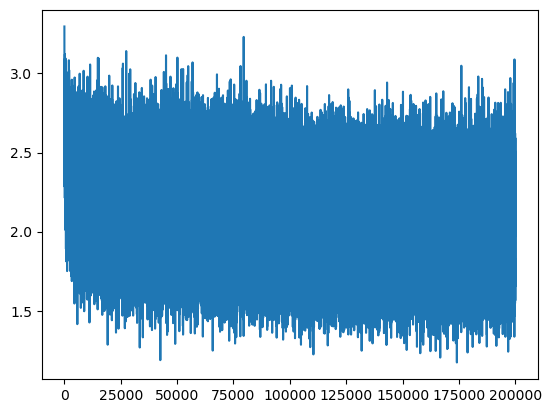

In [47]:
plt.plot(steps,loss_st)

In [71]:
o1 = lookup[X_tr]

o2 = (o1.view(-1,block*10) @ W1 + b1)

o2 = gamma*(o2 - cache_bnmean)/cache_bnstd + beta

o2 = torch.tanh(o2)
        
o3 = ((o2 @ W2 + b2))
        
loss = F.cross_entropy(o3, Y_val)
        
print(loss.item())

2.0393099784851074


In [72]:
o1 = lookup[X_test]

o2 = (o1.view(-1,block*10) @ W1 + b1)

o2 = gamma*(o2 - cache_bnmean)/cache_bnstd + beta

o2 = torch.tanh(o2)
        
o3 = ((o2 @ W2 + b2))
        
loss = F.cross_entropy(o3, Y_test)
        
print(loss.item())

2.0393099784851074


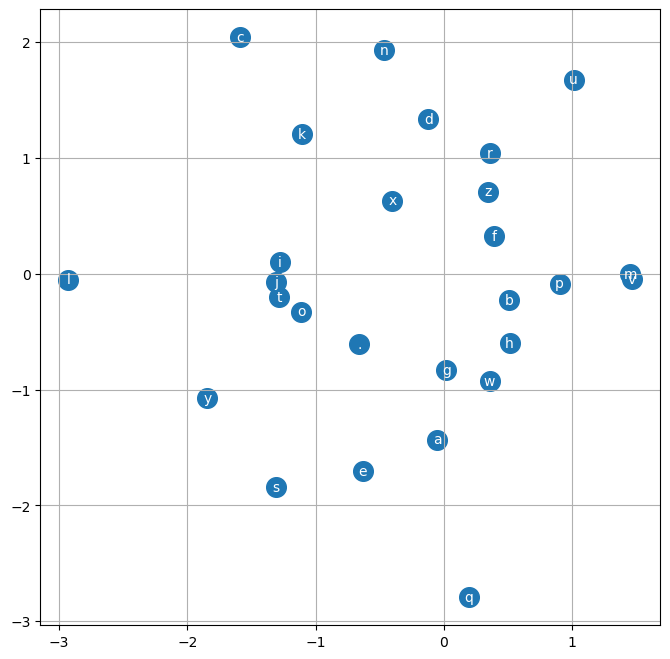

In [73]:
plt.figure(figsize=(8,8))
plt.scatter(lookup[:,0].data, lookup[:,1].data, s=200)
for i in range(lookup.shape[0]):
    plt.text(lookup[i,0].item(), lookup[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

In [74]:
o1 = lookup[X_test]
o2 = (o1.view(-1,block*10) @ W1 + b1)

o2 = gamma*(o2 - cache_bnmean)/cache_bnstd + beta

o2 = torch.tanh(o2)
        
o3 = ((o2 @ W2 + b2))
        
probs = F.cross_entropy(o3, Y_test)

probs

tensor(2.0393, grad_fn=<NllLossBackward0>)

In [75]:
X_tr.shape

torch.Size([228146, 5])

In [55]:
for _ in range(200):
    
    out = []
    context = [0] * block # initialize with all ...
    while True:
      emb = lookup[torch.tensor([context])] # (1,block_size,d)
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break
    
    print(''.join(itos[i] for i in out))

plion.
mael.
feonn.
barran.
lilleen.
draga.
shi.
karvishone.
zeairie.
zarya.
cobon.
matt.
morri.
mariana.
andry.
browannette.
amile.
xarish.
isoly.
marxa.
arrest.
aada.
jermie.
erlia.
frayda.
ameisa.
aeryn.
damyalis.
yaken.
ray.
edma.
malichumi.
marchia.
graxyna.
daliana.
ayan.
carineh.
emrith.
lorah.
koele.
maira.
zandresse.
huntita.
marlaan.
mariyah.
dahhabuxla.
makenl.
quelle.
bamillyn.
camarion.
sondottevol.
warianna.
bluj.
ronay.
cisha.
icalina.
corel.
talef.
xyah.
cabylius.
zafdilyn.
kayte.
emabryn.
maxxuun.
kacin.
linnaty.
ithlina.
tchina.
tanir.
jemoro.
jailea.
hitha.
karmani.
betel.
oreki.
beineick.
zeenleigh.
aryah.
aiken.
momeleighb.
jazram.
maryn.
kamyod.
marina.
je.
calhne.
collyn.
bry.
mel.
brealon.
lenysenn.
lend.
liyah.
trifbetem.
trylia.
mathuk.
izelin.
honlee.
liyell.
mariel.
kriddy.
armiya.
bano.
macolen.
belari.
woraldasen.
isalyn.
camesta.
kasa.
cqurcin.
jeniel.
kzior.
suylon.
tazani.
daislingyatzaiden.
jorian.
zaveon.
joyloria.
kredrian.
gart.
kryston.
arliny.
jah